In [1]:
import torch
import torch.nn as nn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [48]:
import math
import torch.nn.functional as F

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor

In [3]:
from matplotlib import pyplot as plt
from sklearn import preprocessing
import scipy.io
from scipy import stats

In [5]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [6]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [13]:
N_FEATURES = 8

In [14]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'Class_label']


In [15]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train

In [16]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [17]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [18]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [19]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [20]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'Biopatrec_26c_17s_LP_wave_train'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_train.csv


In [21]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'Biopatrec_26c_17s_LP_wave_test'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_wave/Total_process_TT/Biopatrec_26c_17s_LP_wave_test.csv


In [22]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.034502,0.045171,0.031709,0.030337,0.028660,0.025751,0.029426,0.032457,1.0
1,0.034502,0.045169,0.031713,0.030335,0.028659,0.025750,0.029424,0.032455,1.0
2,0.034503,0.045168,0.031717,0.030333,0.028659,0.025749,0.029423,0.032452,1.0
3,0.034503,0.045166,0.031721,0.030331,0.028659,0.025747,0.029422,0.032450,1.0
4,0.034504,0.045165,0.031725,0.030329,0.028658,0.025746,0.029421,0.032447,1.0
5,0.034504,0.045163,0.031729,0.030327,0.028658,0.025745,0.029420,0.032445,1.0
6,0.034505,0.045161,0.031733,0.030325,0.028658,0.025743,0.029418,0.032443,1.0
7,0.034505,0.045160,0.031737,0.030323,0.028657,0.025742,0.029417,0.032440,1.0
8,0.034506,0.045158,0.031741,0.030320,0.028657,0.025741,0.029416,0.032438,1.0
9,0.034506,0.045156,0.031745,0.030318,0.028657,0.025740,0.029415,0.032435,1.0


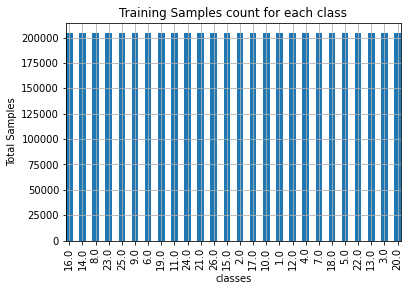

In [23]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [24]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.030507,0.041623,0.021424,0.036203,0.032812,0.024262,0.024071,0.031742,1.0
1,0.030366,0.041623,0.021436,0.036196,0.032807,0.024263,0.024073,0.031741,1.0
2,0.030198,0.041624,0.021448,0.036188,0.032802,0.024263,0.024075,0.031739,1.0
3,0.029998,0.041624,0.021459,0.036181,0.032797,0.024264,0.024077,0.031738,1.0
4,0.029821,0.041624,0.021471,0.036173,0.032792,0.024264,0.024080,0.031737,1.0
5,0.029798,0.041625,0.021482,0.036166,0.032786,0.024265,0.024082,0.031735,1.0
6,0.029798,0.041625,0.021493,0.036158,0.032781,0.024265,0.024084,0.031734,1.0
7,0.029675,0.041625,0.021505,0.036151,0.032776,0.024265,0.024086,0.031733,1.0
8,0.029672,0.041624,0.021517,0.036143,0.032771,0.024266,0.024088,0.031732,1.0
9,0.029951,0.041624,0.021529,0.036136,0.032766,0.024266,0.024090,0.031730,1.0


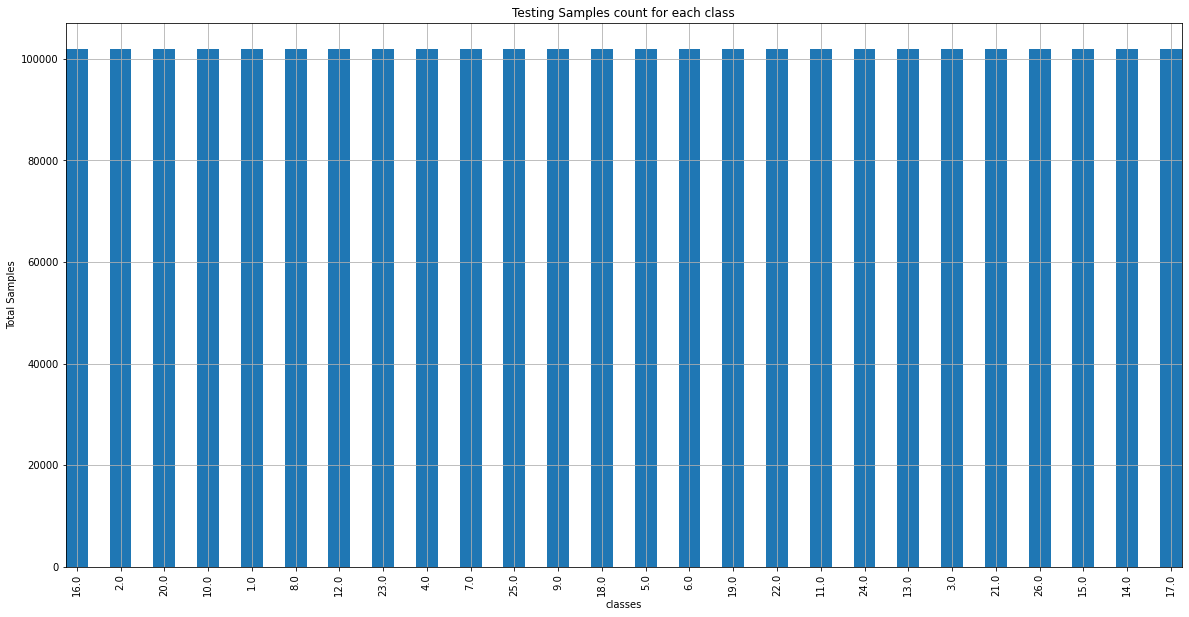

In [25]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02943,0.03246,1.00000
1,0.03450,0.04517,0.03171,0.03034,0.02866,0.02575,0.02942,0.03245,1.00000
2,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
3,0.03450,0.04517,0.03172,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000
4,0.03450,0.04516,0.03173,0.03033,0.02866,0.02575,0.02942,0.03245,1.00000


In [27]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [28]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.40862,-0.38335,-0.31710,-0.19573,-0.20851,-0.25914,-0.23657,-0.25710,1.00000
1,-0.40862,-0.38336,-0.31707,-0.19576,-0.20853,-0.25915,-0.23658,-0.25713,1.00000
2,-0.40861,-0.38336,-0.31704,-0.19579,-0.20853,-0.25916,-0.23659,-0.25717,1.00000
3,-0.40861,-0.38337,-0.31700,-0.19582,-0.20853,-0.25918,-0.23660,-0.25719,1.00000
4,-0.40860,-0.38338,-0.31697,-0.19585,-0.20854,-0.25919,-0.23661,-0.25723,1.00000


In [30]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,0.03051,0.04162,0.02142,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
1,0.03037,0.04162,0.02144,0.03620,0.03281,0.02426,0.02407,0.03174,1.00000
2,0.03020,0.04162,0.02145,0.03619,0.03280,0.02426,0.02407,0.03174,1.00000
3,0.03000,0.04162,0.02146,0.03618,0.03280,0.02426,0.02408,0.03174,1.00000
4,0.02982,0.04162,0.02147,0.03617,0.03279,0.02426,0.02408,0.03174,1.00000


In [31]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [32]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,Class_label
0,-0.44073,-0.40073,-0.40371,-0.10845,-0.15168,-0.27363,-0.28653,-0.26682,1.00000
1,-0.44187,-0.40073,-0.40361,-0.10855,-0.15175,-0.27362,-0.28651,-0.26683,1.00000
2,-0.44322,-0.40072,-0.40351,-0.10867,-0.15182,-0.27362,-0.28649,-0.26686,1.00000
3,-0.44482,-0.40072,-0.40341,-0.10878,-0.15189,-0.27361,-0.28647,-0.26687,1.00000
4,-0.44625,-0.40072,-0.40331,-0.10889,-0.15196,-0.27361,-0.28644,-0.26689,1.00000


In [33]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.40862 -0.38335 -0.31710 -0.19573 -0.20851 -0.25914 -0.23657   
1       -0.40862 -0.38336 -0.31707 -0.19576 -0.20853 -0.25915 -0.23658   
2       -0.40861 -0.38336 -0.31704 -0.19579 -0.20853 -0.25916 -0.23659   
3       -0.40861 -0.38337 -0.31700 -0.19582 -0.20853 -0.25918 -0.23660   
4       -0.40860 -0.38338 -0.31697 -0.19585 -0.20854 -0.25919 -0.23661   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.37664 -0.35320 -0.29846 -0.13343 -0.26037 -0.29086 -0.21241   
5303996 -0.35513 -0.34917 -0.26169 -0.12629 -0.25887 -0.29087 -0.21223   
5303997 -0.32655 -0.34482 -0.21624 -0.11864 -0.25727 -0.29088 -0.21206   
5303998 -0.30417 -0.34102 -0.17755 -0.11227 -0.25593 -0.29088 -0.21188   
5303999 -0.31013 -0.33858 -0.16242 -0.10900 -0.25523 -0.29089 -0.21170   

              C8  Class_label  ActivityEncoded  
0       -0.25710      1.00000                0  

In [34]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [35]:
# The number of steps within one time segment
TIME_PERIODS = 1000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1000

In [36]:
def to_categorical(y, num_classes):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

In [37]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
# print('x_train shape:', x_train[0].shape)
# print('input_shape:', input_shape)
# print('input_shape[0]',input_shape[0])
# print('input_shape[1]',input_shape[1])
# print('input_shape[-1]',input_shape[-1])
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (5303, 1000, 8)
5303 training samples
y_train shape:  (5303,)
1000
8
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
New y_train shape:  (5303, 26)


In [38]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
# y_test = y_test.astype('float32')
y_test_hot = to_categorical(y_test, num_classes)

x_test shape:  (2651, 1000, 8)
2651 testing samples
y_test shape:  (2651,)


In [39]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 15, 400
n_depth=8
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (5303, 1000, 8)
x_test shape:  (2651, 1000, 8)
n_outputs 26


In [40]:
seq_len = 1000

d_k = 64
d_v =64
n_heads = 2
ff_dim = 64

In [41]:
# from tensorflow.keras.models import *
# from tensorflow.keras.layers import *

In [42]:
N_depth=5

In [43]:
# # n_steps, n_length = 20, 25
# # n_steps, n_length= 10, 50
# # n_steps, n_length= 16, 32
# n_steps, n_length = 50, 200
# n_depth,n_sub =12,1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_sub)
# print('x_test shape: ', x_test.shape)
# n_outputs = y_train_hot.shape[1]
# print('n_outputs',n_outputs)

In [44]:
def step_decay(epoch):
   initial_lrate = 1e-3
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [45]:
# lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [46]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [47]:
verbose, epochs, batch_size = 0, 150,2

In [49]:
# encoder
# from torch.nn import Module
# import torch

# from module.feedForward import FeedForward
# from module.multiHeadAttention import MultiHeadAttention

class Encoder(nn.Module):
    def __init__(self,
                 d_model: int,
                 d_hidden: int,
                 q: int,
                 v: int,
                 h: int,
                 device: str,
                 mask: bool = False,
                 dropout: float = 0.1):
        super(Encoder, self).__init__()

        self.MHA = MultiHeadAttention(d_model=d_model, q=q, v=v, h=h, mask=mask, device=device, dropout=dropout)
        self.feedforward = FeedForward(d_model=d_model, d_hidden=d_hidden)
        self.dropout = torch.nn.Dropout(p=dropout)
        self.layerNormal_1 = torch.nn.LayerNorm(d_model)
        self.layerNormal_2 = torch.nn.LayerNorm(d_model)

    def forward(self, x, stage):

        residual = x
        x, score = self.MHA(x, stage)
        x = self.dropout(x)
        x = self.layerNormal_1(x + residual)

        residual = x
        x = self.feedforward(x)
        x = self.dropout(x)
        x = self.layerNormal_2(x + residual)

        return x, score

In [50]:
# feedforward
# from torch.nn import Module
# import torch
# import torch.nn.functional as F

class FeedForward(nn.Module):
    def __init__(self,
                 d_model: int,
                 d_hidden: int = 512):
        super(FeedForward, self).__init__()

        self.linear_1 = torch.nn.Linear(d_model, d_hidden)
        self.linear_2 = torch.nn.Linear(d_hidden, d_model)

    def forward(self, x):

        x = self.linear_1(x)
        x = F.relu(x)
        x = self.linear_2(x)

        return x

In [51]:
# loss
# from torch.nn import Module
# import torch
from torch.nn import CrossEntropyLoss

class Myloss(nn.Module):
    def __init__(self):
        super(Myloss, self).__init__()
        self.loss_function = CrossEntropyLoss()

    def forward(self, y_pre, y_true):
        y_true = y_true.long()
        loss = self.loss_function(y_pre, y_true)

        return loss

In [52]:
# mha
# from torch.nn import Module
# import torch
# import math
# import torch.nn.functional as F


class MultiHeadAttention(nn.Module):
    def __init__(self,
                 d_model: int,
                 q: int,
                 v: int,
                 h: int,
                 device: str,
                 mask: bool=False,
                 dropout: float = 0.1):
        super(MultiHeadAttention, self).__init__()

        self.W_q = torch.nn.Linear(d_model, q * h)
        self.W_k = torch.nn.Linear(d_model, q * h)
        self.W_v = torch.nn.Linear(d_model, v * h)

        self.W_o = torch.nn.Linear(v * h, d_model)

        self.device = device
        self._h = h
        self._q = q

        self.mask = mask
        self.dropout = torch.nn.Dropout(p=dropout)
        self.score = None

    def forward(self, x, stage):
        Q = torch.cat(self.W_q(x).chunk(self._h, dim=-1), dim=0)
        K = torch.cat(self.W_k(x).chunk(self._h, dim=-1), dim=0)
        V = torch.cat(self.W_v(x).chunk(self._h, dim=-1), dim=0)

        score = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self._q)
        self.score = score

        if self.mask and stage == 'train':
            mask = torch.ones_like(score[0])
            mask = torch.tril(mask, diagonal=0)
            score = torch.where(mask > 0, score, torch.Tensor([-2**32+1]).expand_as(score[0]).to(self.device))

        score = F.softmax(score, dim=-1)

        attention = torch.matmul(score, V)

        attention_heads = torch.cat(attention.chunk(self._h, dim=0), dim=-1)

        self_attention = self.W_o(attention_heads)

        return self_attention, self.score

In [53]:
# transformer
# from torch.nn import Module
# import torch
# from torch.nn import ModuleList
# from module.encoder import Encoder
# import math
# import torch.nn.functional as F


class Transformer(nn.Module):
    def __init__(self,
                 d_model: int,
                 d_input: int,
                 d_channel: int,
                 d_output: int,
                 d_hidden: int,
                 q: int,
                 v: int,
                 h: int,
                 N: int,
                 device: str,
                 dropout: float = 0.1,
                 pe: bool = False,
                 mask: bool = False):
        super(Transformer, self).__init__()

        self.encoder_list_1 = ModuleList([Encoder(d_model=d_model,
                                                  d_hidden=d_hidden,
                                                  q=q,
                                                  v=v,
                                                  h=h,
                                                  mask=mask,
                                                  dropout=dropout,
                                                  device=device) for _ in range(N)])

        self.encoder_list_2 = ModuleList([Encoder(d_model=d_model,
                                                  d_hidden=d_hidden,
                                                  q=q,
                                                  v=v,
                                                  h=h,
                                                  dropout=dropout,
                                                  device=device) for _ in range(N)])

        self.embedding_channel = torch.nn.Linear(d_channel, d_model)
        self.embedding_input = torch.nn.Linear(d_input, d_model)

        self.gate = torch.nn.Linear(d_model * d_input + d_model * d_channel, 2)
        self.output_linear = torch.nn.Linear(d_model * d_input + d_model * d_channel, d_output)

        self.pe = pe
        self._d_input = d_input
        self._d_model = d_model

    def forward(self, x, stage):
 
        # step-wise
    
        encoding_1 = self.embedding_channel(x)
        input_to_gather = encoding_1

        if self.pe:
            pe = torch.ones_like(encoding_1[0])
            position = torch.arange(0, self._d_input).unsqueeze(-1)
            temp = torch.Tensor(range(0, self._d_model, 2))
            temp = temp * -(math.log(10000) / self._d_model)
            temp = torch.exp(temp).unsqueeze(0)
            temp = torch.matmul(position.float(), temp)  # shape:[input, d_model/2]
            pe[:, 0::2] = torch.sin(temp)
            pe[:, 1::2] = torch.cos(temp)

            encoding_1 = encoding_1 + pe

        for encoder in self.encoder_list_1:
            encoding_1, score_input = encoder(encoding_1, stage)

        # channel-wise

        encoding_2 = self.embedding_input(x.transpose(-1, -2))
        channel_to_gather = encoding_2

        for encoder in self.encoder_list_2:
            encoding_2, score_channel = encoder(encoding_2, stage)

  
        encoding_1 = encoding_1.reshape(encoding_1.shape[0], -1)
        encoding_2 = encoding_2.reshape(encoding_2.shape[0], -1)

        # gate
        gate = F.softmax(self.gate(torch.cat([encoding_1, encoding_2], dim=-1)), dim=-1)
        encoding = torch.cat([encoding_1 * gate[:, 0:1], encoding_2 * gate[:, 1:2]], dim=-1)

     
        output = self.output_linear(encoding)

        return output, encoding, score_input, score_channel, input_to_gather, channel_to_gather, gate


In [54]:
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [55]:
type(x_train)

torch.Tensor

In [56]:
# x_train = torch.FloatTensor(x_train)
type(x_train)

torch.Tensor

In [57]:
# setup_seed(30)  
reslut_figure_path = 'result_figure'  


# path = 'E:\PyCharmWorkSpace\dataset\\MTS_dataset\\WalkvsRun\\WalkvsRun.mat'

test_interval = 1  
draw_key = 1  
# file_name = path.split('\\')[-1][0:path.split('\\')[-1].index('.')]  


EPOCH = 100
BATCH_SIZE = 10
LR = 1e-4
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  
print(f'use device: {DEVICE}')

d_model = 16
d_hidden = 1024
q = 8
v = 8
h = 8
N = 8
dropout = 0.2
pe = True  
mask = True  

optimizer_name = 'Adagrad'

# train_dataset = MyDataset(path, 'train')
# test_dataset = MyDataset(path, 'test')
train_data = TensorDataset(x_train, y_train)
test_data = TensorDataset(x_test, y_test)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

DATA_LEN = x_train.shape[0]  
d_input = x_train.shape[1]
d_channel = x_train.shape[2]
output_len = len(tuple(set(y_train)))
d_output = output_len   


print('data structure: [lines, timesteps, features]')
print(f'train data size: [{DATA_LEN, d_input, d_channel}]')
# print(f'mytest data size: [{train_dataset.test_len, d_input, d_channel}]')
print(f'Number of classes: {d_output}')

use device: cuda:0
data structure: [lines, timesteps, features]
train data size: [(5303, 1000, 8)]
Number of classes: 5303


In [58]:
# type(x_train)

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# x_train = x_train.to(device)
# y_train = y_train.to(device)
# x_test = x_test.to(device)
# y_test = y_test.to(device)

# criterion = criterion.to(device)

In [60]:
def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

In [61]:
from torch.nn import ModuleList

In [62]:
net = Transformer(d_model=d_model, d_input=d_input, d_channel=d_channel, d_output=d_output, d_hidden=d_hidden,
                  q=q, v=v, h=h, N=N, dropout=dropout, pe=pe, mask=mask, device=DEVICE).to(DEVICE)
# net = net.to(device)

loss_function = Myloss()
# if optimizer_name == 'Adagrad':
#     optimizer = optim.Adagrad(net.parameters(), lr=LR)
# elif optimizer_name == 'Adam':
#     optimizer = optim.Adam(net.parameters(), lr=LR)

In [63]:
torch.cuda.empty_cache()

In [65]:
from time import time
from tqdm import tqdm
import os
import torch.optim as optim

In [64]:
# def round_tensor(t, decimal_places=3):
#   return round(t.item(), decimal_places)
# for epoch in range(100):
#     x_train = x_train.to(device)
#     y_train = y_train.to(device)
#     x_test = x_test.to(device)
#     y_test = y_test.to(device)
#     y_pred = net(x_train,'train')
#     y_pred = torch.squeeze(y_pred)
#     train_loss = Myloss(y_pred, y_train)
#     if epoch % 100 == 0:
#       train_acc = calculate_accuracy(y_train, y_pred)
#       y_test_pred = net(x_test,"test")
#       y_test_pred = torch.squeeze(y_test_pred)
#       test_loss = Myloss(y_test_pred, y_test)
#       test_acc = calculate_accuracy(y_test, y_test_pred)
#       print(
# f'''epoch {epoch}
# Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
# Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
# ''')
#     optimizer.zero_grad()
#     train_loss.backward()
#     optimizer.step()

In [66]:
# run code
# import torch
# from torch.utils.data import DataLoader
# from dataset_process.dataset_process import MyDataset



# from module.transformer import Transformer
# from module.loss import Myloss
# from utils.random_seed import setup_seed
# from utils.visualization import result_visualization

# from mytest.gather.main import draw
path = '/media/naveen/nav/mat_codes/BioPatRec/transformer/WalkvsRun.mat'

file_name = path.split('\\')[-1][0:path.split('\\')[-1].index('.')]

# filename = '/media/naveen/nav/mat_codes/BioPatRec/transformer/'

net = Transformer(d_model=d_model, d_input=d_input, d_channel=d_channel, d_output=d_output, d_hidden=d_hidden,
                  q=q, v=v, h=h, N=N, dropout=dropout, pe=pe, mask=mask, device=DEVICE).to(DEVICE)

loss_function = Myloss()
if optimizer_name == 'Adagrad':
    optimizer = optim.Adagrad(net.parameters(), lr=LR)
elif optimizer_name == 'Adam':
    optimizer = optim.Adam(net.parameters(), lr=LR)


correct_on_train = []
correct_on_test = []

loss_list = []
time_cost = 0



def test(dataloader, flag='test_set'):
    correct = 0
    total = 0
    with torch.no_grad():
        net.eval()
        for x, y in dataloader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            y_pre, _, _, _, _, _, _ = net(x, 'test')
            _, label_index = torch.max(y_pre.data, dim=-1)
            total += label_index.shape[0]
            correct += (label_index == y.long()).sum().item()
        if flag == 'test_set':
            correct_on_test.append(round((100 * correct / total), 2))
        elif flag == 'train_set':
            correct_on_train.append(round((100 * correct / total), 2))
        print(f'Accuracy on {flag}: %.2f %%' % (100 * correct / total))

        return round((100 * correct / total), 2)



def train():
    net.train()
    max_accuracy = 0
    pbar = tqdm(total=EPOCH)
    begin = time()
    for index in range(EPOCH):
        for i,(x, y) in enumerate(train_dataloader):
            optimizer.zero_grad()

            y_pre, _, _, _, _, _, _ = net(x.to(DEVICE), 'train')

            loss = loss_function(y_pre, y.to(DEVICE))
#             train_acc = calculate_accuracy(y_pre, y.to(DEVICE))
            print(f'Epoch:{index + 1}:\t\tloss:{loss.item()}')
            loss_list.append(loss.item())

            loss.backward()

            optimizer.step()

        if ((index + 1) % test_interval) == 0:
            current_accuracy = test(test_dataloader)
            test(train_dataloader, 'train_set')
            print(f'1:{max(correct_on_test)}%\t 2:{max(correct_on_train)}%')

            if current_accuracy > max_accuracy:
                max_accuracy = current_accuracy
                torch.save(net, f'{file_name} batch={BATCH_SIZE}.pkl')

        pbar.update()

    os.rename(f'{file_name} batch={BATCH_SIZE}.pkl',
              f'{file_name} {max_accuracy} batch={BATCH_SIZE}.pkl')

    end = time()
    time_cost = round((end - begin) / 60, 2)

    
    result_visualization(loss_list=loss_list, correct_on_test=correct_on_test, correct_on_train=correct_on_train,
                         test_interval=test_interval,
                         d_model=d_model, q=q, v=v, h=h, N=N, dropout=dropout, DATA_LEN=DATA_LEN, BATCH_SIZE=BATCH_SIZE,
                         time_cost=time_cost, EPOCH=EPOCH, draw_key=draw_key, reslut_figure_path=reslut_figure_path,
                         file_name=file_name,
                         optimizer_name=optimizer_name, LR=LR, pe=pe, mask=mask)


if __name__ == '__main__':
    train()

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch:1:		loss:8.581942558288574
Epoch:1:		loss:8.5703763961792
Epoch:1:		loss:8.254843711853027
Epoch:1:		loss:7.5791144371032715
Epoch:1:		loss:6.802485466003418
Epoch:1:		loss:7.264597415924072
Epoch:1:		loss:8.985294342041016
Epoch:1:		loss:8.465263366699219
Epoch:1:		loss:8.181591033935547
Epoch:1:		loss:7.998839378356934
Epoch:1:		loss:7.7821221351623535
Epoch:1:		loss:7.491644382476807
Epoch:1:		loss:8.517549514770508
Epoch:1:		loss:8.674348831176758
Epoch:1:		loss:8.706205368041992
Epoch:1:		loss:8.344758987426758
Epoch:1:		loss:7.959555149078369
Epoch:1:		loss:7.758363246917725
Epoch:1:		loss:8.980546951293945
Epoch:1:		loss:8.665385246276855
Epoch:1:		loss:8.263400077819824
Epoch:1:		loss:8.07323169708252
Epoch:1:		loss:8.094644546508789
Epoch:1:		loss:7.897561550140381
Epoch:1:		loss:8.171142578125
Epoch:1:		loss:8.250194549560547
Epoch:1:		loss:8.384747505187988
Epoch:1:		loss:8.315902709960938
Epoch:1:		loss:8.06278133392334
Epoch:1:		loss:8.039819717407227
Epoch:1:		loss:

Epoch:1:		loss:3.434248447418213
Epoch:1:		loss:3.3591055870056152
Epoch:1:		loss:3.1932365894317627
Epoch:1:		loss:3.2904372215270996
Epoch:1:		loss:3.6034064292907715
Epoch:1:		loss:3.7275614738464355
Epoch:1:		loss:3.249558210372925
Epoch:1:		loss:3.307551145553589
Epoch:1:		loss:3.279085874557495
Epoch:1:		loss:3.338953733444214
Epoch:1:		loss:3.3379054069519043
Epoch:1:		loss:3.3820748329162598
Epoch:1:		loss:3.256737470626831
Epoch:1:		loss:2.772625684738159
Epoch:1:		loss:2.4252820014953613
Epoch:1:		loss:2.94193696975708
Epoch:1:		loss:3.145581007003784
Epoch:1:		loss:3.092578411102295
Epoch:1:		loss:3.2921791076660156
Epoch:1:		loss:3.343585252761841
Epoch:1:		loss:3.1354143619537354
Epoch:1:		loss:3.2731494903564453
Epoch:1:		loss:3.2985897064208984
Epoch:1:		loss:3.4072823524475098
Epoch:1:		loss:3.464797258377075
Epoch:1:		loss:3.2264809608459473
Epoch:1:		loss:2.98948335647583
Epoch:1:		loss:2.954258680343628
Epoch:1:		loss:3.2345118522644043
Epoch:1:		loss:3.1872205734252

Epoch:1:		loss:3.355994701385498
Epoch:1:		loss:3.2604308128356934
Epoch:1:		loss:2.940091609954834
Epoch:1:		loss:2.970548152923584
Epoch:1:		loss:3.324436902999878
Epoch:1:		loss:2.9504189491271973
Epoch:1:		loss:3.3211638927459717
Epoch:1:		loss:3.1856722831726074
Epoch:1:		loss:3.277045488357544
Epoch:1:		loss:3.2099449634552
Epoch:1:		loss:3.116471529006958
Epoch:1:		loss:2.995434045791626
Epoch:1:		loss:3.183706760406494
Epoch:1:		loss:3.1755542755126953
Epoch:1:		loss:3.0128800868988037
Epoch:1:		loss:2.994278907775879
Epoch:1:		loss:3.0862135887145996
Epoch:1:		loss:2.176738739013672
Epoch:1:		loss:2.7612545490264893
Epoch:1:		loss:3.194979190826416
Epoch:1:		loss:3.261133909225464
Epoch:1:		loss:3.0540213584899902
Epoch:1:		loss:3.1992669105529785
Epoch:1:		loss:3.207598924636841
Epoch:1:		loss:3.1551690101623535
Epoch:1:		loss:3.184136390686035
Epoch:1:		loss:3.083587169647217
Epoch:1:		loss:3.3553855419158936
Epoch:1:		loss:3.3066775798797607
Epoch:1:		loss:3.105933666229248

  1%|          | 1/100 [02:20<3:52:02, 140.63s/it]

Epoch:2:		loss:4.197516441345215
Epoch:2:		loss:4.107571601867676
Epoch:2:		loss:3.6503968238830566
Epoch:2:		loss:2.859884262084961
Epoch:2:		loss:2.9436116218566895
Epoch:2:		loss:4.1097941398620605
Epoch:2:		loss:3.7943215370178223
Epoch:2:		loss:2.8114476203918457
Epoch:2:		loss:2.7185492515563965
Epoch:2:		loss:2.6559157371520996
Epoch:2:		loss:1.8672888278961182
Epoch:2:		loss:2.515778064727783
Epoch:2:		loss:3.1743996143341064
Epoch:2:		loss:3.4836883544921875
Epoch:2:		loss:3.375479221343994
Epoch:2:		loss:3.259868621826172
Epoch:2:		loss:3.3637542724609375
Epoch:2:		loss:3.189408779144287
Epoch:2:		loss:3.0228614807128906
Epoch:2:		loss:2.805203437805176
Epoch:2:		loss:3.0600645542144775
Epoch:2:		loss:2.797400951385498
Epoch:2:		loss:2.5352048873901367
Epoch:2:		loss:2.574890613555908
Epoch:2:		loss:3.058522939682007
Epoch:2:		loss:3.0226263999938965
Epoch:2:		loss:2.5862972736358643
Epoch:2:		loss:2.657167673110962
Epoch:2:		loss:2.818580389022827
Epoch:2:		loss:2.7294735908

Epoch:2:		loss:3.010450601577759
Epoch:2:		loss:3.406467914581299
Epoch:2:		loss:2.9986789226531982
Epoch:2:		loss:3.1527493000030518
Epoch:2:		loss:3.283158779144287
Epoch:2:		loss:3.543442964553833
Epoch:2:		loss:2.873978853225708
Epoch:2:		loss:2.879103422164917
Epoch:2:		loss:3.27679705619812
Epoch:2:		loss:3.275402069091797
Epoch:2:		loss:3.0739188194274902
Epoch:2:		loss:3.1398024559020996
Epoch:2:		loss:2.6039879322052
Epoch:2:		loss:2.7703135013580322
Epoch:2:		loss:2.146991014480591
Epoch:2:		loss:2.718083143234253
Epoch:2:		loss:2.983248710632324
Epoch:2:		loss:2.8658719062805176
Epoch:2:		loss:3.1263010501861572
Epoch:2:		loss:3.1810147762298584
Epoch:2:		loss:2.9036097526550293
Epoch:2:		loss:3.0233571529388428
Epoch:2:		loss:2.889288902282715
Epoch:2:		loss:3.076165199279785
Epoch:2:		loss:3.0364036560058594
Epoch:2:		loss:3.013288974761963
Epoch:2:		loss:2.4892985820770264
Epoch:2:		loss:2.584446430206299
Epoch:2:		loss:3.0551743507385254
Epoch:2:		loss:3.055234432220459


Epoch:2:		loss:3.0990030765533447
Epoch:2:		loss:3.0677924156188965
Epoch:2:		loss:2.8043742179870605
Epoch:2:		loss:2.7278523445129395
Epoch:2:		loss:3.4028382301330566
Epoch:2:		loss:2.7278668880462646
Epoch:2:		loss:3.2174904346466064
Epoch:2:		loss:3.084036350250244
Epoch:2:		loss:3.0560202598571777
Epoch:2:		loss:3.072258710861206
Epoch:2:		loss:2.915356159210205
Epoch:2:		loss:2.835545063018799
Epoch:2:		loss:3.0954384803771973
Epoch:2:		loss:3.0773401260375977
Epoch:2:		loss:2.723422050476074
Epoch:2:		loss:2.691848039627075
Epoch:2:		loss:2.852109670639038
Epoch:2:		loss:2.1741960048675537
Epoch:2:		loss:2.651628017425537
Epoch:2:		loss:2.9607441425323486
Epoch:2:		loss:2.964937686920166
Epoch:2:		loss:3.012146472930908
Epoch:2:		loss:3.2055251598358154
Epoch:2:		loss:3.099780559539795
Epoch:2:		loss:2.9869396686553955
Epoch:2:		loss:2.9938011169433594
Epoch:2:		loss:3.0023348331451416
Epoch:2:		loss:3.295743942260742
Epoch:2:		loss:3.1208858489990234
Epoch:2:		loss:2.569489479

  2%|▏         | 2/100 [04:41<3:49:39, 140.61s/it]

Epoch:3:		loss:4.153391361236572
Epoch:3:		loss:4.122478008270264
Epoch:3:		loss:3.672567844390869
Epoch:3:		loss:2.799924850463867
Epoch:3:		loss:2.8195300102233887
Epoch:3:		loss:4.2639031410217285
Epoch:3:		loss:3.947965145111084
Epoch:3:		loss:2.6051266193389893
Epoch:3:		loss:2.5053107738494873
Epoch:3:		loss:2.5737698078155518
Epoch:3:		loss:1.8061611652374268
Epoch:3:		loss:2.411052942276001
Epoch:3:		loss:2.9483914375305176
Epoch:3:		loss:3.5266356468200684
Epoch:3:		loss:3.516770601272583
Epoch:3:		loss:3.418358325958252
Epoch:3:		loss:3.4746792316436768
Epoch:3:		loss:3.081861972808838
Epoch:3:		loss:2.745671033859253
Epoch:3:		loss:2.742865800857544
Epoch:3:		loss:3.0156445503234863
Epoch:3:		loss:2.5588479042053223
Epoch:3:		loss:2.129227638244629
Epoch:3:		loss:2.039668321609497
Epoch:3:		loss:3.0304789543151855
Epoch:3:		loss:2.908797264099121
Epoch:3:		loss:2.4309096336364746
Epoch:3:		loss:2.490139961242676
Epoch:3:		loss:2.640944242477417
Epoch:3:		loss:2.4089131355285

Epoch:3:		loss:2.7280490398406982
Epoch:3:		loss:3.4184212684631348
Epoch:3:		loss:3.0381152629852295
Epoch:3:		loss:3.1402599811553955
Epoch:3:		loss:3.1865341663360596
Epoch:3:		loss:3.265068769454956
Epoch:3:		loss:2.675790786743164
Epoch:3:		loss:2.724562168121338
Epoch:3:		loss:3.174057960510254
Epoch:3:		loss:3.1824228763580322
Epoch:3:		loss:2.9598264694213867
Epoch:3:		loss:2.9303040504455566
Epoch:3:		loss:2.2934162616729736
Epoch:3:		loss:2.6911745071411133
Epoch:3:		loss:2.0199804306030273
Epoch:3:		loss:2.560343027114868
Epoch:3:		loss:2.8544859886169434
Epoch:3:		loss:2.6523187160491943
Epoch:3:		loss:3.038928270339966
Epoch:3:		loss:3.083042860031128
Epoch:3:		loss:2.7920212745666504
Epoch:3:		loss:2.967406988143921
Epoch:3:		loss:2.7969868183135986
Epoch:3:		loss:3.003298282623291
Epoch:3:		loss:2.842958927154541
Epoch:3:		loss:2.8700242042541504
Epoch:3:		loss:2.2890477180480957
Epoch:3:		loss:2.4456303119659424
Epoch:3:		loss:2.995424747467041
Epoch:3:		loss:2.97328424

Epoch:3:		loss:2.979215145111084
Epoch:3:		loss:2.9733216762542725
Epoch:3:		loss:2.734424114227295
Epoch:3:		loss:2.6410231590270996
Epoch:3:		loss:3.4037201404571533
Epoch:3:		loss:2.5961742401123047
Epoch:3:		loss:3.1331276893615723
Epoch:3:		loss:3.017514705657959
Epoch:3:		loss:2.917931318283081
Epoch:3:		loss:2.9564907550811768
Epoch:3:		loss:2.8263802528381348
Epoch:3:		loss:2.728637456893921
Epoch:3:		loss:2.9977240562438965
Epoch:3:		loss:2.9770233631134033
Epoch:3:		loss:2.5600838661193848
Epoch:3:		loss:2.5333645343780518
Epoch:3:		loss:2.742474317550659
Epoch:3:		loss:2.1594784259796143
Epoch:3:		loss:2.5123932361602783
Epoch:3:		loss:2.8366122245788574
Epoch:3:		loss:2.806691884994507
Epoch:3:		loss:2.885798692703247
Epoch:3:		loss:3.1608192920684814
Epoch:3:		loss:3.0210955142974854
Epoch:3:		loss:2.7964322566986084
Epoch:3:		loss:2.914961576461792
Epoch:3:		loss:2.9299569129943848
Epoch:3:		loss:3.2701523303985596
Epoch:3:		loss:3.0270514488220215
Epoch:3:		loss:2.360591

  3%|▎         | 3/100 [07:02<3:47:29, 140.72s/it]

Epoch:4:		loss:3.996889591217041
Epoch:4:		loss:3.983806610107422
Epoch:4:		loss:3.606374740600586
Epoch:4:		loss:2.7655270099639893
Epoch:4:		loss:2.699416160583496
Epoch:4:		loss:4.165074348449707
Epoch:4:		loss:3.9613089561462402
Epoch:4:		loss:2.479526996612549
Epoch:4:		loss:2.363917827606201
Epoch:4:		loss:2.475670337677002
Epoch:4:		loss:1.7517421245574951
Epoch:4:		loss:2.302661895751953
Epoch:4:		loss:2.696166515350342
Epoch:4:		loss:3.4231369495391846
Epoch:4:		loss:3.496488094329834
Epoch:4:		loss:3.4075379371643066
Epoch:4:		loss:3.431797504425049
Epoch:4:		loss:2.981039524078369
Epoch:4:		loss:2.6031463146209717
Epoch:4:		loss:2.723266363143921
Epoch:4:		loss:2.953449249267578
Epoch:4:		loss:2.4250125885009766
Epoch:4:		loss:1.94916570186615
Epoch:4:		loss:1.7752383947372437
Epoch:4:		loss:3.0569682121276855
Epoch:4:		loss:2.847930431365967
Epoch:4:		loss:2.344207286834717
Epoch:4:		loss:2.4036014080047607
Epoch:4:		loss:2.5513033866882324
Epoch:4:		loss:2.2539873123168945

Epoch:4:		loss:2.519808530807495
Epoch:4:		loss:3.408165693283081
Epoch:4:		loss:3.070941209793091
Epoch:4:		loss:3.1138439178466797
Epoch:4:		loss:3.1194491386413574
Epoch:4:		loss:2.9876699447631836
Epoch:4:		loss:2.5544400215148926
Epoch:4:		loss:2.6387903690338135
Epoch:4:		loss:3.094712495803833
Epoch:4:		loss:3.121553897857666
Epoch:4:		loss:2.895163059234619
Epoch:4:		loss:2.778028964996338
Epoch:4:		loss:2.1208901405334473
Epoch:4:		loss:2.6218090057373047
Epoch:4:		loss:1.92728590965271
Epoch:4:		loss:2.4389891624450684
Epoch:4:		loss:2.7531774044036865
Epoch:4:		loss:2.478297233581543
Epoch:4:		loss:2.9734208583831787
Epoch:4:		loss:2.9836699962615967
Epoch:4:		loss:2.703803539276123
Epoch:4:		loss:2.9381253719329834
Epoch:4:		loss:2.752408266067505
Epoch:4:		loss:2.9551422595977783
Epoch:4:		loss:2.7124695777893066
Epoch:4:		loss:2.759747266769409
Epoch:4:		loss:2.1753921508789062
Epoch:4:		loss:2.372300863265991
Epoch:4:		loss:2.9634389877319336
Epoch:4:		loss:2.91829442977

Epoch:4:		loss:2.8903260231018066
Epoch:4:		loss:2.904611825942993
Epoch:4:		loss:2.6807360649108887
Epoch:4:		loss:2.5747427940368652
Epoch:4:		loss:3.400805711746216
Epoch:4:		loss:2.4912631511688232
Epoch:4:		loss:3.0621190071105957
Epoch:4:		loss:2.9766430854797363
Epoch:4:		loss:2.8050055503845215
Epoch:4:		loss:2.863300085067749
Epoch:4:		loss:2.7626986503601074
Epoch:4:		loss:2.6593925952911377
Epoch:4:		loss:2.9325993061065674
Epoch:4:		loss:2.9037914276123047
Epoch:4:		loss:2.456932544708252
Epoch:4:		loss:2.440397024154663
Epoch:4:		loss:2.6749539375305176
Epoch:4:		loss:2.146800994873047
Epoch:4:		loss:2.416308879852295
Epoch:4:		loss:2.74371075630188
Epoch:4:		loss:2.6845881938934326
Epoch:4:		loss:2.782104253768921
Epoch:4:		loss:3.1107265949249268
Epoch:4:		loss:2.93507719039917
Epoch:4:		loss:2.655165195465088
Epoch:4:		loss:2.8602120876312256
Epoch:4:		loss:2.8689112663269043
Epoch:4:		loss:3.2499706745147705
Epoch:4:		loss:2.9745287895202637
Epoch:4:		loss:2.2349543571

  4%|▍         | 4/100 [09:22<3:44:41, 140.44s/it]

Epoch:5:		loss:3.840597629547119
Epoch:5:		loss:3.821226119995117
Epoch:5:		loss:3.532461643218994
Epoch:5:		loss:2.754420042037964
Epoch:5:		loss:2.6165623664855957
Epoch:5:		loss:4.0275678634643555
Epoch:5:		loss:3.941232204437256
Epoch:5:		loss:2.403383255004883
Epoch:5:		loss:2.2908105850219727
Epoch:5:		loss:2.406155824661255
Epoch:5:		loss:1.7129852771759033
Epoch:5:		loss:2.220546245574951
Epoch:5:		loss:2.47701358795166
Epoch:5:		loss:3.3080756664276123
Epoch:5:		loss:3.443272113800049
Epoch:5:		loss:3.3548941612243652
Epoch:5:		loss:3.3528060913085938
Epoch:5:		loss:2.9074649810791016
Epoch:5:		loss:2.509899377822876
Epoch:5:		loss:2.707321882247925
Epoch:5:		loss:2.895270586013794
Epoch:5:		loss:2.343061923980713
Epoch:5:		loss:1.8507570028305054
Epoch:5:		loss:1.6278053522109985
Epoch:5:		loss:3.076209306716919
Epoch:5:		loss:2.792813301086426
Epoch:5:		loss:2.271146535873413
Epoch:5:		loss:2.3382318019866943
Epoch:5:		loss:2.488826036453247
Epoch:5:		loss:2.151024580001831


Epoch:5:		loss:2.3714072704315186
Epoch:5:		loss:3.397061824798584
Epoch:5:		loss:3.0940136909484863
Epoch:5:		loss:3.081981658935547
Epoch:5:		loss:3.060490131378174
Epoch:5:		loss:2.7251133918762207
Epoch:5:		loss:2.4655282497406006
Epoch:5:		loss:2.583439350128174
Epoch:5:		loss:3.030041217803955
Epoch:5:		loss:3.0771656036376953
Epoch:5:		loss:2.854889392852783
Epoch:5:		loss:2.6640913486480713
Epoch:5:		loss:2.017956495285034
Epoch:5:		loss:2.5610265731811523
Epoch:5:		loss:1.8564937114715576
Epoch:5:		loss:2.345573902130127
Epoch:5:		loss:2.672375202178955
Epoch:5:		loss:2.3373711109161377
Epoch:5:		loss:2.920409679412842
Epoch:5:		loss:2.8930773735046387
Epoch:5:		loss:2.636936664581299
Epoch:5:		loss:2.9251418113708496
Epoch:5:		loss:2.7253260612487793
Epoch:5:		loss:2.9195194244384766
Epoch:5:		loss:2.619710922241211
Epoch:5:		loss:2.6698224544525146
Epoch:5:		loss:2.1006555557250977
Epoch:5:		loss:2.3251612186431885
Epoch:5:		loss:2.944072961807251
Epoch:5:		loss:2.8772552013

Epoch:5:		loss:2.674492120742798
Epoch:5:		loss:1.885170578956604
Epoch:5:		loss:2.819669485092163
Epoch:5:		loss:2.85062837600708
Epoch:5:		loss:2.639906406402588
Epoch:5:		loss:2.5259270668029785
Epoch:5:		loss:3.3981246948242188
Epoch:5:		loss:2.4097237586975098
Epoch:5:		loss:3.0080180168151855
Epoch:5:		loss:2.9492483139038086
Epoch:5:		loss:2.709239959716797
Epoch:5:		loss:2.7859368324279785
Epoch:5:		loss:2.714503765106201
Epoch:5:		loss:2.6063144207000732
Epoch:5:		loss:2.8837127685546875
Epoch:5:		loss:2.8432564735412598
Epoch:5:		loss:2.383854389190674
Epoch:5:		loss:2.3785905838012695
Epoch:5:		loss:2.6301960945129395
Epoch:5:		loss:2.134719133377075
Epoch:5:		loss:2.345852851867676
Epoch:5:		loss:2.6726956367492676
Epoch:5:		loss:2.5879549980163574
Epoch:5:		loss:2.698286533355713
Epoch:5:		loss:3.0608935356140137
Epoch:5:		loss:2.8485305309295654
Epoch:5:		loss:2.546072483062744
Epoch:5:		loss:2.818147897720337
Epoch:5:		loss:2.813167095184326
Epoch:5:		loss:3.230233669281

  5%|▌         | 5/100 [11:43<3:42:47, 140.71s/it]

Epoch:6:		loss:3.694106340408325
Epoch:6:		loss:3.6574110984802246
Epoch:6:		loss:3.4602973461151123
Epoch:6:		loss:2.7489593029022217
Epoch:6:		loss:2.5529351234436035
Epoch:6:		loss:3.8850395679473877
Epoch:6:		loss:3.9020867347717285
Epoch:6:		loss:2.348306655883789
Epoch:6:		loss:2.250498056411743
Epoch:6:		loss:2.356271505355835
Epoch:6:		loss:1.682146430015564
Epoch:6:		loss:2.1570653915405273
Epoch:6:		loss:2.2949910163879395
Epoch:6:		loss:3.1996049880981445
Epoch:6:		loss:3.3823482990264893
Epoch:6:		loss:3.2887394428253174
Epoch:6:		loss:3.2651050090789795
Epoch:6:		loss:2.854801893234253
Epoch:6:		loss:2.441009521484375
Epoch:6:		loss:2.6879172325134277
Epoch:6:		loss:2.84431529045105
Epoch:6:		loss:2.2897770404815674
Epoch:6:		loss:1.7885221242904663
Epoch:6:		loss:1.5380895137786865
Epoch:6:		loss:3.084805965423584
Epoch:6:		loss:2.7430155277252197
Epoch:6:		loss:2.2085530757904053
Epoch:6:		loss:2.2856717109680176
Epoch:6:		loss:2.442570686340332
Epoch:6:		loss:2.07601332

Epoch:6:		loss:2.264606475830078
Epoch:6:		loss:3.3841750621795654
Epoch:6:		loss:3.109031915664673
Epoch:6:		loss:3.048696517944336
Epoch:6:		loss:3.0094895362854004
Epoch:6:		loss:2.489121913909912
Epoch:6:		loss:2.39489483833313
Epoch:6:		loss:2.5442652702331543
Epoch:6:		loss:2.9768452644348145
Epoch:6:		loss:3.044363498687744
Epoch:6:		loss:2.8291149139404297
Epoch:6:		loss:2.5740883350372314
Epoch:6:		loss:1.9503281116485596
Epoch:6:		loss:2.505723476409912
Epoch:6:		loss:1.7999677658081055
Epoch:6:		loss:2.273629665374756
Epoch:6:		loss:2.6062538623809814
Epoch:6:		loss:2.2213821411132812
Epoch:6:		loss:2.877307415008545
Epoch:6:		loss:2.8142950534820557
Epoch:6:		loss:2.5864105224609375
Epoch:6:		loss:2.919985294342041
Epoch:6:		loss:2.7068467140197754
Epoch:6:		loss:2.8945508003234863
Epoch:6:		loss:2.5506720542907715
Epoch:6:		loss:2.596055746078491
Epoch:6:		loss:2.046705722808838
Epoch:6:		loss:2.291759729385376
Epoch:6:		loss:2.932039260864258
Epoch:6:		loss:2.847772121429

Epoch:6:		loss:2.7605042457580566
Epoch:6:		loss:2.8058784008026123
Epoch:6:		loss:2.607624053955078
Epoch:6:		loss:2.488407611846924
Epoch:6:		loss:3.394186496734619
Epoch:6:		loss:2.3462471961975098
Epoch:6:		loss:2.9662578105926514
Epoch:6:		loss:2.929081678390503
Epoch:6:		loss:2.6285500526428223
Epoch:6:		loss:2.721546173095703
Epoch:6:		loss:2.6764156818389893
Epoch:6:		loss:2.5627083778381348
Epoch:6:		loss:2.8448660373687744
Epoch:6:		loss:2.7935023307800293
Epoch:6:		loss:2.3288254737854004
Epoch:6:		loss:2.333207130432129
Epoch:6:		loss:2.5983545780181885
Epoch:6:		loss:2.1227831840515137
Epoch:6:		loss:2.29189133644104
Epoch:6:		loss:2.6151700019836426
Epoch:6:		loss:2.5084807872772217
Epoch:6:		loss:2.6294004917144775
Epoch:6:		loss:3.013608932495117
Epoch:6:		loss:2.7666306495666504
Epoch:6:		loss:2.459106922149658
Epoch:6:		loss:2.7834718227386475
Epoch:6:		loss:2.76255202293396
Epoch:6:		loss:3.211676836013794
Epoch:6:		loss:2.921949625015259
Epoch:6:		loss:2.09125280380

  6%|▌         | 6/100 [14:04<3:40:33, 140.78s/it]

Epoch:7:		loss:3.561178207397461
Epoch:7:		loss:3.5032668113708496
Epoch:7:		loss:3.3933658599853516
Epoch:7:		loss:2.7459444999694824
Epoch:7:		loss:2.5020668506622314
Epoch:7:		loss:3.7496414184570312
Epoch:7:		loss:3.8563244342803955
Epoch:7:		loss:2.3043813705444336
Epoch:7:		loss:2.2273449897766113
Epoch:7:		loss:2.3187642097473145
Epoch:7:		loss:1.656314492225647
Epoch:7:		loss:2.1051430702209473
Epoch:7:		loss:2.1438307762145996
Epoch:7:		loss:3.102536916732788
Epoch:7:		loss:3.3219211101531982
Epoch:7:		loss:3.2204010486602783
Epoch:7:		loss:3.177730083465576
Epoch:7:		loss:2.8156142234802246
Epoch:7:		loss:2.3861451148986816
Epoch:7:		loss:2.665921926498413
Epoch:7:		loss:2.799548625946045
Epoch:7:		loss:2.2532694339752197
Epoch:7:		loss:1.7455501556396484
Epoch:7:		loss:1.4796031713485718
Epoch:7:		loss:3.0866570472717285
Epoch:7:		loss:2.7003819942474365
Epoch:7:		loss:2.1564221382141113
Epoch:7:		loss:2.2436203956604004
Epoch:7:		loss:2.4070756435394287
Epoch:7:		loss:2.019

Epoch:7:		loss:2.735059976577759
Epoch:7:		loss:2.185875415802002
Epoch:7:		loss:3.3724231719970703
Epoch:7:		loss:3.1197574138641357
Epoch:7:		loss:3.0161099433898926
Epoch:7:		loss:2.9635634422302246
Epoch:7:		loss:2.2805893421173096
Epoch:7:		loss:2.334937572479248
Epoch:7:		loss:2.5150599479675293
Epoch:7:		loss:2.9327781200408936
Epoch:7:		loss:3.0203020572662354
Epoch:7:		loss:2.8124985694885254
Epoch:7:		loss:2.49910306930542
Epoch:7:		loss:1.900952696800232
Epoch:7:		loss:2.4542722702026367
Epoch:7:		loss:1.753740906715393
Epoch:7:		loss:2.2162296772003174
Epoch:7:		loss:2.549527406692505
Epoch:7:		loss:2.124286651611328
Epoch:7:		loss:2.8408074378967285
Epoch:7:		loss:2.746516466140747
Epoch:7:		loss:2.5474343299865723
Epoch:7:		loss:2.9196078777313232
Epoch:7:		loss:2.6927895545959473
Epoch:7:		loss:2.876638889312744
Epoch:7:		loss:2.4989066123962402
Epoch:7:		loss:2.535595178604126
Epoch:7:		loss:2.0054140090942383
Epoch:7:		loss:2.266145944595337
Epoch:7:		loss:2.9240694046

Epoch:7:		loss:1.781644582748413
Epoch:7:		loss:2.71010684967041
Epoch:7:		loss:2.767200469970703
Epoch:7:		loss:2.5813164710998535
Epoch:7:		loss:2.4579415321350098
Epoch:7:		loss:3.3885693550109863
Epoch:7:		loss:2.293938636779785
Epoch:7:		loss:2.9315199851989746
Epoch:7:		loss:2.913252592086792
Epoch:7:		loss:2.5598371028900146
Epoch:7:		loss:2.667404890060425
Epoch:7:		loss:2.6460747718811035
Epoch:7:		loss:2.5256032943725586
Epoch:7:		loss:2.81422758102417
Epoch:7:		loss:2.7504329681396484
Epoch:7:		loss:2.284547805786133
Epoch:7:		loss:2.296842098236084
Epoch:7:		loss:2.573350191116333
Epoch:7:		loss:2.112226724624634
Epoch:7:		loss:2.2494189739227295
Epoch:7:		loss:2.5675103664398193
Epoch:7:		loss:2.442929267883301
Epoch:7:		loss:2.572040557861328
Epoch:7:		loss:2.970092296600342
Epoch:7:		loss:2.690969228744507
Epoch:7:		loss:2.3875858783721924
Epoch:7:		loss:2.754582405090332
Epoch:7:		loss:2.715391159057617
Epoch:7:		loss:3.193784475326538
Epoch:7:		loss:2.9072072505950928


  7%|▋         | 7/100 [16:25<3:38:14, 140.80s/it]

Epoch:8:		loss:3.4415886402130127
Epoch:8:		loss:3.362704038619995
Epoch:8:		loss:3.333308696746826
Epoch:8:		loss:2.7447762489318848
Epoch:8:		loss:2.4603943824768066
Epoch:8:		loss:3.62485933303833
Epoch:8:		loss:3.8089656829833984
Epoch:8:		loss:2.26772403717041
Epoch:8:		loss:2.2132551670074463
Epoch:8:		loss:2.289377212524414
Epoch:8:		loss:1.6347137689590454
Epoch:8:		loss:2.0618205070495605
Epoch:8:		loss:2.0179660320281982
Epoch:8:		loss:3.0177910327911377
Epoch:8:		loss:3.2655348777770996
Epoch:8:		loss:3.154571056365967
Epoch:8:		loss:3.0958080291748047
Epoch:8:		loss:2.786024332046509
Epoch:8:		loss:2.340850353240967
Epoch:8:		loss:2.643203020095825
Epoch:8:		loss:2.760570526123047
Epoch:8:		loss:2.2271530628204346
Epoch:8:		loss:1.7125778198242188
Epoch:8:		loss:1.4386136531829834
Epoch:8:		loss:3.0842299461364746
Epoch:8:		loss:2.6629319190979004
Epoch:8:		loss:2.11208176612854
Epoch:8:		loss:2.2086987495422363
Epoch:8:		loss:2.3785033226013184
Epoch:8:		loss:1.97465705871

Epoch:8:		loss:2.669379711151123
Epoch:8:		loss:2.1265957355499268
Epoch:8:		loss:3.3595528602600098
Epoch:8:		loss:3.1245169639587402
Epoch:8:		loss:2.983370542526245
Epoch:8:		loss:2.9218058586120605
Epoch:8:		loss:2.0984301567077637
Epoch:8:		loss:2.2833874225616455
Epoch:8:		loss:2.491870403289795
Epoch:8:		loss:2.894929885864258
Epoch:8:		loss:3.00115704536438
Epoch:8:		loss:2.8016037940979004
Epoch:8:		loss:2.436647415161133
Epoch:8:		loss:1.8637977838516235
Epoch:8:		loss:2.406907558441162
Epoch:8:		loss:1.7156890630722046
Epoch:8:		loss:2.1705679893493652
Epoch:8:		loss:2.5008535385131836
Epoch:8:		loss:2.042891025543213
Epoch:8:		loss:2.8093833923339844
Epoch:8:		loss:2.6871049404144287
Epoch:8:		loss:2.5164618492126465
Epoch:8:		loss:2.922790050506592
Epoch:8:		loss:2.6819992065429688
Epoch:8:		loss:2.863584280014038
Epoch:8:		loss:2.4579567909240723
Epoch:8:		loss:2.485517740249634
Epoch:8:		loss:1.9734125137329102
Epoch:8:		loss:2.246372699737549
Epoch:8:		loss:2.9189145565

Epoch:8:		loss:1.747846245765686
Epoch:8:		loss:2.666229009628296
Epoch:8:		loss:2.733219623565674
Epoch:8:		loss:2.5602526664733887
Epoch:8:		loss:2.4334781169891357
Epoch:8:		loss:3.382230281829834
Epoch:8:		loss:2.250692844390869
Epoch:8:		loss:2.9036121368408203
Epoch:8:		loss:2.9014947414398193
Epoch:8:		loss:2.5014073848724365
Epoch:8:		loss:2.6224141120910645
Epoch:8:		loss:2.6221680641174316
Epoch:8:		loss:2.4926562309265137
Epoch:8:		loss:2.789801597595215
Epoch:8:		loss:2.7119710445404053
Epoch:8:		loss:2.247748613357544
Epoch:8:		loss:2.2665584087371826
Epoch:8:		loss:2.5522103309631348
Epoch:8:		loss:2.102255344390869
Epoch:8:		loss:2.21425724029541
Epoch:8:		loss:2.527491807937622
Epoch:8:		loss:2.3881020545959473
Epoch:8:		loss:2.5235800743103027
Epoch:8:		loss:2.9295899868011475
Epoch:8:		loss:2.6201508045196533
Epoch:8:		loss:2.3271961212158203
Epoch:8:		loss:2.729670524597168
Epoch:8:		loss:2.671074867248535
Epoch:8:		loss:3.1759796142578125
Epoch:8:		loss:2.8954479694

  8%|▊         | 8/100 [18:45<3:35:32, 140.57s/it]

Epoch:9:		loss:3.334290027618408
Epoch:9:		loss:3.2364501953125
Epoch:9:		loss:3.2804007530212402
Epoch:9:		loss:2.744750499725342
Epoch:9:		loss:2.4251482486724854
Epoch:9:		loss:3.510464906692505
Epoch:9:		loss:3.7608160972595215
Epoch:9:		loss:2.2352592945098877
Epoch:9:		loss:2.204206705093384
Epoch:9:		loss:2.2655398845672607
Epoch:9:		loss:1.6161348819732666
Epoch:9:		loss:2.0243942737579346
Epoch:9:		loss:1.9128668308258057
Epoch:9:		loss:2.9434878826141357
Epoch:9:		loss:3.213346481323242
Epoch:9:		loss:3.0916197299957275
Epoch:9:		loss:3.018460512161255
Epoch:9:		loss:2.7623775005340576
Epoch:9:		loss:2.3022122383117676
Epoch:9:		loss:2.620297908782959
Epoch:9:		loss:2.724597692489624
Epoch:9:		loss:2.206666946411133
Epoch:9:		loss:1.6858774423599243
Epoch:9:		loss:1.4081264734268188
Epoch:9:		loss:3.079310417175293
Epoch:9:		loss:2.629507541656494
Epoch:9:		loss:2.0742204189300537
Epoch:9:		loss:2.1797537803649902
Epoch:9:		loss:2.355211019515991
Epoch:9:		loss:1.938086867332

Epoch:9:		loss:3.195270299911499
Epoch:9:		loss:2.614593267440796
Epoch:9:		loss:2.0817573070526123
Epoch:9:		loss:3.346254348754883
Epoch:9:		loss:3.1258480548858643
Epoch:9:		loss:2.952895164489746
Epoch:9:		loss:2.8846774101257324
Epoch:9:		loss:1.9405930042266846
Epoch:9:		loss:2.2383952140808105
Epoch:9:		loss:2.4734137058258057
Epoch:9:		loss:2.862332820892334
Epoch:9:		loss:2.9849941730499268
Epoch:9:		loss:2.7930893898010254
Epoch:9:		loss:2.384085178375244
Epoch:9:		loss:1.83490788936615
Epoch:9:		loss:2.3629558086395264
Epoch:9:		loss:1.6832729578018188
Epoch:9:		loss:2.134053945541382
Epoch:9:		loss:2.458707094192505
Epoch:9:		loss:1.9737794399261475
Epoch:9:		loss:2.781212329864502
Epoch:9:		loss:2.6342787742614746
Epoch:9:		loss:2.4903206825256348
Epoch:9:		loss:2.927459239959717
Epoch:9:		loss:2.6734328269958496
Epoch:9:		loss:2.8534395694732666
Epoch:9:		loss:2.4245173931121826
Epoch:9:		loss:2.442673921585083
Epoch:9:		loss:1.947169303894043
Epoch:9:		loss:2.23000788688

Epoch:9:		loss:2.6362733840942383
Epoch:9:		loss:1.7205966711044312
Epoch:9:		loss:2.627753734588623
Epoch:9:		loss:2.7027664184570312
Epoch:9:		loss:2.541640520095825
Epoch:9:		loss:2.4124743938446045
Epoch:9:		loss:3.3742384910583496
Epoch:9:		loss:2.2134902477264404
Epoch:9:		loss:2.880251407623291
Epoch:9:		loss:2.8919661045074463
Epoch:9:		loss:2.4519641399383545
Epoch:9:		loss:2.5847113132476807
Epoch:9:		loss:2.602452516555786
Epoch:9:		loss:2.4642817974090576
Epoch:9:		loss:2.7705280780792236
Epoch:9:		loss:2.678616762161255
Epoch:9:		loss:2.2163095474243164
Epoch:9:		loss:2.2402491569519043
Epoch:9:		loss:2.53365159034729
Epoch:9:		loss:2.092860221862793
Epoch:9:		loss:2.1848809719085693
Epoch:9:		loss:2.4928746223449707
Epoch:9:		loss:2.3411946296691895
Epoch:9:		loss:2.4822309017181396
Epoch:9:		loss:2.892970085144043
Epoch:9:		loss:2.555833101272583
Epoch:9:		loss:2.2746620178222656
Epoch:9:		loss:2.707496166229248
Epoch:9:		loss:2.630584716796875
Epoch:9:		loss:3.158936738

  9%|▉         | 9/100 [21:04<3:32:46, 140.30s/it]

Epoch:10:		loss:3.2387771606445312
Epoch:10:		loss:3.1240978240966797
Epoch:10:		loss:3.234375
Epoch:10:		loss:2.7459399700164795
Epoch:10:		loss:2.3950395584106445
Epoch:10:		loss:3.4065680503845215
Epoch:10:		loss:3.7148118019104004
Epoch:10:		loss:2.2065658569335938
Epoch:10:		loss:2.1985292434692383
Epoch:10:		loss:2.246270179748535
Epoch:10:		loss:1.5996339321136475
Epoch:10:		loss:1.9918498992919922
Epoch:10:		loss:1.823862075805664
Epoch:10:		loss:2.87790846824646
Epoch:10:		loss:3.1652300357818604
Epoch:10:		loss:3.032334566116333
Epoch:10:		loss:2.946363925933838
Epoch:10:		loss:2.7419557571411133
Epoch:10:		loss:2.26822566986084
Epoch:10:		loss:2.5979626178741455
Epoch:10:		loss:2.6913015842437744
Epoch:10:		loss:2.189852237701416
Epoch:10:		loss:1.6628509759902954
Epoch:10:		loss:1.3850489854812622
Epoch:10:		loss:3.0729432106018066
Epoch:10:		loss:2.600498676300049
Epoch:10:		loss:2.0417368412017822
Epoch:10:		loss:2.155155897140503
Epoch:10:		loss:2.3356075286865234
Epoch:

Epoch:10:		loss:2.6114983558654785
Epoch:10:		loss:4.046812057495117
Epoch:10:		loss:3.539646863937378
Epoch:10:		loss:3.3716423511505127
Epoch:10:		loss:3.6735241413116455
Epoch:10:		loss:3.1905646324157715
Epoch:10:		loss:2.5675806999206543
Epoch:10:		loss:2.0468716621398926
Epoch:10:		loss:3.3318729400634766
Epoch:10:		loss:3.123931407928467
Epoch:10:		loss:2.923750638961792
Epoch:10:		loss:2.8507161140441895
Epoch:10:		loss:1.8038208484649658
Epoch:10:		loss:2.1982109546661377
Epoch:10:		loss:2.458906888961792
Epoch:10:		loss:2.8338463306427
Epoch:10:		loss:2.9712023735046387
Epoch:10:		loss:2.7868738174438477
Epoch:10:		loss:2.3389992713928223
Epoch:10:		loss:1.810786247253418
Epoch:10:		loss:2.322713613510132
Epoch:10:		loss:1.6554009914398193
Epoch:10:		loss:2.104635238647461
Epoch:10:		loss:2.421456813812256
Epoch:10:		loss:1.9146159887313843
Epoch:10:		loss:2.75567364692688
Epoch:10:		loss:2.587432384490967
Epoch:10:		loss:2.468268871307373
Epoch:10:		loss:2.933223009109497
Ep

Epoch:10:		loss:2.6542861461639404
Epoch:10:		loss:2.2836203575134277
Epoch:10:		loss:3.148766040802002
Epoch:10:		loss:2.5956661701202393
Epoch:10:		loss:2.5225136280059814
Epoch:10:		loss:2.4917116165161133
Epoch:10:		loss:2.5933241844177246
Epoch:10:		loss:2.8862946033477783
Epoch:10:		loss:2.8907129764556885
Epoch:10:		loss:2.6098387241363525
Epoch:10:		loss:2.2607626914978027
Epoch:10:		loss:2.339759111404419
Epoch:10:		loss:2.63491153717041
Epoch:10:		loss:1.6977943181991577
Epoch:10:		loss:2.5940258502960205
Epoch:10:		loss:2.6753530502319336
Epoch:10:		loss:2.524919271469116
Epoch:10:		loss:2.3940987586975098
Epoch:10:		loss:3.3650786876678467
Epoch:10:		loss:2.1810717582702637
Epoch:10:		loss:2.8601927757263184
Epoch:10:		loss:2.8836894035339355
Epoch:10:		loss:2.4093830585479736
Epoch:10:		loss:2.55279278755188
Epoch:10:		loss:2.585723876953125
Epoch:10:		loss:2.4393482208251953
Epoch:10:		loss:2.754911422729492
Epoch:10:		loss:2.6491780281066895
Epoch:10:		loss:2.18871831893

 10%|█         | 10/100 [23:28<3:31:58, 141.31s/it]

Epoch:11:		loss:3.1524791717529297
Epoch:11:		loss:3.0236868858337402
Epoch:11:		loss:3.194140911102295
Epoch:11:		loss:2.7477917671203613
Epoch:11:		loss:2.368628978729248
Epoch:11:		loss:3.3123321533203125
Epoch:11:		loss:3.6707725524902344
Epoch:11:		loss:2.180576801300049
Epoch:11:		loss:2.1951308250427246
Epoch:11:		loss:2.230247974395752
Epoch:11:		loss:1.584740161895752
Epoch:11:		loss:1.9635518789291382
Epoch:11:		loss:1.748234510421753
Epoch:11:		loss:2.8196957111358643
Epoch:11:		loss:3.121288537979126
Epoch:11:		loss:2.97759747505188
Epoch:11:		loss:2.8802924156188965
Epoch:11:		loss:2.72452712059021
Epoch:11:		loss:2.2382686138153076
Epoch:11:		loss:2.5767314434051514
Epoch:11:		loss:2.660958766937256
Epoch:11:		loss:2.1758968830108643
Epoch:11:		loss:1.6430025100708008
Epoch:11:		loss:1.3670203685760498
Epoch:11:		loss:3.0661118030548096
Epoch:11:		loss:2.5750913619995117
Epoch:11:		loss:2.013716220855713
Epoch:11:		loss:2.1339571475982666
Epoch:11:		loss:2.318715810775757

Epoch:11:		loss:2.802975654602051
Epoch:11:		loss:2.5781490802764893
Epoch:11:		loss:4.023993015289307
Epoch:11:		loss:3.5311310291290283
Epoch:11:		loss:3.3907783031463623
Epoch:11:		loss:3.703577756881714
Epoch:11:		loss:3.1830999851226807
Epoch:11:		loss:2.5270981788635254
Epoch:11:		loss:2.0199005603790283
Epoch:11:		loss:3.316643476486206
Epoch:11:		loss:3.11962890625
Epoch:11:		loss:2.896393060684204
Epoch:11:		loss:2.8201098442077637
Epoch:11:		loss:1.6855103969573975
Epoch:11:		loss:2.1622366905212402
Epoch:11:		loss:2.4470396041870117
Epoch:11:		loss:2.8083767890930176
Epoch:11:		loss:2.9589052200317383
Epoch:11:		loss:2.781632900238037
Epoch:11:		loss:2.3000175952911377
Epoch:11:		loss:1.79071843624115
Epoch:11:		loss:2.2852187156677246
Epoch:11:		loss:1.6311575174331665
Epoch:11:		loss:2.0805435180664062
Epoch:11:		loss:2.388509750366211
Epoch:11:		loss:1.863380789756775
Epoch:11:		loss:2.731595039367676
Epoch:11:		loss:2.544980525970459
Epoch:11:		loss:2.4491848945617676
Ep

Epoch:11:		loss:2.0859317779541016
Epoch:11:		loss:1.9406909942626953
Epoch:11:		loss:2.6461234092712402
Epoch:11:		loss:2.251246452331543
Epoch:11:		loss:3.14384126663208
Epoch:11:		loss:2.58508563041687
Epoch:11:		loss:2.504509449005127
Epoch:11:		loss:2.4715828895568848
Epoch:11:		loss:2.5720343589782715
Epoch:11:		loss:2.8690850734710693
Epoch:11:		loss:2.87798810005188
Epoch:11:		loss:2.5855205059051514
Epoch:11:		loss:2.2318224906921387
Epoch:11:		loss:2.324728488922119
Epoch:11:		loss:2.63515567779541
Epoch:11:		loss:1.6793371438980103
Epoch:11:		loss:2.5642573833465576
Epoch:11:		loss:2.6507444381713867
Epoch:11:		loss:2.5096309185028076
Epoch:11:		loss:2.377964735031128
Epoch:11:		loss:3.355067729949951
Epoch:11:		loss:2.1518924236297607
Epoch:11:		loss:2.8415729999542236
Epoch:11:		loss:2.8765604496002197
Epoch:11:		loss:2.37300443649292
Epoch:11:		loss:2.5260863304138184
Epoch:11:		loss:2.5722692012786865
Epoch:11:		loss:2.4165616035461426
Epoch:11:		loss:2.7421135902404785


 11%|█         | 11/100 [25:50<3:29:45, 141.41s/it]

Epoch:12:		loss:3.074749231338501
Epoch:12:		loss:2.934149742126465
Epoch:12:		loss:3.1586475372314453
Epoch:12:		loss:2.74953031539917
Epoch:12:		loss:2.3448891639709473
Epoch:12:		loss:3.2261478900909424
Epoch:12:		loss:3.628371477127075
Epoch:12:		loss:2.1567788124084473
Epoch:12:		loss:2.193429946899414
Epoch:12:		loss:2.217125415802002
Epoch:12:		loss:1.571244716644287
Epoch:12:		loss:1.938409447669983
Epoch:12:		loss:1.6839110851287842
Epoch:12:		loss:2.7675366401672363
Epoch:12:		loss:3.0810799598693848
Epoch:12:		loss:2.9270834922790527
Epoch:12:		loss:2.8194475173950195
Epoch:12:		loss:2.708906888961792
Epoch:12:		loss:2.2115883827209473
Epoch:12:		loss:2.5564496517181396
Epoch:12:		loss:2.6328113079071045
Epoch:12:		loss:2.163900375366211
Epoch:12:		loss:1.6254087686538696
Epoch:12:		loss:1.3524960279464722
Epoch:12:		loss:3.058905601501465
Epoch:12:		loss:2.552438259124756
Epoch:12:		loss:1.9892301559448242
Epoch:12:		loss:2.1154582500457764
Epoch:12:		loss:2.303813457489013

Epoch:12:		loss:2.812511920928955
Epoch:12:		loss:2.546374797821045
Epoch:12:		loss:4.002997875213623
Epoch:12:		loss:3.5223002433776855
Epoch:12:		loss:3.406383991241455
Epoch:12:		loss:3.727708339691162
Epoch:12:		loss:3.173835039138794
Epoch:12:		loss:2.492384433746338
Epoch:12:		loss:1.9991804361343384
Epoch:12:		loss:3.302058458328247
Epoch:12:		loss:3.114901542663574
Epoch:12:		loss:2.8713412284851074
Epoch:12:		loss:2.7922863960266113
Epoch:12:		loss:1.5834156274795532
Epoch:12:		loss:2.129516124725342
Epoch:12:		loss:2.43709135055542
Epoch:12:		loss:2.7856459617614746
Epoch:12:		loss:2.9476571083068848
Epoch:12:		loss:2.7769079208374023
Epoch:12:		loss:2.2658207416534424
Epoch:12:		loss:1.7731525897979736
Epoch:12:		loss:2.2506608963012695
Epoch:12:		loss:1.6096969842910767
Epoch:12:		loss:2.060199737548828
Epoch:12:		loss:2.3588099479675293
Epoch:12:		loss:1.818555235862732
Epoch:12:		loss:2.708115577697754
Epoch:12:		loss:2.5060014724731445
Epoch:12:		loss:2.4320714473724365


Epoch:12:		loss:2.5103487968444824
Epoch:12:		loss:2.0705716609954834
Epoch:12:		loss:1.921445608139038
Epoch:12:		loss:2.638427257537842
Epoch:12:		loss:2.2219605445861816
Epoch:12:		loss:3.139730930328369
Epoch:12:		loss:2.576443910598755
Epoch:12:		loss:2.4880950450897217
Epoch:12:		loss:2.4528701305389404
Epoch:12:		loss:2.552466869354248
Epoch:12:		loss:2.853698253631592
Epoch:12:		loss:2.8659095764160156
Epoch:12:		loss:2.5629637241363525
Epoch:12:		loss:2.205509662628174
Epoch:12:		loss:2.312023162841797
Epoch:12:		loss:2.636428117752075
Epoch:12:		loss:1.6633965969085693
Epoch:12:		loss:2.5375633239746094
Epoch:12:		loss:2.62837553024292
Epoch:12:		loss:2.4962143898010254
Epoch:12:		loss:2.364128589630127
Epoch:12:		loss:3.34521746635437
Epoch:12:		loss:2.1264328956604004
Epoch:12:		loss:2.8264052867889404
Epoch:12:		loss:2.87052583694458
Epoch:12:		loss:2.3415465354919434
Epoch:12:		loss:2.5030930042266846
Epoch:12:		loss:2.5607895851135254
Epoch:12:		loss:2.39532470703125
Epo

 12%|█▏        | 12/100 [28:10<3:26:58, 141.12s/it]

Epoch:13:		loss:3.0041518211364746
Epoch:13:		loss:2.8540802001953125
Epoch:13:		loss:3.12709641456604
Epoch:13:		loss:2.7510766983032227
Epoch:13:		loss:2.3234429359436035
Epoch:13:		loss:3.1470742225646973
Epoch:13:		loss:3.5878593921661377
Epoch:13:		loss:2.1342549324035645
Epoch:13:		loss:2.19252347946167
Epoch:13:		loss:2.2058372497558594
Epoch:13:		loss:1.5589479207992554
Epoch:13:		loss:1.9158121347427368
Epoch:13:		loss:1.6284393072128296
Epoch:13:		loss:2.7204413414001465
Epoch:13:		loss:3.04374623298645
Epoch:13:		loss:2.879922866821289
Epoch:13:		loss:2.7630887031555176
Epoch:13:		loss:2.6950066089630127
Epoch:13:		loss:2.1874003410339355
Epoch:13:		loss:2.536998987197876
Epoch:13:		loss:2.606269359588623
Epoch:13:		loss:2.1531825065612793
Epoch:13:		loss:1.6094462871551514
Epoch:13:		loss:1.3405927419662476
Epoch:13:		loss:3.0516810417175293
Epoch:13:		loss:2.532119035720825
Epoch:13:		loss:1.967865228652954
Epoch:13:		loss:2.0992677211761475
Epoch:13:		loss:2.2908077239990

Epoch:13:		loss:2.8203651905059814
Epoch:13:		loss:2.5166306495666504
Epoch:13:		loss:3.9840939044952393
Epoch:13:		loss:3.5136215686798096
Epoch:13:		loss:3.418827533721924
Epoch:13:		loss:3.7469322681427
Epoch:13:		loss:3.1635336875915527
Epoch:13:		loss:2.4623193740844727
Epoch:13:		loss:1.9828370809555054
Epoch:13:		loss:3.286970853805542
Epoch:13:		loss:3.108647584915161
Epoch:13:		loss:2.847715139389038
Epoch:13:		loss:2.7668514251708984
Epoch:13:		loss:1.4950155019760132
Epoch:13:		loss:2.0999908447265625
Epoch:13:		loss:2.428450107574463
Epoch:13:		loss:2.7649383544921875
Epoch:13:		loss:2.9369559288024902
Epoch:13:		loss:2.7724099159240723
Epoch:13:		loss:2.2359416484832764
Epoch:13:		loss:1.7581431865692139
Epoch:13:		loss:2.218536376953125
Epoch:13:		loss:1.5907211303710938
Epoch:13:		loss:2.0432543754577637
Epoch:13:		loss:2.3321242332458496
Epoch:13:		loss:1.779140830039978
Epoch:13:		loss:2.6857714653015137
Epoch:13:		loss:2.4700872898101807
Epoch:13:		loss:2.416912078857

Epoch:13:		loss:2.0570855140686035
Epoch:13:		loss:1.904188871383667
Epoch:13:		loss:2.631409168243408
Epoch:13:		loss:2.195147752761841
Epoch:13:		loss:3.136497974395752
Epoch:13:		loss:2.569441318511963
Epoch:13:		loss:2.4733076095581055
Epoch:13:		loss:2.4356017112731934
Epoch:13:		loss:2.5342068672180176
Epoch:13:		loss:2.839449405670166
Epoch:13:		loss:2.854614496231079
Epoch:13:		loss:2.5419375896453857
Epoch:13:		loss:2.1812350749969482
Epoch:13:		loss:2.3009376525878906
Epoch:13:		loss:2.6381871700286865
Epoch:13:		loss:1.6494686603546143
Epoch:13:		loss:2.513401508331299
Epoch:13:		loss:2.6074774265289307
Epoch:13:		loss:2.4836459159851074
Epoch:13:		loss:2.35176682472229
Epoch:13:		loss:3.335059642791748
Epoch:13:		loss:2.103327989578247
Epoch:13:		loss:2.8123154640197754
Epoch:13:		loss:2.865323305130005
Epoch:13:		loss:2.3144285678863525
Epoch:13:		loss:2.4834420680999756
Epoch:13:		loss:2.551237106323242
Epoch:13:		loss:2.375457525253296
Epoch:13:		loss:2.7227377891540527


 13%|█▎        | 13/100 [30:33<3:25:36, 141.80s/it]

Epoch:14:		loss:2.940044641494751
Epoch:14:		loss:2.7823150157928467
Epoch:14:		loss:3.0989866256713867
Epoch:14:		loss:2.7524683475494385
Epoch:14:		loss:2.3042213916778564
Epoch:14:		loss:3.0746355056762695
Epoch:14:		loss:3.5487494468688965
Epoch:14:		loss:2.113455057144165
Epoch:14:		loss:2.1922848224639893
Epoch:14:		loss:2.196089267730713
Epoch:14:		loss:1.5478194952011108
Epoch:14:		loss:1.8951599597930908
Epoch:14:		loss:1.5801401138305664
Epoch:14:		loss:2.6778461933135986
Epoch:14:		loss:3.0088248252868652
Epoch:14:		loss:2.8356709480285645
Epoch:14:		loss:2.710792064666748
Epoch:14:		loss:2.6823248863220215
Epoch:14:		loss:2.1651833057403564
Epoch:14:		loss:2.5179924964904785
Epoch:14:		loss:2.5810160636901855
Epoch:14:		loss:2.1432974338531494
Epoch:14:		loss:1.594825029373169
Epoch:14:		loss:1.3306914567947388
Epoch:14:		loss:3.044023036956787
Epoch:14:		loss:2.513573408126831
Epoch:14:		loss:1.9489610195159912
Epoch:14:		loss:2.0848631858825684
Epoch:14:		loss:2.279250383

Epoch:14:		loss:2.8265862464904785
Epoch:14:		loss:2.488701343536377
Epoch:14:		loss:3.966552257537842
Epoch:14:		loss:3.5046558380126953
Epoch:14:		loss:3.428490161895752
Epoch:14:		loss:3.7615065574645996
Epoch:14:		loss:3.1517937183380127
Epoch:14:		loss:2.4356977939605713
Epoch:14:		loss:1.9694831371307373
Epoch:14:		loss:3.2717318534851074
Epoch:14:		loss:3.1015782356262207
Epoch:14:		loss:2.8254289627075195
Epoch:14:		loss:2.74344539642334
Epoch:14:		loss:1.418147325515747
Epoch:14:		loss:2.0728931427001953
Epoch:14:		loss:2.421445608139038
Epoch:14:		loss:2.7463455200195312
Epoch:14:		loss:2.927199363708496
Epoch:14:		loss:2.768374443054199
Epoch:14:		loss:2.20900559425354
Epoch:14:		loss:1.74457585811615
Epoch:14:		loss:2.188786745071411
Epoch:14:		loss:1.573828101158142
Epoch:14:		loss:2.028796672821045
Epoch:14:		loss:2.3077120780944824
Epoch:14:		loss:1.7444074153900146
Epoch:14:		loss:2.6640639305114746
Epoch:14:		loss:2.4368746280670166
Epoch:14:		loss:2.403196334838867
Ep

Epoch:14:		loss:1.8884193897247314
Epoch:14:		loss:2.6245617866516113
Epoch:14:		loss:2.17030930519104
Epoch:14:		loss:3.132946729660034
Epoch:14:		loss:2.563253879547119
Epoch:14:		loss:2.4594905376434326
Epoch:14:		loss:2.4198222160339355
Epoch:14:		loss:2.5173821449279785
Epoch:14:		loss:2.8258159160614014
Epoch:14:		loss:2.843869686126709
Epoch:14:		loss:2.5226926803588867
Epoch:14:		loss:2.159543991088867
Epoch:14:		loss:2.291382312774658
Epoch:14:		loss:2.6396396160125732
Epoch:14:		loss:1.6370235681533813
Epoch:14:		loss:2.491379976272583
Epoch:14:		loss:2.5880401134490967
Epoch:14:		loss:2.471791982650757
Epoch:14:		loss:2.340040683746338
Epoch:14:		loss:3.32426118850708
Epoch:14:		loss:2.082663059234619
Epoch:14:		loss:2.800238847732544
Epoch:14:		loss:2.860515594482422
Epoch:14:		loss:2.2907214164733887
Epoch:14:		loss:2.4661316871643066
Epoch:14:		loss:2.5427775382995605
Epoch:14:		loss:2.357480525970459
Epoch:14:		loss:2.715183973312378
Epoch:14:		loss:2.5552101135253906
Ep

 14%|█▍        | 14/100 [32:53<3:22:07, 141.02s/it]

Epoch:15:		loss:2.881640672683716
Epoch:15:		loss:2.7177913188934326
Epoch:15:		loss:3.0739376544952393
Epoch:15:		loss:2.753840446472168
Epoch:15:		loss:2.287095546722412
Epoch:15:		loss:3.0081920623779297
Epoch:15:		loss:3.512882709503174
Epoch:15:		loss:2.093885660171509
Epoch:15:		loss:2.192457437515259
Epoch:15:		loss:2.187622308731079
Epoch:15:		loss:1.5375514030456543
Epoch:15:		loss:1.8762699365615845
Epoch:15:		loss:1.5375797748565674
Epoch:15:		loss:2.639084577560425
Epoch:15:		loss:2.9763998985290527
Epoch:15:		loss:2.794764280319214
Epoch:15:		loss:2.6625161170959473
Epoch:15:		loss:2.6706652641296387
Epoch:15:		loss:2.144528388977051
Epoch:15:		loss:2.5001583099365234
Epoch:15:		loss:2.557814359664917
Epoch:15:		loss:2.1345298290252686
Epoch:15:		loss:1.5810041427612305
Epoch:15:		loss:1.3226268291473389
Epoch:15:		loss:3.0362708568573
Epoch:15:		loss:2.4968347549438477
Epoch:15:		loss:1.9321266412734985
Epoch:15:		loss:2.0715794563293457
Epoch:15:		loss:2.268702268600464


Epoch:15:		loss:2.8313076496124268
Epoch:15:		loss:2.462223529815674
Epoch:15:		loss:3.949819564819336
Epoch:15:		loss:3.4953200817108154
Epoch:15:		loss:3.435844898223877
Epoch:15:		loss:3.7723171710968018
Epoch:15:		loss:3.1390700340270996
Epoch:15:		loss:2.4122321605682373
Epoch:15:		loss:1.9586513042449951
Epoch:15:		loss:3.2566981315612793
Epoch:15:		loss:3.0939855575561523
Epoch:15:		loss:2.8046298027038574
Epoch:15:		loss:2.721966505050659
Epoch:15:		loss:1.3511755466461182
Epoch:15:		loss:2.0481419563293457
Epoch:15:		loss:2.4155936241149902
Epoch:15:		loss:2.729254961013794
Epoch:15:		loss:2.9181079864501953
Epoch:15:		loss:2.76462984085083
Epoch:15:		loss:2.1847634315490723
Epoch:15:		loss:1.7324527502059937
Epoch:15:		loss:2.1610562801361084
Epoch:15:		loss:1.558627963066101
Epoch:15:		loss:2.0164666175842285
Epoch:15:		loss:2.2853610515594482
Epoch:15:		loss:1.71366286277771
Epoch:15:		loss:2.643187999725342
Epoch:15:		loss:2.406235933303833
Epoch:15:		loss:2.39048814773559

Epoch:15:		loss:2.478173017501831
Epoch:15:		loss:2.033555507659912
Epoch:15:		loss:1.8738864660263062
Epoch:15:		loss:2.618239164352417
Epoch:15:		loss:2.147116184234619
Epoch:15:		loss:3.1299920082092285
Epoch:15:		loss:2.5580599308013916
Epoch:15:		loss:2.4467239379882812
Epoch:15:		loss:2.4049267768859863
Epoch:15:		loss:2.501206636428833
Epoch:15:		loss:2.8129324913024902
Epoch:15:		loss:2.833705425262451
Epoch:15:		loss:2.5046494007110596
Epoch:15:		loss:2.139209270477295
Epoch:15:		loss:2.282721519470215
Epoch:15:		loss:2.6413650512695312
Epoch:15:		loss:1.6259006261825562
Epoch:15:		loss:2.470987558364868
Epoch:15:		loss:2.5696029663085938
Epoch:15:		loss:2.460852861404419
Epoch:15:		loss:2.3297371864318848
Epoch:15:		loss:3.3139138221740723
Epoch:15:		loss:2.0640525817871094
Epoch:15:		loss:2.789614677429199
Epoch:15:		loss:2.8567585945129395
Epoch:15:		loss:2.2702486515045166
Epoch:15:		loss:2.4510085582733154
Epoch:15:		loss:2.5354204177856445
Epoch:15:		loss:2.3406574726104

 15%|█▌        | 15/100 [35:12<3:19:07, 140.56s/it]

Epoch:16:		loss:2.82816743850708
Epoch:16:		loss:2.6594910621643066
Epoch:16:		loss:3.0514564514160156
Epoch:16:		loss:2.7549054622650146
Epoch:16:		loss:2.2712883949279785
Epoch:16:		loss:2.946408987045288
Epoch:16:		loss:3.4784488677978516
Epoch:16:		loss:2.075453281402588
Epoch:16:		loss:2.1928458213806152
Epoch:16:		loss:2.180300712585449
Epoch:16:		loss:1.528247594833374
Epoch:16:		loss:1.8587820529937744
Epoch:16:		loss:1.500199556350708
Epoch:16:		loss:2.6034045219421387
Epoch:16:		loss:2.946235418319702
Epoch:16:		loss:2.7564892768859863
Epoch:16:		loss:2.6174139976501465
Epoch:16:		loss:2.6596429347991943
Epoch:16:		loss:2.1255056858062744
Epoch:16:		loss:2.482964038848877
Epoch:16:		loss:2.5356154441833496
Epoch:16:		loss:2.1263387203216553
Epoch:16:		loss:1.5681426525115967
Epoch:16:		loss:1.3157684803009033
Epoch:16:		loss:3.0283288955688477
Epoch:16:		loss:2.481389284133911
Epoch:16:		loss:1.9173166751861572
Epoch:16:		loss:2.0596518516540527
Epoch:16:		loss:2.259225368499

Epoch:16:		loss:2.83447265625
Epoch:16:		loss:2.4369537830352783
Epoch:16:		loss:3.9346413612365723
Epoch:16:		loss:3.486097812652588
Epoch:16:		loss:3.4413764476776123
Epoch:16:		loss:3.7801566123962402
Epoch:16:		loss:3.1255202293395996
Epoch:16:		loss:2.391414165496826
Epoch:16:		loss:1.9496580362319946
Epoch:16:		loss:3.2422003746032715
Epoch:16:		loss:3.086359739303589
Epoch:16:		loss:2.7853245735168457
Epoch:16:		loss:2.701955556869507
Epoch:16:		loss:1.2926353216171265
Epoch:16:		loss:2.024986505508423
Epoch:16:		loss:2.4106662273406982
Epoch:16:		loss:2.7133350372314453
Epoch:16:		loss:2.9092721939086914
Epoch:16:		loss:2.760585308074951
Epoch:16:		loss:2.1626899242401123
Epoch:16:		loss:1.7212556600570679
Epoch:16:		loss:2.1355483531951904
Epoch:16:		loss:1.5448936223983765
Epoch:16:		loss:2.006073474884033
Epoch:16:		loss:2.264979839324951
Epoch:16:		loss:1.6865094900131226
Epoch:16:		loss:2.622591257095337
Epoch:16:		loss:2.377129077911377
Epoch:16:		loss:2.3785512447357178


Epoch:16:		loss:2.0230860710144043
Epoch:16:		loss:1.860521674156189
Epoch:16:		loss:2.6122384071350098
Epoch:16:		loss:2.1256275177001953
Epoch:16:		loss:3.126814603805542
Epoch:16:		loss:2.5536437034606934
Epoch:16:		loss:2.4348607063293457
Epoch:16:		loss:2.3910794258117676
Epoch:16:		loss:2.4861197471618652
Epoch:16:		loss:2.8012256622314453
Epoch:16:		loss:2.8240342140197754
Epoch:16:		loss:2.487764835357666
Epoch:16:		loss:2.1203839778900146
Epoch:16:		loss:2.2751073837280273
Epoch:16:		loss:2.643521785736084
Epoch:16:		loss:1.6158115863800049
Epoch:16:		loss:2.4522852897644043
Epoch:16:		loss:2.5524027347564697
Epoch:16:		loss:2.45043683052063
Epoch:16:		loss:2.320408344268799
Epoch:16:		loss:3.303864002227783
Epoch:16:		loss:2.047337770462036
Epoch:16:		loss:2.780154228210449
Epoch:16:		loss:2.853393077850342
Epoch:16:		loss:2.252192974090576
Epoch:16:		loss:2.4376049041748047
Epoch:16:		loss:2.5288004875183105
Epoch:16:		loss:2.3246541023254395
Epoch:16:		loss:2.70336794853210

 16%|█▌        | 16/100 [37:33<3:17:07, 140.80s/it]

Epoch:17:		loss:2.7790579795837402
Epoch:17:		loss:2.6067402362823486
Epoch:17:		loss:3.030672550201416
Epoch:17:		loss:2.755394220352173
Epoch:17:		loss:2.2564730644226074
Epoch:17:		loss:2.88871169090271
Epoch:17:		loss:3.444561719894409
Epoch:17:		loss:2.057857036590576
Epoch:17:		loss:2.193127155303955
Epoch:17:		loss:2.1737451553344727
Epoch:17:		loss:1.5196126699447632
Epoch:17:		loss:1.8424549102783203
Epoch:17:		loss:1.4671828746795654
Epoch:17:		loss:2.570613384246826
Epoch:17:		loss:2.9177660942077637
Epoch:17:		loss:2.7204623222351074
Epoch:17:		loss:2.5749363899230957
Epoch:17:		loss:2.649357795715332
Epoch:17:		loss:2.1077399253845215
Epoch:17:		loss:2.4661667346954346
Epoch:17:		loss:2.5140395164489746
Epoch:17:		loss:2.118332624435425
Epoch:17:		loss:1.5561225414276123
Epoch:17:		loss:1.309714674949646
Epoch:17:		loss:3.020367383956909
Epoch:17:		loss:2.4668641090393066
Epoch:17:		loss:1.9040336608886719
Epoch:17:		loss:2.0489513874053955
Epoch:17:		loss:2.25058412551879

Epoch:17:		loss:2.8364036083221436
Epoch:17:		loss:2.41302490234375
Epoch:17:		loss:3.920844316482544
Epoch:17:		loss:3.477116823196411
Epoch:17:		loss:3.4453158378601074
Epoch:17:		loss:3.7854104042053223
Epoch:17:		loss:3.111431360244751
Epoch:17:		loss:2.3731436729431152
Epoch:17:		loss:1.942559838294983
Epoch:17:		loss:3.227522611618042
Epoch:17:		loss:3.077970027923584
Epoch:17:		loss:2.766880512237549
Epoch:17:		loss:2.6832079887390137
Epoch:17:		loss:1.2410790920257568
Epoch:17:		loss:2.003408908843994
Epoch:17:		loss:2.406381130218506
Epoch:17:		loss:2.698408365249634
Epoch:17:		loss:2.9005112648010254
Epoch:17:		loss:2.7563185691833496
Epoch:17:		loss:2.1432926654815674
Epoch:17:		loss:1.7110391855239868
Epoch:17:		loss:2.1119768619537354
Epoch:17:		loss:1.532313346862793
Epoch:17:		loss:1.9972126483917236
Epoch:17:		loss:2.2464945316314697
Epoch:17:		loss:1.6622083187103271
Epoch:17:		loss:2.602564573287964
Epoch:17:		loss:2.349583387374878
Epoch:17:		loss:2.3672127723693848


Epoch:17:		loss:2.0136427879333496
Epoch:17:		loss:1.8484516143798828
Epoch:17:		loss:2.6065783500671387
Epoch:17:		loss:2.1054883003234863
Epoch:17:		loss:3.124173641204834
Epoch:17:		loss:2.5498950481414795
Epoch:17:		loss:2.423707962036133
Epoch:17:		loss:2.3780131340026855
Epoch:17:		loss:2.472108840942383
Epoch:17:		loss:2.7904505729675293
Epoch:17:		loss:2.814661979675293
Epoch:17:		loss:2.4719326496124268
Epoch:17:		loss:2.1029837131500244
Epoch:17:		loss:2.2683815956115723
Epoch:17:		loss:2.6462221145629883
Epoch:17:		loss:1.6067489385604858
Epoch:17:		loss:2.4352173805236816
Epoch:17:		loss:2.535994052886963
Epoch:17:		loss:2.4405031204223633
Epoch:17:		loss:2.3116822242736816
Epoch:17:		loss:3.293835163116455
Epoch:17:		loss:2.0317487716674805
Epoch:17:		loss:2.770946502685547
Epoch:17:		loss:2.8503434658050537
Epoch:17:		loss:2.236295700073242
Epoch:17:		loss:2.425600290298462
Epoch:17:		loss:2.522808313369751
Epoch:17:		loss:2.309805393218994
Epoch:17:		loss:2.6987156867980

 17%|█▋        | 17/100 [39:52<3:13:50, 140.12s/it]

Epoch:18:		loss:2.7337350845336914
Epoch:18:		loss:2.558643102645874
Epoch:18:		loss:3.011443614959717
Epoch:18:		loss:2.755612850189209
Epoch:18:		loss:2.24293851852417
Epoch:18:		loss:2.8349251747131348
Epoch:18:		loss:3.4128775596618652
Epoch:18:		loss:2.0410571098327637
Epoch:18:		loss:2.1932713985443115
Epoch:18:		loss:2.1677746772766113
Epoch:18:		loss:1.511509656906128
Epoch:18:		loss:1.827305793762207
Epoch:18:		loss:1.4375587701797485
Epoch:18:		loss:2.5399317741394043
Epoch:18:		loss:2.8907268047332764
Epoch:18:		loss:2.6868557929992676
Epoch:18:		loss:2.53532075881958
Epoch:18:		loss:2.6396515369415283
Epoch:18:		loss:2.0909059047698975
Epoch:18:		loss:2.450277805328369
Epoch:18:		loss:2.4940168857574463
Epoch:18:		loss:2.1109397411346436
Epoch:18:		loss:1.544756293296814
Epoch:18:		loss:1.3042428493499756
Epoch:18:		loss:3.012721538543701
Epoch:18:		loss:2.453184127807617
Epoch:18:		loss:1.8918708562850952
Epoch:18:		loss:2.039004325866699
Epoch:18:		loss:2.242518186569214


Epoch:18:		loss:2.837449550628662
Epoch:18:		loss:2.390294313430786
Epoch:18:		loss:3.908114194869995
Epoch:18:		loss:3.468125820159912
Epoch:18:		loss:3.448000431060791
Epoch:18:		loss:3.7889723777770996
Epoch:18:		loss:3.097327709197998
Epoch:18:		loss:2.356635093688965
Epoch:18:		loss:1.936719298362732
Epoch:18:		loss:3.212932586669922
Epoch:18:		loss:3.0691580772399902
Epoch:18:		loss:2.749159336090088
Epoch:18:		loss:2.665710687637329
Epoch:18:		loss:1.1956403255462646
Epoch:18:		loss:1.9834543466567993
Epoch:18:		loss:2.4024696350097656
Epoch:18:		loss:2.684396505355835
Epoch:18:		loss:2.891899824142456
Epoch:18:		loss:2.751682758331299
Epoch:18:		loss:2.125793933868408
Epoch:18:		loss:1.7019622325897217
Epoch:18:		loss:2.090073347091675
Epoch:18:		loss:1.5206940174102783
Epoch:18:		loss:1.9895029067993164
Epoch:18:		loss:2.2294411659240723
Epoch:18:		loss:1.6403766870498657
Epoch:18:		loss:2.5830323696136475
Epoch:18:		loss:2.3231825828552246
Epoch:18:		loss:2.356462001800537
Ep

Epoch:18:		loss:2.0049939155578613
Epoch:18:		loss:1.8373706340789795
Epoch:18:		loss:2.6009716987609863
Epoch:18:		loss:2.0863616466522217
Epoch:18:		loss:3.121509552001953
Epoch:18:		loss:2.5462756156921387
Epoch:18:		loss:2.4131031036376953
Epoch:18:		loss:2.3657660484313965
Epoch:18:		loss:2.4588146209716797
Epoch:18:		loss:2.7802040576934814
Epoch:18:		loss:2.805598735809326
Epoch:18:		loss:2.457149028778076
Epoch:18:		loss:2.0867021083831787
Epoch:18:		loss:2.262117862701416
Epoch:18:		loss:2.648528814315796
Epoch:18:		loss:1.5984818935394287
Epoch:18:		loss:2.419637441635132
Epoch:18:		loss:2.520721673965454
Epoch:18:		loss:2.4308435916900635
Epoch:18:		loss:2.3032994270324707
Epoch:18:		loss:3.2837421894073486
Epoch:18:		loss:2.0173356533050537
Epoch:18:		loss:2.7623159885406494
Epoch:18:		loss:2.8473896980285645
Epoch:18:		loss:2.2221131324768066
Epoch:18:		loss:2.414973735809326
Epoch:18:		loss:2.5174853801727295
Epoch:18:		loss:2.2958693504333496
Epoch:18:		loss:2.6943821907

 18%|█▊        | 18/100 [42:10<3:10:43, 139.55s/it]

Epoch:19:		loss:2.6919760704040527
Epoch:19:		loss:2.514800548553467
Epoch:19:		loss:2.9937593936920166
Epoch:19:		loss:2.7554774284362793
Epoch:19:		loss:2.2302794456481934
Epoch:19:		loss:2.784512996673584
Epoch:19:		loss:3.383147716522217
Epoch:19:		loss:2.0250983238220215
Epoch:19:		loss:2.1934478282928467
Epoch:19:		loss:2.1624388694763184
Epoch:19:		loss:1.5038501024246216
Epoch:19:		loss:1.813016653060913
Epoch:19:		loss:1.411028504371643
Epoch:19:		loss:2.511223554611206
Epoch:19:		loss:2.8653581142425537
Epoch:19:		loss:2.6555981636047363
Epoch:19:		loss:2.4982807636260986
Epoch:19:		loss:2.6302762031555176
Epoch:19:		loss:2.0749776363372803
Epoch:19:		loss:2.4352922439575195
Epoch:19:		loss:2.475161552429199
Epoch:19:		loss:2.1037380695343018
Epoch:19:		loss:1.5338211059570312
Epoch:19:		loss:1.2993642091751099
Epoch:19:		loss:3.0052330493927
Epoch:19:		loss:2.440472364425659
Epoch:19:		loss:1.880668044090271
Epoch:19:		loss:2.029651641845703
Epoch:19:		loss:2.234950542449951

Epoch:19:		loss:2.837520122528076
Epoch:19:		loss:2.3687691688537598
Epoch:19:		loss:3.895516872406006
Epoch:19:		loss:3.4588654041290283
Epoch:19:		loss:3.4492790699005127
Epoch:19:		loss:3.790536403656006
Epoch:19:		loss:3.082949161529541
Epoch:19:		loss:2.341769218444824
Epoch:19:		loss:1.9318968057632446
Epoch:19:		loss:3.1987619400024414
Epoch:19:		loss:3.060455799102783
Epoch:19:		loss:2.732598066329956
Epoch:19:		loss:2.649151086807251
Epoch:19:		loss:1.1554334163665771
Epoch:19:		loss:1.9647899866104126
Epoch:19:		loss:2.3992390632629395
Epoch:19:		loss:2.67140793800354
Epoch:19:		loss:2.883808135986328
Epoch:19:		loss:2.747291088104248
Epoch:19:		loss:2.109602451324463
Epoch:19:		loss:1.6934518814086914
Epoch:19:		loss:2.069798469543457
Epoch:19:		loss:1.5099085569381714
Epoch:19:		loss:1.9826263189315796
Epoch:19:		loss:2.213406801223755
Epoch:19:		loss:1.6207624673843384
Epoch:19:		loss:2.5639586448669434
Epoch:19:		loss:2.2981460094451904
Epoch:19:		loss:2.3460938930511475


Epoch:19:		loss:1.9968373775482178
Epoch:19:		loss:1.8269851207733154
Epoch:19:		loss:2.595599889755249
Epoch:19:		loss:2.0683865547180176
Epoch:19:		loss:3.1188132762908936
Epoch:19:		loss:2.54296612739563
Epoch:19:		loss:2.403036117553711
Epoch:19:		loss:2.354409694671631
Epoch:19:		loss:2.4464707374572754
Epoch:19:		loss:2.7703871726989746
Epoch:19:		loss:2.796933650970459
Epoch:19:		loss:2.443434715270996
Epoch:19:		loss:2.071556568145752
Epoch:19:		loss:2.256518840789795
Epoch:19:		loss:2.6509718894958496
Epoch:19:		loss:1.5909533500671387
Epoch:19:		loss:2.4052088260650635
Epoch:19:		loss:2.5062830448150635
Epoch:19:		loss:2.421607255935669
Epoch:19:		loss:2.2955331802368164
Epoch:19:		loss:3.273927688598633
Epoch:19:		loss:2.0040879249572754
Epoch:19:		loss:2.754272699356079
Epoch:19:		loss:2.8448100090026855
Epoch:19:		loss:2.209343671798706
Epoch:19:		loss:2.4052677154541016
Epoch:19:		loss:2.512528896331787
Epoch:19:		loss:2.2827699184417725
Epoch:19:		loss:2.690180540084839


 19%|█▉        | 19/100 [44:29<3:08:09, 139.38s/it]

Epoch:20:		loss:2.6534581184387207
Epoch:20:		loss:2.474640369415283
Epoch:20:		loss:2.9772427082061768
Epoch:20:		loss:2.755143880844116
Epoch:20:		loss:2.218400001525879
Epoch:20:		loss:2.7370352745056152
Epoch:20:		loss:3.3547606468200684
Epoch:20:		loss:2.0098633766174316
Epoch:20:		loss:2.1934103965759277
Epoch:20:		loss:2.157472610473633
Epoch:20:		loss:1.496597409248352
Epoch:20:		loss:1.799546480178833
Epoch:20:		loss:1.3869905471801758
Epoch:20:		loss:2.4841065406799316
Epoch:20:		loss:2.841299533843994
Epoch:20:		loss:2.626189708709717
Epoch:20:		loss:2.463526487350464
Epoch:20:		loss:2.621084690093994
Epoch:20:		loss:2.0597646236419678
Epoch:20:		loss:2.420961618423462
Epoch:20:		loss:2.457296848297119
Epoch:20:		loss:2.0968058109283447
Epoch:20:		loss:1.523413062095642
Epoch:20:		loss:1.2949985265731812
Epoch:20:		loss:2.9978973865509033
Epoch:20:		loss:2.4285500049591064
Epoch:20:		loss:1.8704675436019897
Epoch:20:		loss:2.02093768119812
Epoch:20:		loss:2.227867603302002
E

Epoch:20:		loss:2.837151288986206
Epoch:20:		loss:2.3487484455108643
Epoch:20:		loss:3.883272171020508
Epoch:20:		loss:3.4494361877441406
Epoch:20:		loss:3.449530839920044
Epoch:20:		loss:3.79075288772583
Epoch:20:		loss:3.068751335144043
Epoch:20:		loss:2.328261137008667
Epoch:20:		loss:1.927992582321167
Epoch:20:		loss:3.184777021408081
Epoch:20:		loss:3.0517356395721436
Epoch:20:		loss:2.716881513595581
Epoch:20:		loss:2.6334006786346436
Epoch:20:		loss:1.119683027267456
Epoch:20:		loss:1.9473018646240234
Epoch:20:		loss:2.3963606357574463
Epoch:20:		loss:2.659320116043091
Epoch:20:		loss:2.8761205673217773
Epoch:20:		loss:2.743002414703369
Epoch:20:		loss:2.0945119857788086
Epoch:20:		loss:1.6854394674301147
Epoch:20:		loss:2.0508639812469482
Epoch:20:		loss:1.4999151229858398
Epoch:20:		loss:1.9764983654022217
Epoch:20:		loss:2.1983530521392822
Epoch:20:		loss:1.6032168865203857
Epoch:20:		loss:2.545236110687256
Epoch:20:		loss:2.274482488632202
Epoch:20:		loss:2.336136817932129
E

Epoch:20:		loss:1.9890949726104736
Epoch:20:		loss:1.8173431158065796
Epoch:20:		loss:2.5904574394226074
Epoch:20:		loss:2.051436185836792
Epoch:20:		loss:3.1159822940826416
Epoch:20:		loss:2.5398499965667725
Epoch:20:		loss:2.3935515880584717
Epoch:20:		loss:2.343808174133301
Epoch:20:		loss:2.4349818229675293
Epoch:20:		loss:2.761105537414551
Epoch:20:		loss:2.7886195182800293
Epoch:20:		loss:2.430530071258545
Epoch:20:		loss:2.0575361251831055
Epoch:20:		loss:2.2515621185302734
Epoch:20:		loss:2.6531312465667725
Epoch:20:		loss:1.5837562084197998
Epoch:20:		loss:2.391697406768799
Epoch:20:		loss:2.492581844329834
Epoch:20:		loss:2.4125895500183105
Epoch:20:		loss:2.288167953491211
Epoch:20:		loss:3.264273166656494
Epoch:20:		loss:1.9917142391204834
Epoch:20:		loss:2.7467215061187744
Epoch:20:		loss:2.842364549636841
Epoch:20:		loss:2.197763681411743
Epoch:20:		loss:2.396231174468994
Epoch:20:		loss:2.5076851844787598
Epoch:20:		loss:2.270476818084717
Epoch:20:		loss:2.68624973297119

 20%|██        | 20/100 [46:47<3:05:16, 138.96s/it]

Epoch:21:		loss:2.617790937423706
Epoch:21:		loss:2.4376273155212402
Epoch:21:		loss:2.961677312850952
Epoch:21:		loss:2.7544524669647217
Epoch:21:		loss:2.207271099090576
Epoch:21:		loss:2.6923325061798096
Epoch:21:		loss:3.3278815746307373
Epoch:21:		loss:1.9952661991119385
Epoch:21:		loss:2.1932287216186523
Epoch:21:		loss:2.1528992652893066
Epoch:21:		loss:1.4898955821990967
Epoch:21:		loss:1.7869184017181396
Epoch:21:		loss:1.3652353286743164
Epoch:21:		loss:2.4586007595062256
Epoch:21:		loss:2.8185441493988037
Epoch:21:		loss:2.5984349250793457
Epoch:21:		loss:2.4308552742004395
Epoch:21:		loss:2.6124331951141357
Epoch:21:		loss:2.0452942848205566
Epoch:21:		loss:2.407226324081421
Epoch:21:		loss:2.4403493404388428
Epoch:21:		loss:2.0902552604675293
Epoch:21:		loss:1.5135751962661743
Epoch:21:		loss:1.2910535335540771
Epoch:21:		loss:2.9905598163604736
Epoch:21:		loss:2.417231798171997
Epoch:21:		loss:1.8610559701919556
Epoch:21:		loss:2.0127880573272705
Epoch:21:		loss:2.2211704

Epoch:21:		loss:2.835975170135498
Epoch:21:		loss:2.3299717903137207
Epoch:21:		loss:3.8715929985046387
Epoch:21:		loss:3.439899444580078
Epoch:21:		loss:3.448655605316162
Epoch:21:		loss:3.789140224456787
Epoch:21:		loss:3.0540385246276855
Epoch:21:		loss:2.315779209136963
Epoch:21:		loss:1.9246037006378174
Epoch:21:		loss:3.1707301139831543
Epoch:21:		loss:3.0428245067596436
Epoch:21:		loss:2.7018065452575684
Epoch:21:		loss:2.618251323699951
Epoch:21:		loss:1.0876115560531616
Epoch:21:		loss:1.9308176040649414
Epoch:21:		loss:2.394122838973999
Epoch:21:		loss:2.6480212211608887
Epoch:21:		loss:2.8689756393432617
Epoch:21:		loss:2.7390341758728027
Epoch:21:		loss:2.0803165435791016
Epoch:21:		loss:1.6777846813201904
Epoch:21:		loss:2.0333807468414307
Epoch:21:		loss:1.4907249212265015
Epoch:21:		loss:1.971108078956604
Epoch:21:		loss:2.1841659545898438
Epoch:21:		loss:1.5873968601226807
Epoch:21:		loss:2.5270090103149414
Epoch:21:		loss:2.2520804405212402
Epoch:21:		loss:2.3266353607

Epoch:21:		loss:1.9819198846817017
Epoch:21:		loss:1.8083641529083252
Epoch:21:		loss:2.5853400230407715
Epoch:21:		loss:2.0353240966796875
Epoch:21:		loss:3.11338472366333
Epoch:21:		loss:2.5371055603027344
Epoch:21:		loss:2.3844659328460693
Epoch:21:		loss:2.3335824012756348
Epoch:21:		loss:2.423898458480835
Epoch:21:		loss:2.752281665802002
Epoch:21:		loss:2.780522584915161
Epoch:21:		loss:2.4182627201080322
Epoch:21:		loss:2.043972969055176
Epoch:21:		loss:2.246757984161377
Epoch:21:		loss:2.6552634239196777
Epoch:21:		loss:1.5771452188491821
Epoch:21:		loss:2.379070997238159
Epoch:21:		loss:2.479753017425537
Epoch:21:		loss:2.4039130210876465
Epoch:21:		loss:2.2813642024993896
Epoch:21:		loss:3.2549736499786377
Epoch:21:		loss:1.9803155660629272
Epoch:21:		loss:2.7393269538879395
Epoch:21:		loss:2.8403446674346924
Epoch:21:		loss:2.1874728202819824
Epoch:21:		loss:2.3881049156188965
Epoch:21:		loss:2.5033228397369385
Epoch:21:		loss:2.2586007118225098
Epoch:21:		loss:2.68256902694

 21%|██        | 21/100 [49:05<3:02:21, 138.50s/it]

Epoch:22:		loss:2.5849297046661377
Epoch:22:		loss:2.4038710594177246
Epoch:22:		loss:2.9473469257354736
Epoch:22:		loss:2.7536404132843018
Epoch:22:		loss:2.1967124938964844
Epoch:22:		loss:2.6502041816711426
Epoch:22:		loss:3.302494764328003
Epoch:22:		loss:1.981410026550293
Epoch:22:		loss:2.1931416988372803
Epoch:22:		loss:2.148794174194336
Epoch:22:		loss:1.4834562540054321
Epoch:22:		loss:1.774930715560913
Epoch:22:		loss:1.3454036712646484
Epoch:22:		loss:2.4345545768737793
Epoch:22:		loss:2.7968664169311523
Epoch:22:		loss:2.5720722675323486
Epoch:22:		loss:2.400026559829712
Epoch:22:		loss:2.6040968894958496
Epoch:22:		loss:2.03136944770813
Epoch:22:		loss:2.39410400390625
Epoch:22:		loss:2.4242148399353027
Epoch:22:		loss:2.0839691162109375
Epoch:22:		loss:1.504047155380249
Epoch:22:		loss:1.2874681949615479
Epoch:22:		loss:2.983203887939453
Epoch:22:		loss:2.4064724445343018
Epoch:22:		loss:1.8523318767547607
Epoch:22:		loss:2.004997730255127
Epoch:22:		loss:2.21483421325683

Epoch:22:		loss:2.8340606689453125
Epoch:22:		loss:2.311760187149048
Epoch:22:		loss:3.860680341720581
Epoch:22:		loss:3.430696487426758
Epoch:22:		loss:3.4470221996307373
Epoch:22:		loss:3.7866814136505127
Epoch:22:		loss:3.039578437805176
Epoch:22:		loss:2.304522752761841
Epoch:22:		loss:1.9217952489852905
Epoch:22:		loss:3.1571528911590576
Epoch:22:		loss:3.0339977741241455
Epoch:22:		loss:2.6875271797180176
Epoch:22:		loss:2.604207754135132
Epoch:22:		loss:1.0588937997817993
Epoch:22:		loss:1.9153763055801392
Epoch:22:		loss:2.391951322555542
Epoch:22:		loss:2.6372504234313965
Epoch:22:		loss:2.861917018890381
Epoch:22:		loss:2.7346527576446533
Epoch:22:		loss:2.0673351287841797
Epoch:22:		loss:1.6706483364105225
Epoch:22:		loss:2.017010450363159
Epoch:22:		loss:1.4820698499679565
Epoch:22:		loss:1.9662330150604248
Epoch:22:		loss:2.170954942703247
Epoch:22:		loss:1.5731420516967773
Epoch:22:		loss:2.508934259414673
Epoch:22:		loss:2.2304391860961914
Epoch:22:		loss:2.3174316883087

Epoch:22:		loss:1.9750850200653076
Epoch:22:		loss:1.7998183965682983
Epoch:22:		loss:2.5804390907287598
Epoch:22:		loss:2.0200893878936768
Epoch:22:		loss:3.110694646835327
Epoch:22:		loss:2.534512996673584
Epoch:22:		loss:2.3757286071777344
Epoch:22:		loss:2.3239874839782715
Epoch:22:		loss:2.413393020629883
Epoch:22:		loss:2.7437961101531982
Epoch:22:		loss:2.7726845741271973
Epoch:22:		loss:2.4065842628479004
Epoch:22:		loss:2.0311179161071777
Epoch:22:		loss:2.2422993183135986
Epoch:22:		loss:2.657222270965576
Epoch:22:		loss:1.5708801746368408
Epoch:22:		loss:2.367161989212036
Epoch:22:		loss:2.4674792289733887
Epoch:22:		loss:2.395470142364502
Epoch:22:		loss:2.2749085426330566
Epoch:22:		loss:3.2459473609924316
Epoch:22:		loss:1.9696369171142578
Epoch:22:		loss:2.7323851585388184
Epoch:22:		loss:2.838649272918701
Epoch:22:		loss:2.178269386291504
Epoch:22:		loss:2.380617141723633
Epoch:22:		loss:2.499166488647461
Epoch:22:		loss:2.2473552227020264
Epoch:22:		loss:2.678981304168

 22%|██▏       | 22/100 [51:22<2:59:46, 138.28s/it]

Epoch:23:		loss:2.5543813705444336
Epoch:23:		loss:2.3726444244384766
Epoch:23:		loss:2.933755397796631
Epoch:23:		loss:2.7524895668029785
Epoch:23:		loss:2.186779499053955
Epoch:23:		loss:2.610288143157959
Epoch:23:		loss:3.2784507274627686
Epoch:23:		loss:1.9680572748184204
Epoch:23:		loss:2.192796468734741
Epoch:23:		loss:2.1449599266052246
Epoch:23:		loss:1.4773666858673096
Epoch:23:		loss:1.7635793685913086
Epoch:23:		loss:1.327156901359558
Epoch:23:		loss:2.4116837978363037
Epoch:23:		loss:2.776238441467285
Epoch:23:		loss:2.5471460819244385
Epoch:23:		loss:2.3709187507629395
Epoch:23:		loss:2.596134662628174
Epoch:23:		loss:2.0180931091308594
Epoch:23:		loss:2.3815512657165527
Epoch:23:		loss:2.4089386463165283
Epoch:23:		loss:2.0780417919158936
Epoch:23:		loss:1.494888186454773
Epoch:23:		loss:1.284172773361206
Epoch:23:		loss:2.9761362075805664
Epoch:23:		loss:2.396247148513794
Epoch:23:		loss:1.8441436290740967
Epoch:23:		loss:1.9975001811981201
Epoch:23:		loss:2.208704948425

Epoch:23:		loss:2.831948757171631
Epoch:23:		loss:2.2946600914001465
Epoch:23:		loss:3.8500359058380127
Epoch:23:		loss:3.4214134216308594
Epoch:23:		loss:3.4446117877960205
Epoch:23:		loss:3.7833404541015625
Epoch:23:		loss:3.02530574798584
Epoch:23:		loss:2.294027090072632
Epoch:23:		loss:1.9193122386932373
Epoch:23:		loss:3.143662929534912
Epoch:23:		loss:3.025209903717041
Epoch:23:		loss:2.6738624572753906
Epoch:23:		loss:2.5908641815185547
Epoch:23:		loss:1.0330593585968018
Epoch:23:		loss:1.9009044170379639
Epoch:23:		loss:2.3900198936462402
Epoch:23:		loss:2.627060890197754
Epoch:23:		loss:2.855146884918213
Epoch:23:		loss:2.7304069995880127
Epoch:23:		loss:2.055164098739624
Epoch:23:		loss:1.6639572381973267
Epoch:23:		loss:2.0017800331115723
Epoch:23:		loss:1.4739830493927002
Epoch:23:		loss:1.9617809057235718
Epoch:23:		loss:2.158365488052368
Epoch:23:		loss:1.5602024793624878
Epoch:23:		loss:2.4913856983184814
Epoch:23:		loss:2.209899425506592
Epoch:23:		loss:2.3086719512939

Epoch:23:		loss:1.9686403274536133
Epoch:23:		loss:1.791786551475525
Epoch:23:		loss:2.5756289958953857
Epoch:23:		loss:2.005603790283203
Epoch:23:		loss:3.1082634925842285
Epoch:23:		loss:2.5322494506835938
Epoch:23:		loss:2.367432117462158
Epoch:23:		loss:2.3148787021636963
Epoch:23:		loss:2.4034512042999268
Epoch:23:		loss:2.7357964515686035
Epoch:23:		loss:2.7650833129882812
Epoch:23:		loss:2.3955397605895996
Epoch:23:		loss:2.018977642059326
Epoch:23:		loss:2.238173246383667
Epoch:23:		loss:2.6591436862945557
Epoch:23:		loss:1.5649521350860596
Epoch:23:		loss:2.3560078144073486
Epoch:23:		loss:2.4558591842651367
Epoch:23:		loss:2.3873698711395264
Epoch:23:		loss:2.2688794136047363
Epoch:23:		loss:3.237222671508789
Epoch:23:		loss:1.9595215320587158
Epoch:23:		loss:2.7256217002868652
Epoch:23:		loss:2.83722186088562
Epoch:23:		loss:2.169881582260132
Epoch:23:		loss:2.3735527992248535
Epoch:23:		loss:2.495069980621338
Epoch:23:		loss:2.236466884613037
Epoch:23:		loss:2.6756443977355

 23%|██▎       | 23/100 [53:40<2:57:20, 138.19s/it]

Epoch:24:		loss:2.525874137878418
Epoch:24:		loss:2.343606472015381
Epoch:24:		loss:2.9206724166870117
Epoch:24:		loss:2.7509396076202393
Epoch:24:		loss:2.177173137664795
Epoch:24:		loss:2.572244167327881
Epoch:24:		loss:3.255211353302002
Epoch:24:		loss:1.9550739526748657
Epoch:24:		loss:2.192100763320923
Epoch:24:		loss:2.14119553565979
Epoch:24:		loss:1.4714815616607666
Epoch:24:		loss:1.7525842189788818
Epoch:24:		loss:1.31045401096344
Epoch:24:		loss:2.3899264335632324
Epoch:24:		loss:2.756312608718872
Epoch:24:		loss:2.5232558250427246
Epoch:24:		loss:2.3430819511413574
Epoch:24:		loss:2.5885016918182373
Epoch:24:		loss:2.005350112915039
Epoch:24:		loss:2.369317054748535
Epoch:24:		loss:2.393890142440796
Epoch:24:		loss:2.072110652923584
Epoch:24:		loss:1.4861854314804077
Epoch:24:		loss:1.2809816598892212
Epoch:24:		loss:2.9691879749298096
Epoch:24:		loss:2.386357545852661
Epoch:24:		loss:1.8365285396575928
Epoch:24:		loss:1.9905986785888672
Epoch:24:		loss:2.2029662132263184
E

Epoch:24:		loss:2.8293914794921875
Epoch:24:		loss:2.2782771587371826
Epoch:24:		loss:3.839824676513672
Epoch:24:		loss:3.412332534790039
Epoch:24:		loss:3.4416587352752686
Epoch:24:		loss:3.779188871383667
Epoch:24:		loss:3.011200189590454
Epoch:24:		loss:2.2845568656921387
Epoch:24:		loss:1.917297601699829
Epoch:24:		loss:3.130589485168457
Epoch:24:		loss:3.0166637897491455
Epoch:24:		loss:2.6609416007995605
Epoch:24:		loss:2.578059673309326
Epoch:24:		loss:1.009655237197876
Epoch:24:		loss:1.8870909214019775
Epoch:24:		loss:2.3882529735565186
Epoch:24:		loss:2.617260456085205
Epoch:24:		loss:2.8484318256378174
Epoch:24:		loss:2.725853443145752
Epoch:24:		loss:2.043842077255249
Epoch:24:		loss:1.6573206186294556
Epoch:24:		loss:1.9875516891479492
Epoch:24:		loss:1.4662928581237793
Epoch:24:		loss:1.9576663970947266
Epoch:24:		loss:2.1465489864349365
Epoch:24:		loss:1.5484576225280762
Epoch:24:		loss:2.4740147590637207
Epoch:24:		loss:2.190018892288208
Epoch:24:		loss:2.30009913444519

Epoch:24:		loss:1.9624065160751343
Epoch:24:		loss:1.7841755151748657
Epoch:24:		loss:2.57124662399292
Epoch:24:		loss:1.9919936656951904
Epoch:24:		loss:3.1060423851013184
Epoch:24:		loss:2.530194044113159
Epoch:24:		loss:2.359518051147461
Epoch:24:		loss:2.306384325027466
Epoch:24:		loss:2.3942644596099854
Epoch:24:		loss:2.728320598602295
Epoch:24:		loss:2.757917881011963
Epoch:24:		loss:2.3849902153015137
Epoch:24:		loss:2.0074117183685303
Epoch:24:		loss:2.234515905380249
Epoch:24:		loss:2.661349296569824
Epoch:24:		loss:1.5592100620269775
Epoch:24:		loss:2.345454692840576
Epoch:24:		loss:2.444605827331543
Epoch:24:		loss:2.379566192626953
Epoch:24:		loss:2.26322603225708
Epoch:24:		loss:3.2288384437561035
Epoch:24:		loss:1.9498777389526367
Epoch:24:		loss:2.719343423843384
Epoch:24:		loss:2.8358755111694336
Epoch:24:		loss:2.1620278358459473
Epoch:24:		loss:2.3668313026428223
Epoch:24:		loss:2.490962505340576
Epoch:24:		loss:2.2262566089630127
Epoch:24:		loss:2.6723482608795166
E

 24%|██▍       | 24/100 [55:58<2:54:51, 138.04s/it]

Epoch:25:		loss:2.499269962310791
Epoch:25:		loss:2.316541910171509
Epoch:25:		loss:2.9081332683563232
Epoch:25:		loss:2.749180316925049
Epoch:25:		loss:2.1681227684020996
Epoch:25:		loss:2.5359296798706055
Epoch:25:		loss:3.232741117477417
Epoch:25:		loss:1.9424991607666016
Epoch:25:		loss:2.191204786300659
Epoch:25:		loss:2.1376023292541504
Epoch:25:		loss:1.4659656286239624
Epoch:25:		loss:1.7420437335968018
Epoch:25:		loss:1.2950408458709717
Epoch:25:		loss:2.3691442012786865
Epoch:25:		loss:2.737065076828003
Epoch:25:		loss:2.5003418922424316
Epoch:25:		loss:2.316556692123413
Epoch:25:		loss:2.581082820892334
Epoch:25:		loss:1.993048071861267
Epoch:25:		loss:2.357422113418579
Epoch:25:		loss:2.379307985305786
Epoch:25:		loss:2.066338539123535
Epoch:25:		loss:1.4778016805648804
Epoch:25:		loss:1.2780181169509888
Epoch:25:		loss:2.9622044563293457
Epoch:25:		loss:2.3766708374023438
Epoch:25:		loss:1.8292903900146484
Epoch:25:		loss:1.9839675426483154
Epoch:25:		loss:2.19742441177368

Epoch:25:		loss:2.8265793323516846
Epoch:25:		loss:2.2628135681152344
Epoch:25:		loss:3.8296680450439453
Epoch:25:		loss:3.403172016143799
Epoch:25:		loss:3.437990665435791
Epoch:25:		loss:3.7743213176727295
Epoch:25:		loss:2.997148036956787
Epoch:25:		loss:2.275573968887329
Epoch:25:		loss:1.9154170751571655
Epoch:25:		loss:3.1175973415374756
Epoch:25:		loss:3.0081582069396973
Epoch:25:		loss:2.6486101150512695
Epoch:25:		loss:2.5657944679260254
Epoch:25:		loss:0.9884597063064575
Epoch:25:		loss:1.8742425441741943
Epoch:25:		loss:2.386716842651367
Epoch:25:		loss:2.6078836917877197
Epoch:25:		loss:2.841918468475342
Epoch:25:		loss:2.721513271331787
Epoch:25:		loss:2.0331664085388184
Epoch:25:		loss:1.6511566638946533
Epoch:25:		loss:1.9743562936782837
Epoch:25:		loss:1.4591171741485596
Epoch:25:		loss:1.9538524150848389
Epoch:25:		loss:2.1352949142456055
Epoch:25:		loss:1.5377182960510254
Epoch:25:		loss:2.4571075439453125
Epoch:25:		loss:2.170989751815796
Epoch:25:		loss:2.2918324470

Epoch:25:		loss:1.956552505493164
Epoch:25:		loss:1.7770683765411377
Epoch:25:		loss:2.5669445991516113
Epoch:25:		loss:1.9789807796478271
Epoch:25:		loss:3.103799819946289
Epoch:25:		loss:2.5281870365142822
Epoch:25:		loss:2.3519530296325684
Epoch:25:		loss:2.298304319381714
Epoch:25:		loss:2.385498523712158
Epoch:25:		loss:2.721041202545166
Epoch:25:		loss:2.7508697509765625
Epoch:25:		loss:2.3749988079071045
Epoch:25:		loss:1.9964519739151
Epoch:25:		loss:2.231030225753784
Epoch:25:		loss:2.663238525390625
Epoch:25:		loss:1.5537220239639282
Epoch:25:		loss:2.3354692459106445
Epoch:25:		loss:2.433887481689453
Epoch:25:		loss:2.371837854385376
Epoch:25:		loss:2.2576451301574707
Epoch:25:		loss:3.220463991165161
Epoch:25:		loss:1.9406394958496094
Epoch:25:		loss:2.7129273414611816
Epoch:25:		loss:2.8346848487854004
Epoch:25:		loss:2.1548686027526855
Epoch:25:		loss:2.3607778549194336
Epoch:25:		loss:2.4871857166290283
Epoch:25:		loss:2.2164437770843506
Epoch:25:		loss:2.669113159179687

 25%|██▌       | 25/100 [58:07<2:49:15, 135.41s/it]

Accuracy on train_set: 23.46 %
1:20.26%	 2:23.46%
Epoch:26:		loss:2.4745051860809326
Epoch:26:		loss:2.291435718536377
Epoch:26:		loss:2.8962478637695312
Epoch:26:		loss:2.747318744659424
Epoch:26:		loss:2.1594512462615967
Epoch:26:		loss:2.5013082027435303
Epoch:26:		loss:3.2113728523254395
Epoch:26:		loss:1.9304168224334717
Epoch:26:		loss:2.190382480621338
Epoch:26:		loss:2.1343541145324707
Epoch:26:		loss:1.4606026411056519
Epoch:26:		loss:1.7319332361221313
Epoch:26:		loss:1.2808533906936646
Epoch:26:		loss:2.3494646549224854
Epoch:26:		loss:2.7187278270721436
Epoch:26:		loss:2.478685140609741
Epoch:26:		loss:2.2914817333221436
Epoch:26:		loss:2.573863983154297
Epoch:26:		loss:1.9812629222869873
Epoch:26:		loss:2.346184253692627
Epoch:26:		loss:2.365384817123413
Epoch:26:		loss:2.060734987258911
Epoch:26:		loss:1.469668984413147
Epoch:26:		loss:1.2753087282180786
Epoch:26:		loss:2.9553561210632324
Epoch:26:		loss:2.36739182472229
Epoch:26:		loss:1.8224748373031616
Epoch:26:		loss:

Epoch:26:		loss:2.992933750152588
Epoch:26:		loss:2.110201597213745
Epoch:26:		loss:2.3999547958374023
Epoch:26:		loss:2.823551893234253
Epoch:26:		loss:2.2481637001037598
Epoch:26:		loss:3.819690227508545
Epoch:26:		loss:3.3940269947052
Epoch:26:		loss:3.4337127208709717
Epoch:26:		loss:3.7686965465545654
Epoch:26:		loss:2.9831907749176025
Epoch:26:		loss:2.267378807067871
Epoch:26:		loss:1.913788080215454
Epoch:26:		loss:3.105009078979492
Epoch:26:		loss:2.999950885772705
Epoch:26:		loss:2.6369471549987793
Epoch:26:		loss:2.553898572921753
Epoch:26:		loss:0.9690843820571899
Epoch:26:		loss:1.8620855808258057
Epoch:26:		loss:2.3854401111602783
Epoch:26:		loss:2.5990066528320312
Epoch:26:		loss:2.835780143737793
Epoch:26:		loss:2.717503070831299
Epoch:26:		loss:2.023070812225342
Epoch:26:		loss:1.6452525854110718
Epoch:26:		loss:1.9619567394256592
Epoch:26:		loss:1.4522851705551147
Epoch:26:		loss:1.9503017663955688
Epoch:26:		loss:2.124454975128174
Epoch:26:		loss:1.5277857780456543
E

Epoch:26:		loss:3.072335720062256
Epoch:26:		loss:2.0815653800964355
Epoch:26:		loss:2.4105331897735596
Epoch:26:		loss:1.9510291814804077
Epoch:26:		loss:1.770301103591919
Epoch:26:		loss:2.5626609325408936
Epoch:26:		loss:1.9665416479110718
Epoch:26:		loss:3.1015725135803223
Epoch:26:		loss:2.526148796081543
Epoch:26:		loss:2.344588041305542
Epoch:26:		loss:2.2906360626220703
Epoch:26:		loss:2.3772664070129395
Epoch:26:		loss:2.7140939235687256
Epoch:26:		loss:2.744166612625122
Epoch:26:		loss:2.3655831813812256
Epoch:26:		loss:1.9861383438110352
Epoch:26:		loss:2.227828025817871
Epoch:26:		loss:2.6650850772857666
Epoch:26:		loss:1.5485262870788574
Epoch:26:		loss:2.326057195663452
Epoch:26:		loss:2.423703908920288
Epoch:26:		loss:2.3644704818725586
Epoch:26:		loss:2.2524430751800537
Epoch:26:		loss:3.2124104499816895
Epoch:26:		loss:1.931905746459961
Epoch:26:		loss:2.706835985183716
Epoch:26:		loss:2.8336260318756104
Epoch:26:		loss:2.148120880126953
Epoch:26:		loss:2.3549652099609

 26%|██▌       | 26/100 [1:00:25<2:48:01, 136.23s/it]

Epoch:27:		loss:2.451267719268799
Epoch:27:		loss:2.2678303718566895
Epoch:27:		loss:2.8846817016601562
Epoch:27:		loss:2.745258331298828
Epoch:27:		loss:2.1510956287384033
Epoch:27:		loss:2.468108654022217
Epoch:27:		loss:3.1907236576080322
Epoch:27:		loss:1.9187266826629639
Epoch:27:		loss:2.1893653869628906
Epoch:27:		loss:2.1311657428741455
Epoch:27:		loss:1.4554439783096313
Epoch:27:		loss:1.7223087549209595
Epoch:27:		loss:1.2676862478256226
Epoch:27:		loss:2.330535411834717
Epoch:27:		loss:2.700957775115967
Epoch:27:		loss:2.457979917526245
Epoch:27:		loss:2.2675890922546387
Epoch:27:		loss:2.566983699798584
Epoch:27:		loss:1.9699232578277588
Epoch:27:		loss:2.3353559970855713
Epoch:27:		loss:2.3519797325134277
Epoch:27:		loss:2.0553011894226074
Epoch:27:		loss:1.4619219303131104
Epoch:27:		loss:1.2727787494659424
Epoch:27:		loss:2.948748826980591
Epoch:27:		loss:2.358503580093384
Epoch:27:		loss:1.8161150217056274
Epoch:27:		loss:1.9717180728912354
Epoch:27:		loss:2.18706774711

Epoch:27:		loss:2.8203063011169434
Epoch:27:		loss:2.2341885566711426
Epoch:27:		loss:3.810117244720459
Epoch:27:		loss:3.385031223297119
Epoch:27:		loss:3.4290244579315186
Epoch:27:		loss:3.762730836868286
Epoch:27:		loss:2.96966814994812
Epoch:27:		loss:2.259786605834961
Epoch:27:		loss:1.9124195575714111
Epoch:27:		loss:3.0925774574279785
Epoch:27:		loss:2.991682529449463
Epoch:27:		loss:2.625662088394165
Epoch:27:		loss:2.5424840450286865
Epoch:27:		loss:0.9514154195785522
Epoch:27:		loss:1.8506300449371338
Epoch:27:		loss:2.384152889251709
Epoch:27:		loss:2.590440273284912
Epoch:27:		loss:2.829631805419922
Epoch:27:		loss:2.7132515907287598
Epoch:27:		loss:2.0137686729431152
Epoch:27:		loss:1.6397199630737305
Epoch:27:		loss:1.9503265619277954
Epoch:27:		loss:1.4458072185516357
Epoch:27:		loss:1.9470012187957764
Epoch:27:		loss:2.1142115592956543
Epoch:27:		loss:1.5186645984649658
Epoch:27:		loss:2.4244894981384277
Epoch:27:		loss:2.135258913040161
Epoch:27:		loss:2.27611565589904

Epoch:27:		loss:1.9457165002822876
Epoch:27:		loss:1.7638890743255615
Epoch:27:		loss:2.558539390563965
Epoch:27:		loss:1.954626441001892
Epoch:27:		loss:3.09938907623291
Epoch:27:		loss:2.5241787433624268
Epoch:27:		loss:2.337517261505127
Epoch:27:		loss:2.2833385467529297
Epoch:27:		loss:2.3693041801452637
Epoch:27:		loss:2.707287311553955
Epoch:27:		loss:2.7376887798309326
Epoch:27:		loss:2.3566031455993652
Epoch:27:		loss:1.9762033224105835
Epoch:27:		loss:2.2246789932250977
Epoch:27:		loss:2.66672945022583
Epoch:27:		loss:1.5435664653778076
Epoch:27:		loss:2.3171191215515137
Epoch:27:		loss:2.4140310287475586
Epoch:27:		loss:2.35731840133667
Epoch:27:		loss:2.2474870681762695
Epoch:27:		loss:3.204576015472412
Epoch:27:		loss:1.9236462116241455
Epoch:27:		loss:2.7009165287017822
Epoch:27:		loss:2.832726001739502
Epoch:27:		loss:2.1419219970703125
Epoch:27:		loss:2.349513530731201
Epoch:27:		loss:2.479884386062622
Epoch:27:		loss:2.1977484226226807
Epoch:27:		loss:2.6623752117156982

 27%|██▋       | 27/100 [1:02:43<2:46:13, 136.62s/it]

Epoch:28:		loss:2.4295144081115723
Epoch:28:		loss:2.2456910610198975
Epoch:28:		loss:2.873565673828125
Epoch:28:		loss:2.743030548095703
Epoch:28:		loss:2.1429805755615234
Epoch:28:		loss:2.4362099170684814
Epoch:28:		loss:3.1707000732421875
Epoch:28:		loss:1.9074070453643799
Epoch:28:		loss:2.1883058547973633
Epoch:28:		loss:2.1281931400299072
Epoch:28:		loss:1.450493335723877
Epoch:28:		loss:1.7130391597747803
Epoch:28:		loss:1.2555170059204102
Epoch:28:		loss:2.312403678894043
Epoch:28:		loss:2.6838936805725098
Epoch:28:		loss:2.4381251335144043
Epoch:28:		loss:2.244655132293701
Epoch:28:		loss:2.5602240562438965
Epoch:28:		loss:1.9589170217514038
Epoch:28:		loss:2.324883222579956
Epoch:28:		loss:2.3388447761535645
Epoch:28:		loss:2.04978609085083
Epoch:28:		loss:1.4544066190719604
Epoch:28:		loss:1.270328164100647
Epoch:28:		loss:2.9422075748443604
Epoch:28:		loss:2.3499855995178223
Epoch:28:		loss:1.8101050853729248
Epoch:28:		loss:1.966077208518982
Epoch:28:		loss:2.182203054428

Epoch:28:		loss:2.816704273223877
Epoch:28:		loss:2.2209246158599854
Epoch:28:		loss:3.8010306358337402
Epoch:28:		loss:3.37614107131958
Epoch:28:		loss:3.4238924980163574
Epoch:28:		loss:3.756235122680664
Epoch:28:		loss:2.9563090801239014
Epoch:28:		loss:2.252824068069458
Epoch:28:		loss:1.9112621545791626
Epoch:28:		loss:3.080517530441284
Epoch:28:		loss:2.9837613105773926
Epoch:28:		loss:2.615060329437256
Epoch:28:		loss:2.531376361846924
Epoch:28:		loss:0.9351995587348938
Epoch:28:		loss:1.839657187461853
Epoch:28:		loss:2.383162498474121
Epoch:28:		loss:2.582174777984619
Epoch:28:		loss:2.823582172393799
Epoch:28:		loss:2.7091786861419678
Epoch:28:		loss:2.0049009323120117
Epoch:28:		loss:1.6341882944107056
Epoch:28:		loss:1.9395265579223633
Epoch:28:		loss:1.4397341012954712
Epoch:28:		loss:1.9438774585723877
Epoch:28:		loss:2.1043448448181152
Epoch:28:		loss:1.5102684497833252
Epoch:28:		loss:2.408627986907959
Epoch:28:		loss:2.1183104515075684
Epoch:28:		loss:2.268564701080322

Epoch:28:		loss:1.9407470226287842
Epoch:28:		loss:1.7578281164169312
Epoch:28:		loss:2.5544943809509277
Epoch:28:		loss:1.943224310874939
Epoch:28:		loss:3.0974478721618652
Epoch:28:		loss:2.5224111080169678
Epoch:28:		loss:2.3306236267089844
Epoch:28:		loss:2.2761635780334473
Epoch:28:		loss:2.361670970916748
Epoch:28:		loss:2.7008912563323975
Epoch:28:		loss:2.731350898742676
Epoch:28:		loss:2.3480162620544434
Epoch:28:		loss:1.9665206670761108
Epoch:28:		loss:2.221649169921875
Epoch:28:		loss:2.6684553623199463
Epoch:28:		loss:1.5388643741607666
Epoch:28:		loss:2.3087010383605957
Epoch:28:		loss:2.4047183990478516
Epoch:28:		loss:2.350303888320923
Epoch:28:		loss:2.242745876312256
Epoch:28:		loss:3.1969361305236816
Epoch:28:		loss:1.9158258438110352
Epoch:28:		loss:2.6950981616973877
Epoch:28:		loss:2.8320376873016357
Epoch:28:		loss:2.136244773864746
Epoch:28:		loss:2.344456195831299
Epoch:28:		loss:2.476408004760742
Epoch:28:		loss:2.188748836517334
Epoch:28:		loss:2.659088850021

 28%|██▊       | 28/100 [1:05:00<2:44:12, 136.85s/it]

Epoch:29:		loss:2.409193754196167
Epoch:29:		loss:2.2249553203582764
Epoch:29:		loss:2.8628547191619873
Epoch:29:		loss:2.7406578063964844
Epoch:29:		loss:2.1351351737976074
Epoch:29:		loss:2.4055893421173096
Epoch:29:		loss:3.1512930393218994
Epoch:29:		loss:1.8963180780410767
Epoch:29:		loss:2.187215566635132
Epoch:29:		loss:2.1254239082336426
Epoch:29:		loss:1.445725440979004
Epoch:29:		loss:1.7041311264038086
Epoch:29:		loss:1.2442007064819336
Epoch:29:		loss:2.2950189113616943
Epoch:29:		loss:2.667391538619995
Epoch:29:		loss:2.4191339015960693
Epoch:29:		loss:2.222754716873169
Epoch:29:		loss:2.5537302494049072
Epoch:29:		loss:1.9481958150863647
Epoch:29:		loss:2.3146979808807373
Epoch:29:		loss:2.3260509967803955
Epoch:29:		loss:2.0444135665893555
Epoch:29:		loss:1.4471721649169922
Epoch:29:		loss:1.26799738407135
Epoch:29:		loss:2.9357895851135254
Epoch:29:		loss:2.3416645526885986
Epoch:29:		loss:1.8042758703231812
Epoch:29:		loss:1.9605671167373657
Epoch:29:		loss:2.177490711

Epoch:29:		loss:2.812844753265381
Epoch:29:		loss:2.2082786560058594
Epoch:29:		loss:3.7922019958496094
Epoch:29:		loss:3.36737322807312
Epoch:29:		loss:3.418444871902466
Epoch:29:		loss:3.749356746673584
Epoch:29:		loss:2.9431490898132324
Epoch:29:		loss:2.2464137077331543
Epoch:29:		loss:1.9102859497070312
Epoch:29:		loss:3.068856716156006
Epoch:29:		loss:2.9760196208953857
Epoch:29:		loss:2.6048805713653564
Epoch:29:		loss:2.5205881595611572
Epoch:29:		loss:0.9203312993049622
Epoch:29:		loss:1.8291568756103516
Epoch:29:		loss:2.382284164428711
Epoch:29:		loss:2.5742850303649902
Epoch:29:		loss:2.8177194595336914
Epoch:29:		loss:2.7051539421081543
Epoch:29:		loss:1.996493935585022
Epoch:29:		loss:1.6287866830825806
Epoch:29:		loss:1.929395318031311
Epoch:29:		loss:1.4339221715927124
Epoch:29:		loss:1.94088613986969
Epoch:29:		loss:2.094849109649658
Epoch:29:		loss:1.5025519132614136
Epoch:29:		loss:2.393099069595337
Epoch:29:		loss:2.101902723312378
Epoch:29:		loss:2.2612128257751465

Epoch:29:		loss:1.9358901977539062
Epoch:29:		loss:1.75198233127594
Epoch:29:		loss:2.5505518913269043
Epoch:29:		loss:1.9323707818984985
Epoch:29:		loss:3.0952343940734863
Epoch:29:		loss:2.5203797817230225
Epoch:29:		loss:2.3238844871520996
Epoch:29:		loss:2.2695374488830566
Epoch:29:		loss:2.3545968532562256
Epoch:29:		loss:2.6945111751556396
Epoch:29:		loss:2.725106716156006
Epoch:29:		loss:2.3397796154022217
Epoch:29:		loss:1.9574025869369507
Epoch:29:		loss:2.2187411785125732
Epoch:29:		loss:2.6698391437530518
Epoch:29:		loss:1.534210205078125
Epoch:29:		loss:2.3006434440612793
Epoch:29:		loss:2.3956565856933594
Epoch:29:		loss:2.343381404876709
Epoch:29:		loss:2.2379674911499023
Epoch:29:		loss:3.1893928050994873
Epoch:29:		loss:1.9084059000015259
Epoch:29:		loss:2.6895101070404053
Epoch:29:		loss:2.8313870429992676
Epoch:29:		loss:2.1308884620666504
Epoch:29:		loss:2.3395519256591797
Epoch:29:		loss:2.472907543182373
Epoch:29:		loss:2.1804440021514893
Epoch:29:		loss:2.65571665

 29%|██▉       | 29/100 [1:07:18<2:42:15, 137.12s/it]

Epoch:30:		loss:2.390218734741211
Epoch:30:		loss:2.205439805984497
Epoch:30:		loss:2.8524863719940186
Epoch:30:		loss:2.738335132598877
Epoch:30:		loss:2.1278367042541504
Epoch:30:		loss:2.37632417678833
Epoch:30:		loss:3.1332144737243652
Epoch:30:		loss:1.8855851888656616
Epoch:30:		loss:2.186041831970215
Epoch:30:		loss:2.122734546661377
Epoch:30:		loss:1.4411399364471436
Epoch:30:		loss:1.695549726486206
Epoch:30:		loss:1.2335104942321777
Epoch:30:		loss:2.2781190872192383
Epoch:30:		loss:2.651418685913086
Epoch:30:		loss:2.4009737968444824
Epoch:30:		loss:2.201794385910034
Epoch:30:		loss:2.547332286834717
Epoch:30:		loss:1.9377241134643555
Epoch:30:		loss:2.304964542388916
Epoch:30:		loss:2.3138692378997803
Epoch:30:		loss:2.039242744445801
Epoch:30:		loss:1.4400205612182617
Epoch:30:		loss:1.26578688621521
Epoch:30:		loss:2.929502010345459
Epoch:30:		loss:2.333589792251587
Epoch:30:		loss:1.7987327575683594
Epoch:30:		loss:1.9552171230316162
Epoch:30:		loss:2.172886610031128
Epo

Epoch:30:		loss:2.8088278770446777
Epoch:30:		loss:2.1962103843688965
Epoch:30:		loss:3.783473253250122
Epoch:30:		loss:3.3586223125457764
Epoch:30:		loss:3.412684679031372
Epoch:30:		loss:3.7421157360076904
Epoch:30:		loss:2.9301552772521973
Epoch:30:		loss:2.2402756214141846
Epoch:30:		loss:1.909318208694458
Epoch:30:		loss:3.057375192642212
Epoch:30:		loss:2.96838641166687
Epoch:30:		loss:2.5951268672943115
Epoch:30:		loss:2.510291576385498
Epoch:30:		loss:0.9066637754440308
Epoch:30:		loss:1.8191989660263062
Epoch:30:		loss:2.3814845085144043
Epoch:30:		loss:2.5666708946228027
Epoch:30:		loss:2.811893939971924
Epoch:30:		loss:2.700885057449341
Epoch:30:		loss:1.9886305332183838
Epoch:30:		loss:1.6235873699188232
Epoch:30:		loss:1.9199119806289673
Epoch:30:		loss:1.4284285306930542
Epoch:30:		loss:1.9380782842636108
Epoch:30:		loss:2.0858516693115234
Epoch:30:		loss:1.4954767227172852
Epoch:30:		loss:2.377920627593994
Epoch:30:		loss:2.0860674381256104
Epoch:30:		loss:2.254034280776

Epoch:30:		loss:1.931203842163086
Epoch:30:		loss:1.7464004755020142
Epoch:30:		loss:2.546732187271118
Epoch:30:		loss:1.9218724966049194
Epoch:30:		loss:3.093416690826416
Epoch:30:		loss:2.518662929534912
Epoch:30:		loss:2.317469835281372
Epoch:30:		loss:2.2630696296691895
Epoch:30:		loss:2.347627878189087
Epoch:30:		loss:2.688416004180908
Epoch:30:		loss:2.7190322875976562
Epoch:30:		loss:2.33182430267334
Epoch:30:		loss:1.9484161138534546
Epoch:30:		loss:2.2158308029174805
Epoch:30:		loss:2.671273708343506
Epoch:30:		loss:1.5297390222549438
Epoch:30:		loss:2.2929835319519043
Epoch:30:		loss:2.3869946002960205
Epoch:30:		loss:2.336676597595215
Epoch:30:		loss:2.2334094047546387
Epoch:30:		loss:3.182077169418335
Epoch:30:		loss:1.9013917446136475
Epoch:30:		loss:2.6839799880981445
Epoch:30:		loss:2.831132411956787
Epoch:30:		loss:2.1260852813720703
Epoch:30:		loss:2.3350110054016113
Epoch:30:		loss:2.4695277214050293
Epoch:30:		loss:2.172314167022705
Epoch:30:		loss:2.65234112739563
E

 30%|███       | 30/100 [1:09:36<2:40:15, 137.36s/it]

Epoch:31:		loss:2.3725719451904297
Epoch:31:		loss:2.187187433242798
Epoch:31:		loss:2.8424224853515625
Epoch:31:		loss:2.7357723712921143
Epoch:31:		loss:2.1205854415893555
Epoch:31:		loss:2.347982168197632
Epoch:31:		loss:3.115267276763916
Epoch:31:		loss:1.875173807144165
Epoch:31:		loss:2.184793710708618
Epoch:31:		loss:2.12017560005188
Epoch:31:		loss:1.4367172718048096
Epoch:31:		loss:1.6872079372406006
Epoch:31:		loss:1.2235946655273438
Epoch:31:		loss:2.261932611465454
Epoch:31:		loss:2.6360180377960205
Epoch:31:		loss:2.383516311645508
Epoch:31:		loss:2.1816487312316895
Epoch:31:		loss:2.541106939315796
Epoch:31:		loss:1.9275844097137451
Epoch:31:		loss:2.295443058013916
Epoch:31:		loss:2.301945209503174
Epoch:31:		loss:2.0341086387634277
Epoch:31:		loss:1.433142066001892
Epoch:31:		loss:1.2636280059814453
Epoch:31:		loss:2.9231820106506348
Epoch:31:		loss:2.3257765769958496
Epoch:31:		loss:1.7934175729751587
Epoch:31:		loss:1.9500617980957031
Epoch:31:		loss:2.168402910232544

Epoch:31:		loss:2.804654359817505
Epoch:31:		loss:2.1846022605895996
Epoch:31:		loss:3.774883270263672
Epoch:31:		loss:3.349961757659912
Epoch:31:		loss:3.4066898822784424
Epoch:31:		loss:3.7346062660217285
Epoch:31:		loss:2.9174458980560303
Epoch:31:		loss:2.234579086303711
Epoch:31:		loss:1.9084495306015015
Epoch:31:		loss:3.046335458755493
Epoch:31:		loss:2.9611005783081055
Epoch:31:		loss:2.5858511924743652
Epoch:31:		loss:2.5002808570861816
Epoch:31:		loss:0.8940431475639343
Epoch:31:		loss:1.8096694946289062
Epoch:31:		loss:2.3807437419891357
Epoch:31:		loss:2.5593011379241943
Epoch:31:		loss:2.806281089782715
Epoch:31:		loss:2.696713447570801
Epoch:31:		loss:1.9809978008270264
Epoch:31:		loss:1.6185023784637451
Epoch:31:		loss:1.9110122919082642
Epoch:31:		loss:1.4231345653533936
Epoch:31:		loss:1.9353488683700562
Epoch:31:		loss:2.077188014984131
Epoch:31:		loss:1.4889051914215088
Epoch:31:		loss:2.362961769104004
Epoch:31:		loss:2.0706629753112793
Epoch:31:		loss:2.24698567390

Epoch:31:		loss:1.9265635013580322
Epoch:31:		loss:1.7409837245941162
Epoch:31:		loss:2.543027400970459
Epoch:31:		loss:1.9118674993515015
Epoch:31:		loss:3.0914480686187744
Epoch:31:		loss:2.5168304443359375
Epoch:31:		loss:2.3111884593963623
Epoch:31:		loss:2.256915330886841
Epoch:31:		loss:2.34101939201355
Epoch:31:		loss:2.6825239658355713
Epoch:31:		loss:2.71317720413208
Epoch:31:		loss:2.3242547512054443
Epoch:31:		loss:1.9399369955062866
Epoch:31:		loss:2.213202953338623
Epoch:31:		loss:2.6725125312805176
Epoch:31:		loss:1.525376319885254
Epoch:31:		loss:2.2857203483581543
Epoch:31:		loss:2.378753662109375
Epoch:31:		loss:2.3301684856414795
Epoch:31:		loss:2.228867769241333
Epoch:31:		loss:3.1748616695404053
Epoch:31:		loss:1.894535779953003
Epoch:31:		loss:2.6786506175994873
Epoch:31:		loss:2.8306872844696045
Epoch:31:		loss:2.121299982070923
Epoch:31:		loss:2.330453395843506
Epoch:31:		loss:2.466020107269287
Epoch:31:		loss:2.164536714553833
Epoch:31:		loss:2.6488163471221924


 31%|███       | 31/100 [1:11:54<2:38:10, 137.55s/it]

Epoch:32:		loss:2.3558437824249268
Epoch:32:		loss:2.1698079109191895
Epoch:32:		loss:2.8325858116149902
Epoch:32:		loss:2.7331390380859375
Epoch:32:		loss:2.1136841773986816
Epoch:32:		loss:2.320690631866455
Epoch:32:		loss:3.098292350769043
Epoch:32:		loss:1.8649953603744507
Epoch:32:		loss:2.1834163665771484
Epoch:32:		loss:2.1176915168762207
Epoch:32:		loss:1.432499647140503
Epoch:32:		loss:1.6792504787445068
Epoch:32:		loss:1.2141579389572144
Epoch:32:		loss:2.246203899383545
Epoch:32:		loss:2.621021270751953
Epoch:32:		loss:2.3667893409729004
Epoch:32:		loss:2.1624958515167236
Epoch:32:		loss:2.535191774368286
Epoch:32:		loss:1.9177411794662476
Epoch:32:		loss:2.2862465381622314
Epoch:32:		loss:2.290611505508423
Epoch:32:		loss:2.0292811393737793
Epoch:32:		loss:1.4265038967132568
Epoch:32:		loss:1.2615723609924316
Epoch:32:		loss:2.9169821739196777
Epoch:32:		loss:2.3182854652404785
Epoch:32:		loss:1.7883440256118774
Epoch:32:		loss:1.9449903964996338
Epoch:32:		loss:2.163974761

Epoch:32:		loss:2.800327777862549
Epoch:32:		loss:2.1735033988952637
Epoch:32:		loss:3.766514301300049
Epoch:32:		loss:3.3413949012756348
Epoch:32:		loss:3.4004502296447754
Epoch:32:		loss:3.726881742477417
Epoch:32:		loss:2.9049391746520996
Epoch:32:		loss:2.2292399406433105
Epoch:32:		loss:1.9077163934707642
Epoch:32:		loss:3.0354952812194824
Epoch:32:		loss:2.953822374343872
Epoch:32:		loss:2.576875686645508
Epoch:32:		loss:2.4906058311462402
Epoch:32:		loss:0.8823027610778809
Epoch:32:		loss:1.8007004261016846
Epoch:32:		loss:2.380114793777466
Epoch:32:		loss:2.552091121673584
Epoch:32:		loss:2.8007984161376953
Epoch:32:		loss:2.692763328552246
Epoch:32:		loss:1.9737735986709595
Epoch:32:		loss:1.6135902404785156
Epoch:32:		loss:1.9026674032211304
Epoch:32:		loss:1.418118953704834
Epoch:32:		loss:1.9327852725982666
Epoch:32:		loss:2.0687899589538574
Epoch:32:		loss:1.4827635288238525
Epoch:32:		loss:2.348360300064087
Epoch:32:		loss:2.055939197540283
Epoch:32:		loss:2.2401289939880

Epoch:32:		loss:1.92217218875885
Epoch:32:		loss:1.7358405590057373
Epoch:32:		loss:2.5394058227539062
Epoch:32:		loss:1.9022190570831299
Epoch:32:		loss:3.089542865753174
Epoch:32:		loss:2.5149385929107666
Epoch:32:		loss:2.304934501647949
Epoch:32:		loss:2.250816822052002
Epoch:32:		loss:2.3345305919647217
Epoch:32:		loss:2.6764512062072754
Epoch:32:		loss:2.7074337005615234
Epoch:32:		loss:2.316985607147217
Epoch:32:		loss:1.9315677881240845
Epoch:32:		loss:2.210542917251587
Epoch:32:		loss:2.673652172088623
Epoch:32:		loss:1.5211730003356934
Epoch:32:		loss:2.27870774269104
Epoch:32:		loss:2.370793342590332
Epoch:32:		loss:2.3238844871520996
Epoch:32:		loss:2.224492311477661
Epoch:32:		loss:3.167886734008789
Epoch:32:		loss:1.8881117105484009
Epoch:32:		loss:2.673727035522461
Epoch:32:		loss:2.830427885055542
Epoch:32:		loss:2.1168456077575684
Epoch:32:		loss:2.326188564300537
Epoch:32:		loss:2.4627552032470703
Epoch:32:		loss:2.1570212841033936
Epoch:32:		loss:2.645122766494751
Ep

 32%|███▏      | 32/100 [1:14:12<2:35:54, 137.57s/it]

Epoch:33:		loss:2.340240716934204
Epoch:33:		loss:2.1534504890441895
Epoch:33:		loss:2.8231613636016846
Epoch:33:		loss:2.730578899383545
Epoch:33:		loss:2.1069822311401367
Epoch:33:		loss:2.2943289279937744
Epoch:33:		loss:3.082270383834839
Epoch:33:		loss:1.855181097984314
Epoch:33:		loss:2.1821272373199463
Epoch:33:		loss:2.1154632568359375
Epoch:33:		loss:1.4284039735794067
Epoch:33:		loss:1.6715571880340576
Epoch:33:		loss:1.2052403688430786
Epoch:33:		loss:2.2309319972991943
Epoch:33:		loss:2.6064748764038086
Epoch:33:		loss:2.350748062133789
Epoch:33:		loss:2.1441714763641357
Epoch:33:		loss:2.5291552543640137
Epoch:33:		loss:1.908169150352478
Epoch:33:		loss:2.277512550354004
Epoch:33:		loss:2.27974271774292
Epoch:33:		loss:2.0245354175567627
Epoch:33:		loss:1.4199649095535278
Epoch:33:		loss:1.2596670389175415
Epoch:33:		loss:2.910743236541748
Epoch:33:		loss:2.3110289573669434
Epoch:33:		loss:1.7834808826446533
Epoch:33:		loss:1.9400339126586914
Epoch:33:		loss:2.159655094146

Epoch:33:		loss:2.79604434967041
Epoch:33:		loss:2.162942409515381
Epoch:33:		loss:3.758052110671997
Epoch:33:		loss:3.332820415496826
Epoch:33:		loss:3.393983840942383
Epoch:33:		loss:3.7190589904785156
Epoch:33:		loss:2.892699956893921
Epoch:33:		loss:2.2240729331970215
Epoch:33:		loss:1.9068529605865479
Epoch:33:		loss:3.0249853134155273
Epoch:33:		loss:2.946807384490967
Epoch:33:		loss:2.568253517150879
Epoch:33:		loss:2.48117733001709
Epoch:33:		loss:0.8714240193367004
Epoch:33:		loss:1.7923418283462524
Epoch:33:		loss:2.3796191215515137
Epoch:33:		loss:2.5451595783233643
Epoch:33:		loss:2.795607805252075
Epoch:33:		loss:2.689030170440674
Epoch:33:		loss:1.9668562412261963
Epoch:33:		loss:1.6090631484985352
Epoch:33:		loss:1.894797921180725
Epoch:33:		loss:1.4133548736572266
Epoch:33:		loss:1.9303338527679443
Epoch:33:		loss:2.06065034866333
Epoch:33:		loss:1.4769872426986694
Epoch:33:		loss:2.3341474533081055
Epoch:33:		loss:2.041782855987549
Epoch:33:		loss:2.233468770980835
Epo

Epoch:33:		loss:1.918096899986267
Epoch:33:		loss:1.730973482131958
Epoch:33:		loss:2.5356497764587402
Epoch:33:		loss:1.8928524255752563
Epoch:33:		loss:3.087711811065674
Epoch:33:		loss:2.5132789611816406
Epoch:33:		loss:2.298945665359497
Epoch:33:		loss:2.2449285984039307
Epoch:33:		loss:2.328331232070923
Epoch:33:		loss:2.6705985069274902
Epoch:33:		loss:2.7016303539276123
Epoch:33:		loss:2.3100342750549316
Epoch:33:		loss:1.923500657081604
Epoch:33:		loss:2.2079832553863525
Epoch:33:		loss:2.6746201515197754
Epoch:33:		loss:1.5172094106674194
Epoch:33:		loss:2.2721760272979736
Epoch:33:		loss:2.363286256790161
Epoch:33:		loss:2.3175604343414307
Epoch:33:		loss:2.2201130390167236
Epoch:33:		loss:3.1609063148498535
Epoch:33:		loss:1.881927490234375
Epoch:33:		loss:2.6683859825134277
Epoch:33:		loss:2.830238103866577
Epoch:33:		loss:2.1127405166625977
Epoch:33:		loss:2.322352647781372
Epoch:33:		loss:2.4597315788269043
Epoch:33:		loss:2.1495630741119385
Epoch:33:		loss:2.641512632369

 33%|███▎      | 33/100 [1:16:29<2:33:38, 137.60s/it]

Epoch:34:		loss:2.325570583343506
Epoch:34:		loss:2.1380205154418945
Epoch:34:		loss:2.813993215560913
Epoch:34:		loss:2.7278828620910645
Epoch:34:		loss:2.1003990173339844
Epoch:34:		loss:2.268946647644043
Epoch:34:		loss:3.066498279571533
Epoch:34:		loss:1.8455337285995483
Epoch:34:		loss:2.1807918548583984
Epoch:34:		loss:2.1133177280426025
Epoch:34:		loss:1.4244028329849243
Epoch:34:		loss:1.6641082763671875
Epoch:34:		loss:1.1968369483947754
Epoch:34:		loss:2.216291904449463
Epoch:34:		loss:2.5925254821777344
Epoch:34:		loss:2.335432767868042
Epoch:34:		loss:2.1267361640930176
Epoch:34:		loss:2.5234787464141846
Epoch:34:		loss:1.8988571166992188
Epoch:34:		loss:2.2690343856811523
Epoch:34:		loss:2.2691452503204346
Epoch:34:		loss:2.0198962688446045
Epoch:34:		loss:1.4137150049209595
Epoch:34:		loss:1.257831335067749
Epoch:34:		loss:2.9046149253845215
Epoch:34:		loss:2.303957462310791
Epoch:34:		loss:1.7787193059921265
Epoch:34:		loss:1.935263991355896
Epoch:34:		loss:2.15544366836

Epoch:34:		loss:2.791675090789795
Epoch:34:		loss:2.1528282165527344
Epoch:34:		loss:3.7496838569641113
Epoch:34:		loss:3.3242545127868652
Epoch:34:		loss:3.3873813152313232
Epoch:34:		loss:3.711188793182373
Epoch:34:		loss:2.8807969093322754
Epoch:34:		loss:2.219168186187744
Epoch:34:		loss:1.9060808420181274
Epoch:34:		loss:3.0147883892059326
Epoch:34:		loss:2.9398703575134277
Epoch:34:		loss:2.5598948001861572
Epoch:34:		loss:2.4721007347106934
Epoch:34:		loss:0.8613654375076294
Epoch:34:		loss:1.7844022512435913
Epoch:34:		loss:2.379101276397705
Epoch:34:		loss:2.53838849067688
Epoch:34:		loss:2.790426731109619
Epoch:34:		loss:2.685178518295288
Epoch:34:		loss:1.9602218866348267
Epoch:34:		loss:1.604649305343628
Epoch:34:		loss:1.8873727321624756
Epoch:34:		loss:1.4087965488433838
Epoch:34:		loss:1.9279487133026123
Epoch:34:		loss:2.0527405738830566
Epoch:34:		loss:1.4716520309448242
Epoch:34:		loss:2.320312023162842
Epoch:34:		loss:2.028094530105591
Epoch:34:		loss:2.2269947528839

Epoch:34:		loss:1.9140682220458984
Epoch:34:		loss:1.7261720895767212
Epoch:34:		loss:2.5319631099700928
Epoch:34:		loss:1.8837496042251587
Epoch:34:		loss:3.0859761238098145
Epoch:34:		loss:2.511701822280884
Epoch:34:		loss:2.293180465698242
Epoch:34:		loss:2.239255428314209
Epoch:34:		loss:2.3223717212677
Epoch:34:		loss:2.6649298667907715
Epoch:34:		loss:2.6959633827209473
Epoch:34:		loss:2.303297519683838
Epoch:34:		loss:1.9157326221466064
Epoch:34:		loss:2.2055697441101074
Epoch:34:		loss:2.6755197048187256
Epoch:34:		loss:1.5133488178253174
Epoch:34:		loss:2.2659354209899902
Epoch:34:		loss:2.3559587001800537
Epoch:34:		loss:2.3114147186279297
Epoch:34:		loss:2.215923547744751
Epoch:34:		loss:3.154212236404419
Epoch:34:		loss:1.8760478496551514
Epoch:34:		loss:2.66330623626709
Epoch:34:		loss:2.830087423324585
Epoch:34:		loss:2.1087870597839355
Epoch:34:		loss:2.3184890747070312
Epoch:34:		loss:2.4565236568450928
Epoch:34:		loss:2.1423699855804443
Epoch:34:		loss:2.63798904418945

 34%|███▍      | 34/100 [1:18:38<2:28:34, 135.07s/it]

Accuracy on train_set: 25.00 %
1:21.05%	 2:25.0%
Epoch:35:		loss:2.3117153644561768
Epoch:35:		loss:2.123289108276367
Epoch:35:		loss:2.8048198223114014
Epoch:35:		loss:2.724947214126587
Epoch:35:		loss:2.0940053462982178
Epoch:35:		loss:2.244450330734253
Epoch:35:		loss:3.05108642578125
Epoch:35:		loss:1.836127519607544
Epoch:35:		loss:2.17924165725708
Epoch:35:		loss:2.1110496520996094
Epoch:35:		loss:1.420495629310608
Epoch:35:		loss:1.6568098068237305
Epoch:35:		loss:1.1888806819915771
Epoch:35:		loss:2.201957941055298
Epoch:35:		loss:2.57886004447937
Epoch:35:		loss:2.3205342292785645
Epoch:35:		loss:2.1097636222839355
Epoch:35:		loss:2.518007755279541
Epoch:35:		loss:1.8897507190704346
Epoch:35:		loss:2.260709524154663
Epoch:35:		loss:2.2588653564453125
Epoch:35:		loss:2.015393018722534
Epoch:35:		loss:1.4076416492462158
Epoch:35:		loss:1.2559964656829834
Epoch:35:		loss:2.8985934257507324
Epoch:35:		loss:2.297022819519043
Epoch:35:		loss:1.7742102146148682
Epoch:35:		loss:1.9307

Epoch:35:		loss:2.3437371253967285
Epoch:35:		loss:2.7870969772338867
Epoch:35:		loss:2.143162488937378
Epoch:35:		loss:3.741611957550049
Epoch:35:		loss:3.315863847732544
Epoch:35:		loss:3.380690336227417
Epoch:35:		loss:3.703130006790161
Epoch:35:		loss:2.8691203594207764
Epoch:35:		loss:2.2147040367126465
Epoch:35:		loss:1.9054813385009766
Epoch:35:		loss:3.0049591064453125
Epoch:35:		loss:2.9331777095794678
Epoch:35:		loss:2.5519073009490967
Epoch:35:		loss:2.4632391929626465
Epoch:35:		loss:0.8520240783691406
Epoch:35:		loss:1.776632308959961
Epoch:35:		loss:2.378601312637329
Epoch:35:		loss:2.5318169593811035
Epoch:35:		loss:2.785273313522339
Epoch:35:		loss:2.681147575378418
Epoch:35:		loss:1.9538952112197876
Epoch:35:		loss:1.600098967552185
Epoch:35:		loss:1.8803313970565796
Epoch:35:		loss:1.4043585062026978
Epoch:35:		loss:1.9255883693695068
Epoch:35:		loss:2.0451407432556152
Epoch:35:		loss:1.4667657613754272
Epoch:35:		loss:2.306687831878662
Epoch:35:		loss:2.0146358013153

Epoch:35:		loss:2.377030372619629
Epoch:35:		loss:1.9101015329360962
Epoch:35:		loss:1.7214847803115845
Epoch:35:		loss:2.5283167362213135
Epoch:35:		loss:1.8749420642852783
Epoch:35:		loss:3.084232807159424
Epoch:35:		loss:2.5101208686828613
Epoch:35:		loss:2.287621021270752
Epoch:35:		loss:2.233914852142334
Epoch:35:		loss:2.316682815551758
Epoch:35:		loss:2.659468650817871
Epoch:35:		loss:2.6904525756835938
Epoch:35:		loss:2.296773672103882
Epoch:35:		loss:1.908280372619629
Epoch:35:		loss:2.2033348083496094
Epoch:35:		loss:2.6764254570007324
Epoch:35:		loss:1.5095648765563965
Epoch:35:		loss:2.2599544525146484
Epoch:35:		loss:2.3488211631774902
Epoch:35:		loss:2.305448532104492
Epoch:35:		loss:2.211902618408203
Epoch:35:		loss:3.1476893424987793
Epoch:35:		loss:1.870363473892212
Epoch:35:		loss:2.6583569049835205
Epoch:35:		loss:2.830009698867798
Epoch:35:		loss:2.1049838066101074
Epoch:35:		loss:2.314655065536499
Epoch:35:		loss:2.4532525539398193
Epoch:35:		loss:2.135489463806152

 35%|███▌      | 35/100 [1:20:48<2:24:30, 133.40s/it]

Accuracy on train_set: 25.19 %
1:21.05%	 2:25.19%
Epoch:36:		loss:2.298652172088623
Epoch:36:		loss:2.1092164516448975
Epoch:36:		loss:2.7958343029022217
Epoch:36:		loss:2.722033977508545
Epoch:36:		loss:2.0878851413726807
Epoch:36:		loss:2.220816135406494
Epoch:36:		loss:3.036541700363159
Epoch:36:		loss:1.827002763748169
Epoch:36:		loss:2.1776022911071777
Epoch:36:		loss:2.1088271141052246
Epoch:36:		loss:1.4166812896728516
Epoch:36:		loss:1.6496999263763428
Epoch:36:		loss:1.1812831163406372
Epoch:36:		loss:2.18800687789917
Epoch:36:		loss:2.565548896789551
Epoch:36:		loss:2.3061861991882324
Epoch:36:		loss:2.093423843383789
Epoch:36:		loss:2.512638568878174
Epoch:36:		loss:1.880861520767212
Epoch:36:		loss:2.252664089202881
Epoch:36:		loss:2.2489426136016846
Epoch:36:		loss:2.011012554168701
Epoch:36:		loss:1.4017239809036255
Epoch:36:		loss:1.2542240619659424
Epoch:36:		loss:2.8926374912261963
Epoch:36:		loss:2.2903051376342773
Epoch:36:		loss:1.7698554992675781
Epoch:36:		loss:1.

Epoch:36:		loss:2.338142156600952
Epoch:36:		loss:2.782620906829834
Epoch:36:		loss:2.1338601112365723
Epoch:36:		loss:3.7334213256835938
Epoch:36:		loss:3.307494640350342
Epoch:36:		loss:3.3738765716552734
Epoch:36:		loss:3.6950392723083496
Epoch:36:		loss:2.8578038215637207
Epoch:36:		loss:2.21040678024292
Epoch:36:		loss:1.9049193859100342
Epoch:36:		loss:2.9953696727752686
Epoch:36:		loss:2.926544666290283
Epoch:36:		loss:2.5441436767578125
Epoch:36:		loss:2.4546663761138916
Epoch:36:		loss:0.8433066606521606
Epoch:36:		loss:1.7692813873291016
Epoch:36:		loss:2.3781204223632812
Epoch:36:		loss:2.525442361831665
Epoch:36:		loss:2.7802913188934326
Epoch:36:		loss:2.677279472351074
Epoch:36:		loss:1.9477688074111938
Epoch:36:		loss:1.5958380699157715
Epoch:36:		loss:1.8736435174942017
Epoch:36:		loss:1.4001315832138062
Epoch:36:		loss:1.9233417510986328
Epoch:36:		loss:2.037717580795288
Epoch:36:		loss:1.4621292352676392
Epoch:36:		loss:2.293497085571289
Epoch:36:		loss:2.001724720001

Epoch:36:		loss:2.373814105987549
Epoch:36:		loss:1.906280279159546
Epoch:36:		loss:1.7170534133911133
Epoch:36:		loss:2.5248312950134277
Epoch:36:		loss:1.8664239645004272
Epoch:36:		loss:3.0826003551483154
Epoch:36:		loss:2.5086512565612793
Epoch:36:		loss:2.282208204269409
Epoch:36:		loss:2.2286696434020996
Epoch:36:		loss:2.3110439777374268
Epoch:36:		loss:2.65409779548645
Epoch:36:		loss:2.6850438117980957
Epoch:36:		loss:2.2904696464538574
Epoch:36:		loss:1.9009538888931274
Epoch:36:		loss:2.2010834217071533
Epoch:36:		loss:2.6771984100341797
Epoch:36:		loss:1.5059705972671509
Epoch:36:		loss:2.2541840076446533
Epoch:36:		loss:2.3420047760009766
Epoch:36:		loss:2.299511432647705
Epoch:36:		loss:2.207839012145996
Epoch:36:		loss:3.141218662261963
Epoch:36:		loss:1.8648391962051392
Epoch:36:		loss:2.6534459590911865
Epoch:36:		loss:2.8299906253814697
Epoch:36:		loss:2.10145902633667
Epoch:36:		loss:2.3110718727111816
Epoch:36:		loss:2.450115442276001
Epoch:36:		loss:2.1287493705749

 36%|███▌      | 36/100 [1:22:57<2:20:58, 132.17s/it]

Accuracy on train_set: 25.36 %
1:21.05%	 2:25.36%
Epoch:37:		loss:2.2864127159118652
Epoch:37:		loss:2.0959277153015137
Epoch:37:		loss:2.7871527671813965
Epoch:37:		loss:2.7191145420074463
Epoch:37:		loss:2.0819101333618164
Epoch:37:		loss:2.1979191303253174
Epoch:37:		loss:3.022289752960205
Epoch:37:		loss:1.8180663585662842
Epoch:37:		loss:2.175981283187866
Epoch:37:		loss:2.106767177581787
Epoch:37:		loss:1.4129968881607056
Epoch:37:		loss:1.6428102254867554
Epoch:37:		loss:1.174142599105835
Epoch:37:		loss:2.1745264530181885
Epoch:37:		loss:2.552645206451416
Epoch:37:		loss:2.292311906814575
Epoch:37:		loss:2.0776963233947754
Epoch:37:		loss:2.5073695182800293
Epoch:37:		loss:1.8721859455108643
Epoch:37:		loss:2.244814395904541
Epoch:37:		loss:2.2391252517700195
Epoch:37:		loss:2.0065932273864746
Epoch:37:		loss:1.3959743976593018
Epoch:37:		loss:1.252506971359253
Epoch:37:		loss:2.886626720428467
Epoch:37:		loss:2.2837300300598145
Epoch:37:		loss:1.7655998468399048
Epoch:37:		los

Epoch:37:		loss:2.3326973915100098
Epoch:37:		loss:2.778043270111084
Epoch:37:		loss:2.1249732971191406
Epoch:37:		loss:3.7257156372070312
Epoch:37:		loss:3.299330949783325
Epoch:37:		loss:3.3670105934143066
Epoch:37:		loss:3.6868903636932373
Epoch:37:		loss:2.846738338470459
Epoch:37:		loss:2.2063300609588623
Epoch:37:		loss:1.9044662714004517
Epoch:37:		loss:2.985887050628662
Epoch:37:		loss:2.9199459552764893
Epoch:37:		loss:2.5365965366363525
Epoch:37:		loss:2.446277141571045
Epoch:37:		loss:0.8350673913955688
Epoch:37:		loss:1.7621854543685913
Epoch:37:		loss:2.3775546550750732
Epoch:37:		loss:2.5190606117248535
Epoch:37:		loss:2.7751996517181396
Epoch:37:		loss:2.6732962131500244
Epoch:37:		loss:1.9419234991073608
Epoch:37:		loss:1.5916154384613037
Epoch:37:		loss:1.8673713207244873
Epoch:37:		loss:1.3960988521575928
Epoch:37:		loss:1.9211575984954834
Epoch:37:		loss:2.0305209159851074
Epoch:37:		loss:1.4578521251678467
Epoch:37:		loss:2.280457019805908
Epoch:37:		loss:1.98917543

Epoch:37:		loss:2.3706367015838623
Epoch:37:		loss:1.9025485515594482
Epoch:37:		loss:1.7128006219863892
Epoch:37:		loss:2.521425724029541
Epoch:37:		loss:1.858319878578186
Epoch:37:		loss:3.08066987991333
Epoch:37:		loss:2.5068867206573486
Epoch:37:		loss:2.2767627239227295
Epoch:37:		loss:2.2237560749053955
Epoch:37:		loss:2.305767059326172
Epoch:37:		loss:2.6486382484436035
Epoch:37:		loss:2.679870128631592
Epoch:37:		loss:2.284423351287842
Epoch:37:		loss:1.8940480947494507
Epoch:37:		loss:2.1990740299224854
Epoch:37:		loss:2.6777491569519043
Epoch:37:		loss:1.5023548603057861
Epoch:37:		loss:2.2486166954040527
Epoch:37:		loss:2.335359573364258
Epoch:37:		loss:2.2936835289001465
Epoch:37:		loss:2.2037668228149414
Epoch:37:		loss:3.1348729133605957
Epoch:37:		loss:1.8593969345092773
Epoch:37:		loss:2.6487457752227783
Epoch:37:		loss:2.8296759128570557
Epoch:37:		loss:2.097778797149658
Epoch:37:		loss:2.3073887825012207
Epoch:37:		loss:2.446962356567383
Epoch:37:		loss:2.122347116470

 37%|███▋      | 37/100 [1:25:15<2:20:30, 133.81s/it]

Epoch:38:		loss:2.274766206741333
Epoch:38:		loss:2.0831525325775146
Epoch:38:		loss:2.778597593307495
Epoch:38:		loss:2.716172695159912
Epoch:38:		loss:2.076137065887451
Epoch:38:		loss:2.175708770751953
Epoch:38:		loss:3.008831024169922
Epoch:38:		loss:1.809342622756958
Epoch:38:		loss:2.174283504486084
Epoch:38:		loss:2.104773759841919
Epoch:38:		loss:1.4094610214233398
Epoch:38:		loss:1.6361573934555054
Epoch:38:		loss:1.1672507524490356
Epoch:38:		loss:2.16135573387146
Epoch:38:		loss:2.5400776863098145
Epoch:38:		loss:2.2789676189422607
Epoch:38:		loss:2.0626168251037598
Epoch:38:		loss:2.5022311210632324
Epoch:38:		loss:1.8637250661849976
Epoch:38:		loss:2.2373082637786865
Epoch:38:		loss:2.229743242263794
Epoch:38:		loss:2.002396821975708
Epoch:38:		loss:1.3903224468231201
Epoch:38:		loss:1.2508598566055298
Epoch:38:		loss:2.880720853805542
Epoch:38:		loss:2.277344226837158
Epoch:38:		loss:1.7615244388580322
Epoch:38:		loss:1.9176819324493408
Epoch:38:		loss:2.1396963596343994


Epoch:38:		loss:2.7734034061431885
Epoch:38:		loss:2.1162712574005127
Epoch:38:		loss:3.7180016040802
Epoch:38:		loss:3.2911224365234375
Epoch:38:		loss:3.3599579334259033
Epoch:38:		loss:3.678730010986328
Epoch:38:		loss:2.835968494415283
Epoch:38:		loss:2.202453374862671
Epoch:38:		loss:1.9039945602416992
Epoch:38:		loss:2.976682186126709
Epoch:38:		loss:2.913533926010132
Epoch:38:		loss:2.5293397903442383
Epoch:38:		loss:2.438157081604004
Epoch:38:		loss:0.8273918032646179
Epoch:38:		loss:1.7554880380630493
Epoch:38:		loss:2.3770296573638916
Epoch:38:		loss:2.5128026008605957
Epoch:38:		loss:2.770195722579956
Epoch:38:		loss:2.669363021850586
Epoch:38:		loss:1.9363222122192383
Epoch:38:		loss:1.5876411199569702
Epoch:38:		loss:1.8614251613616943
Epoch:38:		loss:1.3921905755996704
Epoch:38:		loss:1.9190187454223633
Epoch:38:		loss:2.0235724449157715
Epoch:38:		loss:1.4538100957870483
Epoch:38:		loss:2.267688274383545
Epoch:38:		loss:1.976987600326538
Epoch:38:		loss:2.202168226242065

Epoch:38:		loss:1.8989098072052002
Epoch:38:		loss:1.7087116241455078
Epoch:38:		loss:2.518097400665283
Epoch:38:		loss:1.8503767251968384
Epoch:38:		loss:3.079078197479248
Epoch:38:		loss:2.5054874420166016
Epoch:38:		loss:2.271597385406494
Epoch:38:		loss:2.2189133167266846
Epoch:38:		loss:2.300549268722534
Epoch:38:		loss:2.64349627494812
Epoch:38:		loss:2.674776315689087
Epoch:38:		loss:2.278559923171997
Epoch:38:		loss:1.8872302770614624
Epoch:38:		loss:2.1970818042755127
Epoch:38:		loss:2.678440809249878
Epoch:38:		loss:1.4989193677902222
Epoch:38:		loss:2.2433083057403564
Epoch:38:		loss:2.329012393951416
Epoch:38:		loss:2.288029193878174
Epoch:38:		loss:2.199894666671753
Epoch:38:		loss:3.1286869049072266
Epoch:38:		loss:1.8541139364242554
Epoch:38:		loss:2.644028902053833
Epoch:38:		loss:2.8294832706451416
Epoch:38:		loss:2.0943288803100586
Epoch:38:		loss:2.303802728652954
Epoch:38:		loss:2.4437966346740723
Epoch:38:		loss:2.115941286087036
Epoch:38:		loss:2.623239755630493
E

 38%|███▊      | 38/100 [1:27:24<2:16:48, 132.40s/it]

Accuracy on train_set: 25.66 %
1:21.12%	 2:25.66%
Epoch:39:		loss:2.263720989227295
Epoch:39:		loss:2.070978879928589
Epoch:39:		loss:2.770122528076172
Epoch:39:		loss:2.7130608558654785
Epoch:39:		loss:2.0704424381256104
Epoch:39:		loss:2.154099464416504
Epoch:39:		loss:2.9954378604888916
Epoch:39:		loss:1.800779938697815
Epoch:39:		loss:2.1724135875701904
Epoch:39:		loss:2.1026861667633057
Epoch:39:		loss:1.4059889316558838
Epoch:39:		loss:1.629664659500122
Epoch:39:		loss:1.160721778869629
Epoch:39:		loss:2.148560047149658
Epoch:39:		loss:2.5277628898620605
Epoch:39:		loss:2.2658801078796387
Epoch:39:		loss:2.0478692054748535
Epoch:39:		loss:2.4973251819610596
Epoch:39:		loss:1.8553779125213623
Epoch:39:		loss:2.229814052581787
Epoch:39:		loss:2.2203152179718018
Epoch:39:		loss:1.998178243637085
Epoch:39:		loss:1.3849096298217773
Epoch:39:		loss:1.2492014169692993
Epoch:39:		loss:2.874870538711548
Epoch:39:		loss:2.271043539047241
Epoch:39:		loss:1.757622480392456
Epoch:39:		loss:1.

Epoch:39:		loss:1.993872046470642
Epoch:39:		loss:2.322115421295166
Epoch:39:		loss:2.7686564922332764
Epoch:39:		loss:2.1078453063964844
Epoch:39:		loss:3.710486888885498
Epoch:39:		loss:3.2830798625946045
Epoch:39:		loss:3.352856159210205
Epoch:39:		loss:3.670518159866333
Epoch:39:		loss:2.8254313468933105
Epoch:39:		loss:2.198784589767456
Epoch:39:		loss:1.9035437107086182
Epoch:39:		loss:2.967684268951416
Epoch:39:		loss:2.9072718620300293
Epoch:39:		loss:2.5223634243011475
Epoch:39:		loss:2.430281639099121
Epoch:39:		loss:0.8202093243598938
Epoch:39:		loss:1.7490434646606445
Epoch:39:		loss:2.3765718936920166
Epoch:39:		loss:2.506711721420288
Epoch:39:		loss:2.7652411460876465
Epoch:39:		loss:2.665414571762085
Epoch:39:		loss:1.9308620691299438
Epoch:39:		loss:1.583670973777771
Epoch:39:		loss:1.8558006286621094
Epoch:39:		loss:1.3883962631225586
Epoch:39:		loss:1.9169175624847412
Epoch:39:		loss:2.0168371200561523
Epoch:39:		loss:1.450051188468933
Epoch:39:		loss:2.25519132614135

Epoch:39:		loss:1.992034673690796
Epoch:39:		loss:2.3647210597991943
Epoch:39:		loss:1.8954025506973267
Epoch:39:		loss:1.7047903537750244
Epoch:39:		loss:2.514863967895508
Epoch:39:		loss:1.8426567316055298
Epoch:39:		loss:3.0775558948516846
Epoch:39:		loss:2.504063367843628
Epoch:39:		loss:2.266620635986328
Epoch:39:		loss:2.214339256286621
Epoch:39:		loss:2.2955729961395264
Epoch:39:		loss:2.638359546661377
Epoch:39:		loss:2.66975474357605
Epoch:39:		loss:2.2728419303894043
Epoch:39:		loss:1.8806298971176147
Epoch:39:		loss:2.195157051086426
Epoch:39:		loss:2.6789727210998535
Epoch:39:		loss:1.4955374002456665
Epoch:39:		loss:2.2381622791290283
Epoch:39:		loss:2.3227031230926514
Epoch:39:		loss:2.282400608062744
Epoch:39:		loss:2.1960742473602295
Epoch:39:		loss:3.1225600242614746
Epoch:39:		loss:1.8490285873413086
Epoch:39:		loss:2.639207124710083
Epoch:39:		loss:2.829390287399292
Epoch:39:		loss:2.091115951538086
Epoch:39:		loss:2.3003222942352295
Epoch:39:		loss:2.440722227096557

 39%|███▉      | 39/100 [1:29:42<2:16:12, 133.98s/it]

Epoch:40:		loss:2.2533817291259766
Epoch:40:		loss:2.059401273727417
Epoch:40:		loss:2.7618796825408936
Epoch:40:		loss:2.710008144378662
Epoch:40:		loss:2.0649681091308594
Epoch:40:		loss:2.1332242488861084
Epoch:40:		loss:2.982560396194458
Epoch:40:		loss:1.7925033569335938
Epoch:40:		loss:2.1705925464630127
Epoch:40:		loss:2.1007027626037598
Epoch:40:		loss:1.4025626182556152
Epoch:40:		loss:1.6233270168304443
Epoch:40:		loss:1.1544944047927856
Epoch:40:		loss:2.136019229888916
Epoch:40:		loss:2.5158181190490723
Epoch:40:		loss:2.2533557415008545
Epoch:40:		loss:2.0337538719177246
Epoch:40:		loss:2.4924728870391846
Epoch:40:		loss:1.8471906185150146
Epoch:40:		loss:2.222656011581421
Epoch:40:		loss:2.2113003730773926
Epoch:40:		loss:1.9940963983535767
Epoch:40:		loss:1.3795628547668457
Epoch:40:		loss:1.2476189136505127
Epoch:40:		loss:2.869081974029541
Epoch:40:		loss:2.264829158782959
Epoch:40:		loss:1.753751516342163
Epoch:40:		loss:1.9095653295516968
Epoch:40:		loss:2.1323304176

Epoch:40:		loss:2.7639594078063965
Epoch:40:		loss:2.0999350547790527
Epoch:40:		loss:3.703044891357422
Epoch:40:		loss:3.275087833404541
Epoch:40:		loss:3.345716953277588
Epoch:40:		loss:3.6622791290283203
Epoch:40:		loss:2.8149988651275635
Epoch:40:		loss:2.1952757835388184
Epoch:40:		loss:1.903082251548767
Epoch:40:		loss:2.9589223861694336
Epoch:40:		loss:2.901163339614868
Epoch:40:		loss:2.51560115814209
Epoch:40:		loss:2.4225404262542725
Epoch:40:		loss:0.8134342432022095
Epoch:40:		loss:1.7428474426269531
Epoch:40:		loss:2.37616229057312
Epoch:40:		loss:2.5008111000061035
Epoch:40:		loss:2.7604269981384277
Epoch:40:		loss:2.661508083343506
Epoch:40:		loss:1.925628662109375
Epoch:40:		loss:1.5797921419143677
Epoch:40:		loss:1.8504068851470947
Epoch:40:		loss:1.3847054243087769
Epoch:40:		loss:1.9148385524749756
Epoch:40:		loss:2.0102405548095703
Epoch:40:		loss:1.4464795589447021
Epoch:40:		loss:2.2429494857788086
Epoch:40:		loss:1.9535911083221436
Epoch:40:		loss:2.1904137134552

Epoch:40:		loss:1.8919858932495117
Epoch:40:		loss:1.7009456157684326
Epoch:40:		loss:2.5115675926208496
Epoch:40:		loss:1.8351284265518188
Epoch:40:		loss:3.076032876968384
Epoch:40:		loss:2.5026111602783203
Epoch:40:		loss:2.2617340087890625
Epoch:40:		loss:2.209784984588623
Epoch:40:		loss:2.290677547454834
Epoch:40:		loss:2.633396863937378
Epoch:40:		loss:2.664727210998535
Epoch:40:		loss:2.267306089401245
Epoch:40:		loss:1.8741356134414673
Epoch:40:		loss:2.193242311477661
Epoch:40:		loss:2.6794753074645996
Epoch:40:		loss:1.492275595664978
Epoch:40:		loss:2.2332606315612793
Epoch:40:		loss:2.3166415691375732
Epoch:40:		loss:2.276907205581665
Epoch:40:		loss:2.192391872406006
Epoch:40:		loss:3.1165647506713867
Epoch:40:		loss:1.8442131280899048
Epoch:40:		loss:2.634361743927002
Epoch:40:		loss:2.8293895721435547
Epoch:40:		loss:2.0881450176239014
Epoch:40:		loss:2.296992063522339
Epoch:40:		loss:2.4377079010009766
Epoch:40:		loss:2.103666305541992
Epoch:40:		loss:2.615965127944946

 40%|████      | 40/100 [1:31:51<2:12:38, 132.63s/it]

Accuracy on train_set: 25.78 %
1:21.16%	 2:25.78%
Epoch:41:		loss:2.243563175201416
Epoch:41:		loss:2.048271894454956
Epoch:41:		loss:2.753718137741089
Epoch:41:		loss:2.706840753555298
Epoch:41:		loss:2.0595898628234863
Epoch:41:		loss:2.112936496734619
Epoch:41:		loss:2.9699416160583496
Epoch:41:		loss:1.7843847274780273
Epoch:41:		loss:2.168684482574463
Epoch:41:		loss:2.0987024307250977
Epoch:41:		loss:1.3991811275482178
Epoch:41:		loss:1.617123007774353
Epoch:41:		loss:1.1485583782196045
Epoch:41:		loss:2.123748779296875
Epoch:41:		loss:2.504086971282959
Epoch:41:		loss:2.2411210536956787
Epoch:41:		loss:2.020015001296997
Epoch:41:		loss:2.4877586364746094
Epoch:41:		loss:1.8391460180282593
Epoch:41:		loss:2.2156224250793457
Epoch:41:		loss:2.202425718307495
Epoch:41:		loss:1.990047812461853
Epoch:41:		loss:1.3743867874145508
Epoch:41:		loss:1.2460092306137085
Epoch:41:		loss:2.863375425338745
Epoch:41:		loss:2.258707284927368
Epoch:41:		loss:1.7500066757202148
Epoch:41:		loss:1.9

Epoch:41:		loss:2.311951160430908
Epoch:41:		loss:2.7593467235565186
Epoch:41:		loss:2.0924875736236572
Epoch:41:		loss:3.695812940597534
Epoch:41:		loss:3.2672324180603027
Epoch:41:		loss:3.338597536087036
Epoch:41:		loss:3.6540565490722656
Epoch:41:		loss:2.804779529571533
Epoch:41:		loss:2.1919009685516357
Epoch:41:		loss:1.9026451110839844
Epoch:41:		loss:2.9502646923065186
Epoch:41:		loss:2.8950600624084473
Epoch:41:		loss:2.508981227874756
Epoch:41:		loss:2.4149138927459717
Epoch:41:		loss:0.8069864511489868
Epoch:41:		loss:1.7368404865264893
Epoch:41:		loss:2.375744342803955
Epoch:41:		loss:2.495007038116455
Epoch:41:		loss:2.755676746368408
Epoch:41:		loss:2.657705783843994
Epoch:41:		loss:1.920564889907837
Epoch:41:		loss:1.5759336948394775
Epoch:41:		loss:1.8452880382537842
Epoch:41:		loss:1.381170630455017
Epoch:41:		loss:1.9128071069717407
Epoch:41:		loss:2.003800630569458
Epoch:41:		loss:1.4431103467941284
Epoch:41:		loss:2.231001853942871
Epoch:41:		loss:1.942490339279174

Epoch:41:		loss:2.3590521812438965
Epoch:41:		loss:1.888580083847046
Epoch:41:		loss:1.6972458362579346
Epoch:41:		loss:2.5084118843078613
Epoch:41:		loss:1.8278248310089111
Epoch:41:		loss:3.0746288299560547
Epoch:41:		loss:2.501298427581787
Epoch:41:		loss:2.2570910453796387
Epoch:41:		loss:2.2054526805877686
Epoch:41:		loss:2.2859432697296143
Epoch:41:		loss:2.6286096572875977
Epoch:41:		loss:2.659788131713867
Epoch:41:		loss:2.261953830718994
Epoch:41:		loss:1.8678607940673828
Epoch:41:		loss:2.191377639770508
Epoch:41:		loss:2.6798815727233887
Epoch:41:		loss:1.4891045093536377
Epoch:41:		loss:2.2285382747650146
Epoch:41:		loss:2.3107657432556152
Epoch:41:		loss:2.2714414596557617
Epoch:41:		loss:2.1887447834014893
Epoch:41:		loss:3.1106374263763428
Epoch:41:		loss:1.8394935131072998
Epoch:41:		loss:2.629545211791992
Epoch:41:		loss:2.8294081687927246
Epoch:41:		loss:2.08530855178833
Epoch:41:		loss:2.2936646938323975
Epoch:41:		loss:2.434622287750244
Epoch:41:		loss:2.09776806831

 41%|████      | 41/100 [1:34:09<2:11:58, 134.22s/it]

Epoch:42:		loss:2.2342867851257324
Epoch:42:		loss:2.0376274585723877
Epoch:42:		loss:2.745694637298584
Epoch:42:		loss:2.703646659851074
Epoch:42:		loss:2.0543627738952637
Epoch:42:		loss:2.093273639678955
Epoch:42:		loss:2.957688570022583
Epoch:42:		loss:1.7764060497283936
Epoch:42:		loss:2.166687488555908
Epoch:42:		loss:2.0967190265655518
Epoch:42:		loss:1.3958970308303833
Epoch:42:		loss:1.6110635995864868
Epoch:42:		loss:1.1428533792495728
Epoch:42:		loss:2.111788511276245
Epoch:42:		loss:2.492617130279541
Epoch:42:		loss:2.229215621948242
Epoch:42:		loss:2.0067052841186523
Epoch:42:		loss:2.4831652641296387
Epoch:42:		loss:1.8312695026397705
Epoch:42:		loss:2.2087440490722656
Epoch:42:		loss:2.193781614303589
Epoch:42:		loss:1.9860508441925049
Epoch:42:		loss:1.369293212890625
Epoch:42:		loss:1.244408130645752
Epoch:42:		loss:2.8577334880828857
Epoch:42:		loss:2.252701759338379
Epoch:42:		loss:1.7463045120239258
Epoch:42:		loss:1.9018096923828125
Epoch:42:		loss:2.12528252601623

Epoch:42:		loss:2.7546298503875732
Epoch:42:		loss:2.085160732269287
Epoch:42:		loss:3.6885299682617188
Epoch:42:		loss:3.259394884109497
Epoch:42:		loss:3.331331253051758
Epoch:42:		loss:3.6457111835479736
Epoch:42:		loss:2.7947182655334473
Epoch:42:		loss:2.1886098384857178
Epoch:42:		loss:1.9021646976470947
Epoch:42:		loss:2.941941261291504
Epoch:42:		loss:2.88926362991333
Epoch:42:		loss:2.502739429473877
Epoch:42:		loss:2.4075236320495605
Epoch:42:		loss:0.8009784817695618
Epoch:42:		loss:1.7310928106307983
Epoch:42:		loss:2.3753886222839355
Epoch:42:		loss:2.4893760681152344
Epoch:42:		loss:2.75099515914917
Epoch:42:		loss:2.6539080142974854
Epoch:42:		loss:1.9155620336532593
Epoch:42:		loss:1.572204828262329
Epoch:42:		loss:1.840480089187622
Epoch:42:		loss:1.3777235746383667
Epoch:42:		loss:1.9107739925384521
Epoch:42:		loss:1.997524619102478
Epoch:42:		loss:1.4399895668029785
Epoch:42:		loss:2.2191739082336426
Epoch:42:		loss:1.9315929412841797
Epoch:42:		loss:2.17915821075439

Epoch:42:		loss:1.8852914571762085
Epoch:42:		loss:1.6936956644058228
Epoch:42:		loss:2.5052549839019775
Epoch:42:		loss:1.8207594156265259
Epoch:42:		loss:3.072950839996338
Epoch:42:		loss:2.4997525215148926
Epoch:42:		loss:2.252297878265381
Epoch:42:		loss:2.2012667655944824
Epoch:42:		loss:2.281485080718994
Epoch:42:		loss:2.6237435340881348
Epoch:42:		loss:2.654967784881592
Epoch:42:		loss:2.2569124698638916
Epoch:42:		loss:1.8619191646575928
Epoch:42:		loss:2.189593553543091
Epoch:42:		loss:2.680020809173584
Epoch:42:		loss:1.4858919382095337
Epoch:42:		loss:2.2239296436309814
Epoch:42:		loss:2.3051321506500244
Epoch:42:		loss:2.265997886657715
Epoch:42:		loss:2.1849496364593506
Epoch:42:		loss:3.1046786308288574
Epoch:42:		loss:1.834843397140503
Epoch:42:		loss:2.624894618988037
Epoch:42:		loss:2.8291213512420654
Epoch:42:		loss:2.0822558403015137
Epoch:42:		loss:2.290283441543579
Epoch:42:		loss:2.431673049926758
Epoch:42:		loss:2.092139720916748
Epoch:42:		loss:2.60855817794799

 42%|████▏     | 42/100 [1:36:18<2:08:20, 132.77s/it]

Accuracy on train_set: 25.89 %
1:21.24%	 2:25.89%
Epoch:43:		loss:2.225438117980957
Epoch:43:		loss:2.027418613433838
Epoch:43:		loss:2.7379379272460938
Epoch:43:		loss:2.7005555629730225
Epoch:43:		loss:2.049340009689331
Epoch:43:		loss:2.0742123126983643
Epoch:43:		loss:2.946241617202759
Epoch:43:		loss:1.7685950994491577
Epoch:43:		loss:2.164771556854248
Epoch:43:		loss:2.0948848724365234
Epoch:43:		loss:1.3926994800567627
Epoch:43:		loss:1.6052210330963135
Epoch:43:		loss:1.137317419052124
Epoch:43:		loss:2.1001358032226562
Epoch:43:		loss:2.481510639190674
Epoch:43:		loss:2.2178304195404053
Epoch:43:		loss:1.9940316677093506
Epoch:43:		loss:2.4786746501922607
Epoch:43:		loss:1.8235845565795898
Epoch:43:		loss:2.202274799346924
Epoch:43:		loss:2.185521364212036
Epoch:43:		loss:1.9822101593017578
Epoch:43:		loss:1.3642810583114624
Epoch:43:		loss:1.242902159690857
Epoch:43:		loss:2.8521502017974854
Epoch:43:		loss:2.246901035308838
Epoch:43:		loss:1.742639183998108
Epoch:43:		loss:1

Epoch:43:		loss:2.3020424842834473
Epoch:43:		loss:2.7500271797180176
Epoch:43:		loss:2.078300952911377
Epoch:43:		loss:3.681364059448242
Epoch:43:		loss:3.251596450805664
Epoch:43:		loss:3.324042558670044
Epoch:43:		loss:3.637446880340576
Epoch:43:		loss:2.7848572731018066
Epoch:43:		loss:2.185377836227417
Epoch:43:		loss:1.9016945362091064
Epoch:43:		loss:2.933720350265503
Epoch:43:		loss:2.883497476577759
Epoch:43:		loss:2.4966018199920654
Epoch:43:		loss:2.4001410007476807
Epoch:43:		loss:0.7952063679695129
Epoch:43:		loss:1.7255680561065674
Epoch:43:		loss:2.375103235244751
Epoch:43:		loss:2.4838359355926514
Epoch:43:		loss:2.746443271636963
Epoch:43:		loss:2.6502299308776855
Epoch:43:		loss:1.9107143878936768
Epoch:43:		loss:1.568509817123413
Epoch:43:		loss:1.8359397649765015
Epoch:43:		loss:1.3744221925735474
Epoch:43:		loss:1.9087936878204346
Epoch:43:		loss:1.9913558959960938
Epoch:43:		loss:1.436975121498108
Epoch:43:		loss:2.207578182220459
Epoch:43:		loss:1.921115279197692

Epoch:43:		loss:2.353431463241577
Epoch:43:		loss:1.8820539712905884
Epoch:43:		loss:1.6902576684951782
Epoch:43:		loss:2.5022687911987305
Epoch:43:		loss:1.8138513565063477
Epoch:43:		loss:3.0715460777282715
Epoch:43:		loss:2.4985275268554688
Epoch:43:		loss:2.2477898597717285
Epoch:43:		loss:2.1971335411071777
Epoch:43:		loss:2.2770745754241943
Epoch:43:		loss:2.6192071437835693
Epoch:43:		loss:2.6502280235290527
Epoch:43:		loss:2.2519185543060303
Epoch:43:		loss:1.8559869527816772
Epoch:43:		loss:2.187863826751709
Epoch:43:		loss:2.6803650856018066
Epoch:43:		loss:1.4827697277069092
Epoch:43:		loss:2.219480037689209
Epoch:43:		loss:2.299682855606079
Epoch:43:		loss:2.2607433795928955
Epoch:43:		loss:2.181342601776123
Epoch:43:		loss:3.0989315509796143
Epoch:43:		loss:1.8303699493408203
Epoch:43:		loss:2.620295286178589
Epoch:43:		loss:2.828983783721924
Epoch:43:		loss:2.0794034004211426
Epoch:43:		loss:2.2869834899902344
Epoch:43:		loss:2.4285595417022705
Epoch:43:		loss:2.086451053

 43%|████▎     | 43/100 [1:38:39<2:08:25, 135.18s/it]

Epoch:44:		loss:2.216992139816284
Epoch:44:		loss:2.0175693035125732
Epoch:44:		loss:2.730137348175049
Epoch:44:		loss:2.697256565093994
Epoch:44:		loss:2.0443310737609863
Epoch:44:		loss:2.055635929107666
Epoch:44:		loss:2.934723377227783
Epoch:44:		loss:1.7608835697174072
Epoch:44:		loss:2.1627044677734375
Epoch:44:		loss:2.092963218688965
Epoch:44:		loss:1.3895736932754517
Epoch:44:		loss:1.5994985103607178
Epoch:44:		loss:1.1320582628250122
Epoch:44:		loss:2.088764190673828
Epoch:44:		loss:2.470611572265625
Epoch:44:		loss:2.206712245941162
Epoch:44:		loss:1.9816694259643555
Epoch:44:		loss:2.4743072986602783
Epoch:44:		loss:1.8160442113876343
Epoch:44:		loss:2.1958436965942383
Epoch:44:		loss:2.177332878112793
Epoch:44:		loss:1.9784237146377563
Epoch:44:		loss:1.3594404458999634
Epoch:44:		loss:1.2413599491119385
Epoch:44:		loss:2.8466668128967285
Epoch:44:		loss:2.241170644760132
Epoch:44:		loss:1.73910653591156
Epoch:44:		loss:1.8942749500274658
Epoch:44:		loss:2.118436098098755

Epoch:44:		loss:2.745570659637451
Epoch:44:		loss:2.071688652038574
Epoch:44:		loss:3.674375534057617
Epoch:44:		loss:3.243884325027466
Epoch:44:		loss:3.3168253898620605
Epoch:44:		loss:3.629460096359253
Epoch:44:		loss:2.7753543853759766
Epoch:44:		loss:2.182199478149414
Epoch:44:		loss:1.901273488998413
Epoch:44:		loss:2.925567865371704
Epoch:44:		loss:2.877652406692505
Epoch:44:		loss:2.4905123710632324
Epoch:44:		loss:2.392944812774658
Epoch:44:		loss:0.7897016406059265
Epoch:44:		loss:1.7203381061553955
Epoch:44:		loss:2.3747000694274902
Epoch:44:		loss:2.478320598602295
Epoch:44:		loss:2.7419140338897705
Epoch:44:		loss:2.6465935707092285
Epoch:44:		loss:1.9060585498809814
Epoch:44:		loss:1.5650144815444946
Epoch:44:		loss:1.8315346240997314
Epoch:44:		loss:1.3712246417999268
Epoch:44:		loss:1.9068553447723389
Epoch:44:		loss:1.9853121042251587
Epoch:44:		loss:1.4340510368347168
Epoch:44:		loss:2.196302890777588
Epoch:44:		loss:1.9110820293426514
Epoch:44:		loss:2.16852068901062

Epoch:44:		loss:1.8789196014404297
Epoch:44:		loss:1.6869386434555054
Epoch:44:		loss:2.499276638031006
Epoch:44:		loss:1.8071092367172241
Epoch:44:		loss:3.07025146484375
Epoch:44:		loss:2.497335910797119
Epoch:44:		loss:2.2433972358703613
Epoch:44:		loss:2.1931145191192627
Epoch:44:		loss:2.272794246673584
Epoch:44:		loss:2.6147446632385254
Epoch:44:		loss:2.645578145980835
Epoch:44:		loss:2.2471179962158203
Epoch:44:		loss:1.850196123123169
Epoch:44:		loss:2.186126947402954
Epoch:44:		loss:2.6806538105010986
Epoch:44:		loss:1.4797497987747192
Epoch:44:		loss:2.2152466773986816
Epoch:44:		loss:2.294433832168579
Epoch:44:		loss:2.2555582523345947
Epoch:44:		loss:2.1778087615966797
Epoch:44:		loss:3.0932443141937256
Epoch:44:		loss:1.8260395526885986
Epoch:44:		loss:2.6155972480773926
Epoch:44:		loss:2.8288979530334473
Epoch:44:		loss:2.0767176151275635
Epoch:44:		loss:2.2838425636291504
Epoch:44:		loss:2.4255728721618652
Epoch:44:		loss:2.0808093547821045
Epoch:44:		loss:2.60124492645

 44%|████▍     | 44/100 [1:41:00<2:07:45, 136.89s/it]

Epoch:45:		loss:2.2090485095977783
Epoch:45:		loss:2.008171558380127
Epoch:45:		loss:2.7225468158721924
Epoch:45:		loss:2.6939539909362793
Epoch:45:		loss:2.039397954940796
Epoch:45:		loss:2.0375707149505615
Epoch:45:		loss:2.9234707355499268
Epoch:45:		loss:1.7533327341079712
Epoch:45:		loss:2.1606719493865967
Epoch:45:		loss:2.091111421585083
Epoch:45:		loss:1.3864662647247314
Epoch:45:		loss:1.5938780307769775
Epoch:45:		loss:1.1270666122436523
Epoch:45:		loss:2.0777063369750977
Epoch:45:		loss:2.459968090057373
Epoch:45:		loss:2.1959068775177
Epoch:45:		loss:1.9696619510650635
Epoch:45:		loss:2.4699838161468506
Epoch:45:		loss:1.8086656332015991
Epoch:45:		loss:2.1895911693573
Epoch:45:		loss:2.1692862510681152
Epoch:45:		loss:1.9746427536010742
Epoch:45:		loss:1.354710340499878
Epoch:45:		loss:1.2398473024368286
Epoch:45:		loss:2.841217041015625
Epoch:45:		loss:2.235535144805908
Epoch:45:		loss:1.7356326580047607
Epoch:45:		loss:1.8906713724136353
Epoch:45:		loss:2.115125179290771

Epoch:45:		loss:2.2926669120788574
Epoch:45:		loss:2.741126537322998
Epoch:45:		loss:2.065253257751465
Epoch:45:		loss:3.667462110519409
Epoch:45:		loss:3.2362542152404785
Epoch:45:		loss:3.3096117973327637
Epoch:45:		loss:3.6214759349823
Epoch:45:		loss:2.7660229206085205
Epoch:45:		loss:2.179133892059326
Epoch:45:		loss:1.9008125066757202
Epoch:45:		loss:2.917682647705078
Epoch:45:		loss:2.8720571994781494
Epoch:45:		loss:2.484724760055542
Epoch:45:		loss:2.3859894275665283
Epoch:45:		loss:0.7845195531845093
Epoch:45:		loss:1.715313196182251
Epoch:45:		loss:2.3742928504943848
Epoch:45:		loss:2.4729256629943848
Epoch:45:		loss:2.737501621246338
Epoch:45:		loss:2.643062114715576
Epoch:45:		loss:1.9015071392059326
Epoch:45:		loss:1.5615791082382202
Epoch:45:		loss:1.8273260593414307
Epoch:45:		loss:1.3681135177612305
Epoch:45:		loss:1.904920220375061
Epoch:45:		loss:1.97942316532135
Epoch:45:		loss:1.431304693222046
Epoch:45:		loss:2.1852283477783203
Epoch:45:		loss:1.9012514352798462
E

Epoch:45:		loss:2.348128080368042
Epoch:45:		loss:1.8757870197296143
Epoch:45:		loss:1.683643102645874
Epoch:45:		loss:2.4963231086730957
Epoch:45:		loss:1.800559639930725
Epoch:45:		loss:3.0688936710357666
Epoch:45:		loss:2.49601674079895
Epoch:45:		loss:2.2389843463897705
Epoch:45:		loss:2.189173698425293
Epoch:45:		loss:2.2686054706573486
Epoch:45:		loss:2.61020827293396
Epoch:45:		loss:2.6409096717834473
Epoch:45:		loss:2.242422103881836
Epoch:45:		loss:1.8445889949798584
Epoch:45:		loss:2.1844642162323
Epoch:45:		loss:2.680830478668213
Epoch:45:		loss:1.4768006801605225
Epoch:45:		loss:2.211125373840332
Epoch:45:		loss:2.289267063140869
Epoch:45:		loss:2.250448226928711
Epoch:45:		loss:2.174304962158203
Epoch:45:		loss:3.0876412391662598
Epoch:45:		loss:1.821771264076233
Epoch:45:		loss:2.6110212802886963
Epoch:45:		loss:2.82882022857666
Epoch:45:		loss:2.074068546295166
Epoch:45:		loss:2.2807021141052246
Epoch:45:		loss:2.422581434249878
Epoch:45:		loss:2.075378179550171
Epoch:45

 45%|████▌     | 45/100 [1:43:19<2:05:55, 137.37s/it]

Epoch:46:		loss:2.201420307159424
Epoch:46:		loss:1.9990314245224
Epoch:46:		loss:2.714982032775879
Epoch:46:		loss:2.6906275749206543
Epoch:46:		loss:2.0345816612243652
Epoch:46:		loss:2.0199670791625977
Epoch:46:		loss:2.91255784034729
Epoch:46:		loss:1.7459347248077393
Epoch:46:		loss:2.1585376262664795
Epoch:46:		loss:2.0892176628112793
Epoch:46:		loss:1.3834484815597534
Epoch:46:		loss:1.5883800983428955
Epoch:46:		loss:1.1222325563430786
Epoch:46:		loss:2.0668210983276367
Epoch:46:		loss:2.4495387077331543
Epoch:46:		loss:2.1854116916656494
Epoch:46:		loss:1.9580135345458984
Epoch:46:		loss:2.4657833576202393
Epoch:46:		loss:1.801369071006775
Epoch:46:		loss:2.183499336242676
Epoch:46:		loss:2.161475896835327
Epoch:46:		loss:1.9709657430648804
Epoch:46:		loss:1.3501040935516357
Epoch:46:		loss:1.2383720874786377
Epoch:46:		loss:2.8359227180480957
Epoch:46:		loss:2.2300240993499756
Epoch:46:		loss:1.7322458028793335
Epoch:46:		loss:1.8871486186981201
Epoch:46:		loss:2.111876010894

Epoch:46:		loss:2.736706495285034
Epoch:46:		loss:2.0591797828674316
Epoch:46:		loss:3.6606698036193848
Epoch:46:		loss:3.228679656982422
Epoch:46:		loss:3.3024258613586426
Epoch:46:		loss:3.613543748855591
Epoch:46:		loss:2.7569239139556885
Epoch:46:		loss:2.1762142181396484
Epoch:46:		loss:1.9004886150360107
Epoch:46:		loss:2.9099459648132324
Epoch:46:		loss:2.866487503051758
Epoch:46:		loss:2.479055881500244
Epoch:46:		loss:2.3791017532348633
Epoch:46:		loss:0.7795698046684265
Epoch:46:		loss:1.7104694843292236
Epoch:46:		loss:2.37386417388916
Epoch:46:		loss:2.4675893783569336
Epoch:46:		loss:2.7331020832061768
Epoch:46:		loss:2.639495372772217
Epoch:46:		loss:1.8971264362335205
Epoch:46:		loss:1.5581040382385254
Epoch:46:		loss:1.8232762813568115
Epoch:46:		loss:1.3650743961334229
Epoch:46:		loss:1.902986764907837
Epoch:46:		loss:1.9736378192901611
Epoch:46:		loss:1.4286835193634033
Epoch:46:		loss:2.17435884475708
Epoch:46:		loss:1.8916114568710327
Epoch:46:		loss:2.1582410335540

Epoch:46:		loss:1.8726752996444702
Epoch:46:		loss:1.6804176568984985
Epoch:46:		loss:2.4934909343719482
Epoch:46:		loss:1.7941372394561768
Epoch:46:		loss:3.067735433578491
Epoch:46:		loss:2.4948337078094482
Epoch:46:		loss:2.234802722930908
Epoch:46:		loss:2.1854248046875
Epoch:46:		loss:2.264543294906616
Epoch:46:		loss:2.6058249473571777
Epoch:46:		loss:2.6363930702209473
Epoch:46:		loss:2.2378034591674805
Epoch:46:		loss:1.839057207107544
Epoch:46:		loss:2.1828198432922363
Epoch:46:		loss:2.681065082550049
Epoch:46:		loss:1.4739015102386475
Epoch:46:		loss:2.207160234451294
Epoch:46:		loss:2.284219264984131
Epoch:46:		loss:2.2454895973205566
Epoch:46:		loss:2.171027660369873
Epoch:46:		loss:3.082273483276367
Epoch:46:		loss:1.8175967931747437
Epoch:46:		loss:2.606483221054077
Epoch:46:		loss:2.82875919342041
Epoch:46:		loss:2.0715184211730957
Epoch:46:		loss:2.277578353881836
Epoch:46:		loss:2.4195194244384766
Epoch:46:		loss:2.070023775100708
Epoch:46:		loss:2.593883991241455
Epo

 46%|████▌     | 46/100 [1:45:30<2:01:53, 135.44s/it]

Accuracy on train_set: 26.31 %
1:21.5%	 2:26.31%
Epoch:47:		loss:2.1941757202148438
Epoch:47:		loss:1.9902477264404297
Epoch:47:		loss:2.707443952560425
Epoch:47:		loss:2.687220335006714
Epoch:47:		loss:2.029780864715576
Epoch:47:		loss:2.002732992172241
Epoch:47:		loss:2.9016358852386475
Epoch:47:		loss:1.738634705543518
Epoch:47:		loss:2.1563425064086914
Epoch:47:		loss:2.0873093605041504
Epoch:47:		loss:1.380474328994751
Epoch:47:		loss:1.5829520225524902
Epoch:47:		loss:1.1176278591156006
Epoch:47:		loss:2.0562033653259277
Epoch:47:		loss:2.439331531524658
Epoch:47:		loss:2.1751418113708496
Epoch:47:		loss:1.9465906620025635
Epoch:47:		loss:2.4616332054138184
Epoch:47:		loss:1.7942190170288086
Epoch:47:		loss:2.177426815032959
Epoch:47:		loss:2.153644561767578
Epoch:47:		loss:1.9672143459320068
Epoch:47:		loss:1.3456077575683594
Epoch:47:		loss:1.236840844154358
Epoch:47:		loss:2.830702066421509
Epoch:47:		loss:2.2245771884918213
Epoch:47:		loss:1.728965401649475
Epoch:47:		loss:1.

Epoch:47:		loss:2.2835004329681396
Epoch:47:		loss:2.7322704792022705
Epoch:47:		loss:2.0532679557800293
Epoch:47:		loss:3.6541523933410645
Epoch:47:		loss:3.2212166786193848
Epoch:47:		loss:3.295276641845703
Epoch:47:		loss:3.605665922164917
Epoch:47:		loss:2.7480640411376953
Epoch:47:		loss:2.173480987548828
Epoch:47:		loss:1.9001896381378174
Epoch:47:		loss:2.902350664138794
Epoch:47:		loss:2.8610496520996094
Epoch:47:		loss:2.4735939502716064
Epoch:47:		loss:2.372333288192749
Epoch:47:		loss:0.7748783826828003
Epoch:47:		loss:1.7057863473892212
Epoch:47:		loss:2.373396396636963
Epoch:47:		loss:2.4622673988342285
Epoch:47:		loss:2.728644847869873
Epoch:47:		loss:2.6359128952026367
Epoch:47:		loss:1.8928287029266357
Epoch:47:		loss:1.554669976234436
Epoch:47:		loss:1.8194249868392944
Epoch:47:		loss:1.362094521522522
Epoch:47:		loss:1.901055932044983
Epoch:47:		loss:1.9679991006851196
Epoch:47:		loss:1.4262205362319946
Epoch:47:		loss:2.163689136505127
Epoch:47:		loss:1.8821805715560

Epoch:47:		loss:2.3430569171905518
Epoch:47:		loss:1.869593620300293
Epoch:47:		loss:1.6772871017456055
Epoch:47:		loss:2.490647077560425
Epoch:47:		loss:1.7878437042236328
Epoch:47:		loss:3.0664687156677246
Epoch:47:		loss:2.493562698364258
Epoch:47:		loss:2.230586528778076
Epoch:47:		loss:2.1817333698272705
Epoch:47:		loss:2.2606301307678223
Epoch:47:		loss:2.601472854614258
Epoch:47:		loss:2.6320104598999023
Epoch:47:		loss:2.2333474159240723
Epoch:47:		loss:1.8337023258209229
Epoch:47:		loss:2.1812520027160645
Epoch:47:		loss:2.681171417236328
Epoch:47:		loss:1.4710158109664917
Epoch:47:		loss:2.203273057937622
Epoch:47:		loss:2.2793681621551514
Epoch:47:		loss:2.2406253814697266
Epoch:47:		loss:2.167707920074463
Epoch:47:		loss:3.0769243240356445
Epoch:47:		loss:1.8135086297988892
Epoch:47:		loss:2.6021389961242676
Epoch:47:		loss:2.8285536766052246
Epoch:47:		loss:2.068898916244507
Epoch:47:		loss:2.2744359970092773
Epoch:47:		loss:2.416459560394287
Epoch:47:		loss:2.064760208129

 47%|████▋     | 47/100 [1:47:47<2:00:17, 136.17s/it]

Epoch:48:		loss:2.1872215270996094
Epoch:48:		loss:1.9817330837249756
Epoch:48:		loss:2.699993133544922
Epoch:48:		loss:2.6838440895080566
Epoch:48:		loss:2.025118589401245
Epoch:48:		loss:1.9858996868133545
Epoch:48:		loss:2.891211986541748
Epoch:48:		loss:1.7314379215240479
Epoch:48:		loss:2.154093027114868
Epoch:48:		loss:2.085416316986084
Epoch:48:		loss:1.3775660991668701
Epoch:48:		loss:1.5776729583740234
Epoch:48:		loss:1.1131343841552734
Epoch:48:		loss:2.04581618309021
Epoch:48:		loss:2.4293055534362793
Epoch:48:		loss:2.165147066116333
Epoch:48:		loss:1.9355649948120117
Epoch:48:		loss:2.4576096534729004
Epoch:48:		loss:1.7872546911239624
Epoch:48:		loss:2.1715452671051025
Epoch:48:		loss:2.14611554145813
Epoch:48:		loss:1.9636636972427368
Epoch:48:		loss:1.3411728143692017
Epoch:48:		loss:1.235347032546997
Epoch:48:		loss:2.8255629539489746
Epoch:48:		loss:2.2192916870117188
Epoch:48:		loss:1.7257587909698486
Epoch:48:		loss:1.8804187774658203
Epoch:48:		loss:2.1055936813354

Epoch:48:		loss:2.727858066558838
Epoch:48:		loss:2.047525644302368
Epoch:48:		loss:3.64780855178833
Epoch:48:		loss:3.213906764984131
Epoch:48:		loss:3.2881531715393066
Epoch:48:		loss:3.5978996753692627
Epoch:48:		loss:2.7394320964813232
Epoch:48:		loss:2.1707794666290283
Epoch:48:		loss:1.8998022079467773
Epoch:48:		loss:2.894960403442383
Epoch:48:		loss:2.8558096885681152
Epoch:48:		loss:2.4683516025543213
Epoch:48:		loss:2.3657870292663574
Epoch:48:		loss:0.77044677734375
Epoch:48:		loss:1.7012574672698975
Epoch:48:		loss:2.3729088306427
Epoch:48:		loss:2.4570438861846924
Epoch:48:		loss:2.7241909503936768
Epoch:48:		loss:2.6322667598724365
Epoch:48:		loss:1.8886098861694336
Epoch:48:		loss:1.5513226985931396
Epoch:48:		loss:1.815746545791626
Epoch:48:		loss:1.3591632843017578
Epoch:48:		loss:1.8991419076919556
Epoch:48:		loss:1.9625177383422852
Epoch:48:		loss:1.423899531364441
Epoch:48:		loss:2.153167486190796
Epoch:48:		loss:1.8728694915771484
Epoch:48:		loss:2.1482181549072266

Epoch:48:		loss:1.8665711879730225
Epoch:48:		loss:1.674243688583374
Epoch:48:		loss:2.487834930419922
Epoch:48:		loss:1.781694769859314
Epoch:48:		loss:3.0651631355285645
Epoch:48:		loss:2.492283821105957
Epoch:48:		loss:2.2264482975006104
Epoch:48:		loss:2.178183078765869
Epoch:48:		loss:2.2568740844726562
Epoch:48:		loss:2.5971789360046387
Epoch:48:		loss:2.6276867389678955
Epoch:48:		loss:2.229029417037964
Epoch:48:		loss:1.8284610509872437
Epoch:48:		loss:2.1797499656677246
Epoch:48:		loss:2.681208372116089
Epoch:48:		loss:1.4681631326675415
Epoch:48:		loss:2.1994922161102295
Epoch:48:		loss:2.2746129035949707
Epoch:48:		loss:2.2357773780822754
Epoch:48:		loss:2.1643574237823486
Epoch:48:		loss:3.07159423828125
Epoch:48:		loss:1.8094936609268188
Epoch:48:		loss:2.5977609157562256
Epoch:48:		loss:2.828341007232666
Epoch:48:		loss:2.0663535594940186
Epoch:48:		loss:2.2713770866394043
Epoch:48:		loss:2.4135191440582275
Epoch:48:		loss:2.0596165657043457
Epoch:48:		loss:2.586290359497

 48%|████▊     | 48/100 [1:49:57<1:56:12, 134.09s/it]

Accuracy on train_set: 26.46 %
1:21.58%	 2:26.46%
Epoch:49:		loss:2.1805858612060547
Epoch:49:		loss:1.9735157489776611
Epoch:49:		loss:2.6927177906036377
Epoch:49:		loss:2.6805572509765625
Epoch:49:		loss:2.020629644393921
Epoch:49:		loss:1.969508409500122
Epoch:49:		loss:2.881155490875244
Epoch:49:		loss:1.7244027853012085
Epoch:49:		loss:2.1518683433532715
Epoch:49:		loss:2.083588123321533
Epoch:49:		loss:1.3747223615646362
Epoch:49:		loss:1.572511911392212
Epoch:49:		loss:1.1087950468063354
Epoch:49:		loss:2.0356297492980957
Epoch:49:		loss:2.419512987136841
Epoch:49:		loss:2.155512571334839
Epoch:49:		loss:1.9249522686004639
Epoch:49:		loss:2.4536852836608887
Epoch:49:		loss:1.7804418802261353
Epoch:49:		loss:2.1658670902252197
Epoch:49:		loss:2.1388301849365234
Epoch:49:		loss:1.9602127075195312
Epoch:49:		loss:1.3368123769760132
Epoch:49:		loss:1.2338929176330566
Epoch:49:		loss:2.820437431335449
Epoch:49:		loss:2.214080333709717
Epoch:49:		loss:1.7225548028945923
Epoch:49:		los

Epoch:49:		loss:2.832078218460083
Epoch:49:		loss:1.9274028539657593
Epoch:49:		loss:2.2747020721435547
Epoch:49:		loss:2.7236366271972656
Epoch:49:		loss:2.0421152114868164
Epoch:49:		loss:3.6413257122039795
Epoch:49:		loss:3.2065582275390625
Epoch:49:		loss:3.2810091972351074
Epoch:49:		loss:3.590177536010742
Epoch:49:		loss:2.7309107780456543
Epoch:49:		loss:2.168025016784668
Epoch:49:		loss:1.8993804454803467
Epoch:49:		loss:2.8875956535339355
Epoch:49:		loss:2.8505969047546387
Epoch:49:		loss:2.4631757736206055
Epoch:49:		loss:2.359245777130127
Epoch:49:		loss:0.7661706209182739
Epoch:49:		loss:1.6969306468963623
Epoch:49:		loss:2.3725180625915527
Epoch:49:		loss:2.45196795463562
Epoch:49:		loss:2.7199466228485107
Epoch:49:		loss:2.6288764476776123
Epoch:49:		loss:1.88445246219635
Epoch:49:		loss:1.548124074935913
Epoch:49:		loss:1.8122186660766602
Epoch:49:		loss:1.3563404083251953
Epoch:49:		loss:1.8972370624542236
Epoch:49:		loss:1.9570295810699463
Epoch:49:		loss:1.42162728309

Epoch:49:		loss:3.13191294670105
Epoch:49:		loss:1.9412543773651123
Epoch:49:		loss:2.3380229473114014
Epoch:49:		loss:1.8636863231658936
Epoch:49:		loss:1.6713354587554932
Epoch:49:		loss:2.4850234985351562
Epoch:49:		loss:1.7756710052490234
Epoch:49:		loss:3.0639002323150635
Epoch:49:		loss:2.491048574447632
Epoch:49:		loss:2.2224087715148926
Epoch:49:		loss:2.174680233001709
Epoch:49:		loss:2.2531943321228027
Epoch:49:		loss:2.5929720401763916
Epoch:49:		loss:2.6233596801757812
Epoch:49:		loss:2.2248358726501465
Epoch:49:		loss:1.823320746421814
Epoch:49:		loss:2.1782448291778564
Epoch:49:		loss:2.6811580657958984
Epoch:49:		loss:1.465388298034668
Epoch:49:		loss:2.1958394050598145
Epoch:49:		loss:2.2699990272521973
Epoch:49:		loss:2.2309412956237793
Epoch:49:		loss:2.160982131958008
Epoch:49:		loss:3.0662903785705566
Epoch:49:		loss:1.8055661916732788
Epoch:49:		loss:2.5934243202209473
Epoch:49:		loss:2.8281123638153076
Epoch:49:		loss:2.0638585090637207
Epoch:49:		loss:2.268380641

 49%|████▉     | 49/100 [1:52:06<1:52:43, 132.62s/it]

Accuracy on train_set: 26.57 %
1:21.58%	 2:26.57%
Epoch:50:		loss:2.1742749214172363
Epoch:50:		loss:1.9655845165252686
Epoch:50:		loss:2.6855406761169434
Epoch:50:		loss:2.677283763885498
Epoch:50:		loss:2.0162665843963623
Epoch:50:		loss:1.9535566568374634
Epoch:50:		loss:2.8713412284851074
Epoch:50:		loss:1.7174789905548096
Epoch:50:		loss:2.149632692337036
Epoch:50:		loss:2.0818166732788086
Epoch:50:		loss:1.3719336986541748
Epoch:50:		loss:1.5674405097961426
Epoch:50:		loss:1.104604721069336
Epoch:50:		loss:2.0256481170654297
Epoch:50:		loss:2.4099323749542236
Epoch:50:		loss:2.1461238861083984
Epoch:50:		loss:1.9146032333374023
Epoch:50:		loss:2.4498507976531982
Epoch:50:		loss:1.7737547159194946
Epoch:50:		loss:2.1603283882141113
Epoch:50:		loss:2.1317291259765625
Epoch:50:		loss:1.9568325281143188
Epoch:50:		loss:1.3325010538101196
Epoch:50:		loss:1.2324631214141846
Epoch:50:		loss:2.815352201461792
Epoch:50:		loss:2.2088816165924072
Epoch:50:		loss:1.7193892002105713
Epoch:50:

Epoch:50:		loss:2.8267760276794434
Epoch:50:		loss:1.921499490737915
Epoch:50:		loss:2.270421266555786
Epoch:50:		loss:2.7193665504455566
Epoch:50:		loss:2.0367720127105713
Epoch:50:		loss:3.6351451873779297
Epoch:50:		loss:3.199422836303711
Epoch:50:		loss:3.2739620208740234
Epoch:50:		loss:3.5825564861297607
Epoch:50:		loss:2.7225594520568848
Epoch:50:		loss:2.1653730869293213
Epoch:50:		loss:1.8989604711532593
Epoch:50:		loss:2.8803558349609375
Epoch:50:		loss:2.8454365730285645
Epoch:50:		loss:2.4581551551818848
Epoch:50:		loss:2.3528971672058105
Epoch:50:		loss:0.7621278166770935
Epoch:50:		loss:1.6927540302276611
Epoch:50:		loss:2.372018575668335
Epoch:50:		loss:2.4469337463378906
Epoch:50:		loss:2.715582847595215
Epoch:50:		loss:2.625263214111328
Epoch:50:		loss:1.8804740905761719
Epoch:50:		loss:1.5449867248535156
Epoch:50:		loss:1.8088629245758057
Epoch:50:		loss:1.3535734415054321
Epoch:50:		loss:1.8953464031219482
Epoch:50:		loss:1.9517475366592407
Epoch:50:		loss:1.41953158

Epoch:50:		loss:3.1326937675476074
Epoch:50:		loss:1.936727523803711
Epoch:50:		loss:2.3355259895324707
Epoch:50:		loss:1.860813856124878
Epoch:50:		loss:1.6685012578964233
Epoch:50:		loss:2.4822988510131836
Epoch:50:		loss:1.7698123455047607
Epoch:50:		loss:3.062695264816284
Epoch:50:		loss:2.489887237548828
Epoch:50:		loss:2.218470335006714
Epoch:50:		loss:2.1712841987609863
Epoch:50:		loss:2.2495334148406982
Epoch:50:		loss:2.5888233184814453
Epoch:50:		loss:2.6190719604492188
Epoch:50:		loss:2.220707893371582
Epoch:50:		loss:1.8182344436645508
Epoch:50:		loss:2.176745653152466
Epoch:50:		loss:2.6810779571533203
Epoch:50:		loss:1.462666630744934
Epoch:50:		loss:2.1922788619995117
Epoch:50:		loss:2.2654683589935303
Epoch:50:		loss:2.2261669635772705
Epoch:50:		loss:2.1576294898986816
Epoch:50:		loss:3.061073064804077
Epoch:50:		loss:1.8017942905426025
Epoch:50:		loss:2.589099407196045
Epoch:50:		loss:2.828019618988037
Epoch:50:		loss:2.0615315437316895
Epoch:50:		loss:2.2655146121978

 50%|█████     | 50/100 [1:54:15<1:49:40, 131.61s/it]

Accuracy on train_set: 26.66 %
1:21.58%	 2:26.66%
Epoch:51:		loss:2.1683309078216553
Epoch:51:		loss:1.9580199718475342
Epoch:51:		loss:2.6784985065460205
Epoch:51:		loss:2.6739823818206787
Epoch:51:		loss:2.0119271278381348
Epoch:51:		loss:1.9379749298095703
Epoch:51:		loss:2.861464023590088
Epoch:51:		loss:1.7106208801269531
Epoch:51:		loss:2.1473774909973145
Epoch:51:		loss:2.080094337463379
Epoch:51:		loss:1.3692078590393066
Epoch:51:		loss:1.5624666213989258
Epoch:51:		loss:1.1005878448486328
Epoch:51:		loss:2.015948534011841
Epoch:51:		loss:2.4006106853485107
Epoch:51:		loss:2.1369869709014893
Epoch:51:		loss:1.9045082330703735
Epoch:51:		loss:2.446136474609375
Epoch:51:		loss:1.7671798467636108
Epoch:51:		loss:2.154813289642334
Epoch:51:		loss:2.1246626377105713
Epoch:51:		loss:1.9534412622451782
Epoch:51:		loss:1.3283084630966187
Epoch:51:		loss:1.2310400009155273
Epoch:51:		loss:2.810243844985962
Epoch:51:		loss:2.2037222385406494
Epoch:51:		loss:1.7162017822265625
Epoch:51:		

Epoch:51:		loss:2.8214383125305176
Epoch:51:		loss:1.9156557321548462
Epoch:51:		loss:2.2662549018859863
Epoch:51:		loss:2.7152276039123535
Epoch:51:		loss:2.031672477722168
Epoch:51:		loss:3.6289381980895996
Epoch:51:		loss:3.1923036575317383
Epoch:51:		loss:3.266960620880127
Epoch:51:		loss:3.5750572681427
Epoch:51:		loss:2.7143959999084473
Epoch:51:		loss:2.162788152694702
Epoch:51:		loss:1.898571252822876
Epoch:51:		loss:2.8732457160949707
Epoch:51:		loss:2.8403422832489014
Epoch:51:		loss:2.453216791152954
Epoch:51:		loss:2.346701145172119
Epoch:51:		loss:0.7582595944404602
Epoch:51:		loss:1.688744306564331
Epoch:51:		loss:2.37149715423584
Epoch:51:		loss:2.4419655799865723
Epoch:51:		loss:2.7112507820129395
Epoch:51:		loss:2.6217174530029297
Epoch:51:		loss:1.8765532970428467
Epoch:51:		loss:1.541892170906067
Epoch:51:		loss:1.8056074380874634
Epoch:51:		loss:1.3508714437484741
Epoch:51:		loss:1.8934539556503296
Epoch:51:		loss:1.946502923965454
Epoch:51:		loss:1.417501449584961


Epoch:51:		loss:3.1333863735198975
Epoch:51:		loss:1.9322052001953125
Epoch:51:		loss:2.3331198692321777
Epoch:51:		loss:1.857961654663086
Epoch:51:		loss:1.6656898260116577
Epoch:51:		loss:2.479570150375366
Epoch:51:		loss:1.7640269994735718
Epoch:51:		loss:3.0615715980529785
Epoch:51:		loss:2.4887824058532715
Epoch:51:		loss:2.2146427631378174
Epoch:51:		loss:2.1680374145507812
Epoch:51:		loss:2.246018886566162
Epoch:51:		loss:2.584789514541626
Epoch:51:		loss:2.614863634109497
Epoch:51:		loss:2.216700315475464
Epoch:51:		loss:1.8133018016815186
Epoch:51:		loss:2.175323009490967
Epoch:51:		loss:2.6810250282287598
Epoch:51:		loss:1.46000337600708
Epoch:51:		loss:2.1888747215270996
Epoch:51:		loss:2.261085033416748
Epoch:51:		loss:2.2214932441711426
Epoch:51:		loss:2.154372453689575
Epoch:51:		loss:3.0559589862823486
Epoch:51:		loss:1.7980331182479858
Epoch:51:		loss:2.584651231765747
Epoch:51:		loss:2.8278932571411133
Epoch:51:		loss:2.0592143535614014
Epoch:51:		loss:2.26260733604431

 51%|█████     | 51/100 [1:56:25<1:46:57, 130.98s/it]

Accuracy on train_set: 26.82 %
1:21.58%	 2:26.82%
Epoch:52:		loss:2.1625447273254395
Epoch:52:		loss:1.9506142139434814
Epoch:52:		loss:2.671489715576172
Epoch:52:		loss:2.670654058456421
Epoch:52:		loss:2.0077173709869385
Epoch:52:		loss:1.922764778137207
Epoch:52:		loss:2.8519928455352783
Epoch:52:		loss:1.7038919925689697
Epoch:52:		loss:2.1450562477111816
Epoch:52:		loss:2.078319549560547
Epoch:52:		loss:1.3665142059326172
Epoch:52:		loss:1.5575815439224243
Epoch:52:		loss:1.096643090248108
Epoch:52:		loss:2.0063929557800293
Epoch:52:		loss:2.3914554119110107
Epoch:52:		loss:2.1280856132507324
Epoch:52:		loss:1.8947187662124634
Epoch:52:		loss:2.442519187927246
Epoch:52:		loss:1.7607498168945312
Epoch:52:		loss:2.149402141571045
Epoch:52:		loss:2.117858409881592
Epoch:52:		loss:1.9502054452896118
Epoch:52:		loss:1.3241755962371826
Epoch:52:		loss:1.2296310663223267
Epoch:52:		loss:2.805224895477295
Epoch:52:		loss:2.1986775398254395
Epoch:52:		loss:1.7130920886993408
Epoch:52:		los

Epoch:52:		loss:2.262122392654419
Epoch:52:		loss:2.7111032009124756
Epoch:52:		loss:2.026904821395874
Epoch:52:		loss:3.622659206390381
Epoch:52:		loss:3.185199737548828
Epoch:52:		loss:3.259925127029419
Epoch:52:		loss:3.567539930343628
Epoch:52:		loss:2.7063279151916504
Epoch:52:		loss:2.160153865814209
Epoch:52:		loss:1.8981142044067383
Epoch:52:		loss:2.866218090057373
Epoch:52:		loss:2.835360050201416
Epoch:52:		loss:2.448359966278076
Epoch:52:		loss:2.34043025970459
Epoch:52:		loss:0.7545031905174255
Epoch:52:		loss:1.6849002838134766
Epoch:52:		loss:2.371084213256836
Epoch:52:		loss:2.437105178833008
Epoch:52:		loss:2.707101345062256
Epoch:52:		loss:2.618417739868164
Epoch:52:		loss:1.8726383447647095
Epoch:52:		loss:1.5388810634613037
Epoch:52:		loss:1.8025434017181396
Epoch:52:		loss:1.3482639789581299
Epoch:52:		loss:1.8915646076202393
Epoch:52:		loss:1.9412744045257568
Epoch:52:		loss:1.4155113697052002
Epoch:52:		loss:2.113665819168091
Epoch:52:		loss:1.838518738746643
Epo

Epoch:52:		loss:2.330740213394165
Epoch:52:		loss:1.8552124500274658
Epoch:52:		loss:1.662962555885315
Epoch:52:		loss:2.476865291595459
Epoch:52:		loss:1.7583987712860107
Epoch:52:		loss:3.0603935718536377
Epoch:52:		loss:2.487632989883423
Epoch:52:		loss:2.210782527923584
Epoch:52:		loss:2.1648056507110596
Epoch:52:		loss:2.24265718460083
Epoch:52:		loss:2.580796241760254
Epoch:52:		loss:2.6107163429260254
Epoch:52:		loss:2.212815046310425
Epoch:52:		loss:1.8085294961929321
Epoch:52:		loss:2.17393159866333
Epoch:52:		loss:2.68083119392395
Epoch:52:		loss:1.4573752880096436
Epoch:52:		loss:2.1855435371398926
Epoch:52:		loss:2.2567715644836426
Epoch:52:		loss:2.2168660163879395
Epoch:52:		loss:2.151130199432373
Epoch:52:		loss:3.0509066581726074
Epoch:52:		loss:1.7943477630615234
Epoch:52:		loss:2.580329179763794
Epoch:52:		loss:2.8276712894439697
Epoch:52:		loss:2.056844711303711
Epoch:52:		loss:2.25970458984375
Epoch:52:		loss:2.4018964767456055
Epoch:52:		loss:2.0399844646453857
Epo

 52%|█████▏    | 52/100 [1:58:34<1:44:21, 130.46s/it]

Accuracy on train_set: 26.91 %
1:21.58%	 2:26.91%
Epoch:53:		loss:2.1569371223449707
Epoch:53:		loss:1.9434236288070679
Epoch:53:		loss:2.6645843982696533
Epoch:53:		loss:2.6673660278320312
Epoch:53:		loss:2.003631353378296
Epoch:53:		loss:1.9079539775848389
Epoch:53:		loss:2.8428330421447754
Epoch:53:		loss:1.697283387184143
Epoch:53:		loss:2.1427321434020996
Epoch:53:		loss:2.0765480995178223
Epoch:53:		loss:1.3638767004013062
Epoch:53:		loss:1.5528051853179932
Epoch:53:		loss:1.092806100845337
Epoch:53:		loss:1.996996283531189
Epoch:53:		loss:2.3824210166931152
Epoch:53:		loss:2.1193745136260986
Epoch:53:		loss:1.8852245807647705
Epoch:53:		loss:2.43898868560791
Epoch:53:		loss:1.7544456720352173
Epoch:53:		loss:2.14416766166687
Epoch:53:		loss:2.11124849319458
Epoch:53:		loss:1.9470294713974
Epoch:53:		loss:1.3201098442077637
Epoch:53:		loss:1.2282483577728271
Epoch:53:		loss:2.8002514839172363
Epoch:53:		loss:2.1936862468719482
Epoch:53:		loss:1.7100248336791992
Epoch:53:		loss:1.

Epoch:53:		loss:2.2580394744873047
Epoch:53:		loss:2.7069945335388184
Epoch:53:		loss:2.0222902297973633
Epoch:53:		loss:3.616560697555542
Epoch:53:		loss:3.178236484527588
Epoch:53:		loss:3.2529289722442627
Epoch:53:		loss:3.56003999710083
Epoch:53:		loss:2.6983561515808105
Epoch:53:		loss:2.157641887664795
Epoch:53:		loss:1.8977336883544922
Epoch:53:		loss:2.859342098236084
Epoch:53:		loss:2.8304967880249023
Epoch:53:		loss:2.443678379058838
Epoch:53:		loss:2.334214687347412
Epoch:53:		loss:0.7508654594421387
Epoch:53:		loss:1.681126356124878
Epoch:53:		loss:2.370671510696411
Epoch:53:		loss:2.432297706604004
Epoch:53:		loss:2.702998399734497
Epoch:53:		loss:2.615194797515869
Epoch:53:		loss:1.868808388710022
Epoch:53:		loss:1.5357744693756104
Epoch:53:		loss:1.7995975017547607
Epoch:53:		loss:1.3456999063491821
Epoch:53:		loss:1.8896872997283936
Epoch:53:		loss:1.9361417293548584
Epoch:53:		loss:1.413601279258728
Epoch:53:		loss:2.1042184829711914
Epoch:53:		loss:1.830492615699768
E

Epoch:53:		loss:2.328339099884033
Epoch:53:		loss:1.8524640798568726
Epoch:53:		loss:1.6602414846420288
Epoch:53:		loss:2.4742074012756348
Epoch:53:		loss:1.752851128578186
Epoch:53:		loss:3.0592575073242188
Epoch:53:		loss:2.4864487648010254
Epoch:53:		loss:2.2069003582000732
Epoch:53:		loss:2.1615779399871826
Epoch:53:		loss:2.2393453121185303
Epoch:53:		loss:2.5768306255340576
Epoch:53:		loss:2.6066319942474365
Epoch:53:		loss:2.2089781761169434
Epoch:53:		loss:1.8038241863250732
Epoch:53:		loss:2.17254376411438
Epoch:53:		loss:2.6805920600891113
Epoch:53:		loss:1.4547871351242065
Epoch:53:		loss:2.1822540760040283
Epoch:53:		loss:2.2525434494018555
Epoch:53:		loss:2.21238374710083
Epoch:53:		loss:2.147984027862549
Epoch:53:		loss:3.0459957122802734
Epoch:53:		loss:1.7908347845077515
Epoch:53:		loss:2.576228618621826
Epoch:53:		loss:2.8275070190429688
Epoch:53:		loss:2.0545382499694824
Epoch:53:		loss:2.2568259239196777
Epoch:53:		loss:2.3989555835723877
Epoch:53:		loss:2.0353169441

 53%|█████▎    | 53/100 [2:00:43<1:41:55, 130.12s/it]

Accuracy on train_set: 26.95 %
1:21.58%	 2:26.95%
Epoch:54:		loss:2.1515262126922607
Epoch:54:		loss:1.9364722967147827
Epoch:54:		loss:2.657754898071289
Epoch:54:		loss:2.664046287536621
Epoch:54:		loss:1.9996200799942017
Epoch:54:		loss:1.8935171365737915
Epoch:54:		loss:2.833771228790283
Epoch:54:		loss:1.6907761096954346
Epoch:54:		loss:2.1403846740722656
Epoch:54:		loss:2.074765205383301
Epoch:54:		loss:1.361278772354126
Epoch:54:		loss:1.5481112003326416
Epoch:54:		loss:1.0890847444534302
Epoch:54:		loss:1.9877526760101318
Epoch:54:		loss:2.373497486114502
Epoch:54:		loss:2.1108038425445557
Epoch:54:		loss:1.8759101629257202
Epoch:54:		loss:2.435519218444824
Epoch:54:		loss:1.7482188940048218
Epoch:54:		loss:2.1390340328216553
Epoch:54:		loss:2.1047472953796387
Epoch:54:		loss:1.9438759088516235
Epoch:54:		loss:1.3161324262619019
Epoch:54:		loss:1.2268704175949097
Epoch:54:		loss:2.7953479290008545
Epoch:54:		loss:2.188779354095459
Epoch:54:		loss:1.7070534229278564
Epoch:54:		lo

Epoch:54:		loss:2.2540123462677
Epoch:54:		loss:2.7029011249542236
Epoch:54:		loss:2.0176680088043213
Epoch:54:		loss:3.6106181144714355
Epoch:54:		loss:3.17140531539917
Epoch:54:		loss:3.245959520339966
Epoch:54:		loss:3.5526657104492188
Epoch:54:		loss:2.690619707107544
Epoch:54:		loss:2.1552605628967285
Epoch:54:		loss:1.8973090648651123
Epoch:54:		loss:2.8526926040649414
Epoch:54:		loss:2.82584285736084
Epoch:54:		loss:2.4392051696777344
Epoch:54:		loss:2.3281939029693604
Epoch:54:		loss:0.7474358081817627
Epoch:54:		loss:1.6774728298187256
Epoch:54:		loss:2.3701744079589844
Epoch:54:		loss:2.427567720413208
Epoch:54:		loss:2.698838710784912
Epoch:54:		loss:2.6118195056915283
Epoch:54:		loss:1.8650388717651367
Epoch:54:		loss:1.5327624082565308
Epoch:54:		loss:1.7967529296875
Epoch:54:		loss:1.3431522846221924
Epoch:54:		loss:1.887791395187378
Epoch:54:		loss:1.9311435222625732
Epoch:54:		loss:1.4118199348449707
Epoch:54:		loss:2.094878673553467
Epoch:54:		loss:1.8225352764129639
E

Epoch:54:		loss:2.3260154724121094
Epoch:54:		loss:1.8498245477676392
Epoch:54:		loss:1.6576335430145264
Epoch:54:		loss:2.471505641937256
Epoch:54:		loss:1.7473074197769165
Epoch:54:		loss:3.0582096576690674
Epoch:54:		loss:2.4854514598846436
Epoch:54:		loss:2.203223943710327
Epoch:54:		loss:2.158463716506958
Epoch:54:		loss:2.2360715866088867
Epoch:54:		loss:2.572986602783203
Epoch:54:		loss:2.602501392364502
Epoch:54:		loss:2.2052509784698486
Epoch:54:		loss:1.7991621494293213
Epoch:54:		loss:2.1710925102233887
Epoch:54:		loss:2.680323839187622
Epoch:54:		loss:1.4522840976715088
Epoch:54:		loss:2.179105281829834
Epoch:54:		loss:2.2485244274139404
Epoch:54:		loss:2.2079248428344727
Epoch:54:		loss:2.1448261737823486
Epoch:54:		loss:3.0410573482513428
Epoch:54:		loss:1.7873941659927368
Epoch:54:		loss:2.5719666481018066
Epoch:54:		loss:2.827439308166504
Epoch:54:		loss:2.0524051189422607
Epoch:54:		loss:2.254138469696045
Epoch:54:		loss:2.396141767501831
Epoch:54:		loss:2.030601739883

 54%|█████▍    | 54/100 [2:02:52<1:39:34, 129.87s/it]

Accuracy on train_set: 26.97 %
1:21.58%	 2:26.97%
Epoch:55:		loss:2.146456480026245
Epoch:55:		loss:1.9298994541168213
Epoch:55:		loss:2.6511459350585938
Epoch:55:		loss:2.660784959793091
Epoch:55:		loss:1.9956519603729248
Epoch:55:		loss:1.8794641494750977
Epoch:55:		loss:2.8248496055603027
Epoch:55:		loss:1.6843807697296143
Epoch:55:		loss:2.138089656829834
Epoch:55:		loss:2.0730645656585693
Epoch:55:		loss:1.3586848974227905
Epoch:55:		loss:1.5434707403182983
Epoch:55:		loss:1.0855209827423096
Epoch:55:		loss:1.9787906408309937
Epoch:55:		loss:2.3648428916931152
Epoch:55:		loss:2.1025052070617676
Epoch:55:		loss:1.866870641708374
Epoch:55:		loss:2.4321303367614746
Epoch:55:		loss:1.7420707941055298
Epoch:55:		loss:2.133979320526123
Epoch:55:		loss:2.0982825756073
Epoch:55:		loss:1.940683364868164
Epoch:55:		loss:1.3122326135635376
Epoch:55:		loss:1.2254947423934937
Epoch:55:		loss:2.790393352508545
Epoch:55:		loss:2.183927536010742
Epoch:55:		loss:1.704046607017517
Epoch:55:		loss:1

Epoch:55:		loss:2.2500789165496826
Epoch:55:		loss:2.6989095211029053
Epoch:55:		loss:2.0131590366363525
Epoch:55:		loss:3.6047377586364746
Epoch:55:		loss:3.164667844772339
Epoch:55:		loss:3.239051103591919
Epoch:55:		loss:3.5454795360565186
Epoch:55:		loss:2.6831281185150146
Epoch:55:		loss:2.152923345565796
Epoch:55:		loss:1.8969215154647827
Epoch:55:		loss:2.84609317779541
Epoch:55:		loss:2.8211469650268555
Epoch:55:		loss:2.4348342418670654
Epoch:55:		loss:2.3224306106567383
Epoch:55:		loss:0.744186282157898
Epoch:55:		loss:1.6739895343780518
Epoch:55:		loss:2.3695895671844482
Epoch:55:		loss:2.4228482246398926
Epoch:55:		loss:2.69464373588562
Epoch:55:		loss:2.6084136962890625
Epoch:55:		loss:1.8613981008529663
Epoch:55:		loss:1.5298340320587158
Epoch:55:		loss:1.794011116027832
Epoch:55:		loss:1.340641736984253
Epoch:55:		loss:1.885870337486267
Epoch:55:		loss:1.926227331161499
Epoch:55:		loss:1.410111427307129
Epoch:55:		loss:2.0858089923858643
Epoch:55:		loss:1.814740777015686

Epoch:55:		loss:2.3236966133117676
Epoch:55:		loss:1.8471599817276
Epoch:55:		loss:1.6550452709197998
Epoch:55:		loss:2.4688992500305176
Epoch:55:		loss:1.7418991327285767
Epoch:55:		loss:3.0570826530456543
Epoch:55:		loss:2.4843623638153076
Epoch:55:		loss:2.1995339393615723
Epoch:55:		loss:2.1554627418518066
Epoch:55:		loss:2.23291277885437
Epoch:55:		loss:2.5691354274749756
Epoch:55:		loss:2.598480701446533
Epoch:55:		loss:2.201590061187744
Epoch:55:		loss:1.794645071029663
Epoch:55:		loss:2.1697258949279785
Epoch:55:		loss:2.6800310611724854
Epoch:55:		loss:1.449784517288208
Epoch:55:		loss:2.1759960651397705
Epoch:55:		loss:2.2445626258850098
Epoch:55:		loss:2.203545093536377
Epoch:55:		loss:2.141711473464966
Epoch:55:		loss:3.0362274646759033
Epoch:55:		loss:1.783979058265686
Epoch:55:		loss:2.567833423614502
Epoch:55:		loss:2.827329635620117
Epoch:55:		loss:2.050236225128174
Epoch:55:		loss:2.2513773441314697
Epoch:55:		loss:2.3932673931121826
Epoch:55:		loss:2.0260136127471924


 55%|█████▌    | 55/100 [2:05:02<1:37:22, 129.83s/it]

Accuracy on train_set: 27.06 %
1:21.58%	 2:27.06%
Epoch:56:		loss:2.1416122913360596
Epoch:56:		loss:1.9235130548477173
Epoch:56:		loss:2.644545793533325
Epoch:56:		loss:2.657475471496582
Epoch:56:		loss:1.991698980331421
Epoch:56:		loss:1.8656715154647827
Epoch:56:		loss:2.81599760055542
Epoch:56:		loss:1.6780834197998047
Epoch:56:		loss:2.135714292526245
Epoch:56:		loss:2.0713181495666504
Epoch:56:		loss:1.3561519384384155
Epoch:56:		loss:1.538907766342163
Epoch:56:		loss:1.082079529762268
Epoch:56:		loss:1.9700040817260742
Epoch:56:		loss:2.356353759765625
Epoch:56:		loss:2.0943892002105713
Epoch:56:		loss:1.858009934425354
Epoch:56:		loss:2.4288015365600586
Epoch:56:		loss:1.7360315322875977
Epoch:56:		loss:2.1289782524108887
Epoch:56:		loss:2.0919384956359863
Epoch:56:		loss:1.9375616312026978
Epoch:56:		loss:1.3084224462509155
Epoch:56:		loss:1.2240986824035645
Epoch:56:		loss:2.7855048179626465
Epoch:56:		loss:2.179133415222168
Epoch:56:		loss:1.7011054754257202
Epoch:56:		loss:

Epoch:56:		loss:2.246159791946411
Epoch:56:		loss:2.694906234741211
Epoch:56:		loss:2.0089056491851807
Epoch:56:		loss:3.5988030433654785
Epoch:56:		loss:3.15792179107666
Epoch:56:		loss:3.2320494651794434
Epoch:56:		loss:3.538179397583008
Epoch:56:		loss:2.6756832599639893
Epoch:56:		loss:2.15055775642395
Epoch:56:		loss:1.8964455127716064
Epoch:56:		loss:2.8396151065826416
Epoch:56:		loss:2.816669225692749
Epoch:56:		loss:2.430631399154663
Epoch:56:		loss:2.316620111465454
Epoch:56:		loss:0.7410212755203247
Epoch:56:		loss:1.6706769466400146
Epoch:56:		loss:2.3691532611846924
Epoch:56:		loss:2.4182236194610596
Epoch:56:		loss:2.690685749053955
Epoch:56:		loss:2.605316400527954
Epoch:56:		loss:1.8576843738555908
Epoch:56:		loss:1.5269901752471924
Epoch:56:		loss:1.7914406061172485
Epoch:56:		loss:1.338216781616211
Epoch:56:		loss:1.8839565515518188
Epoch:56:		loss:1.9212944507598877
Epoch:56:		loss:1.4084032773971558
Epoch:56:		loss:2.076889753341675
Epoch:56:		loss:1.8072799444198608

Epoch:56:		loss:2.321448564529419
Epoch:56:		loss:1.8446422815322876
Epoch:56:		loss:1.652539849281311
Epoch:56:		loss:2.4662132263183594
Epoch:56:		loss:1.7365303039550781
Epoch:56:		loss:3.0561001300811768
Epoch:56:		loss:2.4833507537841797
Epoch:56:		loss:2.1959197521209717
Epoch:56:		loss:2.1524767875671387
Epoch:56:		loss:2.229746103286743
Epoch:56:		loss:2.5652098655700684
Epoch:56:		loss:2.594472646713257
Epoch:56:		loss:2.198071241378784
Epoch:56:		loss:1.7901611328125
Epoch:56:		loss:2.168282985687256
Epoch:56:		loss:2.6796364784240723
Epoch:56:		loss:1.4473412036895752
Epoch:56:		loss:2.172971725463867
Epoch:56:		loss:2.2407047748565674
Epoch:56:		loss:2.199192762374878
Epoch:56:		loss:2.138606309890747
Epoch:56:		loss:3.0314228534698486
Epoch:56:		loss:1.7806774377822876
Epoch:56:		loss:2.563720226287842
Epoch:56:		loss:2.8272688388824463
Epoch:56:		loss:2.0481369495391846
Epoch:56:		loss:2.2487428188323975
Epoch:56:		loss:2.3905415534973145
Epoch:56:		loss:2.021451473236084

 56%|█████▌    | 56/100 [2:07:12<1:35:06, 129.69s/it]

Accuracy on train_set: 27.12 %
1:21.58%	 2:27.12%
Epoch:57:		loss:2.1369497776031494
Epoch:57:		loss:1.9173294305801392
Epoch:57:		loss:2.6381053924560547
Epoch:57:		loss:2.654261350631714
Epoch:57:		loss:1.9878616333007812
Epoch:57:		loss:1.8522049188613892
Epoch:57:		loss:2.807551145553589
Epoch:57:		loss:1.6719404458999634
Epoch:57:		loss:2.133399486541748
Epoch:57:		loss:2.0696263313293457
Epoch:57:		loss:1.3536306619644165
Epoch:57:		loss:1.5344362258911133
Epoch:57:		loss:1.078708291053772
Epoch:57:		loss:1.9613592624664307
Epoch:57:		loss:2.348029136657715
Epoch:57:		loss:2.086491107940674
Epoch:57:		loss:1.8494056463241577
Epoch:57:		loss:2.425455093383789
Epoch:57:		loss:1.7301191091537476
Epoch:57:		loss:2.124178647994995
Epoch:57:		loss:2.085787773132324
Epoch:57:		loss:1.9345102310180664
Epoch:57:		loss:1.304650902748108
Epoch:57:		loss:1.2227261066436768
Epoch:57:		loss:2.7806038856506348
Epoch:57:		loss:2.1744093894958496
Epoch:57:		loss:1.6981931924819946
Epoch:57:		loss

Epoch:57:		loss:2.7913858890533447
Epoch:57:		loss:1.8830283880233765
Epoch:57:		loss:2.242382526397705
Epoch:57:		loss:2.691053867340088
Epoch:57:		loss:2.004699468612671
Epoch:57:		loss:3.592916965484619
Epoch:57:		loss:3.1512610912323
Epoch:57:		loss:3.225142002105713
Epoch:57:		loss:3.5310661792755127
Epoch:57:		loss:2.6684672832489014
Epoch:57:		loss:2.148287773132324
Epoch:57:		loss:1.8960269689559937
Epoch:57:		loss:2.833219289779663
Epoch:57:		loss:2.812199831008911
Epoch:57:		loss:2.4264767169952393
Epoch:57:		loss:2.3109660148620605
Epoch:57:		loss:0.7379828691482544
Epoch:57:		loss:1.667482614517212
Epoch:57:		loss:2.368626594543457
Epoch:57:		loss:2.4136412143707275
Epoch:57:		loss:2.6867144107818604
Epoch:57:		loss:2.602168560028076
Epoch:57:		loss:1.8541228771209717
Epoch:57:		loss:1.5242127180099487
Epoch:57:		loss:1.7889153957366943
Epoch:57:		loss:1.3358209133148193
Epoch:57:		loss:1.8820520639419556
Epoch:57:		loss:1.9165327548980713
Epoch:57:		loss:1.4067668914794922

Epoch:57:		loss:3.1361191272735596
Epoch:57:		loss:1.9072787761688232
Epoch:57:		loss:2.319213390350342
Epoch:57:		loss:1.8420915603637695
Epoch:57:		loss:1.6500486135482788
Epoch:57:		loss:2.4636263847351074
Epoch:57:		loss:1.7312743663787842
Epoch:57:		loss:3.055074691772461
Epoch:57:		loss:2.4822990894317627
Epoch:57:		loss:2.1923139095306396
Epoch:57:		loss:2.1495585441589355
Epoch:57:		loss:2.226670742034912
Epoch:57:		loss:2.561328172683716
Epoch:57:		loss:2.590536594390869
Epoch:57:		loss:2.1945831775665283
Epoch:57:		loss:1.78579580783844
Epoch:57:		loss:2.166898727416992
Epoch:57:		loss:2.679172992706299
Epoch:57:		loss:1.4448940753936768
Epoch:57:		loss:2.169934034347534
Epoch:57:		loss:2.23685359954834
Epoch:57:		loss:2.1949143409729004
Epoch:57:		loss:2.135521650314331
Epoch:57:		loss:3.0267176628112793
Epoch:57:		loss:1.777429223060608
Epoch:57:		loss:2.5598502159118652
Epoch:57:		loss:2.82710862159729
Epoch:57:		loss:2.045969009399414
Epoch:57:		loss:2.246062755584717
Epo

 57%|█████▋    | 57/100 [2:09:21<1:32:52, 129.59s/it]

Accuracy on train_set: 27.25 %
1:21.58%	 2:27.25%
Epoch:58:		loss:2.1324689388275146
Epoch:58:		loss:1.9113283157348633
Epoch:58:		loss:2.6317076683044434
Epoch:58:		loss:2.651045799255371
Epoch:58:		loss:1.9841388463974
Epoch:58:		loss:1.8390620946884155
Epoch:58:		loss:2.7992610931396484
Epoch:58:		loss:1.665881872177124
Epoch:58:		loss:2.131010055541992
Epoch:58:		loss:2.0678985118865967
Epoch:58:		loss:1.351165533065796
Epoch:58:		loss:1.5300143957138062
Epoch:58:		loss:1.075430989265442
Epoch:58:		loss:1.952876091003418
Epoch:58:		loss:2.3398449420928955
Epoch:58:		loss:2.0787220001220703
Epoch:58:		loss:1.840929388999939
Epoch:58:		loss:2.422180652618408
Epoch:58:		loss:1.724285364151001
Epoch:58:		loss:2.119433641433716
Epoch:58:		loss:2.0796899795532227
Epoch:58:		loss:1.9314489364624023
Epoch:58:		loss:1.3009322881698608
Epoch:58:		loss:1.2213466167449951
Epoch:58:		loss:2.775740385055542
Epoch:58:		loss:2.169726610183716
Epoch:58:		loss:1.6953494548797607
Epoch:58:		loss:1.84

Epoch:58:		loss:2.238607883453369
Epoch:58:		loss:2.687204599380493
Epoch:58:		loss:2.0006322860717773
Epoch:58:		loss:3.5870532989501953
Epoch:58:		loss:3.144702434539795
Epoch:58:		loss:3.2182583808898926
Epoch:58:		loss:3.5239524841308594
Epoch:58:		loss:2.6613080501556396
Epoch:58:		loss:2.146048069000244
Epoch:58:		loss:1.8955615758895874
Epoch:58:		loss:2.8269834518432617
Epoch:58:		loss:2.807853937149048
Epoch:58:		loss:2.4224905967712402
Epoch:58:		loss:2.3054404258728027
Epoch:58:		loss:0.7350762486457825
Epoch:58:		loss:1.664351224899292
Epoch:58:		loss:2.3680901527404785
Epoch:58:		loss:2.409128427505493
Epoch:58:		loss:2.6827526092529297
Epoch:58:		loss:2.5990302562713623
Epoch:58:		loss:1.8505706787109375
Epoch:58:		loss:1.5214436054229736
Epoch:58:		loss:1.7865279912948608
Epoch:58:		loss:1.33347487449646
Epoch:58:		loss:1.8801286220550537
Epoch:58:		loss:1.911816954612732
Epoch:58:		loss:1.4051908254623413
Epoch:58:		loss:2.0595574378967285
Epoch:58:		loss:1.792742729187

Epoch:58:		loss:2.3169829845428467
Epoch:58:		loss:1.839577317237854
Epoch:58:		loss:1.6476190090179443
Epoch:58:		loss:2.461121082305908
Epoch:58:		loss:1.726194977760315
Epoch:58:		loss:3.054044246673584
Epoch:58:		loss:2.4812233448028564
Epoch:58:		loss:2.1887450218200684
Epoch:58:		loss:2.1467366218566895
Epoch:58:		loss:2.2236826419830322
Epoch:58:		loss:2.5574862957000732
Epoch:58:		loss:2.5866570472717285
Epoch:58:		loss:2.19120717048645
Epoch:58:		loss:1.7815473079681396
Epoch:58:		loss:2.165541648864746
Epoch:58:		loss:2.6786813735961914
Epoch:58:		loss:1.442489504814148
Epoch:58:		loss:2.167003631591797
Epoch:58:		loss:2.2330827713012695
Epoch:58:		loss:2.1906495094299316
Epoch:58:		loss:2.1324236392974854
Epoch:58:		loss:3.0220510959625244
Epoch:58:		loss:1.7741981744766235
Epoch:58:		loss:2.555880546569824
Epoch:58:		loss:2.826986312866211
Epoch:58:		loss:2.043853998184204
Epoch:58:		loss:2.2433838844299316
Epoch:58:		loss:2.384967803955078
Epoch:58:		loss:2.012750148773193

 58%|█████▊    | 58/100 [2:11:30<1:30:38, 129.49s/it]

Accuracy on train_set: 27.27 %
1:21.58%	 2:27.27%
Epoch:59:		loss:2.1281473636627197
Epoch:59:		loss:1.9054584503173828
Epoch:59:		loss:2.6253480911254883
Epoch:59:		loss:2.647862434387207
Epoch:59:		loss:1.9805103540420532
Epoch:59:		loss:1.8261938095092773
Epoch:59:		loss:2.7910780906677246
Epoch:59:		loss:1.6599133014678955
Epoch:59:		loss:2.128607749938965
Epoch:59:		loss:2.066188097000122
Epoch:59:		loss:1.348771333694458
Epoch:59:		loss:1.5256937742233276
Epoch:59:		loss:1.072234869003296
Epoch:59:		loss:1.9445111751556396
Epoch:59:		loss:2.3317699432373047
Epoch:59:		loss:2.071143865585327
Epoch:59:		loss:1.8326616287231445
Epoch:59:		loss:2.4189419746398926
Epoch:59:		loss:1.7185646295547485
Epoch:59:		loss:2.1147964000701904
Epoch:59:		loss:2.0737719535827637
Epoch:59:		loss:1.928489327430725
Epoch:59:		loss:1.2972826957702637
Epoch:59:		loss:1.219970703125
Epoch:59:		loss:2.770941734313965
Epoch:59:		loss:2.165076971054077
Epoch:59:		loss:1.692530632019043
Epoch:59:		loss:1.8

Epoch:59:		loss:2.234963893890381
Epoch:59:		loss:2.6834728717803955
Epoch:59:		loss:1.996633768081665
Epoch:59:		loss:3.581348419189453
Epoch:59:		loss:3.1382336616516113
Epoch:59:		loss:3.2114710807800293
Epoch:59:		loss:3.51697039604187
Epoch:59:		loss:2.6543033123016357
Epoch:59:		loss:2.143897294998169
Epoch:59:		loss:1.8951919078826904
Epoch:59:		loss:2.820836305618286
Epoch:59:		loss:2.803464412689209
Epoch:59:		loss:2.418522357940674
Epoch:59:		loss:2.3000426292419434
Epoch:59:		loss:0.7322803735733032
Epoch:59:		loss:1.6612844467163086
Epoch:59:		loss:2.3675074577331543
Epoch:59:		loss:2.4046425819396973
Epoch:59:		loss:2.678727149963379
Epoch:59:		loss:2.595803737640381
Epoch:59:		loss:1.847222089767456
Epoch:59:		loss:1.5187041759490967
Epoch:59:		loss:1.7841691970825195
Epoch:59:		loss:1.3311495780944824
Epoch:59:		loss:1.8782209157943726
Epoch:59:		loss:1.9072338342666626
Epoch:59:		loss:1.4036455154418945
Epoch:59:		loss:2.0511953830718994
Epoch:59:		loss:1.78567957878112

Epoch:59:		loss:2.314821720123291
Epoch:59:		loss:1.8371394872665405
Epoch:59:		loss:1.645226240158081
Epoch:59:		loss:2.4585659503936768
Epoch:59:		loss:1.7212194204330444
Epoch:59:		loss:3.0530500411987305
Epoch:59:		loss:2.480142593383789
Epoch:59:		loss:2.1851913928985596
Epoch:59:		loss:2.1439738273620605
Epoch:59:		loss:2.220736026763916
Epoch:59:		loss:2.553650140762329
Epoch:59:		loss:2.5827908515930176
Epoch:59:		loss:2.187953472137451
Epoch:59:		loss:1.7773927450180054
Epoch:59:		loss:2.1641628742218018
Epoch:59:		loss:2.678112030029297
Epoch:59:		loss:1.4401172399520874
Epoch:59:		loss:2.1642184257507324
Epoch:59:		loss:2.229422092437744
Epoch:59:		loss:2.186420440673828
Epoch:59:		loss:2.12937068939209
Epoch:59:		loss:3.017432689666748
Epoch:59:		loss:1.7710317373275757
Epoch:59:		loss:2.5517945289611816
Epoch:59:		loss:2.826883316040039
Epoch:59:		loss:2.0417778491973877
Epoch:59:		loss:2.2407426834106445
Epoch:59:		loss:2.382267475128174
Epoch:59:		loss:2.0084547996520996

 59%|█████▉    | 59/100 [2:13:49<1:30:25, 132.32s/it]

Epoch:60:		loss:2.124044179916382
Epoch:60:		loss:1.8997604846954346
Epoch:60:		loss:2.6190974712371826
Epoch:60:		loss:2.644688367843628
Epoch:60:		loss:1.976886510848999
Epoch:60:		loss:1.8135989904403687
Epoch:60:		loss:2.7830281257629395
Epoch:60:		loss:1.654077172279358
Epoch:60:		loss:2.1262574195861816
Epoch:60:		loss:2.064481496810913
Epoch:60:		loss:1.3463366031646729
Epoch:60:		loss:1.521435260772705
Epoch:60:		loss:1.069145917892456
Epoch:60:		loss:1.9362709522247314
Epoch:60:		loss:2.3238930702209473
Epoch:60:		loss:2.0638158321380615
Epoch:60:		loss:1.824637770652771
Epoch:60:		loss:2.4157445430755615
Epoch:60:		loss:1.712951421737671
Epoch:60:		loss:2.110291004180908
Epoch:60:		loss:2.0679476261138916
Epoch:60:		loss:1.925527572631836
Epoch:60:		loss:1.2937161922454834
Epoch:60:		loss:1.2186000347137451
Epoch:60:		loss:2.7662413120269775
Epoch:60:		loss:2.1605300903320312
Epoch:60:		loss:1.6897599697113037
Epoch:60:		loss:1.842995047569275
Epoch:60:		loss:2.07075452804565

Epoch:60:		loss:2.679857015609741
Epoch:60:		loss:1.9928261041641235
Epoch:60:		loss:3.575674533843994
Epoch:60:		loss:3.131822109222412
Epoch:60:		loss:3.2047791481018066
Epoch:60:		loss:3.5101776123046875
Epoch:60:		loss:2.6474671363830566
Epoch:60:		loss:2.1418302059173584
Epoch:60:		loss:1.8948497772216797
Epoch:60:		loss:2.8147435188293457
Epoch:60:		loss:2.7990052700042725
Epoch:60:		loss:2.4145400524139404
Epoch:60:		loss:2.2947638034820557
Epoch:60:		loss:0.7295824289321899
Epoch:60:		loss:1.6583378314971924
Epoch:60:		loss:2.3667969703674316
Epoch:60:		loss:2.400195598602295
Epoch:60:		loss:2.6746714115142822
Epoch:60:		loss:2.5925230979919434
Epoch:60:		loss:1.8439996242523193
Epoch:60:		loss:1.5160248279571533
Epoch:60:		loss:1.7818224430084229
Epoch:60:		loss:1.3288520574569702
Epoch:60:		loss:1.876325011253357
Epoch:60:		loss:1.9027446508407593
Epoch:60:		loss:1.4021377563476562
Epoch:60:		loss:2.0430493354797363
Epoch:60:		loss:1.7787704467773438
Epoch:60:		loss:2.0951311

Epoch:60:		loss:1.834739327430725
Epoch:60:		loss:1.642864465713501
Epoch:60:		loss:2.456027030944824
Epoch:60:		loss:1.7162971496582031
Epoch:60:		loss:3.052154064178467
Epoch:60:		loss:2.479116439819336
Epoch:60:		loss:2.181755781173706
Epoch:60:		loss:2.1413261890411377
Epoch:60:		loss:2.217916965484619
Epoch:60:		loss:2.5499300956726074
Epoch:60:		loss:2.578991174697876
Epoch:60:		loss:2.1847386360168457
Epoch:60:		loss:1.7733278274536133
Epoch:60:		loss:2.162841320037842
Epoch:60:		loss:2.677551746368408
Epoch:60:		loss:1.4377833604812622
Epoch:60:		loss:2.161513090133667
Epoch:60:		loss:2.2258124351501465
Epoch:60:		loss:2.182239055633545
Epoch:60:		loss:2.1263844966888428
Epoch:60:		loss:3.0128567218780518
Epoch:60:		loss:1.767856240272522
Epoch:60:		loss:2.5477070808410645
Epoch:60:		loss:2.826760768890381
Epoch:60:		loss:2.039735794067383
Epoch:60:		loss:2.2380852699279785
Epoch:60:		loss:2.3795199394226074
Epoch:60:		loss:2.004218578338623
Epoch:60:		loss:2.5422067642211914
E

 60%|██████    | 60/100 [2:15:58<1:27:36, 131.42s/it]

Accuracy on train_set: 27.42 %
1:21.61%	 2:27.42%
Epoch:61:		loss:2.1200709342956543
Epoch:61:		loss:1.8941818475723267
Epoch:61:		loss:2.612858772277832
Epoch:61:		loss:2.641477108001709
Epoch:61:		loss:1.9733288288116455
Epoch:61:		loss:1.801282286643982
Epoch:61:		loss:2.7751455307006836
Epoch:61:		loss:1.6483179330825806
Epoch:61:		loss:2.123837471008301
Epoch:61:		loss:2.062744617462158
Epoch:61:		loss:1.34394109249115
Epoch:61:		loss:1.5172481536865234
Epoch:61:		loss:1.0661464929580688
Epoch:61:		loss:1.9281539916992188
Epoch:61:		loss:2.316131114959717
Epoch:61:		loss:2.0566534996032715
Epoch:61:		loss:1.816832184791565
Epoch:61:		loss:2.4125914573669434
Epoch:61:		loss:1.7074264287948608
Epoch:61:		loss:2.1058318614959717
Epoch:61:		loss:2.0622334480285645
Epoch:61:		loss:1.9226195812225342
Epoch:61:		loss:1.290210485458374
Epoch:61:		loss:1.217218041419983
Epoch:61:		loss:2.7616238594055176
Epoch:61:		loss:2.1560254096984863
Epoch:61:		loss:1.687013030052185
Epoch:61:		loss:1

Epoch:61:		loss:2.2278687953948975
Epoch:61:		loss:2.6762237548828125
Epoch:61:		loss:1.989116907119751
Epoch:61:		loss:3.569859266281128
Epoch:61:		loss:3.125394582748413
Epoch:61:		loss:3.1980743408203125
Epoch:61:		loss:3.5033459663391113
Epoch:61:		loss:2.6406726837158203
Epoch:61:		loss:2.139785051345825
Epoch:61:		loss:1.8944333791732788
Epoch:61:		loss:2.8088157176971436
Epoch:61:		loss:2.794712543487549
Epoch:61:		loss:2.4107346534729004
Epoch:61:		loss:2.289539098739624
Epoch:61:		loss:0.7270056009292603
Epoch:61:		loss:1.65547776222229
Epoch:61:		loss:2.3661582469940186
Epoch:61:		loss:2.3958792686462402
Epoch:61:		loss:2.6707770824432373
Epoch:61:		loss:2.5894064903259277
Epoch:61:		loss:1.8407461643218994
Epoch:61:		loss:1.5134227275848389
Epoch:61:		loss:1.7795814275741577
Epoch:61:		loss:1.3265875577926636
Epoch:61:		loss:1.8744232654571533
Epoch:61:		loss:1.8983272314071655
Epoch:61:		loss:1.4006798267364502
Epoch:61:		loss:2.035022735595703
Epoch:61:		loss:1.77202677726

Epoch:61:		loss:3.1367149353027344
Epoch:61:		loss:1.8920875787734985
Epoch:61:		loss:2.310652017593384
Epoch:61:		loss:1.8324037790298462
Epoch:61:		loss:1.6405763626098633
Epoch:61:		loss:2.4534993171691895
Epoch:61:		loss:1.7114083766937256
Epoch:61:		loss:3.0512874126434326
Epoch:61:		loss:2.478099822998047
Epoch:61:		loss:2.1783690452575684
Epoch:61:		loss:2.1386895179748535
Epoch:61:		loss:2.215074062347412
Epoch:61:		loss:2.5461647510528564
Epoch:61:		loss:2.5752007961273193
Epoch:61:		loss:2.1815357208251953
Epoch:61:		loss:1.7692323923110962
Epoch:61:		loss:2.1613962650299072
Epoch:61:		loss:2.6768486499786377
Epoch:61:		loss:1.4354733228683472
Epoch:61:		loss:2.158794403076172
Epoch:61:		loss:2.222271203994751
Epoch:61:		loss:2.178081750869751
Epoch:61:		loss:2.123378038406372
Epoch:61:		loss:3.0082859992980957
Epoch:61:		loss:1.7649074792861938
Epoch:61:		loss:2.5437190532684326
Epoch:61:		loss:2.8267457485198975
Epoch:61:		loss:2.0378355979919434
Epoch:61:		loss:2.235550642

 61%|██████    | 61/100 [2:18:17<1:26:47, 133.54s/it]

Epoch:62:		loss:2.116265296936035
Epoch:62:		loss:1.8887908458709717
Epoch:62:		loss:2.606700897216797
Epoch:62:		loss:2.638309955596924
Epoch:62:		loss:1.9698750972747803
Epoch:62:		loss:1.7892793416976929
Epoch:62:		loss:2.7674903869628906
Epoch:62:		loss:1.6426303386688232
Epoch:62:		loss:2.1214165687561035
Epoch:62:		loss:2.0610475540161133
Epoch:62:		loss:1.3415770530700684
Epoch:62:		loss:1.5130999088287354
Epoch:62:		loss:1.063214898109436
Epoch:62:		loss:1.9201834201812744
Epoch:62:		loss:2.308472156524658
Epoch:62:		loss:2.049576997756958
Epoch:62:		loss:1.8090988397598267
Epoch:62:		loss:2.409458637237549
Epoch:62:		loss:1.7019611597061157
Epoch:62:		loss:2.101435661315918
Epoch:62:		loss:2.056544780731201
Epoch:62:		loss:1.9196761846542358
Epoch:62:		loss:1.2867233753204346
Epoch:62:		loss:1.2158448696136475
Epoch:62:		loss:2.756970167160034
Epoch:62:		loss:2.151559829711914
Epoch:62:		loss:1.684301733970642
Epoch:62:		loss:1.8373968601226807
Epoch:62:		loss:2.06552433967590

Epoch:62:		loss:2.6726181507110596
Epoch:62:		loss:1.9855411052703857
Epoch:62:		loss:3.564160108566284
Epoch:62:		loss:3.1190505027770996
Epoch:62:		loss:3.1914150714874268
Epoch:62:		loss:3.4966228008270264
Epoch:62:		loss:2.634071111679077
Epoch:62:		loss:2.1377947330474854
Epoch:62:		loss:1.8940340280532837
Epoch:62:		loss:2.803020477294922
Epoch:62:		loss:2.790539264678955
Epoch:62:		loss:2.4070348739624023
Epoch:62:		loss:2.2843568325042725
Epoch:62:		loss:0.724506139755249
Epoch:62:		loss:1.652692198753357
Epoch:62:		loss:2.3654699325561523
Epoch:62:		loss:2.391555070877075
Epoch:62:		loss:2.6668953895568848
Epoch:62:		loss:2.5863375663757324
Epoch:62:		loss:1.8374779224395752
Epoch:62:		loss:1.5108482837677002
Epoch:62:		loss:1.777417778968811
Epoch:62:		loss:1.3243727684020996
Epoch:62:		loss:1.8725084066390991
Epoch:62:		loss:1.8938976526260376
Epoch:62:		loss:1.3992589712142944
Epoch:62:		loss:2.0270800590515137
Epoch:62:		loss:1.7654861211776733
Epoch:62:		loss:2.0870079994

Epoch:62:		loss:1.8300195932388306
Epoch:62:		loss:1.6382818222045898
Epoch:62:		loss:2.4510068893432617
Epoch:62:		loss:1.706666350364685
Epoch:62:		loss:3.0503265857696533
Epoch:62:		loss:2.476989269256592
Epoch:62:		loss:2.174961566925049
Epoch:62:		loss:2.1361567974090576
Epoch:62:		loss:2.212337017059326
Epoch:62:		loss:2.5424652099609375
Epoch:62:		loss:2.571506977081299
Epoch:62:		loss:2.1783928871154785
Epoch:62:		loss:1.7652689218521118
Epoch:62:		loss:2.1600594520568848
Epoch:62:		loss:2.6761908531188965
Epoch:62:		loss:1.4331811666488647
Epoch:62:		loss:2.1561317443847656
Epoch:62:		loss:2.218831777572632
Epoch:62:		loss:2.1739907264709473
Epoch:62:		loss:2.120391368865967
Epoch:62:		loss:3.003800868988037
Epoch:62:		loss:1.761955976486206
Epoch:62:		loss:2.5399587154388428
Epoch:62:		loss:2.8265540599823
Epoch:62:		loss:2.035767078399658
Epoch:62:		loss:2.232898235321045
Epoch:62:		loss:2.374098539352417
Epoch:62:		loss:1.9960343837738037
Epoch:62:		loss:2.5350754261016846


 62%|██████▏   | 62/100 [2:20:35<1:25:29, 134.99s/it]

Epoch:63:		loss:2.112532377243042
Epoch:63:		loss:1.8834689855575562
Epoch:63:		loss:2.6005513668060303
Epoch:63:		loss:2.6351425647735596
Epoch:63:		loss:1.966469407081604
Epoch:63:		loss:1.7774982452392578
Epoch:63:		loss:2.759972095489502
Epoch:63:		loss:1.6370073556900024
Epoch:63:		loss:2.1189513206481934
Epoch:63:		loss:2.0593173503875732
Epoch:63:		loss:1.3392632007598877
Epoch:63:		loss:1.5090302228927612
Epoch:63:		loss:1.0603277683258057
Epoch:63:		loss:1.9123083353042603
Epoch:63:		loss:2.3008811473846436
Epoch:63:		loss:2.042597770690918
Epoch:63:		loss:1.8015129566192627
Epoch:63:		loss:2.40639066696167
Epoch:63:		loss:1.6966066360473633
Epoch:63:		loss:2.0971169471740723
Epoch:63:		loss:2.051025390625
Epoch:63:		loss:1.9168322086334229
Epoch:63:		loss:1.2832891941070557
Epoch:63:		loss:1.2144733667373657
Epoch:63:		loss:2.7523679733276367
Epoch:63:		loss:2.147158145904541
Epoch:63:		loss:1.6816580295562744
Epoch:63:		loss:1.834636926651001
Epoch:63:		loss:2.06297349929809

Epoch:63:		loss:2.6690170764923096
Epoch:63:		loss:1.9821332693099976
Epoch:63:		loss:3.558427095413208
Epoch:63:		loss:3.112731456756592
Epoch:63:		loss:3.184760093688965
Epoch:63:		loss:3.489884853363037
Epoch:63:		loss:2.627519130706787
Epoch:63:		loss:2.1358139514923096
Epoch:63:		loss:1.893579125404358
Epoch:63:		loss:2.7973666191101074
Epoch:63:		loss:2.786530017852783
Epoch:63:		loss:2.403444766998291
Epoch:63:		loss:2.279085874557495
Epoch:63:		loss:0.722049355506897
Epoch:63:		loss:1.6500126123428345
Epoch:63:		loss:2.364919662475586
Epoch:63:		loss:2.3873119354248047
Epoch:63:		loss:2.6631853580474854
Epoch:63:		loss:2.583451986312866
Epoch:63:		loss:1.8341680765151978
Epoch:63:		loss:1.5082820653915405
Epoch:63:		loss:1.7753775119781494
Epoch:63:		loss:1.3222204446792603
Epoch:63:		loss:1.870599389076233
Epoch:63:		loss:1.8894824981689453
Epoch:63:		loss:1.3978410959243774
Epoch:63:		loss:2.0192151069641113
Epoch:63:		loss:1.7591161727905273
Epoch:63:		loss:2.083062410354614

Epoch:63:		loss:1.827720046043396
Epoch:63:		loss:1.6360658407211304
Epoch:63:		loss:2.4485206604003906
Epoch:63:		loss:1.7019811868667603
Epoch:63:		loss:3.0494179725646973
Epoch:63:		loss:2.4759249687194824
Epoch:63:		loss:2.171600580215454
Epoch:63:		loss:2.1336617469787598
Epoch:63:		loss:2.209634780883789
Epoch:63:		loss:2.538816452026367
Epoch:63:		loss:2.567803144454956
Epoch:63:		loss:2.1753134727478027
Epoch:63:		loss:1.7613608837127686
Epoch:63:		loss:2.1587166786193848
Epoch:63:		loss:2.6754441261291504
Epoch:63:		loss:1.430925965309143
Epoch:63:		loss:2.1535534858703613
Epoch:63:		loss:2.215491533279419
Epoch:63:		loss:2.1699283123016357
Epoch:63:		loss:2.1174206733703613
Epoch:63:		loss:2.9993598461151123
Epoch:63:		loss:1.759041428565979
Epoch:63:		loss:2.5360898971557617
Epoch:63:		loss:2.826387643814087
Epoch:63:		loss:2.0337436199188232
Epoch:63:		loss:2.2303173542022705
Epoch:63:		loss:2.3714451789855957
Epoch:63:		loss:1.9920543432235718
Epoch:63:		loss:2.53149771690

 63%|██████▎   | 63/100 [2:22:45<1:22:11, 133.27s/it]

Accuracy on train_set: 27.78 %
1:21.8%	 2:27.78%
Epoch:64:		loss:2.108920097351074
Epoch:64:		loss:1.8783077001571655
Epoch:64:		loss:2.594510316848755
Epoch:64:		loss:2.6320295333862305
Epoch:64:		loss:1.9631149768829346
Epoch:64:		loss:1.7659794092178345
Epoch:64:		loss:2.7525930404663086
Epoch:64:		loss:1.6314573287963867
Epoch:64:		loss:2.116502285003662
Epoch:64:		loss:2.057610034942627
Epoch:64:		loss:1.3369920253753662
Epoch:64:		loss:1.5050324201583862
Epoch:64:		loss:1.0575019121170044
Epoch:64:		loss:1.9045906066894531
Epoch:64:		loss:2.2934765815734863
Epoch:64:		loss:2.035815715789795
Epoch:64:		loss:1.7941601276397705
Epoch:64:		loss:2.403407573699951
Epoch:64:		loss:1.691301703453064
Epoch:64:		loss:2.0928733348846436
Epoch:64:		loss:2.04561710357666
Epoch:64:		loss:1.9140446186065674
Epoch:64:		loss:1.2799339294433594
Epoch:64:		loss:1.2131421566009521
Epoch:64:		loss:2.7478280067443848
Epoch:64:		loss:2.14282488822937
Epoch:64:		loss:1.679017424583435
Epoch:64:		loss:1.

Epoch:64:		loss:2.2174856662750244
Epoch:64:		loss:2.6654562950134277
Epoch:64:		loss:1.9787800312042236
Epoch:64:		loss:3.5528931617736816
Epoch:64:		loss:3.106544256210327
Epoch:64:		loss:3.178236961364746
Epoch:64:		loss:3.483285903930664
Epoch:64:		loss:2.6211283206939697
Epoch:64:		loss:2.1339282989501953
Epoch:64:		loss:1.8931858539581299
Epoch:64:		loss:2.7917778491973877
Epoch:64:		loss:2.7824974060058594
Epoch:64:		loss:2.3998827934265137
Epoch:64:		loss:2.2739782333374023
Epoch:64:		loss:0.7196999788284302
Epoch:64:		loss:1.6473556756973267
Epoch:64:		loss:2.364213705062866
Epoch:64:		loss:2.3830578327178955
Epoch:64:		loss:2.659365177154541
Epoch:64:		loss:2.5803635120391846
Epoch:64:		loss:1.8309675455093384
Epoch:64:		loss:1.5057064294815063
Epoch:64:		loss:1.7734180688858032
Epoch:64:		loss:1.3200771808624268
Epoch:64:		loss:1.8686695098876953
Epoch:64:		loss:1.8851759433746338
Epoch:64:		loss:1.3965041637420654
Epoch:64:		loss:2.0115246772766113
Epoch:64:		loss:1.7527763

Epoch:64:		loss:3.136580228805542
Epoch:64:		loss:1.881561517715454
Epoch:64:		loss:2.304373025894165
Epoch:64:		loss:1.8253562450408936
Epoch:64:		loss:1.633817434310913
Epoch:64:		loss:2.446127414703369
Epoch:64:		loss:1.6974092721939087
Epoch:64:		loss:3.048532009124756
Epoch:64:		loss:2.4749367237091064
Epoch:64:		loss:2.1683244705200195
Epoch:64:		loss:2.1312625408172607
Epoch:64:		loss:2.206979990005493
Epoch:64:		loss:2.5353288650512695
Epoch:64:		loss:2.564124822616577
Epoch:64:		loss:2.172309160232544
Epoch:64:		loss:1.7575647830963135
Epoch:64:		loss:2.157428503036499
Epoch:64:		loss:2.674755096435547
Epoch:64:		loss:1.4287116527557373
Epoch:64:		loss:2.151066541671753
Epoch:64:		loss:2.212238073348999
Epoch:64:		loss:2.16595721244812
Epoch:64:		loss:2.114511728286743
Epoch:64:		loss:2.995004177093506
Epoch:64:		loss:1.7561371326446533
Epoch:64:		loss:2.532205104827881
Epoch:64:		loss:2.8261911869049072
Epoch:64:		loss:2.031735897064209
Epoch:64:		loss:2.227682590484619
Epoch

 64%|██████▍   | 64/100 [2:24:54<1:19:14, 132.07s/it]

Accuracy on train_set: 27.83 %
1:21.8%	 2:27.83%
Epoch:65:		loss:2.1053929328918457
Epoch:65:		loss:1.8732335567474365
Epoch:65:		loss:2.588482618331909
Epoch:65:		loss:2.628910779953003
Epoch:65:		loss:1.9598705768585205
Epoch:65:		loss:1.754726767539978
Epoch:65:		loss:2.7453877925872803
Epoch:65:		loss:1.6259673833847046
Epoch:65:		loss:2.1139912605285645
Epoch:65:		loss:2.05586576461792
Epoch:65:		loss:1.3347526788711548
Epoch:65:		loss:1.501097321510315
Epoch:65:		loss:1.0547175407409668
Epoch:65:		loss:1.8969749212265015
Epoch:65:		loss:2.2861745357513428
Epoch:65:		loss:2.0291264057159424
Epoch:65:		loss:1.7869291305541992
Epoch:65:		loss:2.400500535964966
Epoch:65:		loss:1.6860710382461548
Epoch:65:		loss:2.0887017250061035
Epoch:65:		loss:2.040332794189453
Epoch:65:		loss:1.911333441734314
Epoch:65:		loss:1.2766095399856567
Epoch:65:		loss:1.211815357208252
Epoch:65:		loss:2.7433433532714844
Epoch:65:		loss:2.138530969619751
Epoch:65:		loss:1.6764150857925415
Epoch:65:		loss:1

Epoch:65:		loss:2.214115619659424
Epoch:65:		loss:2.6620125770568848
Epoch:65:		loss:1.9755620956420898
Epoch:65:		loss:3.5473275184631348
Epoch:65:		loss:3.1004080772399902
Epoch:65:		loss:3.1717467308044434
Epoch:65:		loss:3.4768052101135254
Epoch:65:		loss:2.614870071411133
Epoch:65:		loss:2.1320149898529053
Epoch:65:		loss:1.8927316665649414
Epoch:65:		loss:2.7862184047698975
Epoch:65:		loss:2.778489589691162
Epoch:65:		loss:2.396367073059082
Epoch:65:		loss:2.268934726715088
Epoch:65:		loss:0.7174233198165894
Epoch:65:		loss:1.644857406616211
Epoch:65:		loss:2.363539457321167
Epoch:65:		loss:2.378873825073242
Epoch:65:		loss:2.6556599140167236
Epoch:65:		loss:2.5774455070495605
Epoch:65:		loss:1.8277981281280518
Epoch:65:		loss:1.5032742023468018
Epoch:65:		loss:1.771526575088501
Epoch:65:		loss:1.3179758787155151
Epoch:65:		loss:1.866742730140686
Epoch:65:		loss:1.8808891773223877
Epoch:65:		loss:1.395139455795288
Epoch:65:		loss:2.003957986831665
Epoch:65:		loss:1.74660074710845

Epoch:65:		loss:2.3022842407226562
Epoch:65:		loss:1.823091745376587
Epoch:65:		loss:1.6316379308700562
Epoch:65:		loss:2.44374942779541
Epoch:65:		loss:1.692944884300232
Epoch:65:		loss:3.0475382804870605
Epoch:65:		loss:2.4738786220550537
Epoch:65:		loss:2.165012836456299
Epoch:65:		loss:2.1288883686065674
Epoch:65:		loss:2.2044003009796143
Epoch:65:		loss:2.531811475753784
Epoch:65:		loss:2.560509443283081
Epoch:65:		loss:2.1693503856658936
Epoch:65:		loss:1.753861427307129
Epoch:65:		loss:2.1561591625213623
Epoch:65:		loss:2.673964023590088
Epoch:65:		loss:1.4265344142913818
Epoch:65:		loss:2.1485753059387207
Epoch:65:		loss:2.209031820297241
Epoch:65:		loss:2.162003755569458
Epoch:65:		loss:2.1115634441375732
Epoch:65:		loss:2.99066424369812
Epoch:65:		loss:1.7532613277435303
Epoch:65:		loss:2.528355598449707
Epoch:65:		loss:2.8259329795837402
Epoch:65:		loss:2.0296778678894043
Epoch:65:		loss:2.225121021270752
Epoch:65:		loss:2.3660812377929688
Epoch:65:		loss:1.984276533126831
E

 65%|██████▌   | 65/100 [2:27:03<1:16:34, 131.27s/it]

Accuracy on train_set: 27.85 %
1:21.8%	 2:27.85%
Epoch:66:		loss:2.1019906997680664
Epoch:66:		loss:1.8682975769042969
Epoch:66:		loss:2.5825889110565186
Epoch:66:		loss:2.6258487701416016
Epoch:66:		loss:1.9566625356674194
Epoch:66:		loss:1.7437057495117188
Epoch:66:		loss:2.7383594512939453
Epoch:66:		loss:1.6205753087997437
Epoch:66:		loss:2.111520767211914
Epoch:66:		loss:2.0541489124298096
Epoch:66:		loss:1.3325417041778564
Epoch:66:		loss:1.4972339868545532
Epoch:66:		loss:1.0519884824752808
Epoch:66:		loss:1.8894891738891602
Epoch:66:		loss:2.2790274620056152
Epoch:66:		loss:2.022606372833252
Epoch:66:		loss:1.7799113988876343
Epoch:66:		loss:2.397608518600464
Epoch:66:		loss:1.6809419393539429
Epoch:66:		loss:2.0846452713012695
Epoch:66:		loss:2.0351626873016357
Epoch:66:		loss:1.908672571182251
Epoch:66:		loss:1.2733427286148071
Epoch:66:		loss:1.2105209827423096
Epoch:66:		loss:2.73887300491333
Epoch:66:		loss:2.134284496307373
Epoch:66:		loss:1.6738163232803345
Epoch:66:		lo

Epoch:66:		loss:2.2108235359191895
Epoch:66:		loss:2.6586644649505615
Epoch:66:		loss:1.972455382347107
Epoch:66:		loss:3.5417168140411377
Epoch:66:		loss:3.0943033695220947
Epoch:66:		loss:3.1652867794036865
Epoch:66:		loss:3.470427989959717
Epoch:66:		loss:2.6087467670440674
Epoch:66:		loss:2.1300902366638184
Epoch:66:		loss:1.8922843933105469
Epoch:66:		loss:2.780703067779541
Epoch:66:		loss:2.7744674682617188
Epoch:66:		loss:2.392883777618408
Epoch:66:		loss:2.264004707336426
Epoch:66:		loss:0.7152154445648193
Epoch:66:		loss:1.642456293106079
Epoch:66:		loss:2.3628363609313965
Epoch:66:		loss:2.3747174739837646
Epoch:66:		loss:2.6519505977630615
Epoch:66:		loss:2.5745043754577637
Epoch:66:		loss:1.8247333765029907
Epoch:66:		loss:1.5008881092071533
Epoch:66:		loss:1.7696645259857178
Epoch:66:		loss:1.31589674949646
Epoch:66:		loss:1.8648124933242798
Epoch:66:		loss:1.8766820430755615
Epoch:66:		loss:1.3937816619873047
Epoch:66:		loss:1.9966228008270264
Epoch:66:		loss:1.7405374050

Epoch:66:		loss:2.300255537033081
Epoch:66:		loss:1.8208935260772705
Epoch:66:		loss:1.629500150680542
Epoch:66:		loss:2.441314220428467
Epoch:66:		loss:1.6885020732879639
Epoch:66:		loss:3.0466246604919434
Epoch:66:		loss:2.4728569984436035
Epoch:66:		loss:2.16176438331604
Epoch:66:		loss:2.1265244483947754
Epoch:66:		loss:2.201789140701294
Epoch:66:		loss:2.528261184692383
Epoch:66:		loss:2.556912422180176
Epoch:66:		loss:2.1664698123931885
Epoch:66:		loss:1.7501808404922485
Epoch:66:		loss:2.1548190116882324
Epoch:66:		loss:2.6731274127960205
Epoch:66:		loss:1.4244132041931152
Epoch:66:		loss:2.1461591720581055
Epoch:66:		loss:2.2059082984924316
Epoch:66:		loss:2.1580686569213867
Epoch:66:		loss:2.108614921569824
Epoch:66:		loss:2.9863533973693848
Epoch:66:		loss:1.7504600286483765
Epoch:66:		loss:2.5245461463928223
Epoch:66:		loss:2.8257369995117188
Epoch:66:		loss:2.027705192565918
Epoch:66:		loss:2.2226157188415527
Epoch:66:		loss:2.3634796142578125
Epoch:66:		loss:1.980490922927

 66%|██████▌   | 66/100 [2:29:13<1:14:10, 130.90s/it]

Accuracy on train_set: 27.87 %
1:21.8%	 2:27.87%
Epoch:67:		loss:2.098759412765503
Epoch:67:		loss:1.8635231256484985
Epoch:67:		loss:2.5767996311187744
Epoch:67:		loss:2.622830867767334
Epoch:67:		loss:1.953534722328186
Epoch:67:		loss:1.732931137084961
Epoch:67:		loss:2.731462001800537
Epoch:67:		loss:1.6152703762054443
Epoch:67:		loss:2.1090896129608154
Epoch:67:		loss:2.052445888519287
Epoch:67:		loss:1.330333948135376
Epoch:67:		loss:1.4934327602386475
Epoch:67:		loss:1.049354910850525
Epoch:67:		loss:1.8821022510528564
Epoch:67:		loss:2.2719976902008057
Epoch:67:		loss:2.0161995887756348
Epoch:67:		loss:1.7730000019073486
Epoch:67:		loss:2.3947176933288574
Epoch:67:		loss:1.6758922338485718
Epoch:67:		loss:2.0806565284729004
Epoch:67:		loss:2.030052900314331
Epoch:67:		loss:1.9060077667236328
Epoch:67:		loss:1.2701244354248047
Epoch:67:		loss:1.2092297077178955
Epoch:67:		loss:2.734435558319092
Epoch:67:		loss:2.1300811767578125
Epoch:67:		loss:1.671276330947876
Epoch:67:		loss:1

Epoch:67:		loss:2.207528829574585
Epoch:67:		loss:2.6552987098693848
Epoch:67:		loss:1.9693912267684937
Epoch:67:		loss:3.536101818084717
Epoch:67:		loss:3.0882489681243896
Epoch:67:		loss:3.1588456630706787
Epoch:67:		loss:3.464031219482422
Epoch:67:		loss:2.6026737689971924
Epoch:67:		loss:2.1282143592834473
Epoch:67:		loss:1.8918431997299194
Epoch:67:		loss:2.7753422260284424
Epoch:67:		loss:2.770601749420166
Epoch:67:		loss:2.3895516395568848
Epoch:67:		loss:2.259124517440796
Epoch:67:		loss:0.7130764126777649
Epoch:67:		loss:1.6400816440582275
Epoch:67:		loss:2.362199306488037
Epoch:67:		loss:2.3706233501434326
Epoch:67:		loss:2.648322343826294
Epoch:67:		loss:2.57165265083313
Epoch:67:		loss:1.8216863870620728
Epoch:67:		loss:1.498481273651123
Epoch:67:		loss:1.7678658962249756
Epoch:67:		loss:1.3138447999954224
Epoch:67:		loss:1.8628841638565063
Epoch:67:		loss:1.8725274801254272
Epoch:67:		loss:1.392441987991333
Epoch:67:		loss:1.9893852472305298
Epoch:67:		loss:1.7346127033233

Epoch:67:		loss:2.298248767852783
Epoch:67:		loss:1.8186829090118408
Epoch:67:		loss:1.6273605823516846
Epoch:67:		loss:2.438920497894287
Epoch:67:		loss:1.684094786643982
Epoch:67:		loss:3.045753240585327
Epoch:67:		loss:2.4718570709228516
Epoch:67:		loss:2.1585755348205566
Epoch:67:		loss:2.124220609664917
Epoch:67:		loss:2.1992440223693848
Epoch:67:		loss:2.5247714519500732
Epoch:67:		loss:2.553375720977783
Epoch:67:		loss:2.1636040210723877
Epoch:67:		loss:1.746527075767517
Epoch:67:		loss:2.153510808944702
Epoch:67:		loss:2.672325611114502
Epoch:67:		loss:1.4222837686538696
Epoch:67:		loss:2.1437366008758545
Epoch:67:		loss:2.202814817428589
Epoch:67:		loss:2.1542439460754395
Epoch:67:		loss:2.105764150619507
Epoch:67:		loss:2.982186794281006
Epoch:67:		loss:1.7477734088897705
Epoch:67:		loss:2.5208418369293213
Epoch:67:		loss:2.825577974319458
Epoch:67:		loss:2.0257580280303955
Epoch:67:		loss:2.2200725078582764
Epoch:67:		loss:2.3607699871063232
Epoch:67:		loss:1.976762533187866

 67%|██████▋   | 67/100 [2:31:32<1:13:17, 133.25s/it]

Epoch:68:		loss:2.0956339836120605
Epoch:68:		loss:1.858848214149475
Epoch:68:		loss:2.571007013320923
Epoch:68:		loss:2.6197714805603027
Epoch:68:		loss:1.9504153728485107
Epoch:68:		loss:1.7223809957504272
Epoch:68:		loss:2.7245519161224365
Epoch:68:		loss:1.610007643699646
Epoch:68:		loss:2.1066198348999023
Epoch:68:		loss:2.0507030487060547
Epoch:68:		loss:1.3281528949737549
Epoch:68:		loss:1.489660382270813
Epoch:68:		loss:1.0468045473098755
Epoch:68:		loss:1.8748403787612915
Epoch:68:		loss:2.265082836151123
Epoch:68:		loss:2.0098745822906494
Epoch:68:		loss:1.7661783695220947
Epoch:68:		loss:2.3918941020965576
Epoch:68:		loss:1.6709098815917969
Epoch:68:		loss:2.0766773223876953
Epoch:68:		loss:2.024981737136841
Epoch:68:		loss:1.9033699035644531
Epoch:68:		loss:1.2669627666473389
Epoch:68:		loss:1.2079212665557861
Epoch:68:		loss:2.7300522327423096
Epoch:68:		loss:2.125930070877075
Epoch:68:		loss:1.6687822341918945
Epoch:68:		loss:1.8212776184082031
Epoch:68:		loss:2.050705909

Epoch:68:		loss:2.651954174041748
Epoch:68:		loss:1.9663864374160767
Epoch:68:		loss:3.5306408405303955
Epoch:68:		loss:3.082314968109131
Epoch:68:		loss:3.152507781982422
Epoch:68:		loss:3.4577293395996094
Epoch:68:		loss:2.5967187881469727
Epoch:68:		loss:2.1264121532440186
Epoch:68:		loss:1.8914577960968018
Epoch:68:		loss:2.7700819969177246
Epoch:68:		loss:2.7667605876922607
Epoch:68:		loss:2.386277914047241
Epoch:68:		loss:2.25431752204895
Epoch:68:		loss:0.7110025882720947
Epoch:68:		loss:1.6377044916152954
Epoch:68:		loss:2.361513614654541
Epoch:68:		loss:2.36653995513916
Epoch:68:		loss:2.64463472366333
Epoch:68:		loss:2.568720817565918
Epoch:68:		loss:1.8187087774276733
Epoch:68:		loss:1.4960367679595947
Epoch:68:		loss:1.766116738319397
Epoch:68:		loss:1.3118069171905518
Epoch:68:		loss:1.8609678745269775
Epoch:68:		loss:1.8684732913970947
Epoch:68:		loss:1.3911643028259277
Epoch:68:		loss:1.98223876953125
Epoch:68:		loss:1.7287282943725586
Epoch:68:		loss:2.0638532638549805


Epoch:68:		loss:1.816469430923462
Epoch:68:		loss:1.6252186298370361
Epoch:68:		loss:2.436540365219116
Epoch:68:		loss:1.679714560508728
Epoch:68:		loss:3.045016288757324
Epoch:68:		loss:2.4709420204162598
Epoch:68:		loss:2.155524253845215
Epoch:68:		loss:2.12198543548584
Epoch:68:		loss:2.1967084407806396
Epoch:68:		loss:2.5213637351989746
Epoch:68:		loss:2.5498170852661133
Epoch:68:		loss:2.1607813835144043
Epoch:68:		loss:1.742910623550415
Epoch:68:		loss:2.1521925926208496
Epoch:68:		loss:2.6715316772460938
Epoch:68:		loss:1.4201834201812744
Epoch:68:		loss:2.1414105892181396
Epoch:68:		loss:2.199758529663086
Epoch:68:		loss:2.150456428527832
Epoch:68:		loss:2.102949619293213
Epoch:68:		loss:2.9780662059783936
Epoch:68:		loss:1.745145559310913
Epoch:68:		loss:2.517120838165283
Epoch:68:		loss:2.8255019187927246
Epoch:68:		loss:2.0238893032073975
Epoch:68:		loss:2.217559337615967
Epoch:68:		loss:2.3580424785614014
Epoch:68:		loss:1.9730892181396484
Epoch:68:		loss:2.514209270477295


 68%|██████▊   | 68/100 [2:33:51<1:11:56, 134.90s/it]

Epoch:69:		loss:2.092597723007202
Epoch:69:		loss:1.854254961013794
Epoch:69:		loss:2.5652339458465576
Epoch:69:		loss:2.616732358932495
Epoch:69:		loss:1.947394609451294
Epoch:69:		loss:1.7120635509490967
Epoch:69:		loss:2.717822790145874
Epoch:69:		loss:1.6048145294189453
Epoch:69:		loss:2.1041204929351807
Epoch:69:		loss:2.0489463806152344
Epoch:69:		loss:1.3259868621826172
Epoch:69:		loss:1.4859354496002197
Epoch:69:		loss:1.0442918539047241
Epoch:69:		loss:1.8676271438598633
Epoch:69:		loss:2.2582108974456787
Epoch:69:		loss:2.003645181655884
Epoch:69:		loss:1.7594659328460693
Epoch:69:		loss:2.389094829559326
Epoch:69:		loss:1.6659847497940063
Epoch:69:		loss:2.072756290435791
Epoch:69:		loss:2.0200023651123047
Epoch:69:		loss:1.900783896446228
Epoch:69:		loss:1.2638213634490967
Epoch:69:		loss:1.206600308418274
Epoch:69:		loss:2.7257113456726074
Epoch:69:		loss:2.121798038482666
Epoch:69:		loss:1.6663131713867188
Epoch:69:		loss:1.818697214126587
Epoch:69:		loss:2.04835748672485

Epoch:69:		loss:2.6486752033233643
Epoch:69:		loss:1.9635112285614014
Epoch:69:		loss:3.5250802040100098
Epoch:69:		loss:3.0763611793518066
Epoch:69:		loss:3.146188259124756
Epoch:69:		loss:3.451475143432617
Epoch:69:		loss:2.5908496379852295
Epoch:69:		loss:2.124652147293091
Epoch:69:		loss:1.8910669088363647
Epoch:69:		loss:2.7649483680725098
Epoch:69:		loss:2.763014793395996
Epoch:69:		loss:2.3831019401550293
Epoch:69:		loss:2.2495436668395996
Epoch:69:		loss:0.7089942097663879
Epoch:69:		loss:1.6354124546051025
Epoch:69:		loss:2.3608620166778564
Epoch:69:		loss:2.3625330924987793
Epoch:69:		loss:2.641055107116699
Epoch:69:		loss:2.5659091472625732
Epoch:69:		loss:1.8156960010528564
Epoch:69:		loss:1.4936282634735107
Epoch:69:		loss:1.7643922567367554
Epoch:69:		loss:1.3097915649414062
Epoch:69:		loss:1.8590505123138428
Epoch:69:		loss:1.8644027709960938
Epoch:69:		loss:1.3898974657058716
Epoch:69:		loss:1.9752371311187744
Epoch:69:		loss:1.7230278253555298
Epoch:69:		loss:2.0601494

Epoch:69:		loss:1.8142898082733154
Epoch:69:		loss:1.623101830482483
Epoch:69:		loss:2.434129476547241
Epoch:69:		loss:1.6754333972930908
Epoch:69:		loss:3.0441277027130127
Epoch:69:		loss:2.469900369644165
Epoch:69:		loss:2.1523377895355225
Epoch:69:		loss:2.1197590827941895
Epoch:69:		loss:2.194284200668335
Epoch:69:		loss:2.517885684967041
Epoch:69:		loss:2.546332359313965
Epoch:69:		loss:2.157989978790283
Epoch:69:		loss:1.7393687963485718
Epoch:69:		loss:2.150921106338501
Epoch:69:		loss:2.6706430912017822
Epoch:69:		loss:1.4180779457092285
Epoch:69:		loss:2.139068365097046
Epoch:69:		loss:2.1967544555664062
Epoch:69:		loss:2.1467161178588867
Epoch:69:		loss:2.100147008895874
Epoch:69:		loss:2.9740099906921387
Epoch:69:		loss:1.7425830364227295
Epoch:69:		loss:2.5136513710021973
Epoch:69:		loss:2.8253121376037598
Epoch:69:		loss:2.02193546295166
Epoch:69:		loss:2.215043544769287
Epoch:69:		loss:2.355358362197876
Epoch:69:		loss:1.9694913625717163
Epoch:69:		loss:2.5107429027557373

 69%|██████▉   | 69/100 [2:36:09<1:10:13, 135.91s/it]

Epoch:70:		loss:2.0895941257476807
Epoch:70:		loss:1.8497333526611328
Epoch:70:		loss:2.5595383644104004
Epoch:70:		loss:2.6137588024139404
Epoch:70:		loss:1.9444175958633423
Epoch:70:		loss:1.7019319534301758
Epoch:70:		loss:2.7112936973571777
Epoch:70:		loss:1.5996941328048706
Epoch:70:		loss:2.101637363433838
Epoch:70:		loss:2.0472116470336914
Epoch:70:		loss:1.3238445520401
Epoch:70:		loss:1.4822759628295898
Epoch:70:		loss:1.0418083667755127
Epoch:70:		loss:1.8605015277862549
Epoch:70:		loss:2.251425266265869
Epoch:70:		loss:1.9975290298461914
Epoch:70:		loss:1.7529042959213257
Epoch:70:		loss:2.3863136768341064
Epoch:70:		loss:1.6611353158950806
Epoch:70:		loss:2.0689291954040527
Epoch:70:		loss:2.0151360034942627
Epoch:70:		loss:1.8982665538787842
Epoch:70:		loss:1.2607293128967285
Epoch:70:		loss:1.2052966356277466
Epoch:70:		loss:2.7214088439941406
Epoch:70:		loss:2.1177244186401367
Epoch:70:		loss:1.6638691425323486
Epoch:70:		loss:1.8161487579345703
Epoch:70:		loss:2.0460391

Epoch:70:		loss:2.6454055309295654
Epoch:70:		loss:1.960679054260254
Epoch:70:		loss:3.51960825920105
Epoch:70:		loss:3.070502758026123
Epoch:70:		loss:3.1399333477020264
Epoch:70:		loss:3.445305585861206
Epoch:70:		loss:2.5850815773010254
Epoch:70:		loss:2.122910976409912
Epoch:70:		loss:1.8906428813934326
Epoch:70:		loss:2.75990891456604
Epoch:70:		loss:2.759355068206787
Epoch:70:		loss:2.379993200302124
Epoch:70:		loss:2.2447829246520996
Epoch:70:		loss:0.7070337533950806
Epoch:70:		loss:1.6331952810287476
Epoch:70:		loss:2.3602240085601807
Epoch:70:		loss:2.3585643768310547
Epoch:70:		loss:2.6375210285186768
Epoch:70:		loss:2.5631422996520996
Epoch:70:		loss:1.8126837015151978
Epoch:70:		loss:1.4912936687469482
Epoch:70:		loss:1.762746810913086
Epoch:70:		loss:1.3078104257583618
Epoch:70:		loss:1.8571373224258423
Epoch:70:		loss:1.8603792190551758
Epoch:70:		loss:1.3886668682098389
Epoch:70:		loss:1.968257188796997
Epoch:70:		loss:1.7174150943756104
Epoch:70:		loss:2.05649495124816

Epoch:70:		loss:2.2923760414123535
Epoch:70:		loss:1.8121353387832642
Epoch:70:		loss:1.6210476160049438
Epoch:70:		loss:2.431797981262207
Epoch:70:		loss:1.6712137460708618
Epoch:70:		loss:3.043381690979004
Epoch:70:		loss:2.468980312347412
Epoch:70:		loss:2.1492435932159424
Epoch:70:		loss:2.1175808906555176
Epoch:70:		loss:2.191905975341797
Epoch:70:		loss:2.5145106315612793
Epoch:70:		loss:2.5429303646087646
Epoch:70:		loss:2.1552281379699707
Epoch:70:		loss:1.7358729839324951
Epoch:70:		loss:2.1496996879577637
Epoch:70:		loss:2.6697797775268555
Epoch:70:		loss:1.4159924983978271
Epoch:70:		loss:2.136749029159546
Epoch:70:		loss:2.193763494491577
Epoch:70:		loss:2.143022298812866
Epoch:70:		loss:2.097376585006714
Epoch:70:		loss:2.9700183868408203
Epoch:70:		loss:1.7400163412094116
Epoch:70:		loss:2.5101547241210938
Epoch:70:		loss:2.8250832557678223
Epoch:70:		loss:2.0199453830718994
Epoch:70:		loss:2.212494134902954
Epoch:70:		loss:2.3526322841644287
Epoch:70:		loss:1.96596491336

 70%|███████   | 70/100 [2:38:18<1:06:58, 133.95s/it]

Accuracy on train_set: 28.17 %
1:21.95%	 2:28.17%
Epoch:71:		loss:2.0866892337799072
Epoch:71:		loss:1.8453104496002197
Epoch:71:		loss:2.553868055343628
Epoch:71:		loss:2.610751152038574
Epoch:71:		loss:1.9414689540863037
Epoch:71:		loss:1.692014455795288
Epoch:71:		loss:2.7047016620635986
Epoch:71:		loss:1.5945954322814941
Epoch:71:		loss:2.0991291999816895
Epoch:71:		loss:2.045485019683838
Epoch:71:		loss:1.3217401504516602
Epoch:71:		loss:1.4786611795425415
Epoch:71:		loss:1.0394138097763062
Epoch:71:		loss:1.8535016775131226
Epoch:71:		loss:2.2447235584259033
Epoch:71:		loss:1.9914894104003906
Epoch:71:		loss:1.7464325428009033
Epoch:71:		loss:2.3836112022399902
Epoch:71:		loss:1.6563688516616821
Epoch:71:		loss:2.065109968185425
Epoch:71:		loss:2.0102784633636475
Epoch:71:		loss:1.8957430124282837
Epoch:71:		loss:1.257690668106079
Epoch:71:		loss:1.2039896249771118
Epoch:71:		loss:2.7171308994293213
Epoch:71:		loss:2.1136646270751953
Epoch:71:		loss:1.6614301204681396
Epoch:71:		

Epoch:71:		loss:2.7300314903259277
Epoch:71:		loss:1.8169904947280884
Epoch:71:		loss:2.1947264671325684
Epoch:71:		loss:2.642188310623169
Epoch:71:		loss:1.957947015762329
Epoch:71:		loss:3.5141806602478027
Epoch:71:		loss:3.0647056102752686
Epoch:71:		loss:3.133737087249756
Epoch:71:		loss:3.4391846656799316
Epoch:71:		loss:2.5793676376342773
Epoch:71:		loss:2.1211628913879395
Epoch:71:		loss:1.8901822566986084
Epoch:71:		loss:2.754915475845337
Epoch:71:		loss:2.7557127475738525
Epoch:71:		loss:2.376932144165039
Epoch:71:		loss:2.240105628967285
Epoch:71:		loss:0.7051383852958679
Epoch:71:		loss:1.6310335397720337
Epoch:71:		loss:2.359577178955078
Epoch:71:		loss:2.3546531200408936
Epoch:71:		loss:2.6340243816375732
Epoch:71:		loss:2.560393810272217
Epoch:71:		loss:1.8097131252288818
Epoch:71:		loss:1.4889763593673706
Epoch:71:		loss:1.761167287826538
Epoch:71:		loss:1.3058569431304932
Epoch:71:		loss:1.8552358150482178
Epoch:71:		loss:1.8564155101776123
Epoch:71:		loss:1.38747107982

Epoch:71:		loss:1.885133147239685
Epoch:71:		loss:2.4916534423828125
Epoch:71:		loss:3.135010242462158
Epoch:71:		loss:1.8588157892227173
Epoch:71:		loss:2.2904322147369385
Epoch:71:		loss:1.8100745677947998
Epoch:71:		loss:1.6191030740737915
Epoch:71:		loss:2.4294838905334473
Epoch:71:		loss:1.6670557260513306
Epoch:71:		loss:3.042642593383789
Epoch:71:		loss:2.46809720993042
Epoch:71:		loss:2.1461851596832275
Epoch:71:		loss:2.1154098510742188
Epoch:71:		loss:2.1895549297332764
Epoch:71:		loss:2.5111942291259766
Epoch:71:		loss:2.5395114421844482
Epoch:71:		loss:2.152566432952881
Epoch:71:		loss:1.7324196100234985
Epoch:71:		loss:2.1484265327453613
Epoch:71:		loss:2.6688735485076904
Epoch:71:		loss:1.4139631986618042
Epoch:71:		loss:2.134507656097412
Epoch:71:		loss:2.19087815284729
Epoch:71:		loss:2.1393191814422607
Epoch:71:		loss:2.094571352005005
Epoch:71:		loss:2.9660160541534424
Epoch:71:		loss:1.7374900579452515
Epoch:71:		loss:2.5065560340881348
Epoch:71:		loss:2.824872732162

 71%|███████   | 71/100 [2:40:28<1:04:02, 132.51s/it]

Accuracy on train_set: 28.32 %
1:21.95%	 2:28.32%
Epoch:72:		loss:2.0838985443115234
Epoch:72:		loss:1.8410285711288452
Epoch:72:		loss:2.548335075378418
Epoch:72:		loss:2.6077871322631836
Epoch:72:		loss:1.9385524988174438
Epoch:72:		loss:1.682312250137329
Epoch:72:		loss:2.6982715129852295
Epoch:72:		loss:1.5895906686782837
Epoch:72:		loss:2.0966897010803223
Epoch:72:		loss:2.043834686279297
Epoch:72:		loss:1.319651484489441
Epoch:72:		loss:1.475103735923767
Epoch:72:		loss:1.0370657444000244
Epoch:72:		loss:1.846624732017517
Epoch:72:		loss:2.2381582260131836
Epoch:72:		loss:1.9856083393096924
Epoch:72:		loss:1.7401249408721924
Epoch:72:		loss:2.380937099456787
Epoch:72:		loss:1.6516625881195068
Epoch:72:		loss:2.061389446258545
Epoch:72:		loss:2.0055007934570312
Epoch:72:		loss:1.8932254314422607
Epoch:72:		loss:1.254677176475525
Epoch:72:		loss:1.2027113437652588
Epoch:72:		loss:2.712850570678711
Epoch:72:		loss:2.109645128250122
Epoch:72:		loss:1.6589882373809814
Epoch:72:		loss:

Epoch:72:		loss:2.191678285598755
Epoch:72:		loss:2.6390700340270996
Epoch:72:		loss:1.9551944732666016
Epoch:72:		loss:3.508868455886841
Epoch:72:		loss:3.0590121746063232
Epoch:72:		loss:3.1276183128356934
Epoch:72:		loss:3.433251142501831
Epoch:72:		loss:2.5738797187805176
Epoch:72:		loss:2.1194815635681152
Epoch:72:		loss:1.8897422552108765
Epoch:72:		loss:2.7499430179595947
Epoch:72:		loss:2.7520194053649902
Epoch:72:		loss:2.373871088027954
Epoch:72:		loss:2.2355997562408447
Epoch:72:		loss:0.7033191919326782
Epoch:72:		loss:1.6289615631103516
Epoch:72:		loss:2.358733654022217
Epoch:72:		loss:2.3506805896759033
Epoch:72:		loss:2.630385160446167
Epoch:72:		loss:2.5574917793273926
Epoch:72:		loss:1.8068885803222656
Epoch:72:		loss:1.486756682395935
Epoch:72:		loss:1.759592056274414
Epoch:72:		loss:1.3038966655731201
Epoch:72:		loss:1.8533170223236084
Epoch:72:		loss:1.852566123008728
Epoch:72:		loss:1.3863095045089722
Epoch:72:		loss:1.9546928405761719
Epoch:72:		loss:1.70647811889

Epoch:72:		loss:2.288573741912842
Epoch:72:		loss:1.807996392250061
Epoch:72:		loss:1.6171445846557617
Epoch:72:		loss:2.4271740913391113
Epoch:72:		loss:1.6628954410552979
Epoch:72:		loss:3.0420284271240234
Epoch:72:		loss:2.467298984527588
Epoch:72:		loss:2.143209934234619
Epoch:72:		loss:2.1132678985595703
Epoch:72:		loss:2.1871960163116455
Epoch:72:		loss:2.5079588890075684
Epoch:72:		loss:2.5360989570617676
Epoch:72:		loss:2.149918556213379
Epoch:72:		loss:1.7289836406707764
Epoch:72:		loss:2.1471617221832275
Epoch:72:		loss:2.668063163757324
Epoch:72:		loss:1.411988615989685
Epoch:72:		loss:2.132338047027588
Epoch:72:		loss:2.1880717277526855
Epoch:72:		loss:2.1356942653656006
Epoch:72:		loss:2.091853380203247
Epoch:72:		loss:2.962070941925049
Epoch:72:		loss:1.734994649887085
Epoch:72:		loss:2.5028767585754395
Epoch:72:		loss:2.82478666305542
Epoch:72:		loss:2.0162034034729004
Epoch:72:		loss:2.2076547145843506
Epoch:72:		loss:2.347372055053711
Epoch:72:		loss:1.9588029384613037

 72%|███████▏  | 72/100 [2:42:37<1:01:26, 131.64s/it]

Accuracy on train_set: 28.38 %
1:21.95%	 2:28.38%
Epoch:73:		loss:2.0812277793884277
Epoch:73:		loss:1.836850881576538
Epoch:73:		loss:2.5428268909454346
Epoch:73:		loss:2.604787588119507
Epoch:73:		loss:1.9356193542480469
Epoch:73:		loss:1.6727478504180908
Epoch:73:		loss:2.6917996406555176
Epoch:73:		loss:1.5846303701400757
Epoch:73:		loss:2.0942015647888184
Epoch:73:		loss:2.042142152786255
Epoch:73:		loss:1.317562460899353
Epoch:73:		loss:1.4715523719787598
Epoch:73:		loss:1.0348232984542847
Epoch:73:		loss:1.8398792743682861
Epoch:73:		loss:2.2316768169403076
Epoch:73:		loss:1.9797700643539429
Epoch:73:		loss:1.733862280845642
Epoch:73:		loss:2.378288745880127
Epoch:73:		loss:1.6470047235488892
Epoch:73:		loss:2.057651996612549
Epoch:73:		loss:2.0006937980651855
Epoch:73:		loss:1.8907073736190796
Epoch:73:		loss:1.2517437934875488
Epoch:73:		loss:1.201409101486206
Epoch:73:		loss:2.708634853363037
Epoch:73:		loss:2.105656623840332
Epoch:73:		loss:1.6565933227539062
Epoch:73:		loss

Epoch:73:		loss:2.7222213745117188
Epoch:73:		loss:1.8084743022918701
Epoch:73:		loss:2.188607692718506
Epoch:73:		loss:2.63594126701355
Epoch:73:		loss:1.9526134729385376
Epoch:73:		loss:3.5035338401794434
Epoch:73:		loss:3.0533347129821777
Epoch:73:		loss:3.1215076446533203
Epoch:73:		loss:3.427267074584961
Epoch:73:		loss:2.5683863162994385
Epoch:73:		loss:2.1177968978881836
Epoch:73:		loss:1.8892688751220703
Epoch:73:		loss:2.7450971603393555
Epoch:73:		loss:2.7484591007232666
Epoch:73:		loss:2.370911121368408
Epoch:73:		loss:2.231039047241211
Epoch:73:		loss:0.7015334367752075
Epoch:73:		loss:1.626943826675415
Epoch:73:		loss:2.358018159866333
Epoch:73:		loss:2.3468217849731445
Epoch:73:		loss:2.626917839050293
Epoch:73:		loss:2.5547854900360107
Epoch:73:		loss:1.8040103912353516
Epoch:73:		loss:1.4845325946807861
Epoch:73:		loss:1.7580854892730713
Epoch:73:		loss:1.3019771575927734
Epoch:73:		loss:1.8513925075531006
Epoch:73:		loss:1.8487021923065186
Epoch:73:		loss:1.38514971733

Epoch:73:		loss:3.13436222076416
Epoch:73:		loss:1.8525192737579346
Epoch:73:		loss:2.286717176437378
Epoch:73:		loss:1.8059360980987549
Epoch:73:		loss:1.6151930093765259
Epoch:73:		loss:2.424826145172119
Epoch:73:		loss:1.6587978601455688
Epoch:73:		loss:3.041290760040283
Epoch:73:		loss:2.466435670852661
Epoch:73:		loss:2.1402835845947266
Epoch:73:		loss:2.111204147338867
Epoch:73:		loss:2.1849019527435303
Epoch:73:		loss:2.5047264099121094
Epoch:73:		loss:2.5327019691467285
Epoch:73:		loss:2.1473336219787598
Epoch:73:		loss:1.725659728050232
Epoch:73:		loss:2.1459457874298096
Epoch:73:		loss:2.6671838760375977
Epoch:73:		loss:1.410022497177124
Epoch:73:		loss:2.1302101612091064
Epoch:73:		loss:2.185328960418701
Epoch:73:		loss:2.1320934295654297
Epoch:73:		loss:2.0891213417053223
Epoch:73:		loss:2.958167314529419
Epoch:73:		loss:1.7325197458267212
Epoch:73:		loss:2.4992804527282715
Epoch:73:		loss:2.8245720863342285
Epoch:73:		loss:2.014312267303467
Epoch:73:		loss:2.20518827438354

 73%|███████▎  | 73/100 [2:44:46<58:53, 130.86s/it]  

Accuracy on train_set: 28.47 %
1:21.95%	 2:28.47%
Epoch:74:		loss:2.0785844326019287
Epoch:74:		loss:1.8327102661132812
Epoch:74:		loss:2.5373668670654297
Epoch:74:		loss:2.6018335819244385
Epoch:74:		loss:1.9327888488769531
Epoch:74:		loss:1.6633676290512085
Epoch:74:		loss:2.6856205463409424
Epoch:74:		loss:1.579756498336792
Epoch:74:		loss:2.0917012691497803
Epoch:74:		loss:2.0404181480407715
Epoch:74:		loss:1.3155008554458618
Epoch:74:		loss:1.4680578708648682
Epoch:74:		loss:1.0325762033462524
Epoch:74:		loss:1.8331722021102905
Epoch:74:		loss:2.225287437438965
Epoch:74:		loss:1.974066138267517
Epoch:74:		loss:1.7277694940567017
Epoch:74:		loss:2.375664234161377
Epoch:74:		loss:1.642412781715393
Epoch:74:		loss:2.054020643234253
Epoch:74:		loss:1.9960771799087524
Epoch:74:		loss:1.888307809829712
Epoch:74:		loss:1.248833179473877
Epoch:74:		loss:1.200125813484192
Epoch:74:		loss:2.7045066356658936
Epoch:74:		loss:2.101752758026123
Epoch:74:		loss:1.6542279720306396
Epoch:74:		loss

Epoch:74:		loss:2.7184250354766846
Epoch:74:		loss:1.8043479919433594
Epoch:74:		loss:2.18560791015625
Epoch:74:		loss:2.6328675746917725
Epoch:74:		loss:1.9501384496688843
Epoch:74:		loss:3.498361587524414
Epoch:74:		loss:3.0477700233459473
Epoch:74:		loss:3.115478515625
Epoch:74:		loss:3.421395778656006
Epoch:74:		loss:2.5630252361297607
Epoch:74:		loss:2.116110324859619
Epoch:74:		loss:1.888836145401001
Epoch:74:		loss:2.740288496017456
Epoch:74:		loss:2.7449042797088623
Epoch:74:		loss:2.367983818054199
Epoch:74:		loss:2.226505756378174
Epoch:74:		loss:0.6997591853141785
Epoch:74:		loss:1.6249589920043945
Epoch:74:		loss:2.3573145866394043
Epoch:74:		loss:2.3429553508758545
Epoch:74:		loss:2.623439073562622
Epoch:74:		loss:2.552107334136963
Epoch:74:		loss:1.801177740097046
Epoch:74:		loss:1.4822676181793213
Epoch:74:		loss:1.7566182613372803
Epoch:74:		loss:1.3000810146331787
Epoch:74:		loss:1.8494703769683838
Epoch:74:		loss:1.8448512554168701
Epoch:74:		loss:1.383999228477478
Ep

Epoch:74:		loss:3.1338894367218018
Epoch:74:		loss:1.8495861291885376
Epoch:74:		loss:2.2848334312438965
Epoch:74:		loss:1.803855299949646
Epoch:74:		loss:1.613247275352478
Epoch:74:		loss:2.4225337505340576
Epoch:74:		loss:1.6547962427139282
Epoch:74:		loss:3.040503978729248
Epoch:74:		loss:2.465513229370117
Epoch:74:		loss:2.137274980545044
Epoch:74:		loss:2.109152317047119
Epoch:74:		loss:2.182699203491211
Epoch:74:		loss:2.5015015602111816
Epoch:74:		loss:2.5293996334075928
Epoch:74:		loss:2.144765853881836
Epoch:74:		loss:1.7223936319351196
Epoch:74:		loss:2.1447887420654297
Epoch:74:		loss:2.666318416595459
Epoch:74:		loss:1.4080525636672974
Epoch:74:		loss:2.128054141998291
Epoch:74:		loss:2.1826183795928955
Epoch:74:		loss:2.1285414695739746
Epoch:74:		loss:2.086402416229248
Epoch:74:		loss:2.9543204307556152
Epoch:74:		loss:1.7300809621810913
Epoch:74:		loss:2.4958231449127197
Epoch:74:		loss:2.8242712020874023
Epoch:74:		loss:2.012356996536255
Epoch:74:		loss:2.20270752906799

 74%|███████▍  | 74/100 [2:46:55<56:29, 130.37s/it]

Accuracy on train_set: 28.55 %
1:21.95%	 2:28.55%
Epoch:75:		loss:2.076000928878784
Epoch:75:		loss:1.828667402267456
Epoch:75:		loss:2.531998872756958
Epoch:75:		loss:2.5988967418670654
Epoch:75:		loss:1.9299819469451904
Epoch:75:		loss:1.654146432876587
Epoch:75:		loss:2.679530620574951
Epoch:75:		loss:1.5749411582946777
Epoch:75:		loss:2.089244842529297
Epoch:75:		loss:2.0387332439422607
Epoch:75:		loss:1.3134853839874268
Epoch:75:		loss:1.4646297693252563
Epoch:75:		loss:1.030379295349121
Epoch:75:		loss:1.8265832662582397
Epoch:75:		loss:2.219019889831543
Epoch:75:		loss:1.96847665309906
Epoch:75:		loss:1.7217960357666016
Epoch:75:		loss:2.3730506896972656
Epoch:75:		loss:1.6378898620605469
Epoch:75:		loss:2.050445318222046
Epoch:75:		loss:1.9914751052856445
Epoch:75:		loss:1.885895013809204
Epoch:75:		loss:1.2459837198257446
Epoch:75:		loss:1.1988543272018433
Epoch:75:		loss:2.7003986835479736
Epoch:75:		loss:2.0979018211364746
Epoch:75:		loss:1.6518547534942627
Epoch:75:		loss:1

Epoch:75:		loss:2.1826999187469482
Epoch:75:		loss:2.629915714263916
Epoch:75:		loss:1.947615623474121
Epoch:75:		loss:3.493175506591797
Epoch:75:		loss:3.042241334915161
Epoch:75:		loss:3.1095058917999268
Epoch:75:		loss:3.4156901836395264
Epoch:75:		loss:2.5578293800354004
Epoch:75:		loss:2.114436149597168
Epoch:75:		loss:1.8884092569351196
Epoch:75:		loss:2.7354938983917236
Epoch:75:		loss:2.7412924766540527
Epoch:75:		loss:2.3650460243225098
Epoch:75:		loss:2.222161054611206
Epoch:75:		loss:0.698074460029602
Epoch:75:		loss:1.623077392578125
Epoch:75:		loss:2.3564987182617188
Epoch:75:		loss:2.3390822410583496
Epoch:75:		loss:2.619893789291382
Epoch:75:		loss:2.5493922233581543
Epoch:75:		loss:1.798425316810608
Epoch:75:		loss:1.480163812637329
Epoch:75:		loss:1.7551692724227905
Epoch:75:		loss:1.2982131242752075
Epoch:75:		loss:1.8475570678710938
Epoch:75:		loss:1.8410425186157227
Epoch:75:		loss:1.3828527927398682
Epoch:75:		loss:1.9352149963378906
Epoch:75:		loss:1.6908702850341

Epoch:75:		loss:2.2829651832580566
Epoch:75:		loss:1.8018993139266968
Epoch:75:		loss:1.6113945245742798
Epoch:75:		loss:2.420192241668701
Epoch:75:		loss:1.6508277654647827
Epoch:75:		loss:3.0397427082061768
Epoch:75:		loss:2.4645941257476807
Epoch:75:		loss:2.134307384490967
Epoch:75:		loss:2.107100248336792
Epoch:75:		loss:2.1805026531219482
Epoch:75:		loss:2.498281240463257
Epoch:75:		loss:2.5260891914367676
Epoch:75:		loss:2.1422460079193115
Epoch:75:		loss:1.71916925907135
Epoch:75:		loss:2.1436057090759277
Epoch:75:		loss:2.665404796600342
Epoch:75:		loss:1.406132459640503
Epoch:75:		loss:2.1259496212005615
Epoch:75:		loss:2.1799838542938232
Epoch:75:		loss:2.1249611377716064
Epoch:75:		loss:2.083644390106201
Epoch:75:		loss:2.9504237174987793
Epoch:75:		loss:1.7276496887207031
Epoch:75:		loss:2.492293119430542
Epoch:75:		loss:2.8239338397979736
Epoch:75:		loss:2.0104193687438965
Epoch:75:		loss:2.200296401977539
Epoch:75:		loss:2.339527130126953
Epoch:75:		loss:1.94851279258728

 75%|███████▌  | 75/100 [2:49:05<54:10, 130.03s/it]

Accuracy on train_set: 28.53 %
1:21.95%	 2:28.55%
Epoch:76:		loss:2.0734617710113525
Epoch:76:		loss:1.8246997594833374
Epoch:76:		loss:2.526742458343506
Epoch:76:		loss:2.5960497856140137
Epoch:76:		loss:1.927263855934143
Epoch:76:		loss:1.645103096961975
Epoch:76:		loss:2.6736769676208496
Epoch:76:		loss:1.5702041387557983
Epoch:76:		loss:2.086834669113159
Epoch:76:		loss:2.037106990814209
Epoch:76:		loss:1.311499834060669
Epoch:76:		loss:1.461273193359375
Epoch:76:		loss:1.028216004371643
Epoch:76:		loss:1.8200623989105225
Epoch:76:		loss:2.2128288745880127
Epoch:76:		loss:1.9629920721054077
Epoch:76:		loss:1.7159677743911743
Epoch:76:		loss:2.3704354763031006
Epoch:76:		loss:1.633440613746643
Epoch:76:		loss:2.046926498413086
Epoch:76:		loss:1.9869849681854248
Epoch:76:		loss:1.8835376501083374
Epoch:76:		loss:1.2431560754776
Epoch:76:		loss:1.197603464126587
Epoch:76:		loss:2.696294069290161
Epoch:76:		loss:2.0940775871276855
Epoch:76:		loss:1.649465799331665
Epoch:76:		loss:1.801

Epoch:76:		loss:1.7961864471435547
Epoch:76:		loss:2.179816484451294
Epoch:76:		loss:2.626964807510376
Epoch:76:		loss:1.9452441930770874
Epoch:76:		loss:3.487936019897461
Epoch:76:		loss:3.03670334815979
Epoch:76:		loss:3.1035244464874268
Epoch:76:		loss:3.4099948406219482
Epoch:76:		loss:2.552670955657959
Epoch:76:		loss:2.112729549407959
Epoch:76:		loss:1.8879725933074951
Epoch:76:		loss:2.7307262420654297
Epoch:76:		loss:2.7377142906188965
Epoch:76:		loss:2.3621413707733154
Epoch:76:		loss:2.217836856842041
Epoch:76:		loss:0.6964175701141357
Epoch:76:		loss:1.621286392211914
Epoch:76:		loss:2.3557024002075195
Epoch:76:		loss:2.3352386951446533
Epoch:76:		loss:2.6163833141326904
Epoch:76:		loss:2.5467398166656494
Epoch:76:		loss:1.7957385778427124
Epoch:76:		loss:1.4781110286712646
Epoch:76:		loss:1.7537643909454346
Epoch:76:		loss:1.296378254890442
Epoch:76:		loss:1.8456529378890991
Epoch:76:		loss:1.8372642993927002
Epoch:76:		loss:1.381716012954712
Epoch:76:		loss:1.9289726018905

Epoch:76:		loss:1.8437954187393188
Epoch:76:		loss:2.281186580657959
Epoch:76:		loss:1.7999378442764282
Epoch:76:		loss:1.609546422958374
Epoch:76:		loss:2.4179341793060303
Epoch:76:		loss:1.6469478607177734
Epoch:76:		loss:3.039031505584717
Epoch:76:		loss:2.4636876583099365
Epoch:76:		loss:2.131392002105713
Epoch:76:		loss:2.105144739151001
Epoch:76:		loss:2.178335428237915
Epoch:76:		loss:2.4950385093688965
Epoch:76:		loss:2.5228428840637207
Epoch:76:		loss:2.139737844467163
Epoch:76:		loss:1.7159843444824219
Epoch:76:		loss:2.1424338817596436
Epoch:76:		loss:2.6644787788391113
Epoch:76:		loss:1.4042227268218994
Epoch:76:		loss:2.123844861984253
Epoch:76:		loss:2.1773273944854736
Epoch:76:		loss:2.1214139461517334
Epoch:76:		loss:2.0809340476989746
Epoch:76:		loss:2.946617841720581
Epoch:76:		loss:1.7252553701400757
Epoch:76:		loss:2.4887986183166504
Epoch:76:		loss:2.823633909225464
Epoch:76:		loss:2.008523941040039
Epoch:76:		loss:2.197890281677246
Epoch:76:		loss:2.33694934844970

 76%|███████▌  | 76/100 [2:51:14<51:58, 129.92s/it]

Accuracy on train_set: 28.57 %
1:21.95%	 2:28.57%
Epoch:77:		loss:2.070992946624756
Epoch:77:		loss:1.8207746744155884
Epoch:77:		loss:2.5215117931365967
Epoch:77:		loss:2.593242645263672
Epoch:77:		loss:1.9246180057525635
Epoch:77:		loss:1.6362196207046509
Epoch:77:		loss:2.667966365814209
Epoch:77:		loss:1.5655524730682373
Epoch:77:		loss:2.0843939781188965
Epoch:77:		loss:2.0354416370391846
Epoch:77:		loss:1.3095567226409912
Epoch:77:		loss:1.457969307899475
Epoch:77:		loss:1.0260803699493408
Epoch:77:		loss:1.8135871887207031
Epoch:77:		loss:2.2066991329193115
Epoch:77:		loss:1.957563042640686
Epoch:77:		loss:1.710216760635376
Epoch:77:		loss:2.3678221702575684
Epoch:77:		loss:1.6290397644042969
Epoch:77:		loss:2.043445587158203
Epoch:77:		loss:1.982586145401001
Epoch:77:		loss:1.8812252283096313
Epoch:77:		loss:1.2403532266616821
Epoch:77:		loss:1.196359395980835
Epoch:77:		loss:2.692216396331787
Epoch:77:		loss:2.0902676582336426
Epoch:77:		loss:1.6471017599105835
Epoch:77:		loss

Epoch:77:		loss:2.1769556999206543
Epoch:77:		loss:2.624011993408203
Epoch:77:		loss:1.9429166316986084
Epoch:77:		loss:3.4828085899353027
Epoch:77:		loss:3.0312459468841553
Epoch:77:		loss:3.0975892543792725
Epoch:77:		loss:3.404297351837158
Epoch:77:		loss:2.5475330352783203
Epoch:77:		loss:2.1110634803771973
Epoch:77:		loss:1.8875739574432373
Epoch:77:		loss:2.7260594367980957
Epoch:77:		loss:2.7342371940612793
Epoch:77:		loss:2.359339475631714
Epoch:77:		loss:2.2135350704193115
Epoch:77:		loss:0.6947966814041138
Epoch:77:		loss:1.6194864511489868
Epoch:77:		loss:2.3549163341522217
Epoch:77:		loss:2.331423282623291
Epoch:77:		loss:2.6128945350646973
Epoch:77:		loss:2.5441043376922607
Epoch:77:		loss:1.7930797338485718
Epoch:77:		loss:1.4760046005249023
Epoch:77:		loss:1.752402901649475
Epoch:77:		loss:1.2945629358291626
Epoch:77:		loss:1.8437484502792358
Epoch:77:		loss:1.8335469961166382
Epoch:77:		loss:1.3806297779083252
Epoch:77:		loss:1.9227850437164307
Epoch:77:		loss:1.6809759

Epoch:77:		loss:2.2794337272644043
Epoch:77:		loss:1.7979793548583984
Epoch:77:		loss:1.6076933145523071
Epoch:77:		loss:2.4156765937805176
Epoch:77:		loss:1.643092393875122
Epoch:77:		loss:3.0383973121643066
Epoch:77:		loss:2.462846279144287
Epoch:77:		loss:2.12852144241333
Epoch:77:		loss:2.1032190322875977
Epoch:77:		loss:2.176210880279541
Epoch:77:		loss:2.491852283477783
Epoch:77:		loss:2.51962947845459
Epoch:77:		loss:2.1372666358947754
Epoch:77:		loss:1.7128288745880127
Epoch:77:		loss:2.1412885189056396
Epoch:77:		loss:2.6636123657226562
Epoch:77:		loss:1.40232515335083
Epoch:77:		loss:2.1217875480651855
Epoch:77:		loss:2.174712657928467
Epoch:77:		loss:2.117948532104492
Epoch:77:		loss:2.078307628631592
Epoch:77:		loss:2.9428863525390625
Epoch:77:		loss:1.7229173183441162
Epoch:77:		loss:2.4852707386016846
Epoch:77:		loss:2.8233680725097656
Epoch:77:		loss:2.0066685676574707
Epoch:77:		loss:2.1954894065856934
Epoch:77:		loss:2.334312915802002
Epoch:77:		loss:1.9419078826904297

 77%|███████▋  | 77/100 [2:53:24<49:46, 129.85s/it]

Accuracy on train_set: 28.64 %
1:21.95%	 2:28.64%
Epoch:78:		loss:2.0685861110687256
Epoch:78:		loss:1.8169180154800415
Epoch:78:		loss:2.516282558441162
Epoch:78:		loss:2.5903759002685547
Epoch:78:		loss:1.9219229221343994
Epoch:78:		loss:1.627462387084961
Epoch:78:		loss:2.6621947288513184
Epoch:78:		loss:1.5609328746795654
Epoch:78:		loss:2.081928014755249
Epoch:78:		loss:2.0337634086608887
Epoch:78:		loss:1.3076061010360718
Epoch:78:		loss:1.4546773433685303
Epoch:78:		loss:1.0240144729614258
Epoch:78:		loss:1.8072049617767334
Epoch:78:		loss:2.2006311416625977
Epoch:78:		loss:1.952188491821289
Epoch:78:		loss:1.7045323848724365
Epoch:78:		loss:2.365236520767212
Epoch:78:		loss:1.6246869564056396
Epoch:78:		loss:2.039989471435547
Epoch:78:		loss:1.97817862033844
Epoch:78:		loss:1.8789011240005493
Epoch:78:		loss:1.2376227378845215
Epoch:78:		loss:1.1950931549072266
Epoch:78:		loss:2.6881980895996094
Epoch:78:		loss:2.08648681640625
Epoch:78:		loss:1.6447908878326416
Epoch:78:		loss

Epoch:78:		loss:2.174137592315674
Epoch:78:		loss:2.621119737625122
Epoch:78:		loss:1.9406423568725586
Epoch:78:		loss:3.477710008621216
Epoch:78:		loss:3.0258307456970215
Epoch:78:		loss:3.0916848182678223
Epoch:78:		loss:3.398656129837036
Epoch:78:		loss:2.5424790382385254
Epoch:78:		loss:2.1094534397125244
Epoch:78:		loss:1.8871780633926392
Epoch:78:		loss:2.7214789390563965
Epoch:78:		loss:2.730801582336426
Epoch:78:		loss:2.3565776348114014
Epoch:78:		loss:2.2092857360839844
Epoch:78:		loss:0.69321608543396
Epoch:78:		loss:1.6177078485488892
Epoch:78:		loss:2.354109525680542
Epoch:78:		loss:2.327651023864746
Epoch:78:		loss:2.6094412803649902
Epoch:78:		loss:2.5414845943450928
Epoch:78:		loss:1.7904545068740845
Epoch:78:		loss:1.4739092588424683
Epoch:78:		loss:1.7510719299316406
Epoch:78:		loss:1.2927472591400146
Epoch:78:		loss:1.8418461084365845
Epoch:78:		loss:1.8298906087875366
Epoch:78:		loss:1.379557728767395
Epoch:78:		loss:1.9166641235351562
Epoch:78:		loss:1.676126718521

Epoch:78:		loss:2.277742624282837
Epoch:78:		loss:1.7960662841796875
Epoch:78:		loss:1.6058738231658936
Epoch:78:		loss:2.413372278213501
Epoch:78:		loss:1.6392309665679932
Epoch:78:		loss:3.0378577709198
Epoch:78:		loss:2.4620673656463623
Epoch:78:		loss:2.1257247924804688
Epoch:78:		loss:2.1012988090515137
Epoch:78:		loss:2.174072265625
Epoch:78:		loss:2.488706588745117
Epoch:78:		loss:2.516390800476074
Epoch:78:		loss:2.134866714477539
Epoch:78:		loss:1.7096936702728271
Epoch:78:		loss:2.140075206756592
Epoch:78:		loss:2.66269588470459
Epoch:78:		loss:1.4004762172698975
Epoch:78:		loss:2.119802713394165
Epoch:78:		loss:2.17213773727417
Epoch:78:		loss:2.1144890785217285
Epoch:78:		loss:2.075683355331421
Epoch:78:		loss:2.9391305446624756
Epoch:78:		loss:1.7206437587738037
Epoch:78:		loss:2.481680154800415
Epoch:78:		loss:2.8231937885284424
Epoch:78:		loss:2.004910707473755
Epoch:78:		loss:2.193154811859131
Epoch:78:		loss:2.3317065238952637
Epoch:78:		loss:1.938624620437622
Epoch:78

 78%|███████▊  | 78/100 [2:55:33<47:32, 129.67s/it]

Accuracy on train_set: 28.74 %
1:21.95%	 2:28.74%
Epoch:79:		loss:2.0663156509399414
Epoch:79:		loss:1.8131860494613647
Epoch:79:		loss:2.511104106903076
Epoch:79:		loss:2.587491989135742
Epoch:79:		loss:1.9192603826522827
Epoch:79:		loss:1.6188900470733643
Epoch:79:		loss:2.656449794769287
Epoch:79:		loss:1.5563520193099976
Epoch:79:		loss:2.079472541809082
Epoch:79:		loss:2.0321059226989746
Epoch:79:		loss:1.3056447505950928
Epoch:79:		loss:1.4514039754867554
Epoch:79:		loss:1.022015929222107
Epoch:79:		loss:1.800904631614685
Epoch:79:		loss:2.194636821746826
Epoch:79:		loss:1.946868896484375
Epoch:79:		loss:1.6988929510116577
Epoch:79:		loss:2.3626809120178223
Epoch:79:		loss:1.6203663349151611
Epoch:79:		loss:2.0365700721740723
Epoch:79:		loss:1.973799467086792
Epoch:79:		loss:1.876562476158142
Epoch:79:		loss:1.234912395477295
Epoch:79:		loss:1.1938340663909912
Epoch:79:		loss:2.684213638305664
Epoch:79:		loss:2.0827133655548096
Epoch:79:		loss:1.6424853801727295
Epoch:79:		loss:1

Epoch:79:		loss:1.7843513488769531
Epoch:79:		loss:2.171358823776245
Epoch:79:		loss:2.6182854175567627
Epoch:79:		loss:1.9383783340454102
Epoch:79:		loss:3.472670078277588
Epoch:79:		loss:3.0204877853393555
Epoch:79:		loss:3.085855722427368
Epoch:79:		loss:3.3930888175964355
Epoch:79:		loss:2.537498950958252
Epoch:79:		loss:2.1079227924346924
Epoch:79:		loss:1.8867442607879639
Epoch:79:		loss:2.7170023918151855
Epoch:79:		loss:2.727454662322998
Epoch:79:		loss:2.3538966178894043
Epoch:79:		loss:2.2051281929016113
Epoch:79:		loss:0.6916950941085815
Epoch:79:		loss:1.6159557104110718
Epoch:79:		loss:2.3532729148864746
Epoch:79:		loss:2.323934555053711
Epoch:79:		loss:2.6060023307800293
Epoch:79:		loss:2.5388360023498535
Epoch:79:		loss:1.787859559059143
Epoch:79:		loss:1.4718587398529053
Epoch:79:		loss:1.7497411966323853
Epoch:79:		loss:1.290912389755249
Epoch:79:		loss:1.8399369716644287
Epoch:79:		loss:1.8262933492660522
Epoch:79:		loss:1.3785020112991333
Epoch:79:		loss:1.9106407165

Epoch:79:		loss:1.8350763320922852
Epoch:79:		loss:2.2760400772094727
Epoch:79:		loss:1.7941324710845947
Epoch:79:		loss:1.6040782928466797
Epoch:79:		loss:2.411088466644287
Epoch:79:		loss:1.6354306936264038
Epoch:79:		loss:3.037288188934326
Epoch:79:		loss:2.4612395763397217
Epoch:79:		loss:2.1229238510131836
Epoch:79:		loss:2.0994198322296143
Epoch:79:		loss:2.1719837188720703
Epoch:79:		loss:2.485602617263794
Epoch:79:		loss:2.5131916999816895
Epoch:79:		loss:2.1325008869171143
Epoch:79:		loss:1.7066209316253662
Epoch:79:		loss:2.138918399810791
Epoch:79:		loss:2.66178822517395
Epoch:79:		loss:1.3986457586288452
Epoch:79:		loss:2.1178369522094727
Epoch:79:		loss:2.1695847511291504
Epoch:79:		loss:2.1110751628875732
Epoch:79:		loss:2.073064088821411
Epoch:79:		loss:2.9353883266448975
Epoch:79:		loss:1.7183831930160522
Epoch:79:		loss:2.4782192707061768
Epoch:79:		loss:2.822922468185425
Epoch:79:		loss:2.0030763149261475
Epoch:79:		loss:2.1907763481140137
Epoch:79:		loss:2.3290805816

 79%|███████▉  | 79/100 [2:57:43<45:21, 129.61s/it]

Accuracy on train_set: 28.74 %
1:21.95%	 2:28.74%
Epoch:80:		loss:2.064110279083252
Epoch:80:		loss:1.8095123767852783
Epoch:80:		loss:2.505974292755127
Epoch:80:		loss:2.5846164226531982
Epoch:80:		loss:1.9166362285614014
Epoch:80:		loss:1.6104799509048462
Epoch:80:		loss:2.6507821083068848
Epoch:80:		loss:1.5518090724945068
Epoch:80:		loss:2.0770299434661865
Epoch:80:		loss:2.03047513961792
Epoch:80:		loss:1.303682565689087
Epoch:80:		loss:1.4481518268585205
Epoch:80:		loss:1.020079493522644
Epoch:80:		loss:1.7946974039077759
Epoch:80:		loss:2.188732147216797
Epoch:80:		loss:1.941642165184021
Epoch:80:		loss:1.6933377981185913
Epoch:80:		loss:2.3601386547088623
Epoch:80:		loss:1.6161054372787476
Epoch:80:		loss:2.033212900161743
Epoch:80:		loss:1.9694713354110718
Epoch:80:		loss:1.8742351531982422
Epoch:80:		loss:1.2322475910186768
Epoch:80:		loss:1.1925697326660156
Epoch:80:		loss:2.680302381515503
Epoch:80:		loss:2.0789694786071777
Epoch:80:		loss:1.6402175426483154
Epoch:80:		loss

Epoch:80:		loss:2.6961722373962402
Epoch:80:		loss:1.7804839611053467
Epoch:80:		loss:2.1686270236968994
Epoch:80:		loss:2.615478992462158
Epoch:80:		loss:1.9361670017242432
Epoch:80:		loss:3.467655658721924
Epoch:80:		loss:3.015188217163086
Epoch:80:		loss:3.0800681114196777
Epoch:80:		loss:3.387545347213745
Epoch:80:		loss:2.5325541496276855
Epoch:80:		loss:2.106423854827881
Epoch:80:		loss:1.8862810134887695
Epoch:80:		loss:2.7126426696777344
Epoch:80:		loss:2.724216938018799
Epoch:80:		loss:2.3513083457946777
Epoch:80:		loss:2.2010021209716797
Epoch:80:		loss:0.6902114748954773
Epoch:80:		loss:1.6142200231552124
Epoch:80:		loss:2.3524374961853027
Epoch:80:		loss:2.3202648162841797
Epoch:80:		loss:2.602604389190674
Epoch:80:		loss:2.536231517791748
Epoch:80:		loss:1.7852519750595093
Epoch:80:		loss:1.4698188304901123
Epoch:80:		loss:1.7484562397003174
Epoch:80:		loss:1.2891048192977905
Epoch:80:		loss:1.8380320072174072
Epoch:80:		loss:1.8227148056030273
Epoch:80:		loss:1.3774623870

Epoch:80:		loss:3.130908489227295
Epoch:80:		loss:1.8323497772216797
Epoch:80:		loss:2.274352788925171
Epoch:80:		loss:1.7922210693359375
Epoch:80:		loss:1.6023088693618774
Epoch:80:		loss:2.4088237285614014
Epoch:80:		loss:1.6316769123077393
Epoch:80:		loss:3.0367038249969482
Epoch:80:		loss:2.460392713546753
Epoch:80:		loss:2.1201348304748535
Epoch:80:		loss:2.097574472427368
Epoch:80:		loss:2.1699376106262207
Epoch:80:		loss:2.4825007915496826
Epoch:80:		loss:2.5099992752075195
Epoch:80:		loss:2.130120038986206
Epoch:80:		loss:1.7035634517669678
Epoch:80:		loss:2.1377663612365723
Epoch:80:		loss:2.6608588695526123
Epoch:80:		loss:1.3968018293380737
Epoch:80:		loss:2.115870237350464
Epoch:80:		loss:2.1670236587524414
Epoch:80:		loss:2.107684850692749
Epoch:80:		loss:2.0704617500305176
Epoch:80:		loss:2.931689977645874
Epoch:80:		loss:1.7161861658096313
Epoch:80:		loss:2.4748616218566895
Epoch:80:		loss:2.8226511478424072
Epoch:80:		loss:2.001279354095459
Epoch:80:		loss:2.18843388557

 80%|████████  | 80/100 [2:59:52<43:09, 129.47s/it]

Accuracy on train_set: 28.81 %
1:21.95%	 2:28.81%
Epoch:81:		loss:2.0619571208953857
Epoch:81:		loss:1.8059065341949463
Epoch:81:		loss:2.5008881092071533
Epoch:81:		loss:2.5817618370056152
Epoch:81:		loss:1.9140608310699463
Epoch:81:		loss:1.6022274494171143
Epoch:81:		loss:2.645211696624756
Epoch:81:		loss:1.547317624092102
Epoch:81:		loss:2.074583053588867
Epoch:81:		loss:2.0288491249084473
Epoch:81:		loss:1.3017498254776
Epoch:81:		loss:1.4449307918548584
Epoch:81:		loss:1.0181690454483032
Epoch:81:		loss:1.7885404825210571
Epoch:81:		loss:2.18286395072937
Epoch:81:		loss:1.936475396156311
Epoch:81:		loss:1.6878458261489868
Epoch:81:		loss:2.357632875442505
Epoch:81:		loss:1.6118669509887695
Epoch:81:		loss:2.0298752784729004
Epoch:81:		loss:1.9651639461517334
Epoch:81:		loss:1.8719167709350586
Epoch:81:		loss:1.229607343673706
Epoch:81:		loss:1.191291332244873
Epoch:81:		loss:2.6763739585876465
Epoch:81:		loss:2.0752382278442383
Epoch:81:		loss:1.6379646062850952
Epoch:81:		loss:1

Epoch:81:		loss:2.6925909519195557
Epoch:81:		loss:1.7766523361206055
Epoch:81:		loss:2.1658926010131836
Epoch:81:		loss:2.612656831741333
Epoch:81:		loss:1.9339878559112549
Epoch:81:		loss:3.4626452922821045
Epoch:81:		loss:3.0099358558654785
Epoch:81:		loss:3.074317693710327
Epoch:81:		loss:3.382037401199341
Epoch:81:		loss:2.5276825428009033
Epoch:81:		loss:2.1049466133117676
Epoch:81:		loss:1.88582444190979
Epoch:81:		loss:2.708353042602539
Epoch:81:		loss:2.7209980487823486
Epoch:81:		loss:2.348792552947998
Epoch:81:		loss:2.1970014572143555
Epoch:81:		loss:0.6887911558151245
Epoch:81:		loss:1.6125094890594482
Epoch:81:		loss:2.3515591621398926
Epoch:81:		loss:2.3166143894195557
Epoch:81:		loss:2.599195718765259
Epoch:81:		loss:2.5335693359375
Epoch:81:		loss:1.782670259475708
Epoch:81:		loss:1.4677565097808838
Epoch:81:		loss:1.7472045421600342
Epoch:81:		loss:1.2873027324676514
Epoch:81:		loss:1.83612859249115
Epoch:81:		loss:1.8191940784454346
Epoch:81:		loss:1.37646484375
Epoc

Epoch:81:		loss:3.1303868293762207
Epoch:81:		loss:1.8296979665756226
Epoch:81:		loss:2.2726216316223145
Epoch:81:		loss:1.7903327941894531
Epoch:81:		loss:1.6005964279174805
Epoch:81:		loss:2.406607151031494
Epoch:81:		loss:1.6280081272125244
Epoch:81:		loss:3.03605055809021
Epoch:81:		loss:2.4595155715942383
Epoch:81:		loss:2.1173224449157715
Epoch:81:		loss:2.0957348346710205
Epoch:81:		loss:2.167959690093994
Epoch:81:		loss:2.479428291320801
Epoch:81:		loss:2.506862163543701
Epoch:81:		loss:2.1277835369110107
Epoch:81:		loss:1.7005668878555298
Epoch:81:		loss:2.1366429328918457
Epoch:81:		loss:2.659877061843872
Epoch:81:		loss:1.3949768543243408
Epoch:81:		loss:2.113901376724243
Epoch:81:		loss:2.1645138263702393
Epoch:81:		loss:2.1043198108673096
Epoch:81:		loss:2.067836284637451
Epoch:81:		loss:2.928023099899292
Epoch:81:		loss:1.7139966487884521
Epoch:81:		loss:2.4716076850891113
Epoch:81:		loss:2.8222901821136475
Epoch:81:		loss:1.9994255304336548
Epoch:81:		loss:2.186096191406

 81%|████████  | 81/100 [3:02:01<41:00, 129.49s/it]

Accuracy on train_set: 28.91 %
1:21.95%	 2:28.91%
Epoch:82:		loss:2.0597968101501465
Epoch:82:		loss:1.8023344278335571
Epoch:82:		loss:2.495854377746582
Epoch:82:		loss:2.57893705368042
Epoch:82:		loss:1.9115492105484009
Epoch:82:		loss:1.5941327810287476
Epoch:82:		loss:2.6398110389709473
Epoch:82:		loss:1.542852520942688
Epoch:82:		loss:2.072141170501709
Epoch:82:		loss:2.0272510051727295
Epoch:82:		loss:1.2998605966567993
Epoch:82:		loss:1.441778302192688
Epoch:82:		loss:1.0162677764892578
Epoch:82:		loss:1.7824602127075195
Epoch:82:		loss:2.1770730018615723
Epoch:82:		loss:1.9313932657241821
Epoch:82:		loss:1.6824795007705688
Epoch:82:		loss:2.355163097381592
Epoch:82:		loss:1.60768723487854
Epoch:82:		loss:2.0266103744506836
Epoch:82:		loss:1.9609711170196533
Epoch:82:		loss:1.869662880897522
Epoch:82:		loss:1.226988673210144
Epoch:82:		loss:1.190036654472351
Epoch:82:		loss:2.672471046447754
Epoch:82:		loss:2.0715556144714355
Epoch:82:		loss:1.6357179880142212
Epoch:82:		loss:1.

Epoch:82:		loss:2.163205623626709
Epoch:82:		loss:2.609898328781128
Epoch:82:		loss:1.931969404220581
Epoch:82:		loss:3.4576096534729004
Epoch:82:		loss:3.004711627960205
Epoch:82:		loss:3.068577289581299
Epoch:82:		loss:3.376579999923706
Epoch:82:		loss:2.5228841304779053
Epoch:82:		loss:2.103395938873291
Epoch:82:		loss:1.885332703590393
Epoch:82:		loss:2.70407772064209
Epoch:82:		loss:2.7177929878234863
Epoch:82:		loss:2.346273422241211
Epoch:82:		loss:2.192918539047241
Epoch:82:		loss:0.6873598694801331
Epoch:82:		loss:1.610868215560913
Epoch:82:		loss:2.3507702350616455
Epoch:82:		loss:2.312995195388794
Epoch:82:		loss:2.5958824157714844
Epoch:82:		loss:2.531064510345459
Epoch:82:		loss:1.780042290687561
Epoch:82:		loss:1.4657765626907349
Epoch:82:		loss:1.7459955215454102
Epoch:82:		loss:1.2855350971221924
Epoch:82:		loss:1.8342472314834595
Epoch:82:		loss:1.8156324625015259
Epoch:82:		loss:1.3754266500473022
Epoch:82:		loss:1.8930593729019165
Epoch:82:		loss:1.657474160194397
Ep

Epoch:82:		loss:2.2709033489227295
Epoch:82:		loss:1.7884594202041626
Epoch:82:		loss:1.598879098892212
Epoch:82:		loss:2.404338836669922
Epoch:82:		loss:1.6243631839752197
Epoch:82:		loss:3.0354275703430176
Epoch:82:		loss:2.458709716796875
Epoch:82:		loss:2.114623785018921
Epoch:82:		loss:2.0939674377441406
Epoch:82:		loss:2.1659929752349854
Epoch:82:		loss:2.4764299392700195
Epoch:82:		loss:2.5037224292755127
Epoch:82:		loss:2.1255035400390625
Epoch:82:		loss:1.697601318359375
Epoch:82:		loss:2.1355228424072266
Epoch:82:		loss:2.658904552459717
Epoch:82:		loss:1.3931655883789062
Epoch:82:		loss:2.112015962600708
Epoch:82:		loss:2.1621222496032715
Epoch:82:		loss:2.1009933948516846
Epoch:82:		loss:2.0652458667755127
Epoch:82:		loss:2.9244227409362793
Epoch:82:		loss:1.7118266820907593
Epoch:82:		loss:2.468261241912842
Epoch:82:		loss:2.821934700012207
Epoch:82:		loss:1.9975931644439697
Epoch:82:		loss:2.1837897300720215
Epoch:82:		loss:2.321381092071533
Epoch:82:		loss:1.926067948341

 82%|████████▏ | 82/100 [3:04:12<38:55, 129.74s/it]

Accuracy on train_set: 28.93 %
1:21.95%	 2:28.93%
Epoch:83:		loss:2.0576682090759277
Epoch:83:		loss:1.7988355159759521
Epoch:83:		loss:2.490877628326416
Epoch:83:		loss:2.576138496398926
Epoch:83:		loss:1.9090702533721924
Epoch:83:		loss:1.5861965417861938
Epoch:83:		loss:2.6344685554504395
Epoch:83:		loss:1.5384340286254883
Epoch:83:		loss:2.069713830947876
Epoch:83:		loss:2.0256364345550537
Epoch:83:		loss:1.297987699508667
Epoch:83:		loss:1.4386706352233887
Epoch:83:		loss:1.0143709182739258
Epoch:83:		loss:1.7764558792114258
Epoch:83:		loss:2.171365737915039
Epoch:83:		loss:1.9264047145843506
Epoch:83:		loss:1.6772174835205078
Epoch:83:		loss:2.35274076461792
Epoch:83:		loss:1.6035579442977905
Epoch:83:		loss:2.023383617401123
Epoch:83:		loss:1.9568490982055664
Epoch:83:		loss:1.8674532175064087
Epoch:83:		loss:1.2243964672088623
Epoch:83:		loss:1.1887823343276978
Epoch:83:		loss:2.6685917377471924
Epoch:83:		loss:2.0679190158843994
Epoch:83:		loss:1.6334807872772217
Epoch:83:		lo

Epoch:83:		loss:2.685637950897217
Epoch:83:		loss:1.769174337387085
Epoch:83:		loss:2.160566806793213
Epoch:83:		loss:2.6071720123291016
Epoch:83:		loss:1.9299243688583374
Epoch:83:		loss:3.4526028633117676
Epoch:83:		loss:2.9995436668395996
Epoch:83:		loss:3.0628857612609863
Epoch:83:		loss:3.3712077140808105
Epoch:83:		loss:2.5181899070739746
Epoch:83:		loss:2.101897716522217
Epoch:83:		loss:1.8848575353622437
Epoch:83:		loss:2.699885606765747
Epoch:83:		loss:2.7146453857421875
Epoch:83:		loss:2.3438096046447754
Epoch:83:		loss:2.1889140605926514
Epoch:83:		loss:0.6859928965568542
Epoch:83:		loss:1.6092760562896729
Epoch:83:		loss:2.3499414920806885
Epoch:83:		loss:2.309391736984253
Epoch:83:		loss:2.592538595199585
Epoch:83:		loss:2.5285167694091797
Epoch:83:		loss:1.7774667739868164
Epoch:83:		loss:1.4638489484786987
Epoch:83:		loss:1.7447932958602905
Epoch:83:		loss:1.283768892288208
Epoch:83:		loss:1.8323571681976318
Epoch:83:		loss:1.8121232986450195
Epoch:83:		loss:1.3744270801

Epoch:83:		loss:3.129288911819458
Epoch:83:		loss:1.8241908550262451
Epoch:83:		loss:2.2692415714263916
Epoch:83:		loss:1.7866398096084595
Epoch:83:		loss:1.5972034931182861
Epoch:83:		loss:2.402082920074463
Epoch:83:		loss:1.6207536458969116
Epoch:83:		loss:3.0348665714263916
Epoch:83:		loss:2.457916736602783
Epoch:83:		loss:2.1119308471679688
Epoch:83:		loss:2.092184066772461
Epoch:83:		loss:2.1640233993530273
Epoch:83:		loss:2.473393440246582
Epoch:83:		loss:2.5006203651428223
Epoch:83:		loss:2.1232521533966064
Epoch:83:		loss:1.6946256160736084
Epoch:83:		loss:2.1343631744384766
Epoch:83:		loss:2.657900333404541
Epoch:83:		loss:1.3913874626159668
Epoch:83:		loss:2.110118865966797
Epoch:83:		loss:2.159734010696411
Epoch:83:		loss:2.0976791381835938
Epoch:83:		loss:2.062662124633789
Epoch:83:		loss:2.9208455085754395
Epoch:83:		loss:1.7096853256225586
Epoch:83:		loss:2.4649651050567627
Epoch:83:		loss:2.8216257095336914
Epoch:83:		loss:1.9958215951919556
Epoch:83:		loss:2.18152999877

 83%|████████▎ | 83/100 [3:06:31<37:32, 132.47s/it]

Epoch:84:		loss:2.055634021759033
Epoch:84:		loss:1.7954127788543701
Epoch:84:		loss:2.4859461784362793
Epoch:84:		loss:2.573352575302124
Epoch:84:		loss:1.9065948724746704
Epoch:84:		loss:1.5783889293670654
Epoch:84:		loss:2.629122495651245
Epoch:84:		loss:1.5340657234191895
Epoch:84:		loss:2.067279100418091
Epoch:84:		loss:2.024029493331909
Epoch:84:		loss:1.2961183786392212
Epoch:84:		loss:1.4355844259262085
Epoch:84:		loss:1.0125432014465332
Epoch:84:		loss:1.7705495357513428
Epoch:84:		loss:2.165741205215454
Epoch:84:		loss:1.9214712381362915
Epoch:84:		loss:1.6719741821289062
Epoch:84:		loss:2.35032320022583
Epoch:84:		loss:1.5994757413864136
Epoch:84:		loss:2.0201549530029297
Epoch:84:		loss:1.952697515487671
Epoch:84:		loss:1.8652019500732422
Epoch:84:		loss:1.221836805343628
Epoch:84:		loss:1.187516450881958
Epoch:84:		loss:2.664717197418213
Epoch:84:		loss:2.064293622970581
Epoch:84:		loss:1.631267786026001
Epoch:84:		loss:1.7826948165893555
Epoch:84:		loss:2.0159080028533936

Epoch:84:		loss:2.6044960021972656
Epoch:84:		loss:1.9278573989868164
Epoch:84:		loss:3.4476847648620605
Epoch:84:		loss:2.9944489002227783
Epoch:84:		loss:3.0572891235351562
Epoch:84:		loss:3.3659770488739014
Epoch:84:		loss:2.513619899749756
Epoch:84:		loss:2.1004369258880615
Epoch:84:		loss:1.8844009637832642
Epoch:84:		loss:2.695702314376831
Epoch:84:		loss:2.7114548683166504
Epoch:84:		loss:2.3413538932800293
Epoch:84:		loss:2.1850550174713135
Epoch:84:		loss:0.6846886277198792
Epoch:84:		loss:1.6077072620391846
Epoch:84:		loss:2.3490166664123535
Epoch:84:		loss:2.305774211883545
Epoch:84:		loss:2.5891082286834717
Epoch:84:		loss:2.525825023651123
Epoch:84:		loss:1.7749744653701782
Epoch:84:		loss:1.4619333744049072
Epoch:84:		loss:1.7436052560806274
Epoch:84:		loss:1.2820096015930176
Epoch:84:		loss:1.8304617404937744
Epoch:84:		loss:1.808698296546936
Epoch:84:		loss:1.3734960556030273
Epoch:84:		loss:1.8817682266235352
Epoch:84:		loss:1.6485168933868408
Epoch:84:		loss:2.0083272

Epoch:84:		loss:1.7847989797592163
Epoch:84:		loss:1.5955312252044678
Epoch:84:		loss:2.3998866081237793
Epoch:84:		loss:1.6172033548355103
Epoch:84:		loss:3.034289836883545
Epoch:84:		loss:2.457153558731079
Epoch:84:		loss:2.1092770099639893
Epoch:84:		loss:2.090398073196411
Epoch:84:		loss:2.1620500087738037
Epoch:84:		loss:2.4704575538635254
Epoch:84:		loss:2.497530221939087
Epoch:84:		loss:2.121013641357422
Epoch:84:		loss:1.6916799545288086
Epoch:84:		loss:2.1332130432128906
Epoch:84:		loss:2.6569039821624756
Epoch:84:		loss:1.3896297216415405
Epoch:84:		loss:2.1082606315612793
Epoch:84:		loss:2.1574039459228516
Epoch:84:		loss:2.0944130420684814
Epoch:84:		loss:2.0600998401641846
Epoch:84:		loss:2.9173102378845215
Epoch:84:		loss:1.7076008319854736
Epoch:84:		loss:2.4616899490356445
Epoch:84:		loss:2.8213393688201904
Epoch:84:		loss:1.9941060543060303
Epoch:84:		loss:2.1792824268341064
Epoch:84:		loss:2.31632399559021
Epoch:84:		loss:1.9199222326278687
Epoch:84:		loss:2.461894750

 84%|████████▍ | 84/100 [3:08:40<35:03, 131.46s/it]

Accuracy on train_set: 29.00 %
1:21.99%	 2:29.0%
Epoch:85:		loss:2.053680419921875
Epoch:85:		loss:1.7920764684677124
Epoch:85:		loss:2.481004238128662
Epoch:85:		loss:2.5705177783966064
Epoch:85:		loss:1.904119849205017
Epoch:85:		loss:1.5706913471221924
Epoch:85:		loss:2.6237411499023438
Epoch:85:		loss:1.5297210216522217
Epoch:85:		loss:2.0647926330566406
Epoch:85:		loss:2.02238130569458
Epoch:85:		loss:1.294255018234253
Epoch:85:		loss:1.432520866394043
Epoch:85:		loss:1.0107572078704834
Epoch:85:		loss:1.7647535800933838
Epoch:85:		loss:2.1602113246917725
Epoch:85:		loss:1.9165922403335571
Epoch:85:		loss:1.66677725315094
Epoch:85:		loss:2.347946882247925
Epoch:85:		loss:1.5954285860061646
Epoch:85:		loss:2.016925096511841
Epoch:85:		loss:1.9485595226287842
Epoch:85:		loss:1.862964391708374
Epoch:85:		loss:1.2193189859390259
Epoch:85:		loss:1.1862467527389526
Epoch:85:		loss:2.660902500152588
Epoch:85:		loss:2.0607314109802246
Epoch:85:		loss:1.6290775537490845
Epoch:85:		loss:1.7

Epoch:85:		loss:2.1554017066955566
Epoch:85:		loss:2.601802349090576
Epoch:85:		loss:1.925809621810913
Epoch:85:		loss:3.4428229331970215
Epoch:85:		loss:2.989421844482422
Epoch:85:		loss:3.051706552505493
Epoch:85:		loss:3.360745906829834
Epoch:85:		loss:2.50911021232605
Epoch:85:		loss:2.0990142822265625
Epoch:85:		loss:1.883951187133789
Epoch:85:		loss:2.691607713699341
Epoch:85:		loss:2.708360195159912
Epoch:85:		loss:2.339022159576416
Epoch:85:		loss:2.1812689304351807
Epoch:85:		loss:0.6834460496902466
Epoch:85:		loss:1.6061475276947021
Epoch:85:		loss:2.3480899333953857
Epoch:85:		loss:2.3021838665008545
Epoch:85:		loss:2.585710048675537
Epoch:85:		loss:2.5231590270996094
Epoch:85:		loss:1.772485375404358
Epoch:85:		loss:1.4600117206573486
Epoch:85:		loss:1.74245285987854
Epoch:85:		loss:1.280259132385254
Epoch:85:		loss:1.8285468816757202
Epoch:85:		loss:1.8053020238876343
Epoch:85:		loss:1.3725826740264893
Epoch:85:		loss:1.8762550354003906
Epoch:85:		loss:1.64407217502594
Epo

Epoch:85:		loss:2.2659525871276855
Epoch:85:		loss:1.782976746559143
Epoch:85:		loss:1.5938748121261597
Epoch:85:		loss:2.397693634033203
Epoch:85:		loss:1.6136932373046875
Epoch:85:		loss:3.033747434616089
Epoch:85:		loss:2.4563796520233154
Epoch:85:		loss:2.106658697128296
Epoch:85:		loss:2.0886690616607666
Epoch:85:		loss:2.1600873470306396
Epoch:85:		loss:2.467543125152588
Epoch:85:		loss:2.494436025619507
Epoch:85:		loss:2.1188018321990967
Epoch:85:		loss:1.6887989044189453
Epoch:85:		loss:2.1320831775665283
Epoch:85:		loss:2.6558806896209717
Epoch:85:		loss:1.3878848552703857
Epoch:85:		loss:2.106426477432251
Epoch:85:		loss:2.1550707817077637
Epoch:85:		loss:2.0911436080932617
Epoch:85:		loss:2.057518482208252
Epoch:85:		loss:2.913783550262451
Epoch:85:		loss:1.7055091857910156
Epoch:85:		loss:2.4584720134735107
Epoch:85:		loss:2.8210272789001465
Epoch:85:		loss:1.9923731088638306
Epoch:85:		loss:2.1769981384277344
Epoch:85:		loss:2.313746213912964
Epoch:85:		loss:1.916984796524

 85%|████████▌ | 85/100 [3:10:58<33:22, 133.53s/it]

Epoch:86:		loss:2.0517776012420654
Epoch:86:		loss:1.7887903451919556
Epoch:86:		loss:2.4761178493499756
Epoch:86:		loss:2.5677380561828613
Epoch:86:		loss:1.9017133712768555
Epoch:86:		loss:1.5631420612335205
Epoch:86:		loss:2.6184792518615723
Epoch:86:		loss:1.5254340171813965
Epoch:86:		loss:2.0622994899749756
Epoch:86:		loss:2.0207200050354004
Epoch:86:		loss:1.2924095392227173
Epoch:86:		loss:1.4294939041137695
Epoch:86:		loss:1.0090150833129883
Epoch:86:		loss:1.759020447731018
Epoch:86:		loss:2.1547622680664062
Epoch:86:		loss:1.911798119544983
Epoch:86:		loss:1.6616617441177368
Epoch:86:		loss:2.345604658126831
Epoch:86:		loss:1.5914119482040405
Epoch:86:		loss:2.013728141784668
Epoch:86:		loss:1.9444923400878906
Epoch:86:		loss:1.860756516456604
Epoch:86:		loss:1.2168092727661133
Epoch:86:		loss:1.1849700212478638
Epoch:86:		loss:2.657097816467285
Epoch:86:		loss:2.0571675300598145
Epoch:86:		loss:1.626868486404419
Epoch:86:		loss:1.7782319784164429
Epoch:86:		loss:2.011964559

Epoch:86:		loss:2.5991690158843994
Epoch:86:		loss:1.923893690109253
Epoch:86:		loss:3.4378840923309326
Epoch:86:		loss:2.984398365020752
Epoch:86:		loss:3.0461506843566895
Epoch:86:		loss:3.35551381111145
Epoch:86:		loss:2.5045862197875977
Epoch:86:		loss:2.0975308418273926
Epoch:86:		loss:1.8834606409072876
Epoch:86:		loss:2.6875455379486084
Epoch:86:		loss:2.7052841186523438
Epoch:86:		loss:2.336702585220337
Epoch:86:		loss:2.177457332611084
Epoch:86:		loss:0.6821931004524231
Epoch:86:		loss:1.6046165227890015
Epoch:86:		loss:2.347229480743408
Epoch:86:		loss:2.298642873764038
Epoch:86:		loss:2.582385540008545
Epoch:86:		loss:2.5206007957458496
Epoch:86:		loss:1.7700179815292358
Epoch:86:		loss:1.4581353664398193
Epoch:86:		loss:1.7413021326065063
Epoch:86:		loss:1.2785398960113525
Epoch:86:		loss:1.8266624212265015
Epoch:86:		loss:1.8019243478775024
Epoch:86:		loss:1.37164306640625
Epoch:86:		loss:1.8708463907241821
Epoch:86:		loss:1.6397567987442017
Epoch:86:		loss:2.0018088817596

Epoch:86:		loss:1.7811733484268188
Epoch:86:		loss:1.592214822769165
Epoch:86:		loss:2.3954577445983887
Epoch:86:		loss:1.6102060079574585
Epoch:86:		loss:3.0331928730010986
Epoch:86:		loss:2.455587148666382
Epoch:86:		loss:2.1040494441986084
Epoch:86:		loss:2.086961269378662
Epoch:86:		loss:2.1581826210021973
Epoch:86:		loss:2.4646384716033936
Epoch:86:		loss:2.4913461208343506
Epoch:86:		loss:2.116657018661499
Epoch:86:		loss:1.6859865188598633
Epoch:86:		loss:2.130980968475342
Epoch:86:		loss:2.6548502445220947
Epoch:86:		loss:1.3861812353134155
Epoch:86:		loss:2.104659080505371
Epoch:86:		loss:2.152791976928711
Epoch:86:		loss:2.087897777557373
Epoch:86:		loss:2.0549709796905518
Epoch:86:		loss:2.910274028778076
Epoch:86:		loss:1.703420639038086
Epoch:86:		loss:2.455190896987915
Epoch:86:		loss:2.820742130279541
Epoch:86:		loss:1.9906675815582275
Epoch:86:		loss:2.1747522354125977
Epoch:86:		loss:2.311225175857544
Epoch:86:		loss:1.914015531539917
Epoch:86:		loss:2.4558191299438477

 86%|████████▌ | 86/100 [3:13:08<30:53, 132.40s/it]

Accuracy on train_set: 29.10 %
1:22.03%	 2:29.1%
Epoch:87:		loss:2.049943685531616
Epoch:87:		loss:1.785567283630371
Epoch:87:		loss:2.4712986946105957
Epoch:87:		loss:2.5649681091308594
Epoch:87:		loss:1.8992938995361328
Epoch:87:		loss:1.5557101964950562
Epoch:87:		loss:2.6132986545562744
Epoch:87:		loss:1.5212124586105347
Epoch:87:		loss:2.0598409175872803
Epoch:87:		loss:2.019087553024292
Epoch:87:		loss:1.2905513048171997
Epoch:87:		loss:1.4264929294586182
Epoch:87:		loss:1.0073074102401733
Epoch:87:		loss:1.7533514499664307
Epoch:87:		loss:2.149385690689087
Epoch:87:		loss:1.9070924520492554
Epoch:87:		loss:1.6566623449325562
Epoch:87:		loss:2.343254566192627
Epoch:87:		loss:1.5874412059783936
Epoch:87:		loss:2.010598659515381
Epoch:87:		loss:1.9404985904693604
Epoch:87:		loss:1.858578085899353
Epoch:87:		loss:1.2143361568450928
Epoch:87:		loss:1.1837108135223389
Epoch:87:		loss:2.6533362865448
Epoch:87:		loss:2.053647518157959
Epoch:87:		loss:1.6246658563613892
Epoch:87:		loss:1

Epoch:87:		loss:2.1503853797912598
Epoch:87:		loss:2.5965752601623535
Epoch:87:		loss:1.9220516681671143
Epoch:87:		loss:3.432978868484497
Epoch:87:		loss:2.9794256687164307
Epoch:87:		loss:3.04065203666687
Epoch:87:		loss:3.350336790084839
Epoch:87:		loss:2.50014328956604
Epoch:87:		loss:2.0960912704467773
Epoch:87:		loss:1.8830242156982422
Epoch:87:		loss:2.683533191680908
Epoch:87:		loss:2.7022252082824707
Epoch:87:		loss:2.3344454765319824
Epoch:87:		loss:2.173703670501709
Epoch:87:		loss:0.6809628009796143
Epoch:87:		loss:1.6031091213226318
Epoch:87:		loss:2.3463551998138428
Epoch:87:		loss:2.295121669769287
Epoch:87:		loss:2.5790963172912598
Epoch:87:		loss:2.518126964569092
Epoch:87:		loss:1.7675596475601196
Epoch:87:		loss:1.4562431573867798
Epoch:87:		loss:1.7401682138442993
Epoch:87:		loss:1.2768319845199585
Epoch:87:		loss:1.8247716426849365
Epoch:87:		loss:1.7985315322875977
Epoch:87:		loss:1.3707187175750732
Epoch:87:		loss:1.8655188083648682
Epoch:87:		loss:1.635516166687

Epoch:87:		loss:2.262801170349121
Epoch:87:		loss:1.7793638706207275
Epoch:87:		loss:1.5905470848083496
Epoch:87:		loss:2.39326548576355
Epoch:87:		loss:1.6067759990692139
Epoch:87:		loss:3.0326428413391113
Epoch:87:		loss:2.454812526702881
Epoch:87:		loss:2.101475238800049
Epoch:87:		loss:2.0853047370910645
Epoch:87:		loss:2.156313419342041
Epoch:87:		loss:2.4617538452148438
Epoch:87:		loss:2.4882822036743164
Epoch:87:		loss:2.114537239074707
Epoch:87:		loss:1.6832106113433838
Epoch:87:		loss:2.1298909187316895
Epoch:87:		loss:2.653822183609009
Epoch:87:		loss:1.3844980001449585
Epoch:87:		loss:2.102919340133667
Epoch:87:		loss:2.1505472660064697
Epoch:87:		loss:2.084683656692505
Epoch:87:		loss:2.0524518489837646
Epoch:87:		loss:2.9068140983581543
Epoch:87:		loss:1.7013351917266846
Epoch:87:		loss:2.451906681060791
Epoch:87:		loss:2.820452928543091
Epoch:87:		loss:1.9889729022979736
Epoch:87:		loss:2.1724820137023926
Epoch:87:		loss:2.3086578845977783
Epoch:87:		loss:1.91104674339294

 87%|████████▋ | 87/100 [3:15:17<28:28, 131.45s/it]

Accuracy on train_set: 29.12 %
1:22.03%	 2:29.12%
Epoch:88:		loss:2.0481116771698
Epoch:88:		loss:1.7823240756988525
Epoch:88:		loss:2.4664621353149414
Epoch:88:		loss:2.5622029304504395
Epoch:88:		loss:1.8969265222549438
Epoch:88:		loss:1.5483931303024292
Epoch:88:		loss:2.6082468032836914
Epoch:88:		loss:1.5170289278030396
Epoch:88:		loss:2.0573248863220215
Epoch:88:		loss:2.017409086227417
Epoch:88:		loss:1.288730502128601
Epoch:88:		loss:1.4235361814498901
Epoch:88:		loss:1.0056096315383911
Epoch:88:		loss:1.7477213144302368
Epoch:88:		loss:2.1440491676330566
Epoch:88:		loss:1.9024288654327393
Epoch:88:		loss:1.6517248153686523
Epoch:88:		loss:2.3409159183502197
Epoch:88:		loss:1.5835108757019043
Epoch:88:		loss:2.0074820518493652
Epoch:88:		loss:1.9365524053573608
Epoch:88:		loss:1.8564417362213135
Epoch:88:		loss:1.2118958234786987
Epoch:88:		loss:1.1824491024017334
Epoch:88:		loss:2.64963436126709
Epoch:88:		loss:2.0501627922058105
Epoch:88:		loss:1.622488260269165
Epoch:88:		lo

Epoch:88:		loss:2.6690196990966797
Epoch:88:		loss:1.751343011856079
Epoch:88:		loss:2.1479408740997314
Epoch:88:		loss:2.5940160751342773
Epoch:88:		loss:1.9202295541763306
Epoch:88:		loss:3.4281558990478516
Epoch:88:		loss:2.9745259284973145
Epoch:88:		loss:3.0352015495300293
Epoch:88:		loss:3.345209836959839
Epoch:88:		loss:2.4957451820373535
Epoch:88:		loss:2.094663143157959
Epoch:88:		loss:1.8825857639312744
Epoch:88:		loss:2.679565906524658
Epoch:88:		loss:2.6991968154907227
Epoch:88:		loss:2.3322250843048096
Epoch:88:		loss:2.1700124740600586
Epoch:88:		loss:0.6797693371772766
Epoch:88:		loss:1.6016172170639038
Epoch:88:		loss:2.3454360961914062
Epoch:88:		loss:2.291609525680542
Epoch:88:		loss:2.5757715702056885
Epoch:88:		loss:2.515605926513672
Epoch:88:		loss:1.7651678323745728
Epoch:88:		loss:1.454378366470337
Epoch:88:		loss:1.7390556335449219
Epoch:88:		loss:1.2751343250274658
Epoch:88:		loss:1.8228870630264282
Epoch:88:		loss:1.7951898574829102
Epoch:88:		loss:1.369797468

Epoch:88:		loss:3.1263082027435303
Epoch:88:		loss:1.8111356496810913
Epoch:88:		loss:2.261306047439575
Epoch:88:		loss:1.7775760889053345
Epoch:88:		loss:1.5889101028442383
Epoch:88:		loss:2.3910927772521973
Epoch:88:		loss:1.6033241748809814
Epoch:88:		loss:3.032236337661743
Epoch:88:		loss:2.4540977478027344
Epoch:88:		loss:2.098965883255005
Epoch:88:		loss:2.0836429595947266
Epoch:88:		loss:2.1544177532196045
Epoch:88:		loss:2.4589080810546875
Epoch:88:		loss:2.4852421283721924
Epoch:88:		loss:2.1124515533447266
Epoch:88:		loss:1.6804330348968506
Epoch:88:		loss:2.1287617683410645
Epoch:88:		loss:2.6528100967407227
Epoch:88:		loss:1.3828437328338623
Epoch:88:		loss:2.101199150085449
Epoch:88:		loss:2.1483051776885986
Epoch:88:		loss:2.081491708755493
Epoch:88:		loss:2.0499513149261475
Epoch:88:		loss:2.9033608436584473
Epoch:88:		loss:1.699304223060608
Epoch:88:		loss:2.4486677646636963
Epoch:88:		loss:2.820194721221924
Epoch:88:		loss:1.987302541732788
Epoch:88:		loss:2.1702389717

 88%|████████▊ | 88/100 [3:17:36<26:43, 133.62s/it]

Epoch:89:		loss:2.046351671218872
Epoch:89:		loss:1.779161810874939
Epoch:89:		loss:2.4616787433624268
Epoch:89:		loss:2.5594420433044434
Epoch:89:		loss:1.8945611715316772
Epoch:89:		loss:1.5411932468414307
Epoch:89:		loss:2.6032495498657227
Epoch:89:		loss:1.5128980875015259
Epoch:89:		loss:2.0548415184020996
Epoch:89:		loss:2.015770673751831
Epoch:89:		loss:1.2869105339050293
Epoch:89:		loss:1.420593023300171
Epoch:89:		loss:1.00396728515625
Epoch:89:		loss:1.742150068283081
Epoch:89:		loss:2.1387722492218018
Epoch:89:		loss:1.8978288173675537
Epoch:89:		loss:1.6468446254730225
Epoch:89:		loss:2.3385674953460693
Epoch:89:		loss:1.5796289443969727
Epoch:89:		loss:2.0044143199920654
Epoch:89:		loss:1.9326097965240479
Epoch:89:		loss:1.8542743921279907
Epoch:89:		loss:1.2094677686691284
Epoch:89:		loss:1.1811754703521729
Epoch:89:		loss:2.6459414958953857
Epoch:89:		loss:2.0466854572296143
Epoch:89:		loss:1.6203374862670898
Epoch:89:		loss:1.771676778793335
Epoch:89:		loss:2.0061898231

Epoch:89:		loss:2.5914459228515625
Epoch:89:		loss:1.9184434413909912
Epoch:89:		loss:3.4233412742614746
Epoch:89:		loss:2.9696552753448486
Epoch:89:		loss:3.029764413833618
Epoch:89:		loss:3.3400726318359375
Epoch:89:		loss:2.4913415908813477
Epoch:89:		loss:2.0932400226593018
Epoch:89:		loss:1.8821237087249756
Epoch:89:		loss:2.6756489276885986
Epoch:89:		loss:2.696211814880371
Epoch:89:		loss:2.330064296722412
Epoch:89:		loss:2.166316509246826
Epoch:89:		loss:0.6785772442817688
Epoch:89:		loss:1.6001131534576416
Epoch:89:		loss:2.3445563316345215
Epoch:89:		loss:2.2881312370300293
Epoch:89:		loss:2.5724904537200928
Epoch:89:		loss:2.513157606124878
Epoch:89:		loss:1.7627785205841064
Epoch:89:		loss:1.4525054693222046
Epoch:89:		loss:1.7379928827285767
Epoch:89:		loss:1.2734501361846924
Epoch:89:		loss:1.8210111856460571
Epoch:89:		loss:1.7919092178344727
Epoch:89:		loss:1.3688981533050537
Epoch:89:		loss:1.8550846576690674
Epoch:89:		loss:1.627185583114624
Epoch:89:		loss:1.99218177

Epoch:89:		loss:1.775822401046753
Epoch:89:		loss:1.5873024463653564
Epoch:89:		loss:2.3889248371124268
Epoch:89:		loss:1.5999647378921509
Epoch:89:		loss:3.031766891479492
Epoch:89:		loss:2.453278064727783
Epoch:89:		loss:2.0963516235351562
Epoch:89:		loss:2.081972122192383
Epoch:89:		loss:2.15256929397583
Epoch:89:		loss:2.4560279846191406
Epoch:89:		loss:2.4822804927825928
Epoch:89:		loss:2.1103692054748535
Epoch:89:		loss:1.6776716709136963
Epoch:89:		loss:2.1276519298553467
Epoch:89:		loss:2.651729106903076
Epoch:89:		loss:1.381181001663208
Epoch:89:		loss:2.0994210243225098
Epoch:89:		loss:2.146047830581665
Epoch:89:		loss:2.078310251235962
Epoch:89:		loss:2.0474414825439453
Epoch:89:		loss:2.8999404907226562
Epoch:89:		loss:1.6973518133163452
Epoch:89:		loss:2.4455888271331787
Epoch:89:		loss:2.8199236392974854
Epoch:89:		loss:1.9856529235839844
Epoch:89:		loss:2.168046474456787
Epoch:89:		loss:2.303591012954712
Epoch:89:		loss:1.9052919149398804
Epoch:89:		loss:2.44694733619689

 89%|████████▉ | 89/100 [3:19:54<24:46, 135.10s/it]

Epoch:90:		loss:2.0446314811706543
Epoch:90:		loss:1.776066780090332
Epoch:90:		loss:2.456956624984741
Epoch:90:		loss:2.5567169189453125
Epoch:90:		loss:1.8922193050384521
Epoch:90:		loss:1.5341057777404785
Epoch:90:		loss:2.5982730388641357
Epoch:90:		loss:1.5088001489639282
Epoch:90:		loss:2.0523879528045654
Epoch:90:		loss:2.0141658782958984
Epoch:90:		loss:1.2851048707962036
Epoch:90:		loss:1.4176822900772095
Epoch:90:		loss:1.0023601055145264
Epoch:90:		loss:1.7366386651992798
Epoch:90:		loss:2.133554220199585
Epoch:90:		loss:1.8932955265045166
Epoch:90:		loss:1.642034888267517
Epoch:90:		loss:2.336236000061035
Epoch:90:		loss:1.5757811069488525
Epoch:90:		loss:2.001370906829834
Epoch:90:		loss:1.9287067651748657
Epoch:90:		loss:1.852125883102417
Epoch:90:		loss:1.2070677280426025
Epoch:90:		loss:1.1799061298370361
Epoch:90:		loss:2.6422510147094727
Epoch:90:		loss:2.0432355403900146
Epoch:90:		loss:1.6181881427764893
Epoch:90:		loss:1.7695083618164062
Epoch:90:		loss:2.004288196

Epoch:90:		loss:2.5889077186584473
Epoch:90:		loss:1.9166688919067383
Epoch:90:		loss:3.418473720550537
Epoch:90:		loss:2.9647860527038574
Epoch:90:		loss:3.0243477821350098
Epoch:90:		loss:3.3349952697753906
Epoch:90:		loss:2.4870493412017822
Epoch:90:		loss:2.091853380203247
Epoch:90:		loss:1.8816382884979248
Epoch:90:		loss:2.6718292236328125
Epoch:90:		loss:2.693321704864502
Epoch:90:		loss:2.3279738426208496
Epoch:90:		loss:2.1626944541931152
Epoch:90:		loss:0.6774321794509888
Epoch:90:		loss:1.5986649990081787
Epoch:90:		loss:2.3436598777770996
Epoch:90:		loss:2.284686326980591
Epoch:90:		loss:2.5692172050476074
Epoch:90:		loss:2.5106992721557617
Epoch:90:		loss:1.7603718042373657
Epoch:90:		loss:1.450716257095337
Epoch:90:		loss:1.736914038658142
Epoch:90:		loss:1.2717607021331787
Epoch:90:		loss:1.8191264867782593
Epoch:90:		loss:1.7886444330215454
Epoch:90:		loss:1.3680083751678467
Epoch:90:		loss:1.8499819040298462
Epoch:90:		loss:1.6231002807617188
Epoch:90:		loss:1.98898255

Epoch:90:		loss:1.7740697860717773
Epoch:90:		loss:1.5857007503509521
Epoch:90:		loss:2.3867602348327637
Epoch:90:		loss:1.59663724899292
Epoch:90:		loss:3.0313057899475098
Epoch:90:		loss:2.4525041580200195
Epoch:90:		loss:2.0938098430633545
Epoch:90:		loss:2.080353260040283
Epoch:90:		loss:2.150733470916748
Epoch:90:		loss:2.453184127807617
Epoch:90:		loss:2.479387044906616
Epoch:90:		loss:2.108304262161255
Epoch:90:		loss:1.674953818321228
Epoch:90:		loss:2.1265811920166016
Epoch:90:		loss:2.6506409645080566
Epoch:90:		loss:1.3795140981674194
Epoch:90:		loss:2.0976643562316895
Epoch:90:		loss:2.143846035003662
Epoch:90:		loss:2.0751709938049316
Epoch:90:		loss:2.044948101043701
Epoch:90:		loss:2.8965682983398438
Epoch:90:		loss:1.6954091787338257
Epoch:90:		loss:2.4425437450408936
Epoch:90:		loss:2.819617748260498
Epoch:90:		loss:1.9839906692504883
Epoch:90:		loss:2.165825843811035
Epoch:90:		loss:2.301053285598755
Epoch:90:		loss:1.9025065898895264
Epoch:90:		loss:2.444014549255371

 90%|█████████ | 90/100 [3:22:03<22:12, 133.28s/it]

Accuracy on train_set: 29.49 %
1:22.1%	 2:29.49%
Epoch:91:		loss:2.0428919792175293
Epoch:91:		loss:1.7729778289794922
Epoch:91:		loss:2.4522643089294434
Epoch:91:		loss:2.554030656814575
Epoch:91:		loss:1.889975905418396
Epoch:91:		loss:1.527146577835083
Epoch:91:		loss:2.593472719192505
Epoch:91:		loss:1.5047225952148438
Epoch:91:		loss:2.049917221069336
Epoch:91:		loss:2.012549877166748
Epoch:91:		loss:1.283337950706482
Epoch:91:		loss:1.414820909500122
Epoch:91:		loss:1.0007399320602417
Epoch:91:		loss:1.731161117553711
Epoch:91:		loss:2.12833833694458
Epoch:91:		loss:1.8887784481048584
Epoch:91:		loss:1.637266755104065
Epoch:91:		loss:2.3339316844940186
Epoch:91:		loss:1.5719878673553467
Epoch:91:		loss:1.9983537197113037
Epoch:91:		loss:1.9249147176742554
Epoch:91:		loss:1.8500581979751587
Epoch:91:		loss:1.2046682834625244
Epoch:91:		loss:1.1786452531814575
Epoch:91:		loss:2.638568162918091
Epoch:91:		loss:2.039820432662964
Epoch:91:		loss:1.6160709857940674
Epoch:91:		loss:1.76

Epoch:91:		loss:2.140742778778076
Epoch:91:		loss:2.586383819580078
Epoch:91:		loss:1.9149738550186157
Epoch:91:		loss:3.4136550426483154
Epoch:91:		loss:2.9599721431732178
Epoch:91:		loss:3.0189661979675293
Epoch:91:		loss:3.329968214035034
Epoch:91:		loss:2.48282790184021
Epoch:91:		loss:2.090466260910034
Epoch:91:		loss:1.881138563156128
Epoch:91:		loss:2.6680588722229004
Epoch:91:		loss:2.690474033355713
Epoch:91:		loss:2.3258984088897705
Epoch:91:		loss:2.1590428352355957
Epoch:91:		loss:0.6763006448745728
Epoch:91:		loss:1.597267985343933
Epoch:91:		loss:2.3427658081054688
Epoch:91:		loss:2.2812602519989014
Epoch:91:		loss:2.565984010696411
Epoch:91:		loss:2.508270502090454
Epoch:91:		loss:1.7579402923583984
Epoch:91:		loss:1.4489612579345703
Epoch:91:		loss:1.7358720302581787
Epoch:91:		loss:1.2700865268707275
Epoch:91:		loss:1.8172385692596436
Epoch:91:		loss:1.785379409790039
Epoch:91:		loss:1.367126226425171
Epoch:91:		loss:1.8448892831802368
Epoch:91:		loss:1.619089841842651

Epoch:91:		loss:2.256620168685913
Epoch:91:		loss:1.7723335027694702
Epoch:91:		loss:1.5841209888458252
Epoch:91:		loss:2.3846192359924316
Epoch:91:		loss:1.5933538675308228
Epoch:91:		loss:3.030817747116089
Epoch:91:		loss:2.451725482940674
Epoch:91:		loss:2.0912346839904785
Epoch:91:		loss:2.0787200927734375
Epoch:91:		loss:2.1489439010620117
Epoch:91:		loss:2.4503862857818604
Epoch:91:		loss:2.476494312286377
Epoch:91:		loss:2.1062583923339844
Epoch:91:		loss:1.6722463369369507
Epoch:91:		loss:2.125509262084961
Epoch:91:		loss:2.6495492458343506
Epoch:91:		loss:1.3778489828109741
Epoch:91:		loss:2.095911741256714
Epoch:91:		loss:2.1416759490966797
Epoch:91:		loss:2.0720791816711426
Epoch:91:		loss:2.042470932006836
Epoch:91:		loss:2.8932371139526367
Epoch:91:		loss:1.6934993267059326
Epoch:91:		loss:2.4395763874053955
Epoch:91:		loss:2.819239377975464
Epoch:91:		loss:1.982305884361267
Epoch:91:		loss:2.1636288166046143
Epoch:91:		loss:2.2985284328460693
Epoch:91:		loss:1.89973163604

 91%|█████████ | 91/100 [3:24:21<20:10, 134.55s/it]

Epoch:92:		loss:2.041165828704834
Epoch:92:		loss:1.7699495553970337
Epoch:92:		loss:2.447620391845703
Epoch:92:		loss:2.551333427429199
Epoch:92:		loss:1.887717843055725
Epoch:92:		loss:1.520297884941101
Epoch:92:		loss:2.5886638164520264
Epoch:92:		loss:1.5006818771362305
Epoch:92:		loss:2.047457218170166
Epoch:92:		loss:2.010948419570923
Epoch:92:		loss:1.281591773033142
Epoch:92:		loss:1.4119789600372314
Epoch:92:		loss:0.9991470575332642
Epoch:92:		loss:1.7257630825042725
Epoch:92:		loss:2.1231725215911865
Epoch:92:		loss:1.8843133449554443
Epoch:92:		loss:1.6325534582138062
Epoch:92:		loss:2.3316540718078613
Epoch:92:		loss:1.5682342052459717
Epoch:92:		loss:1.9953691959381104
Epoch:92:		loss:1.9211231470108032
Epoch:92:		loss:1.8479907512664795
Epoch:92:		loss:1.202298879623413
Epoch:92:		loss:1.1773781776428223
Epoch:92:		loss:2.6348609924316406
Epoch:92:		loss:2.0364184379577637
Epoch:92:		loss:1.6139743328094482
Epoch:92:		loss:1.765199899673462
Epoch:92:		loss:2.000540494918

Epoch:92:		loss:2.583918809890747
Epoch:92:		loss:1.9132821559906006
Epoch:92:		loss:3.4089062213897705
Epoch:92:		loss:2.9552385807037354
Epoch:92:		loss:3.013648509979248
Epoch:92:		loss:3.3250057697296143
Epoch:92:		loss:2.478656768798828
Epoch:92:		loss:2.0890941619873047
Epoch:92:		loss:1.880626916885376
Epoch:92:		loss:2.664337635040283
Epoch:92:		loss:2.6876492500305176
Epoch:92:		loss:2.3238470554351807
Epoch:92:		loss:2.1554408073425293
Epoch:92:		loss:0.6751994490623474
Epoch:92:		loss:1.5958645343780518
Epoch:92:		loss:2.3418471813201904
Epoch:92:		loss:2.277845621109009
Epoch:92:		loss:2.5627410411834717
Epoch:92:		loss:2.50581431388855
Epoch:92:		loss:1.7555392980575562
Epoch:92:		loss:1.4471993446350098
Epoch:92:		loss:1.7348592281341553
Epoch:92:		loss:1.2684237957000732
Epoch:92:		loss:1.815346121788025
Epoch:92:		loss:1.7821452617645264
Epoch:92:		loss:1.3662642240524292
Epoch:92:		loss:1.839874267578125
Epoch:92:		loss:1.6151233911514282
Epoch:92:		loss:1.982711076736

Epoch:92:		loss:1.7706108093261719
Epoch:92:		loss:1.5825612545013428
Epoch:92:		loss:2.3825035095214844
Epoch:92:		loss:1.5900981426239014
Epoch:92:		loss:3.0303993225097656
Epoch:92:		loss:2.4510269165039062
Epoch:92:		loss:2.088735818862915
Epoch:92:		loss:2.0771167278289795
Epoch:92:		loss:2.147164821624756
Epoch:92:		loss:2.447640895843506
Epoch:92:		loss:2.473613977432251
Epoch:92:		loss:2.1042613983154297
Epoch:92:		loss:1.6695829629898071
Epoch:92:		loss:2.1244606971740723
Epoch:92:		loss:2.648500919342041
Epoch:92:		loss:1.376236081123352
Epoch:92:		loss:2.094210386276245
Epoch:92:		loss:2.139547348022461
Epoch:92:		loss:2.069031238555908
Epoch:92:		loss:2.040032386779785
Epoch:92:		loss:2.889942169189453
Epoch:92:		loss:1.6915794610977173
Epoch:92:		loss:2.4365506172180176
Epoch:92:		loss:2.8188815116882324
Epoch:92:		loss:1.9806362390518188
Epoch:92:		loss:2.161424398422241
Epoch:92:		loss:2.2959816455841064
Epoch:92:		loss:1.8969379663467407
Epoch:92:		loss:2.43821716308593

 92%|█████████▏| 92/100 [3:26:38<18:03, 135.40s/it]

Epoch:93:		loss:2.0394678115844727
Epoch:93:		loss:1.766950249671936
Epoch:93:		loss:2.4429726600646973
Epoch:93:		loss:2.548623561859131
Epoch:93:		loss:1.8854618072509766
Epoch:93:		loss:1.5135399103164673
Epoch:93:		loss:2.5838353633880615
Epoch:93:		loss:1.4966800212860107
Epoch:93:		loss:2.0449655055999756
Epoch:93:		loss:2.0093188285827637
Epoch:93:		loss:1.2798553705215454
Epoch:93:		loss:1.4091566801071167
Epoch:93:		loss:0.9975924491882324
Epoch:93:		loss:1.7204357385635376
Epoch:93:		loss:2.1180918216705322
Epoch:93:		loss:1.8799272775650024
Epoch:93:		loss:1.6279098987579346
Epoch:93:		loss:2.329380750656128
Epoch:93:		loss:1.5645132064819336
Epoch:93:		loss:1.9923995733261108
Epoch:93:		loss:1.9173505306243896
Epoch:93:		loss:1.845934510231018
Epoch:93:		loss:1.19999098777771
Epoch:93:		loss:1.176116704940796
Epoch:93:		loss:2.631223440170288
Epoch:93:		loss:2.0330471992492676
Epoch:93:		loss:1.6118876934051514
Epoch:93:		loss:1.763109803199768
Epoch:93:		loss:1.99871730804

Epoch:93:		loss:2.5814931392669678
Epoch:93:		loss:1.9116554260253906
Epoch:93:		loss:3.404238224029541
Epoch:93:		loss:2.950578212738037
Epoch:93:		loss:3.0083963871002197
Epoch:93:		loss:3.32011079788208
Epoch:93:		loss:2.4745357036590576
Epoch:93:		loss:2.087766647338867
Epoch:93:		loss:1.8801357746124268
Epoch:93:		loss:2.660611629486084
Epoch:93:		loss:2.684786319732666
Epoch:93:		loss:2.3217790126800537
Epoch:93:		loss:2.151862144470215
Epoch:93:		loss:0.674096941947937
Epoch:93:		loss:1.5944932699203491
Epoch:93:		loss:2.3409135341644287
Epoch:93:		loss:2.2744297981262207
Epoch:93:		loss:2.5594820976257324
Epoch:93:		loss:2.503350019454956
Epoch:93:		loss:1.7532132863998413
Epoch:93:		loss:1.445440411567688
Epoch:93:		loss:1.7338666915893555
Epoch:93:		loss:1.266775369644165
Epoch:93:		loss:1.8134567737579346
Epoch:93:		loss:1.7789539098739624
Epoch:93:		loss:1.3653899431228638
Epoch:93:		loss:1.8349475860595703
Epoch:93:		loss:1.611241102218628
Epoch:93:		loss:1.979611158370971

Epoch:93:		loss:1.7689090967178345
Epoch:93:		loss:1.5810110569000244
Epoch:93:		loss:2.3804032802581787
Epoch:93:		loss:1.5869300365447998
Epoch:93:		loss:3.029879093170166
Epoch:93:		loss:2.450169801712036
Epoch:93:		loss:2.0861477851867676
Epoch:93:		loss:2.0755605697631836
Epoch:93:		loss:2.1455130577087402
Epoch:93:		loss:2.444857597351074
Epoch:93:		loss:2.4708189964294434
Epoch:93:		loss:2.102318286895752
Epoch:93:		loss:1.6670291423797607
Epoch:93:		loss:2.123486042022705
Epoch:93:		loss:2.6474032402038574
Epoch:93:		loss:1.3746178150177002
Epoch:93:		loss:2.0925393104553223
Epoch:93:		loss:2.1374316215515137
Epoch:93:		loss:2.066002130508423
Epoch:93:		loss:2.037602663040161
Epoch:93:		loss:2.886683464050293
Epoch:93:		loss:1.6896073818206787
Epoch:93:		loss:2.4335474967956543
Epoch:93:		loss:2.8183913230895996
Epoch:93:		loss:1.9788440465927124
Epoch:93:		loss:2.159177303314209
Epoch:93:		loss:2.2934765815734863
Epoch:93:		loss:1.8942359685897827
Epoch:93:		loss:2.43528795242

 93%|█████████▎| 93/100 [3:28:48<15:36, 133.78s/it]

Accuracy on train_set: 29.61 %
1:22.22%	 2:29.61%
Epoch:94:		loss:2.0377798080444336
Epoch:94:		loss:1.7639678716659546
Epoch:94:		loss:2.4383838176727295
Epoch:94:		loss:2.545971155166626
Epoch:94:		loss:1.8832523822784424
Epoch:94:		loss:1.5069067478179932
Epoch:94:		loss:2.579186201095581
Epoch:94:		loss:1.4927382469177246
Epoch:94:		loss:2.042527198791504
Epoch:94:		loss:2.007737636566162
Epoch:94:		loss:1.2781174182891846
Epoch:94:		loss:1.4063732624053955
Epoch:94:		loss:0.9960569143295288
Epoch:94:		loss:1.7151563167572021
Epoch:94:		loss:2.113083600997925
Epoch:94:		loss:1.8756287097930908
Epoch:94:		loss:1.623374581336975
Epoch:94:		loss:2.3271126747131348
Epoch:94:		loss:1.5608437061309814
Epoch:94:		loss:1.9895143508911133
Epoch:94:		loss:1.913669228553772
Epoch:94:		loss:1.843907117843628
Epoch:94:		loss:1.197676420211792
Epoch:94:		loss:1.1748831272125244
Epoch:94:		loss:2.627622127532959
Epoch:94:		loss:2.0297083854675293
Epoch:94:		loss:1.6098155975341797
Epoch:94:		loss

Epoch:94:		loss:2.133814811706543
Epoch:94:		loss:2.579110860824585
Epoch:94:		loss:1.9100700616836548
Epoch:94:		loss:3.3995628356933594
Epoch:94:		loss:2.9459567070007324
Epoch:94:		loss:3.003199338912964
Epoch:94:		loss:3.3152804374694824
Epoch:94:		loss:2.4704697132110596
Epoch:94:		loss:2.0864322185516357
Epoch:94:		loss:1.8796226978302002
Epoch:94:		loss:2.6569223403930664
Epoch:94:		loss:2.681957483291626
Epoch:94:		loss:2.319735527038574
Epoch:94:		loss:2.148298740386963
Epoch:94:		loss:0.6730164885520935
Epoch:94:		loss:1.5931668281555176
Epoch:94:		loss:2.3399930000305176
Epoch:94:		loss:2.2710580825805664
Epoch:94:		loss:2.5562968254089355
Epoch:94:		loss:2.500973701477051
Epoch:94:		loss:1.7508771419525146
Epoch:94:		loss:1.4437305927276611
Epoch:94:		loss:1.7328975200653076
Epoch:94:		loss:1.2651429176330566
Epoch:94:		loss:1.8115718364715576
Epoch:94:		loss:1.7757675647735596
Epoch:94:		loss:1.3645046949386597
Epoch:94:		loss:1.8300611972808838
Epoch:94:		loss:1.607405424

Epoch:94:		loss:3.1224160194396973
Epoch:94:		loss:1.7969849109649658
Epoch:94:		loss:2.2520155906677246
Epoch:94:		loss:1.7672436237335205
Epoch:94:		loss:1.5794849395751953
Epoch:94:		loss:2.378290891647339
Epoch:94:		loss:1.5837548971176147
Epoch:94:		loss:3.029376745223999
Epoch:94:		loss:2.4493930339813232
Epoch:94:		loss:2.0836338996887207
Epoch:94:		loss:2.073991298675537
Epoch:94:		loss:2.1438326835632324
Epoch:94:		loss:2.442124128341675
Epoch:94:		loss:2.467968463897705
Epoch:94:		loss:2.10038423538208
Epoch:94:		loss:1.6644681692123413
Epoch:94:		loss:2.122462749481201
Epoch:94:		loss:2.646301031112671
Epoch:94:		loss:1.373033046722412
Epoch:94:		loss:2.0909085273742676
Epoch:94:		loss:2.135366439819336
Epoch:94:		loss:2.0630123615264893
Epoch:94:		loss:2.0351924896240234
Epoch:94:		loss:2.883430004119873
Epoch:94:		loss:1.6876949071884155
Epoch:94:		loss:2.4305293560028076
Epoch:94:		loss:2.817986249923706
Epoch:94:		loss:1.9771467447280884
Epoch:94:		loss:2.156987190246582

 94%|█████████▍| 94/100 [3:30:58<13:14, 132.45s/it]

Accuracy on train_set: 29.68 %
1:22.22%	 2:29.68%
Epoch:95:		loss:2.036186456680298
Epoch:95:		loss:1.7610852718353271
Epoch:95:		loss:2.433835029602051
Epoch:95:		loss:2.5432982444763184
Epoch:95:		loss:1.881018042564392
Epoch:95:		loss:1.5003759860992432
Epoch:95:		loss:2.5744614601135254
Epoch:95:		loss:1.4888160228729248
Epoch:95:		loss:2.04007887840271
Epoch:95:		loss:2.006153106689453
Epoch:95:		loss:1.2763839960098267
Epoch:95:		loss:1.4035896062850952
Epoch:95:		loss:0.9945700764656067
Epoch:95:		loss:1.709985375404358
Epoch:95:		loss:2.1081795692443848
Epoch:95:		loss:1.8713932037353516
Epoch:95:		loss:1.618865966796875
Epoch:95:		loss:2.3248558044433594
Epoch:95:		loss:1.557186245918274
Epoch:95:		loss:1.9866300821304321
Epoch:95:		loss:1.9099607467651367
Epoch:95:		loss:1.8418515920639038
Epoch:95:		loss:1.1954002380371094
Epoch:95:		loss:1.1736395359039307
Epoch:95:		loss:2.6240627765655518
Epoch:95:		loss:2.026412010192871
Epoch:95:		loss:1.6077678203582764
Epoch:95:		loss

Epoch:95:		loss:2.131558418273926
Epoch:95:		loss:2.5767505168914795
Epoch:95:		loss:1.9084991216659546
Epoch:95:		loss:3.3948967456817627
Epoch:95:		loss:2.94136381149292
Epoch:95:		loss:2.998042106628418
Epoch:95:		loss:3.3104991912841797
Epoch:95:		loss:2.4664719104766846
Epoch:95:		loss:2.085118293762207
Epoch:95:		loss:1.8791332244873047
Epoch:95:		loss:2.6532859802246094
Epoch:95:		loss:2.6791765689849854
Epoch:95:		loss:2.317735195159912
Epoch:95:		loss:2.144784450531006
Epoch:95:		loss:0.6719670295715332
Epoch:95:		loss:1.5918582677841187
Epoch:95:		loss:2.3390650749206543
Epoch:95:		loss:2.2676992416381836
Epoch:95:		loss:2.553117036819458
Epoch:95:		loss:2.498594045639038
Epoch:95:		loss:1.7485580444335938
Epoch:95:		loss:1.442014455795288
Epoch:95:		loss:1.7319412231445312
Epoch:95:		loss:1.2635198831558228
Epoch:95:		loss:1.8096824884414673
Epoch:95:		loss:1.7726112604141235
Epoch:95:		loss:1.363632082939148
Epoch:95:		loss:1.8252614736557007
Epoch:95:		loss:1.6036093235015

Epoch:95:		loss:2.250544786453247
Epoch:95:		loss:1.7656160593032837
Epoch:95:		loss:1.57799232006073
Epoch:95:		loss:2.3761918544769287
Epoch:95:		loss:1.580574870109558
Epoch:95:		loss:3.0289626121520996
Epoch:95:		loss:2.4487040042877197
Epoch:95:		loss:2.0812535285949707
Epoch:95:		loss:2.072477102279663
Epoch:95:		loss:2.1421048641204834
Epoch:95:		loss:2.4393973350524902
Epoch:95:		loss:2.4650793075561523
Epoch:95:		loss:2.0984809398651123
Epoch:95:		loss:1.6618852615356445
Epoch:95:		loss:2.1213653087615967
Epoch:95:		loss:2.6451637744903564
Epoch:95:		loss:1.3714796304702759
Epoch:95:		loss:2.089324712753296
Epoch:95:		loss:2.1333391666412354
Epoch:95:		loss:2.0600152015686035
Epoch:95:		loss:2.0327887535095215
Epoch:95:		loss:2.880178213119507
Epoch:95:		loss:1.6858291625976562
Epoch:95:		loss:2.427398204803467
Epoch:95:		loss:2.8176960945129395
Epoch:95:		loss:1.9755923748016357
Epoch:95:		loss:2.154876232147217
Epoch:95:		loss:2.2885031700134277
Epoch:95:		loss:1.88874089717

 95%|█████████▌| 95/100 [3:33:15<11:10, 134.08s/it]

Epoch:96:		loss:2.034665584564209
Epoch:96:		loss:1.7582778930664062
Epoch:96:		loss:2.4293346405029297
Epoch:96:		loss:2.540644407272339
Epoch:96:		loss:1.8788073062896729
Epoch:96:		loss:1.4939539432525635
Epoch:96:		loss:2.5697970390319824
Epoch:96:		loss:1.4849437475204468
Epoch:96:		loss:2.037644386291504
Epoch:96:		loss:2.0045812129974365
Epoch:96:		loss:1.274675965309143
Epoch:96:		loss:1.40083646774292
Epoch:96:		loss:0.9931133985519409
Epoch:96:		loss:1.704867959022522
Epoch:96:		loss:2.1033458709716797
Epoch:96:		loss:1.8672122955322266
Epoch:96:		loss:1.6143865585327148
Epoch:96:		loss:2.3226101398468018
Epoch:96:		loss:1.553551197052002
Epoch:96:		loss:1.9837677478790283
Epoch:96:		loss:1.9062845706939697
Epoch:96:		loss:1.8397964239120483
Epoch:96:		loss:1.1931301355361938
Epoch:96:		loss:1.1723994016647339
Epoch:96:		loss:2.6205077171325684
Epoch:96:		loss:2.023127317428589
Epoch:96:		loss:1.6057084798812866
Epoch:96:		loss:1.7569173574447632
Epoch:96:		loss:1.99334180355

Epoch:96:		loss:2.5743956565856934
Epoch:96:		loss:1.9069249629974365
Epoch:96:		loss:3.3902034759521484
Epoch:96:		loss:2.9367799758911133
Epoch:96:		loss:2.992894172668457
Epoch:96:		loss:3.305727481842041
Epoch:96:		loss:2.4624974727630615
Epoch:96:		loss:2.0837974548339844
Epoch:96:		loss:1.8786325454711914
Epoch:96:		loss:2.64969801902771
Epoch:96:		loss:2.676422357559204
Epoch:96:		loss:2.315791368484497
Epoch:96:		loss:2.1413254737854004
Epoch:96:		loss:0.6709558367729187
Epoch:96:		loss:1.5905745029449463
Epoch:96:		loss:2.338146686553955
Epoch:96:		loss:2.2643721103668213
Epoch:96:		loss:2.5499610900878906
Epoch:96:		loss:2.496258497238159
Epoch:96:		loss:1.74624764919281
Epoch:96:		loss:1.4403564929962158
Epoch:96:		loss:1.731013536453247
Epoch:96:		loss:1.2619192600250244
Epoch:96:		loss:1.807798981666565
Epoch:96:		loss:1.7694669961929321
Epoch:96:		loss:1.3627606630325317
Epoch:96:		loss:1.8205537796020508
Epoch:96:		loss:1.5998799800872803
Epoch:96:		loss:1.97043323516845

Epoch:96:		loss:1.7639844417572021
Epoch:96:		loss:1.576480507850647
Epoch:96:		loss:2.3741068840026855
Epoch:96:		loss:1.5774519443511963
Epoch:96:		loss:3.0285017490386963
Epoch:96:		loss:2.4479174613952637
Epoch:96:		loss:2.078798532485962
Epoch:96:		loss:2.070981979370117
Epoch:96:		loss:2.140441417694092
Epoch:96:		loss:2.4366540908813477
Epoch:96:		loss:2.462275743484497
Epoch:96:		loss:2.0965778827667236
Epoch:96:		loss:1.6593433618545532
Epoch:96:		loss:2.1203222274780273
Epoch:96:		loss:2.6440227031707764
Epoch:96:		loss:1.3698999881744385
Epoch:96:		loss:2.0877318382263184
Epoch:96:		loss:2.1313068866729736
Epoch:96:		loss:2.0570623874664307
Epoch:96:		loss:2.030430316925049
Epoch:96:		loss:2.877009630203247
Epoch:96:		loss:1.6839812994003296
Epoch:96:		loss:2.4243974685668945
Epoch:96:		loss:2.8173608779907227
Epoch:96:		loss:1.9739751815795898
Epoch:96:		loss:2.1527323722839355
Epoch:96:		loss:2.2860212326049805
Epoch:96:		loss:1.8860429525375366
Epoch:96:		loss:2.426944255

 96%|█████████▌| 96/100 [3:35:33<09:00, 135.05s/it]

Epoch:97:		loss:2.0331382751464844
Epoch:97:		loss:1.7554582357406616
Epoch:97:		loss:2.424844741821289
Epoch:97:		loss:2.5380215644836426
Epoch:97:		loss:1.8766361474990845
Epoch:97:		loss:1.4876083135604858
Epoch:97:		loss:2.565247058868408
Epoch:97:		loss:1.4811216592788696
Epoch:97:		loss:2.0351972579956055
Epoch:97:		loss:2.0029892921447754
Epoch:97:		loss:1.2729837894439697
Epoch:97:		loss:1.3981175422668457
Epoch:97:		loss:0.9916631579399109
Epoch:97:		loss:1.6997697353363037
Epoch:97:		loss:2.098534107208252
Epoch:97:		loss:1.8630765676498413
Epoch:97:		loss:1.6099748611450195
Epoch:97:		loss:2.320361375808716
Epoch:97:		loss:1.54996919631958
Epoch:97:		loss:1.9809417724609375
Epoch:97:		loss:1.9026834964752197
Epoch:97:		loss:1.837794542312622
Epoch:97:		loss:1.190878987312317
Epoch:97:		loss:1.1711511611938477
Epoch:97:		loss:2.6169943809509277
Epoch:97:		loss:2.0198700428009033
Epoch:97:		loss:1.6036756038665771
Epoch:97:		loss:1.7548799514770508
Epoch:97:		loss:1.9915828704

Epoch:97:		loss:2.5720934867858887
Epoch:97:		loss:1.9053938388824463
Epoch:97:		loss:3.3855185508728027
Epoch:97:		loss:2.9321954250335693
Epoch:97:		loss:2.987807035446167
Epoch:97:		loss:3.3010406494140625
Epoch:97:		loss:2.458568811416626
Epoch:97:		loss:2.0825188159942627
Epoch:97:		loss:1.8782012462615967
Epoch:97:		loss:2.6461315155029297
Epoch:97:		loss:2.6736221313476562
Epoch:97:		loss:2.3138365745544434
Epoch:97:		loss:2.137935161590576
Epoch:97:		loss:0.6699521541595459
Epoch:97:		loss:1.5892759561538696
Epoch:97:		loss:2.337181329727173
Epoch:97:		loss:2.261056423187256
Epoch:97:		loss:2.5467915534973145
Epoch:97:		loss:2.493903636932373
Epoch:97:		loss:1.7440160512924194
Epoch:97:		loss:1.438674807548523
Epoch:97:		loss:1.730060338973999
Epoch:97:		loss:1.2603187561035156
Epoch:97:		loss:1.8059284687042236
Epoch:97:		loss:1.766383171081543
Epoch:97:		loss:1.3618906736373901
Epoch:97:		loss:1.8159433603286743
Epoch:97:		loss:1.5962021350860596
Epoch:97:		loss:1.96737444400

Epoch:97:		loss:1.7623573541641235
Epoch:97:		loss:1.5749810934066772
Epoch:97:		loss:2.3720459938049316
Epoch:97:		loss:1.5743794441223145
Epoch:97:		loss:3.028031349182129
Epoch:97:		loss:2.4470901489257812
Epoch:97:		loss:2.076328992843628
Epoch:97:		loss:2.0695202350616455
Epoch:97:		loss:2.138845205307007
Epoch:97:		loss:2.433922290802002
Epoch:97:		loss:2.4595770835876465
Epoch:97:		loss:2.094702959060669
Epoch:97:		loss:1.6568750143051147
Epoch:97:		loss:2.1193511486053467
Epoch:97:		loss:2.6428768634796143
Epoch:97:		loss:1.36831533908844
Epoch:97:		loss:2.0861127376556396
Epoch:97:		loss:2.129251480102539
Epoch:97:		loss:2.054154872894287
Epoch:97:		loss:2.0280888080596924
Epoch:97:		loss:2.8738977909088135
Epoch:97:		loss:1.682121992111206
Epoch:97:		loss:2.421548843383789
Epoch:97:		loss:2.8168787956237793
Epoch:97:		loss:1.9722322225570679
Epoch:97:		loss:2.1504833698272705
Epoch:97:		loss:2.283511161804199
Epoch:97:		loss:1.8834785223007202
Epoch:97:		loss:2.42410874366760

 97%|█████████▋| 97/100 [3:37:42<06:39, 133.26s/it]

Accuracy on train_set: 29.83 %
1:22.29%	 2:29.83%
Epoch:98:		loss:2.0315630435943604
Epoch:98:		loss:1.7526060342788696
Epoch:98:		loss:2.420351028442383
Epoch:98:		loss:2.535414218902588
Epoch:98:		loss:1.8745157718658447
Epoch:98:		loss:1.4813406467437744
Epoch:98:		loss:2.560788154602051
Epoch:98:		loss:1.4773410558700562
Epoch:98:		loss:2.0327470302581787
Epoch:98:		loss:2.001401901245117
Epoch:98:		loss:1.271319031715393
Epoch:98:		loss:1.3954346179962158
Epoch:98:		loss:0.9902242422103882
Epoch:98:		loss:1.6946865320205688
Epoch:98:		loss:2.09373140335083
Epoch:98:		loss:1.8589589595794678
Epoch:98:		loss:1.6056044101715088
Epoch:98:		loss:2.3181257247924805
Epoch:98:		loss:1.546434998512268
Epoch:98:		loss:1.9781519174575806
Epoch:98:		loss:1.899152398109436
Epoch:98:		loss:1.835836410522461
Epoch:98:		loss:1.1886415481567383
Epoch:98:		loss:1.1699059009552002
Epoch:98:		loss:2.613504409790039
Epoch:98:		loss:2.0166354179382324
Epoch:98:		loss:1.6016671657562256
Epoch:98:		loss:

Epoch:98:		loss:2.1249330043792725
Epoch:98:		loss:2.569780111312866
Epoch:98:		loss:1.9039270877838135
Epoch:98:		loss:3.3809242248535156
Epoch:98:		loss:2.927665948867798
Epoch:98:		loss:2.9827396869659424
Epoch:98:		loss:3.2963814735412598
Epoch:98:		loss:2.4546923637390137
Epoch:98:		loss:2.0812389850616455
Epoch:98:		loss:1.877746343612671
Epoch:98:		loss:2.642613172531128
Epoch:98:		loss:2.6709024906158447
Epoch:98:		loss:2.3119349479675293
Epoch:98:		loss:2.1345105171203613
Epoch:98:		loss:0.6689526438713074
Epoch:98:		loss:1.5879900455474854
Epoch:98:		loss:2.3362464904785156
Epoch:98:		loss:2.2577404975891113
Epoch:98:		loss:2.543635606765747
Epoch:98:		loss:2.491565704345703
Epoch:98:		loss:1.7417840957641602
Epoch:98:		loss:1.4370006322860718
Epoch:98:		loss:1.7291390895843506
Epoch:98:		loss:1.2587244510650635
Epoch:98:		loss:1.8040533065795898
Epoch:98:		loss:1.7633178234100342
Epoch:98:		loss:1.3610317707061768
Epoch:98:		loss:1.8113340139389038
Epoch:98:		loss:1.59255659

Epoch:98:		loss:3.119709014892578
Epoch:98:		loss:1.7879279851913452
Epoch:98:		loss:2.2462007999420166
Epoch:98:		loss:1.760754942893982
Epoch:98:		loss:1.5734968185424805
Epoch:98:		loss:2.369945526123047
Epoch:98:		loss:1.5713131427764893
Epoch:98:		loss:3.027580738067627
Epoch:98:		loss:2.4462943077087402
Epoch:98:		loss:2.073894500732422
Epoch:98:		loss:2.068042516708374
Epoch:98:		loss:2.137237310409546
Epoch:98:		loss:2.4312236309051514
Epoch:98:		loss:2.4568488597869873
Epoch:98:		loss:2.0928640365600586
Epoch:98:		loss:1.6544116735458374
Epoch:98:		loss:2.118352174758911
Epoch:98:		loss:2.641716718673706
Epoch:98:		loss:1.3667689561843872
Epoch:98:		loss:2.0845468044281006
Epoch:98:		loss:2.127286195755005
Epoch:98:		loss:2.0512585639953613
Epoch:98:		loss:2.025745153427124
Epoch:98:		loss:2.870758295059204
Epoch:98:		loss:1.6802934408187866
Epoch:98:		loss:2.4186220169067383
Epoch:98:		loss:2.8164639472961426
Epoch:98:		loss:1.970571756362915
Epoch:98:		loss:2.148307800292968

 98%|█████████▊| 98/100 [3:40:00<04:29, 134.74s/it]

Epoch:99:		loss:2.0300650596618652
Epoch:99:		loss:1.7498514652252197
Epoch:99:		loss:2.415937662124634
Epoch:99:		loss:2.5328123569488525
Epoch:99:		loss:1.8723666667938232
Epoch:99:		loss:1.4751681089401245
Epoch:99:		loss:2.5563316345214844
Epoch:99:		loss:1.4736030101776123
Epoch:99:		loss:2.0303354263305664
Epoch:99:		loss:1.9998512268066406
Epoch:99:		loss:1.2696291208267212
Epoch:99:		loss:1.392765760421753
Epoch:99:		loss:0.9888269305229187
Epoch:99:		loss:1.689672827720642
Epoch:99:		loss:2.0890116691589355
Epoch:99:		loss:1.8549115657806396
Epoch:99:		loss:1.6012935638427734
Epoch:99:		loss:2.3159019947052
Epoch:99:		loss:1.5429327487945557
Epoch:99:		loss:1.9754056930541992
Epoch:99:		loss:1.8956212997436523
Epoch:99:		loss:1.833844542503357
Epoch:99:		loss:1.186438798904419
Epoch:99:		loss:1.1686614751815796
Epoch:99:		loss:2.6100571155548096
Epoch:99:		loss:2.0134410858154297
Epoch:99:		loss:1.5996665954589844
Epoch:99:		loss:1.7508652210235596
Epoch:99:		loss:1.9881337881

Epoch:99:		loss:2.567537546157837
Epoch:99:		loss:1.9024534225463867
Epoch:99:		loss:3.376389265060425
Epoch:99:		loss:2.923194169998169
Epoch:99:		loss:2.977743625640869
Epoch:99:		loss:3.2918288707733154
Epoch:99:		loss:2.450934886932373
Epoch:99:		loss:2.080016613006592
Epoch:99:		loss:1.8773046731948853
Epoch:99:		loss:2.6391513347625732
Epoch:99:		loss:2.6682119369506836
Epoch:99:		loss:2.31006121635437
Epoch:99:		loss:2.131162166595459
Epoch:99:		loss:0.6679911613464355
Epoch:99:		loss:1.5867408514022827
Epoch:99:		loss:2.3352532386779785
Epoch:99:		loss:2.2544240951538086
Epoch:99:		loss:2.5404648780822754
Epoch:99:		loss:2.4891977310180664
Epoch:99:		loss:1.739565134048462
Epoch:99:		loss:1.4353668689727783
Epoch:99:		loss:1.7282121181488037
Epoch:99:		loss:1.2571247816085815
Epoch:99:		loss:1.8021690845489502
Epoch:99:		loss:1.7602672576904297
Epoch:99:		loss:1.3601750135421753
Epoch:99:		loss:1.8067867755889893
Epoch:99:		loss:1.588932752609253
Epoch:99:		loss:1.9613355398178

Epoch:99:		loss:1.7591625452041626
Epoch:99:		loss:1.5720293521881104
Epoch:99:		loss:2.367846727371216
Epoch:99:		loss:1.5682857036590576
Epoch:99:		loss:3.0270962715148926
Epoch:99:		loss:2.445521593093872
Epoch:99:		loss:2.0714755058288574
Epoch:99:		loss:2.0665552616119385
Epoch:99:		loss:2.135634183883667
Epoch:99:		loss:2.4285459518432617
Epoch:99:		loss:2.4541261196136475
Epoch:99:		loss:2.0910115242004395
Epoch:99:		loss:1.6519477367401123
Epoch:99:		loss:2.1173460483551025
Epoch:99:		loss:2.640537738800049
Epoch:99:		loss:1.365238070487976
Epoch:99:		loss:2.082958698272705
Epoch:99:		loss:2.1253280639648438
Epoch:99:		loss:2.0483829975128174
Epoch:99:		loss:2.023401975631714
Epoch:99:		loss:2.867654323577881
Epoch:99:		loss:1.6785192489624023
Epoch:99:		loss:2.415823459625244
Epoch:99:		loss:2.8160502910614014
Epoch:99:		loss:1.9689342975616455
Epoch:99:		loss:2.1461710929870605
Epoch:99:		loss:2.2786409854888916
Epoch:99:		loss:1.8782669305801392
Epoch:99:		loss:2.41855692863

 99%|█████████▉| 99/100 [3:42:09<02:13, 133.11s/it]

Accuracy on train_set: 29.87 %
1:22.33%	 2:29.87%
Epoch:100:		loss:2.028590679168701
Epoch:100:		loss:1.7471418380737305
Epoch:100:		loss:2.411558151245117
Epoch:100:		loss:2.5302231311798096
Epoch:100:		loss:1.870252251625061
Epoch:100:		loss:1.4690735340118408
Epoch:100:		loss:2.551912784576416
Epoch:100:		loss:1.4698809385299683
Epoch:100:		loss:2.0278966426849365
Epoch:100:		loss:1.9982839822769165
Epoch:100:		loss:1.2679771184921265
Epoch:100:		loss:1.3901234865188599
Epoch:100:		loss:0.9874311685562134
Epoch:100:		loss:1.6847164630889893
Epoch:100:		loss:2.084327220916748
Epoch:100:		loss:1.850881814956665
Epoch:100:		loss:1.5969990491867065
Epoch:100:		loss:2.3137001991271973
Epoch:100:		loss:1.5394456386566162
Epoch:100:		loss:1.9726502895355225
Epoch:100:		loss:1.8921318054199219
Epoch:100:		loss:1.831895112991333
Epoch:100:		loss:1.1842544078826904
Epoch:100:		loss:1.1674187183380127
Epoch:100:		loss:2.606595993041992
Epoch:100:		loss:2.010242223739624
Epoch:100:		loss:1.5976

Epoch:100:		loss:2.600076198577881
Epoch:100:		loss:2.1723074913024902
Epoch:100:		loss:2.444082021713257
Epoch:100:		loss:2.479447841644287
Epoch:100:		loss:2.501676082611084
Epoch:100:		loss:1.9626662731170654
Epoch:100:		loss:2.632606267929077
Epoch:100:		loss:1.712255835533142
Epoch:100:		loss:2.1206696033477783
Epoch:100:		loss:2.565305233001709
Epoch:100:		loss:1.9010112285614014
Epoch:100:		loss:3.3718180656433105
Epoch:100:		loss:2.9187347888946533
Epoch:100:		loss:2.972759485244751
Epoch:100:		loss:3.2872931957244873
Epoch:100:		loss:2.4472098350524902
Epoch:100:		loss:2.0787768363952637
Epoch:100:		loss:1.8768466711044312
Epoch:100:		loss:2.6357295513153076
Epoch:100:		loss:2.6655349731445312
Epoch:100:		loss:2.308229684829712
Epoch:100:		loss:2.1278724670410156
Epoch:100:		loss:0.6670570373535156
Epoch:100:		loss:1.5855270624160767
Epoch:100:		loss:2.3342795372009277
Epoch:100:		loss:2.2511298656463623
Epoch:100:		loss:2.5373220443725586
Epoch:100:		loss:2.486870288848877
Ep

Epoch:100:		loss:2.1317830085754395
Epoch:100:		loss:1.8293581008911133
Epoch:100:		loss:2.2728044986724854
Epoch:100:		loss:1.960730791091919
Epoch:100:		loss:2.0561797618865967
Epoch:100:		loss:1.9531466960906982
Epoch:100:		loss:1.8041703701019287
Epoch:100:		loss:2.223653554916382
Epoch:100:		loss:1.7951961755752563
Epoch:100:		loss:1.6363979578018188
Epoch:100:		loss:1.459641933441162
Epoch:100:		loss:1.3821005821228027
Epoch:100:		loss:1.8148176670074463
Epoch:100:		loss:2.4313557147979736
Epoch:100:		loss:3.1182360649108887
Epoch:100:		loss:1.7836366891860962
Epoch:100:		loss:2.243272304534912
Epoch:100:		loss:1.7575756311416626
Epoch:100:		loss:1.570591926574707
Epoch:100:		loss:2.365797519683838
Epoch:100:		loss:1.565312147140503
Epoch:100:		loss:3.0266501903533936
Epoch:100:		loss:2.444758415222168
Epoch:100:		loss:2.0690596103668213
Epoch:100:		loss:2.065072774887085
Epoch:100:		loss:2.1340484619140625
Epoch:100:		loss:2.4259161949157715
Epoch:100:		loss:2.4514451026916504
E

100%|██████████| 100/100 [3:44:19<00:00, 132.04s/it]

Accuracy on train_set: 29.95 %
1:22.33%	 2:29.95%


NameError: name 'result_visualization' is not defined

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.5):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim), ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out = self.layernorm2(out1 + ffn_output)
        return out


class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = tf.reshape(x, [-1, maxlen, embed_dim])
        out = x + positions
        return out


maxlen = 3      # Only consider 3 input time points
embed_dim = 97  # Features of each time point
num_heads = 8   # Number of attention heads
ff_dim = 64     # Hidden layer size in feed forward network inside transformer

# Input Time-series
inputs = layers.Input(shape=(maxlen*embed_dim,))
embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
x = embedding_layer(inputs)

# Encoder Architecture
transformer_block_1 = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim)
transformer_block_2 = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim)
x = transformer_block_1(x)
x = transformer_block_2(x)

# Output
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

In [ ]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/transformer/CNN_LSTM_nina_5X97')

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")

ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for BioPatRec DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [ ]:
figBPR.savefig('/media/naveen/nav/plots/BioPatRec_15X400.eps',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [ ]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

In [ ]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

In [ ]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))